<a href="https://colab.research.google.com/github/usamanisar20/Python-projects/blob/main/WELL_DATA_ANN_zk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import *
from keras import Sequential
from keras.layers import Dense 
from keras import metrics


In [ ]:
#import csv
df = pd.read_csv("/content/Volve Data.csv", encoding='latin-1')
print(df.columns)
#select features for scaler
feat = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'Unnamed: 14', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')


In [ ]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,Unnamed: 14,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,7-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000,0.000,0.000,0.0,0.00000,NaN,0.000,0.00,0.000,0,0,0,NaN,production,WI
1,8-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2,9-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.376,96.876,277.278,0.0,1.21599,NaN,33.098,10.48,33.072,0,0,0,NaN,production,OP


In [ ]:
#dummies to classify quality
classQuality= pd.get_dummies(df.quality)

In [ ]:
#concat quality class
df = pd.concat([df, classQuality], axis=1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,3,4,5,6,7,8,9
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,0,1,0,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,0,1,0,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,0,1,0,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,0,1,0,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,0,1,0,0,0


In [ ]:
#remove quality
df.drop(columns=["quality"], inplace=True)

In [ ]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,Unnamed: 14,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,7-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000,0.000,0.000,0.0,0.00000,NaN,0.000,0.00,0.000,0,0,0,NaN,production,WI
1,8-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2,9-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.376,96.876,277.278,0.0,1.21599,NaN,33.098,10.48,33.072,0,0,0,NaN,production,OP


In [ ]:
scaler = StandardScaler() #reference variable
#Standardize features by removing the mean and scaling to unit variance
def scaleFeatures(feat, df):
  df[feat] = scaler.fit_transform(df[feat])

In [ ]:
scaleFeatures(feat=feat, df=df)

In [ ]:
df = df.drop(labels=["NPD_WELL_BORE_NAME","NPD_FIELD_CODE","NPD_FIELD_NAME",	"NPD_FACILITY_CODE",	"NPD_FACILITY_NAME",	"ON_STREAM_HRS"], axis=1)

In [ ]:
df = df.drop(labels=["WELL_BORE_CODE","Unnamed: 14"], axis=1)

In [ ]:
df = df.drop(labels=["FLOW_KIND","WELL_TYPE"], axis=1)

In [ ]:
df.head()

,DATEPRD,NPD_WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,7-Apr-14,7405,-1.657188,-1.690117,0.000,0.0,0.00000,0.000,0.00,0.000,0,0,0,NaN
1,8-Apr-14,7405,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0,0,0,NaN
2,9-Apr-14,7405,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0,0,0,NaN
3,10-Apr-14,7405,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0,0,0,NaN
4,11-Apr-14,7405,1.171967,0.431779,277.278,0.0,1.21599,33.098,10.48,33.072,0,0,0,NaN


In [ ]:
#slice dataframe 
X = df.iloc[:, 0:11]
Y = df.iloc[:, -6:]

In [ ]:
#To remove NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


In [ ]:
df

,DATEPRD,NPD_WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,7-Apr-14,7405,-1.657188,-1.690117,0.000,0.000,0.00000,0.000,0.000,0.000,0,0,0,181
1,8-Apr-14,7405,181.000000,181.000000,181.000,0.000,1.00306,0.000,0.000,0.000,0,0,0,181
2,9-Apr-14,7405,181.000000,181.000000,181.000,0.000,0.97901,0.000,0.000,0.000,0,0,0,181
3,10-Apr-14,7405,181.000000,181.000000,181.000,0.000,0.54576,0.000,0.000,0.000,0,0,0,181
4,11-Apr-14,7405,1.171967,0.431779,277.278,0.000,1.21599,33.098,10.480,33.072,0,0,0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,5769,181.000000,181.000000,181.000,0.273,0.63609,0.078,0.229,0.019,0,0,0,181
15630,15-Sep-16,5769,181.000000,181.000000,181.000,0.287,0.67079,0.085,0.229,0.006,0,0,0,181
15631,16-Sep-16,5769,181.000000,181.000000,181.000,0.286,0.66439,0.085,0.229,0.012,0,0,0,181
15632,17-Sep-16,5769,181.000000,181.000000,181.000,0.272,0.62466,0.075,0.228,0.026,0,0,0,181


In [ ]:
df

,DATEPRD,NPD_WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,7-Apr-14,7405,-1.657188,-1.690117,0.000,0.000,0.00000,0.000,0.000,0.000,0,0,0,181
1,8-Apr-14,7405,181.000000,181.000000,181.000,0.000,1.00306,0.000,0.000,0.000,0,0,0,181
2,9-Apr-14,7405,181.000000,181.000000,181.000,0.000,0.97901,0.000,0.000,0.000,0,0,0,181
3,10-Apr-14,7405,181.000000,181.000000,181.000,0.000,0.54576,0.000,0.000,0.000,0,0,0,181
4,11-Apr-14,7405,1.171967,0.431779,277.278,0.000,1.21599,33.098,10.480,33.072,0,0,0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,5769,181.000000,181.000000,181.000,0.273,0.63609,0.078,0.229,0.019,0,0,0,181
15630,15-Sep-16,5769,181.000000,181.000000,181.000,0.287,0.67079,0.085,0.229,0.006,0,0,0,181
15631,16-Sep-16,5769,181.000000,181.000000,181.000,0.286,0.66439,0.085,0.229,0.012,0,0,0,181
15632,17-Sep-16,5769,181.000000,181.000000,181.000,0.272,0.62466,0.075,0.228,0.026,0,0,0,181


In [ ]:
#split model 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5, stratify=Y)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

In [ ]:
#threshhold callback class
class thresholdCallbacks(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(thresholdCallbacks, self).__init__()
        self.threshold = threshold

        #epoch - no.of times model trained
    def epochEnd(self, epoch, logs=None): #function on epoch end
        val_auc_ = logs["val_auc"]
        if val_auc_ >= self.threshold:
            self.model.stop_training = True

callback = thresholdCallbacks(threshold=.99)

In [ ]:
#metrics for modelling
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
]


def ann_model(u1, u2, u3, d1, d2, lr = 0.001):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(u1, activation=tf.nn.relu,input_shape=(11,)), 
    tf.keras.layers.Dropout(rate=d1),
    tf.keras.layers.Dense(u2, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=d2),
    tf.keras.layers.Dense(u3, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])
    model.compile(optimizer=Adam(learning_rate=lr), 
              loss="categorical_crossentropy",
              metrics=METRICS)
    return model


In [ ]:
model_ann_tune = ann_model(300, 200, 100, 0.3, 0.2, 0.005)
model_ann_tune.fit(X_train, Y_train,validation_split=0.2, epochs=200, verbose=2, callbacks=[callback])

Epoch 1/200


86/86 - 5s - loss: 1.1470 - tp: 789.0000 - fp: 646.0000 - tn: 13077.0000 - fn: 1940.0000 - accuracy: 0.8428 - precision: 0.5498 - recall: 0.2891 - auc: 0.8622 - val_loss: 1.0854 - val_tp: 216.0000 - val_fp: 146.0000 - val_tn: 3285.0000 - val_fn: 469.0000 - val_accuracy: 0.8506 - val_precision: 0.5967 - val_recall: 0.3153 - val_auc: 0.8757


Epoch 2/200


86/86 - 1s - loss: 1.0690 - tp: 915.0000 - fp: 749.0000 - tn: 12974.0000 - fn: 1814.0000 - accuracy: 0.8442 - precision: 0.5499 - recall: 0.3353 - auc: 0.8764 - val_loss: 1.1300 - val_tp: 253.0000 - val_fp: 237.0000 - val_tn: 3194.0000 - val_fn: 432.0000 - val_accuracy: 0.8375 - val_precision: 0.5163 - val_recall: 0.3693 - val_auc: 0.8655


Epoch 3/200


86/86 - 1s - loss: 1.0398 - tp: 932.0000 - fp: 723.0000 - tn: 13000.0000 - fn: 1797.0000 - accuracy: 0.8468 - precision: 0.5631 - recall: 0.3415 - auc: 0.8823 - val_loss: 1.0826 - val_tp: 262.0000 - val_fp: 200.0000 - val_tn: 3231.0000 - val_fn: 423.0000 - val_accuracy: 0.8486 - val_precision: 0.5671 - val_recall: 0.3825 - val_auc: 0.8748


Epoch 4/200


86/86 - 1s - loss: 1.0295 - tp: 978.0000 - fp: 728.0000 - tn: 12995.0000 - fn: 1751.0000 - accuracy: 0.8493 - precision: 0.5733 - recall: 0.3584 - auc: 0.8842 - val_loss: 1.0628 - val_tp: 259.0000 - val_fp: 181.0000 - val_tn: 3250.0000 - val_fn: 426.0000 - val_accuracy: 0.8525 - val_precision: 0.5886 - val_recall: 0.3781 - val_auc: 0.8805


Epoch 5/200


86/86 - 1s - loss: 1.0107 - tp: 1011.0000 - fp: 687.0000 - tn: 13036.0000 - fn: 1718.0000 - accuracy: 0.8538 - precision: 0.5954 - recall: 0.3705 - auc: 0.8886 - val_loss: 1.0780 - val_tp: 294.0000 - val_fp: 238.0000 - val_tn: 3193.0000 - val_fn: 391.0000 - val_accuracy: 0.8472 - val_precision: 0.5526 - val_recall: 0.4292 - val_auc: 0.8783


Epoch 6/200


86/86 - 1s - loss: 0.9997 - tp: 1112.0000 - fp: 781.0000 - tn: 12942.0000 - fn: 1617.0000 - accuracy: 0.8542 - precision: 0.5874 - recall: 0.4075 - auc: 0.8912 - val_loss: 1.0844 - val_tp: 207.0000 - val_fp: 136.0000 - val_tn: 3295.0000 - val_fn: 478.0000 - val_accuracy: 0.8508 - val_precision: 0.6035 - val_recall: 0.3022 - val_auc: 0.8775


Epoch 7/200


86/86 - 1s - loss: 0.9952 - tp: 1095.0000 - fp: 739.0000 - tn: 12984.0000 - fn: 1634.0000 - accuracy: 0.8558 - precision: 0.5971 - recall: 0.4012 - auc: 0.8922 - val_loss: 1.0452 - val_tp: 311.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 374.0000 - val_accuracy: 0.8564 - val_precision: 0.5890 - val_recall: 0.4540 - val_auc: 0.8853


Epoch 8/200


86/86 - 1s - loss: 0.9917 - tp: 1128.0000 - fp: 781.0000 - tn: 12942.0000 - fn: 1601.0000 - accuracy: 0.8552 - precision: 0.5909 - recall: 0.4133 - auc: 0.8918 - val_loss: 1.0688 - val_tp: 252.0000 - val_fp: 164.0000 - val_tn: 3267.0000 - val_fn: 433.0000 - val_accuracy: 0.8550 - val_precision: 0.6058 - val_recall: 0.3679 - val_auc: 0.8803


Epoch 9/200


86/86 - 1s - loss: 0.9783 - tp: 1164.0000 - fp: 797.0000 - tn: 12926.0000 - fn: 1565.0000 - accuracy: 0.8564 - precision: 0.5936 - recall: 0.4265 - auc: 0.8948 - val_loss: 1.1039 - val_tp: 243.0000 - val_fp: 150.0000 - val_tn: 3281.0000 - val_fn: 442.0000 - val_accuracy: 0.8562 - val_precision: 0.6183 - val_recall: 0.3547 - val_auc: 0.8768


Epoch 10/200


86/86 - 1s - loss: 1.0682 - tp: 1112.0000 - fp: 819.0000 - tn: 12904.0000 - fn: 1617.0000 - accuracy: 0.8519 - precision: 0.5759 - recall: 0.4075 - auc: 0.8835 - val_loss: 1.0950 - val_tp: 272.0000 - val_fp: 224.0000 - val_tn: 3207.0000 - val_fn: 413.0000 - val_accuracy: 0.8452 - val_precision: 0.5484 - val_recall: 0.3971 - val_auc: 0.8722


Epoch 11/200


86/86 - 1s - loss: 1.0826 - tp: 1147.0000 - fp: 848.0000 - tn: 12875.0000 - fn: 1582.0000 - accuracy: 0.8523 - precision: 0.5749 - recall: 0.4203 - auc: 0.8805 - val_loss: 1.4410 - val_tp: 291.0000 - val_fp: 220.0000 - val_tn: 3211.0000 - val_fn: 394.0000 - val_accuracy: 0.8508 - val_precision: 0.5695 - val_recall: 0.4248 - val_auc: 0.8574


Epoch 12/200


86/86 - 1s - loss: 1.3075 - tp: 1180.0000 - fp: 918.0000 - tn: 12805.0000 - fn: 1549.0000 - accuracy: 0.8500 - precision: 0.5624 - recall: 0.4324 - auc: 0.8660 - val_loss: 1.7075 - val_tp: 265.0000 - val_fp: 224.0000 - val_tn: 3207.0000 - val_fn: 420.0000 - val_accuracy: 0.8435 - val_precision: 0.5419 - val_recall: 0.3869 - val_auc: 0.8531


Epoch 13/200


86/86 - 1s - loss: 1.3956 - tp: 1146.0000 - fp: 910.0000 - tn: 12813.0000 - fn: 1583.0000 - accuracy: 0.8485 - precision: 0.5574 - recall: 0.4199 - auc: 0.8630 - val_loss: 3.9112 - val_tp: 316.0000 - val_fp: 262.0000 - val_tn: 3169.0000 - val_fn: 369.0000 - val_accuracy: 0.8467 - val_precision: 0.5467 - val_recall: 0.4613 - val_auc: 0.8111


Epoch 14/200


86/86 - 1s - loss: 3.1704 - tp: 1076.0000 - fp: 1053.0000 - tn: 12670.0000 - fn: 1653.0000 - accuracy: 0.8355 - precision: 0.5054 - recall: 0.3943 - auc: 0.8262 - val_loss: 2.0910 - val_tp: 308.0000 - val_fp: 261.0000 - val_tn: 3170.0000 - val_fn: 377.0000 - val_accuracy: 0.8450 - val_precision: 0.5413 - val_recall: 0.4496 - val_auc: 0.8648


Epoch 15/200


86/86 - 1s - loss: 2.0894 - tp: 949.0000 - fp: 858.0000 - tn: 12865.0000 - fn: 1780.0000 - accuracy: 0.8397 - precision: 0.5252 - recall: 0.3477 - auc: 0.8506 - val_loss: 2.5011 - val_tp: 268.0000 - val_fp: 284.0000 - val_tn: 3147.0000 - val_fn: 417.0000 - val_accuracy: 0.8297 - val_precision: 0.4855 - val_recall: 0.3912 - val_auc: 0.8381


Epoch 16/200


86/86 - 1s - loss: 3.8220 - tp: 1094.0000 - fp: 1011.0000 - tn: 12712.0000 - fn: 1635.0000 - accuracy: 0.8392 - precision: 0.5197 - recall: 0.4009 - auc: 0.8321 - val_loss: 14.7911 - val_tp: 197.0000 - val_fp: 271.0000 - val_tn: 3160.0000 - val_fn: 488.0000 - val_accuracy: 0.8156 - val_precision: 0.4209 - val_recall: 0.2876 - val_auc: 0.7679


Epoch 17/200


86/86 - 1s - loss: 5.8304 - tp: 901.0000 - fp: 924.0000 - tn: 12799.0000 - fn: 1828.0000 - accuracy: 0.8327 - precision: 0.4937 - recall: 0.3302 - auc: 0.8340 - val_loss: 3.4640 - val_tp: 284.0000 - val_fp: 343.0000 - val_tn: 3088.0000 - val_fn: 401.0000 - val_accuracy: 0.8192 - val_precision: 0.4530 - val_recall: 0.4146 - val_auc: 0.8078


Epoch 18/200


86/86 - 1s - loss: 10.3580 - tp: 882.0000 - fp: 965.0000 - tn: 12758.0000 - fn: 1847.0000 - accuracy: 0.8291 - precision: 0.4775 - recall: 0.3232 - auc: 0.8107 - val_loss: 33.8357 - val_tp: 276.0000 - val_fp: 306.0000 - val_tn: 3125.0000 - val_fn: 409.0000 - val_accuracy: 0.8263 - val_precision: 0.4742 - val_recall: 0.4029 - val_auc: 0.7891


Epoch 19/200


86/86 - 1s - loss: 11.2117 - tp: 873.0000 - fp: 936.0000 - tn: 12787.0000 - fn: 1856.0000 - accuracy: 0.8303 - precision: 0.4826 - recall: 0.3199 - auc: 0.8098 - val_loss: 56.6014 - val_tp: 284.0000 - val_fp: 294.0000 - val_tn: 3137.0000 - val_fn: 401.0000 - val_accuracy: 0.8311 - val_precision: 0.4913 - val_recall: 0.4146 - val_auc: 0.8057


Epoch 20/200


86/86 - 1s - loss: 36.5827 - tp: 995.0000 - fp: 1140.0000 - tn: 12583.0000 - fn: 1734.0000 - accuracy: 0.8253 - precision: 0.4660 - recall: 0.3646 - auc: 0.7889 - val_loss: 53.8268 - val_tp: 188.0000 - val_fp: 294.0000 - val_tn: 3137.0000 - val_fn: 497.0000 - val_accuracy: 0.8078 - val_precision: 0.3900 - val_recall: 0.2745 - val_auc: 0.7321


Epoch 21/200


86/86 - 1s - loss: 65.2071 - tp: 787.0000 - fp: 963.0000 - tn: 12760.0000 - fn: 1942.0000 - accuracy: 0.8234 - precision: 0.4497 - recall: 0.2884 - auc: 0.7861 - val_loss: 319.9505 - val_tp: 181.0000 - val_fp: 276.0000 - val_tn: 3155.0000 - val_fn: 504.0000 - val_accuracy: 0.8105 - val_precision: 0.3961 - val_recall: 0.2642 - val_auc: 0.7554


Epoch 22/200


86/86 - 1s - loss: 75.6525 - tp: 582.0000 - fp: 754.0000 - tn: 12969.0000 - fn: 2147.0000 - accuracy: 0.8237 - precision: 0.4356 - recall: 0.2133 - auc: 0.7668 - val_loss: 142.8870 - val_tp: 139.0000 - val_fp: 187.0000 - val_tn: 3244.0000 - val_fn: 546.0000 - val_accuracy: 0.8219 - val_precision: 0.4264 - val_recall: 0.2029 - val_auc: 0.7568


Epoch 23/200


86/86 - 1s - loss: 125.8349 - tp: 591.0000 - fp: 803.0000 - tn: 12920.0000 - fn: 2138.0000 - accuracy: 0.8212 - precision: 0.4240 - recall: 0.2166 - auc: 0.7614 - val_loss: 303.5937 - val_tp: 122.0000 - val_fp: 156.0000 - val_tn: 3275.0000 - val_fn: 563.0000 - val_accuracy: 0.8253 - val_precision: 0.4388 - val_recall: 0.1781 - val_auc: 0.7663


Epoch 24/200


86/86 - 1s - loss: 174.2825 - tp: 431.0000 - fp: 646.0000 - tn: 13077.0000 - fn: 2298.0000 - accuracy: 0.8211 - precision: 0.4002 - recall: 0.1579 - auc: 0.7493 - val_loss: 479.0974 - val_tp: 79.0000 - val_fp: 123.0000 - val_tn: 3308.0000 - val_fn: 606.0000 - val_accuracy: 0.8229 - val_precision: 0.3911 - val_recall: 0.1153 - val_auc: 0.7439


Epoch 25/200


86/86 - 1s - loss: 218.5721 - tp: 343.0000 - fp: 531.0000 - tn: 13192.0000 - fn: 2386.0000 - accuracy: 0.8227 - precision: 0.3924 - recall: 0.1257 - auc: 0.7534 - val_loss: 193.2003 - val_tp: 77.0000 - val_fp: 113.0000 - val_tn: 3318.0000 - val_fn: 608.0000 - val_accuracy: 0.8248 - val_precision: 0.4053 - val_recall: 0.1124 - val_auc: 0.7541


Epoch 26/200


86/86 - 1s - loss: 387.3044 - tp: 303.0000 - fp: 563.0000 - tn: 13160.0000 - fn: 2426.0000 - accuracy: 0.8183 - precision: 0.3499 - recall: 0.1110 - auc: 0.7317 - val_loss: 596.9442 - val_tp: 112.0000 - val_fp: 206.0000 - val_tn: 3225.0000 - val_fn: 573.0000 - val_accuracy: 0.8107 - val_precision: 0.3522 - val_recall: 0.1635 - val_auc: 0.7235


Epoch 27/200


86/86 - 1s - loss: 473.6013 - tp: 301.0000 - fp: 499.0000 - tn: 13224.0000 - fn: 2428.0000 - accuracy: 0.8221 - precision: 0.3762 - recall: 0.1103 - auc: 0.7461 - val_loss: 914.5792 - val_tp: 43.0000 - val_fp: 169.0000 - val_tn: 3262.0000 - val_fn: 642.0000 - val_accuracy: 0.8030 - val_precision: 0.2028 - val_recall: 0.0628 - val_auc: 0.6747


Epoch 28/200


86/86 - 1s - loss: 599.9995 - tp: 320.0000 - fp: 562.0000 - tn: 13161.0000 - fn: 2409.0000 - accuracy: 0.8194 - precision: 0.3628 - recall: 0.1173 - auc: 0.7364 - val_loss: 710.1456 - val_tp: 74.0000 - val_fp: 149.0000 - val_tn: 3282.0000 - val_fn: 611.0000 - val_accuracy: 0.8154 - val_precision: 0.3318 - val_recall: 0.1080 - val_auc: 0.7228


Epoch 29/200


86/86 - 1s - loss: 1007.8628 - tp: 295.0000 - fp: 569.0000 - tn: 13154.0000 - fn: 2434.0000 - accuracy: 0.8175 - precision: 0.3414 - recall: 0.1081 - auc: 0.7246 - val_loss: 1195.9722 - val_tp: 92.0000 - val_fp: 126.0000 - val_tn: 3305.0000 - val_fn: 593.0000 - val_accuracy: 0.8253 - val_precision: 0.4220 - val_recall: 0.1343 - val_auc: 0.7500


Epoch 30/200


86/86 - 1s - loss: 1073.0487 - tp: 547.0000 - fp: 757.0000 - tn: 12966.0000 - fn: 2182.0000 - accuracy: 0.8214 - precision: 0.4195 - recall: 0.2004 - auc: 0.7403 - val_loss: 1265.5476 - val_tp: 328.0000 - val_fp: 358.0000 - val_tn: 3073.0000 - val_fn: 357.0000 - val_accuracy: 0.8263 - val_precision: 0.4781 - val_recall: 0.4788 - val_auc: 0.7511


Epoch 31/200


86/86 - 1s - loss: 1037.6628 - tp: 453.0000 - fp: 698.0000 - tn: 13025.0000 - fn: 2276.0000 - accuracy: 0.8192 - precision: 0.3936 - recall: 0.1660 - auc: 0.7315 - val_loss: 2828.8279 - val_tp: 81.0000 - val_fp: 176.0000 - val_tn: 3255.0000 - val_fn: 604.0000 - val_accuracy: 0.8105 - val_precision: 0.3152 - val_recall: 0.1182 - val_auc: 0.7035


Epoch 32/200


86/86 - 1s - loss: 1636.9778 - tp: 432.0000 - fp: 791.0000 - tn: 12932.0000 - fn: 2297.0000 - accuracy: 0.8123 - precision: 0.3532 - recall: 0.1583 - auc: 0.7101 - val_loss: 2924.7947 - val_tp: 277.0000 - val_fp: 409.0000 - val_tn: 3022.0000 - val_fn: 408.0000 - val_accuracy: 0.8015 - val_precision: 0.4038 - val_recall: 0.4044 - val_auc: 0.6735


Epoch 33/200


86/86 - 1s - loss: 3385.3877 - tp: 516.0000 - fp: 810.0000 - tn: 12913.0000 - fn: 2213.0000 - accuracy: 0.8163 - precision: 0.3891 - recall: 0.1891 - auc: 0.7183 - val_loss: 3957.2227 - val_tp: 28.0000 - val_fp: 204.0000 - val_tn: 3227.0000 - val_fn: 657.0000 - val_accuracy: 0.7908 - val_precision: 0.1207 - val_recall: 0.0409 - val_auc: 0.6438


Epoch 34/200


86/86 - 1s - loss: 2864.4600 - tp: 534.0000 - fp: 803.0000 - tn: 12920.0000 - fn: 2195.0000 - accuracy: 0.8178 - precision: 0.3994 - recall: 0.1957 - auc: 0.7241 - val_loss: 3577.9519 - val_tp: 111.0000 - val_fp: 128.0000 - val_tn: 3303.0000 - val_fn: 574.0000 - val_accuracy: 0.8294 - val_precision: 0.4644 - val_recall: 0.1620 - val_auc: 0.7584


Epoch 35/200


86/86 - 1s - loss: 3447.2954 - tp: 323.0000 - fp: 598.0000 - tn: 13125.0000 - fn: 2406.0000 - accuracy: 0.8174 - precision: 0.3507 - recall: 0.1184 - auc: 0.7234 - val_loss: 4446.7051 - val_tp: 298.0000 - val_fp: 388.0000 - val_tn: 3043.0000 - val_fn: 387.0000 - val_accuracy: 0.8117 - val_precision: 0.4344 - val_recall: 0.4350 - val_auc: 0.7136


Epoch 36/200


86/86 - 1s - loss: 3718.8967 - tp: 589.0000 - fp: 879.0000 - tn: 12844.0000 - fn: 2140.0000 - accuracy: 0.8165 - precision: 0.4012 - recall: 0.2158 - auc: 0.7245 - val_loss: 3642.7871 - val_tp: 79.0000 - val_fp: 160.0000 - val_tn: 3271.0000 - val_fn: 606.0000 - val_accuracy: 0.8139 - val_precision: 0.3305 - val_recall: 0.1153 - val_auc: 0.7110


Epoch 37/200


86/86 - 1s - loss: 3505.7908 - tp: 321.0000 - fp: 646.0000 - tn: 13077.0000 - fn: 2408.0000 - accuracy: 0.8144 - precision: 0.3320 - recall: 0.1176 - auc: 0.7096 - val_loss: 6538.4585 - val_tp: 87.0000 - val_fp: 176.0000 - val_tn: 3255.0000 - val_fn: 598.0000 - val_accuracy: 0.8120 - val_precision: 0.3308 - val_recall: 0.1270 - val_auc: 0.7032


Epoch 38/200


86/86 - 1s - loss: 3107.8281 - tp: 627.0000 - fp: 916.0000 - tn: 12807.0000 - fn: 2102.0000 - accuracy: 0.8166 - precision: 0.4064 - recall: 0.2298 - auc: 0.7154 - val_loss: 6931.0312 - val_tp: 118.0000 - val_fp: 160.0000 - val_tn: 3271.0000 - val_fn: 567.0000 - val_accuracy: 0.8234 - val_precision: 0.4245 - val_recall: 0.1723 - val_auc: 0.7334


Epoch 39/200


86/86 - 1s - loss: 5218.0107 - tp: 390.0000 - fp: 638.0000 - tn: 13085.0000 - fn: 2339.0000 - accuracy: 0.8190 - precision: 0.3794 - recall: 0.1429 - auc: 0.7198 - val_loss: 13796.5186 - val_tp: 116.0000 - val_fp: 169.0000 - val_tn: 3262.0000 - val_fn: 569.0000 - val_accuracy: 0.8207 - val_precision: 0.4070 - val_recall: 0.1693 - val_auc: 0.7221


Epoch 40/200


86/86 - 1s - loss: 3726.7922 - tp: 402.0000 - fp: 675.0000 - tn: 13048.0000 - fn: 2327.0000 - accuracy: 0.8175 - precision: 0.3733 - recall: 0.1473 - auc: 0.7143 - val_loss: 4776.8281 - val_tp: 83.0000 - val_fp: 213.0000 - val_tn: 3218.0000 - val_fn: 602.0000 - val_accuracy: 0.8020 - val_precision: 0.2804 - val_recall: 0.1212 - val_auc: 0.6767


Epoch 41/200


86/86 - 1s - loss: 5014.8481 - tp: 462.0000 - fp: 788.0000 - tn: 12935.0000 - fn: 2267.0000 - accuracy: 0.8143 - precision: 0.3696 - recall: 0.1693 - auc: 0.7099 - val_loss: 3452.9780 - val_tp: 129.0000 - val_fp: 171.0000 - val_tn: 3260.0000 - val_fn: 556.0000 - val_accuracy: 0.8234 - val_precision: 0.4300 - val_recall: 0.1883 - val_auc: 0.7310


Epoch 42/200


86/86 - 1s - loss: 11185.5596 - tp: 769.0000 - fp: 1255.0000 - tn: 12468.0000 - fn: 1960.0000 - accuracy: 0.8046 - precision: 0.3799 - recall: 0.2818 - auc: 0.6893 - val_loss: 9958.7227 - val_tp: 130.0000 - val_fp: 166.0000 - val_tn: 3265.0000 - val_fn: 555.0000 - val_accuracy: 0.8248 - val_precision: 0.4392 - val_recall: 0.1898 - val_auc: 0.7337


Epoch 43/200


86/86 - 1s - loss: 9705.4717 - tp: 533.0000 - fp: 871.0000 - tn: 12852.0000 - fn: 2196.0000 - accuracy: 0.8136 - precision: 0.3796 - recall: 0.1953 - auc: 0.7039 - val_loss: 8534.8867 - val_tp: 119.0000 - val_fp: 182.0000 - val_tn: 3249.0000 - val_fn: 566.0000 - val_accuracy: 0.8183 - val_precision: 0.3953 - val_recall: 0.1737 - val_auc: 0.7129


Epoch 44/200


86/86 - 1s - loss: 8009.6504 - tp: 522.0000 - fp: 863.0000 - tn: 12860.0000 - fn: 2207.0000 - accuracy: 0.8134 - precision: 0.3769 - recall: 0.1913 - auc: 0.7014 - val_loss: 10636.5352 - val_tp: 106.0000 - val_fp: 196.0000 - val_tn: 3235.0000 - val_fn: 579.0000 - val_accuracy: 0.8117 - val_precision: 0.3510 - val_recall: 0.1547 - val_auc: 0.6960


Epoch 45/200


86/86 - 1s - loss: 8921.5254 - tp: 412.0000 - fp: 843.0000 - tn: 12880.0000 - fn: 2317.0000 - accuracy: 0.8079 - precision: 0.3283 - recall: 0.1510 - auc: 0.6868 - val_loss: 27021.8711 - val_tp: 109.0000 - val_fp: 197.0000 - val_tn: 3234.0000 - val_fn: 576.0000 - val_accuracy: 0.8122 - val_precision: 0.3562 - val_recall: 0.1591 - val_auc: 0.6972


Epoch 46/200


86/86 - 1s - loss: 12292.4990 - tp: 529.0000 - fp: 873.0000 - tn: 12850.0000 - fn: 2200.0000 - accuracy: 0.8132 - precision: 0.3773 - recall: 0.1938 - auc: 0.7031 - val_loss: 22148.5137 - val_tp: 40.0000 - val_fp: 272.0000 - val_tn: 3159.0000 - val_fn: 645.0000 - val_accuracy: 0.7772 - val_precision: 0.1282 - val_recall: 0.0584 - val_auc: 0.6031


Epoch 47/200


86/86 - 1s - loss: 8877.2627 - tp: 419.0000 - fp: 758.0000 - tn: 12965.0000 - fn: 2310.0000 - accuracy: 0.8135 - precision: 0.3560 - recall: 0.1535 - auc: 0.6992 - val_loss: 12301.2832 - val_tp: 67.0000 - val_fp: 249.0000 - val_tn: 3182.0000 - val_fn: 618.0000 - val_accuracy: 0.7894 - val_precision: 0.2120 - val_recall: 0.0978 - val_auc: 0.6344


Epoch 48/200


86/86 - 1s - loss: 11093.9180 - tp: 432.0000 - fp: 801.0000 - tn: 12922.0000 - fn: 2297.0000 - accuracy: 0.8117 - precision: 0.3504 - recall: 0.1583 - auc: 0.6913 - val_loss: 23271.9316 - val_tp: 48.0000 - val_fp: 271.0000 - val_tn: 3160.0000 - val_fn: 637.0000 - val_accuracy: 0.7794 - val_precision: 0.1505 - val_recall: 0.0701 - val_auc: 0.6081


Epoch 49/200


86/86 - 1s - loss: 18736.4727 - tp: 456.0000 - fp: 825.0000 - tn: 12898.0000 - fn: 2273.0000 - accuracy: 0.8117 - precision: 0.3560 - recall: 0.1671 - auc: 0.6927 - val_loss: 39801.8359 - val_tp: 340.0000 - val_fp: 346.0000 - val_tn: 3085.0000 - val_fn: 345.0000 - val_accuracy: 0.8321 - val_precision: 0.4956 - val_recall: 0.4964 - val_auc: 0.7411


Epoch 50/200


86/86 - 1s - loss: 16776.8828 - tp: 1012.0000 - fp: 1446.0000 - tn: 12277.0000 - fn: 1717.0000 - accuracy: 0.8077 - precision: 0.4117 - recall: 0.3708 - auc: 0.6960 - val_loss: 16222.2900 - val_tp: 310.0000 - val_fp: 376.0000 - val_tn: 3055.0000 - val_fn: 375.0000 - val_accuracy: 0.8175 - val_precision: 0.4519 - val_recall: 0.4526 - val_auc: 0.7031


Epoch 51/200


86/86 - 1s - loss: 22006.4004 - tp: 1044.0000 - fp: 1504.0000 - tn: 12219.0000 - fn: 1685.0000 - accuracy: 0.8062 - precision: 0.4097 - recall: 0.3826 - auc: 0.6918 - val_loss: 22140.9980 - val_tp: 321.0000 - val_fp: 365.0000 - val_tn: 3066.0000 - val_fn: 364.0000 - val_accuracy: 0.8229 - val_precision: 0.4679 - val_recall: 0.4686 - val_auc: 0.7170


Epoch 52/200


86/86 - 1s - loss: 20295.2852 - tp: 496.0000 - fp: 890.0000 - tn: 12833.0000 - fn: 2233.0000 - accuracy: 0.8102 - precision: 0.3579 - recall: 0.1818 - auc: 0.6896 - val_loss: 6443.9316 - val_tp: 90.0000 - val_fp: 230.0000 - val_tn: 3201.0000 - val_fn: 595.0000 - val_accuracy: 0.7996 - val_precision: 0.2812 - val_recall: 0.1314 - val_auc: 0.6604


Epoch 53/200


86/86 - 1s - loss: 19480.9199 - tp: 498.0000 - fp: 866.0000 - tn: 12857.0000 - fn: 2231.0000 - accuracy: 0.8118 - precision: 0.3651 - recall: 0.1825 - auc: 0.6939 - val_loss: 22944.9297 - val_tp: 309.0000 - val_fp: 377.0000 - val_tn: 3054.0000 - val_fn: 376.0000 - val_accuracy: 0.8171 - val_precision: 0.4504 - val_recall: 0.4511 - val_auc: 0.7015


Epoch 54/200


86/86 - 1s - loss: 22148.0664 - tp: 1071.0000 - fp: 1563.0000 - tn: 12160.0000 - fn: 1658.0000 - accuracy: 0.8042 - precision: 0.4066 - recall: 0.3925 - auc: 0.6829 - val_loss: 41621.3047 - val_tp: 299.0000 - val_fp: 387.0000 - val_tn: 3044.0000 - val_fn: 386.0000 - val_accuracy: 0.8122 - val_precision: 0.4359 - val_recall: 0.4365 - val_auc: 0.6879


Epoch 55/200


86/86 - 1s - loss: 24584.1250 - tp: 739.0000 - fp: 1126.0000 - tn: 12597.0000 - fn: 1990.0000 - accuracy: 0.8106 - precision: 0.3962 - recall: 0.2708 - auc: 0.6902 - val_loss: 48310.7305 - val_tp: 111.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 574.0000 - val_accuracy: 0.8081 - val_precision: 0.3394 - val_recall: 0.1620 - val_auc: 0.6813


Epoch 56/200


86/86 - 1s - loss: 27441.2949 - tp: 518.0000 - fp: 883.0000 - tn: 12840.0000 - fn: 2211.0000 - accuracy: 0.8119 - precision: 0.3697 - recall: 0.1898 - auc: 0.6966 - val_loss: 66543.7422 - val_tp: 86.0000 - val_fp: 239.0000 - val_tn: 3192.0000 - val_fn: 599.0000 - val_accuracy: 0.7964 - val_precision: 0.2646 - val_recall: 0.1255 - val_auc: 0.6516


Epoch 57/200


86/86 - 1s - loss: 22086.1875 - tp: 437.0000 - fp: 807.0000 - tn: 12916.0000 - fn: 2292.0000 - accuracy: 0.8116 - precision: 0.3513 - recall: 0.1601 - auc: 0.6909 - val_loss: 45218.2227 - val_tp: 152.0000 - val_fp: 179.0000 - val_tn: 3252.0000 - val_fn: 533.0000 - val_accuracy: 0.8270 - val_precision: 0.4592 - val_recall: 0.2219 - val_auc: 0.7300


Epoch 58/200


86/86 - 1s - loss: 24183.5020 - tp: 517.0000 - fp: 890.0000 - tn: 12833.0000 - fn: 2212.0000 - accuracy: 0.8115 - precision: 0.3674 - recall: 0.1894 - auc: 0.6887 - val_loss: 82756.9141 - val_tp: 136.0000 - val_fp: 199.0000 - val_tn: 3232.0000 - val_fn: 549.0000 - val_accuracy: 0.8183 - val_precision: 0.4060 - val_recall: 0.1985 - val_auc: 0.7070


Epoch 59/200


86/86 - 1s - loss: 38756.0039 - tp: 438.0000 - fp: 849.0000 - tn: 12874.0000 - fn: 2291.0000 - accuracy: 0.8091 - precision: 0.3403 - recall: 0.1605 - auc: 0.6833 - val_loss: 46021.5117 - val_tp: 137.0000 - val_fp: 198.0000 - val_tn: 3233.0000 - val_fn: 548.0000 - val_accuracy: 0.8188 - val_precision: 0.4090 - val_recall: 0.2000 - val_auc: 0.7085


Epoch 60/200


86/86 - 1s - loss: 36733.1797 - tp: 434.0000 - fp: 861.0000 - tn: 12862.0000 - fn: 2295.0000 - accuracy: 0.8082 - precision: 0.3351 - recall: 0.1590 - auc: 0.6789 - val_loss: 93534.3672 - val_tp: 105.0000 - val_fp: 228.0000 - val_tn: 3203.0000 - val_fn: 580.0000 - val_accuracy: 0.8037 - val_precision: 0.3153 - val_recall: 0.1533 - val_auc: 0.6698


Epoch 61/200


86/86 - 1s - loss: 38324.5430 - tp: 456.0000 - fp: 849.0000 - tn: 12874.0000 - fn: 2273.0000 - accuracy: 0.8102 - precision: 0.3494 - recall: 0.1671 - auc: 0.6854 - val_loss: 60514.4414 - val_tp: 145.0000 - val_fp: 186.0000 - val_tn: 3245.0000 - val_fn: 540.0000 - val_accuracy: 0.8236 - val_precision: 0.4381 - val_recall: 0.2117 - val_auc: 0.7217


Epoch 62/200


86/86 - 1s - loss: 35178.5820 - tp: 467.0000 - fp: 815.0000 - tn: 12908.0000 - fn: 2262.0000 - accuracy: 0.8130 - precision: 0.3643 - recall: 0.1711 - auc: 0.6941 - val_loss: 42687.7266 - val_tp: 147.0000 - val_fp: 184.0000 - val_tn: 3247.0000 - val_fn: 538.0000 - val_accuracy: 0.8246 - val_precision: 0.4441 - val_recall: 0.2146 - val_auc: 0.7242


Epoch 63/200


86/86 - 1s - loss: 28425.2129 - tp: 430.0000 - fp: 851.0000 - tn: 12872.0000 - fn: 2299.0000 - accuracy: 0.8085 - precision: 0.3357 - recall: 0.1576 - auc: 0.6816 - val_loss: 60055.2227 - val_tp: 147.0000 - val_fp: 194.0000 - val_tn: 3237.0000 - val_fn: 538.0000 - val_accuracy: 0.8222 - val_precision: 0.4311 - val_recall: 0.2146 - val_auc: 0.7168


Epoch 64/200


86/86 - 1s - loss: 38319.2109 - tp: 558.0000 - fp: 982.0000 - tn: 12741.0000 - fn: 2171.0000 - accuracy: 0.8084 - precision: 0.3623 - recall: 0.2045 - auc: 0.6842 - val_loss: 42708.5859 - val_tp: 100.0000 - val_fp: 242.0000 - val_tn: 3189.0000 - val_fn: 585.0000 - val_accuracy: 0.7991 - val_precision: 0.2924 - val_recall: 0.1460 - val_auc: 0.6577


Epoch 65/200


86/86 - 1s - loss: 48834.3008 - tp: 488.0000 - fp: 846.0000 - tn: 12877.0000 - fn: 2241.0000 - accuracy: 0.8124 - precision: 0.3658 - recall: 0.1788 - auc: 0.6895 - val_loss: 62701.3750 - val_tp: 127.0000 - val_fp: 219.0000 - val_tn: 3212.0000 - val_fn: 558.0000 - val_accuracy: 0.8112 - val_precision: 0.3671 - val_recall: 0.1854 - val_auc: 0.6879


Epoch 66/200


86/86 - 1s - loss: 36258.2188 - tp: 475.0000 - fp: 851.0000 - tn: 12872.0000 - fn: 2254.0000 - accuracy: 0.8113 - precision: 0.3582 - recall: 0.1741 - auc: 0.6878 - val_loss: 97966.6328 - val_tp: 120.0000 - val_fp: 225.0000 - val_tn: 3206.0000 - val_fn: 565.0000 - val_accuracy: 0.8081 - val_precision: 0.3478 - val_recall: 0.1752 - val_auc: 0.6799


Epoch 67/200


86/86 - 1s - loss: 69818.5703 - tp: 475.0000 - fp: 865.0000 - tn: 12858.0000 - fn: 2254.0000 - accuracy: 0.8104 - precision: 0.3545 - recall: 0.1741 - auc: 0.6846 - val_loss: 71258.9531 - val_tp: 47.0000 - val_fp: 297.0000 - val_tn: 3134.0000 - val_fn: 638.0000 - val_accuracy: 0.7728 - val_precision: 0.1366 - val_recall: 0.0686 - val_auc: 0.5904


Epoch 68/200


86/86 - 1s - loss: 54260.7852 - tp: 443.0000 - fp: 875.0000 - tn: 12848.0000 - fn: 2286.0000 - accuracy: 0.8079 - precision: 0.3361 - recall: 0.1623 - auc: 0.6778 - val_loss: 58852.2109 - val_tp: 106.0000 - val_fp: 238.0000 - val_tn: 3193.0000 - val_fn: 579.0000 - val_accuracy: 0.8015 - val_precision: 0.3081 - val_recall: 0.1547 - val_auc: 0.6637


Epoch 69/200


86/86 - 1s - loss: 39206.8008 - tp: 537.0000 - fp: 965.0000 - tn: 12758.0000 - fn: 2192.0000 - accuracy: 0.8081 - precision: 0.3575 - recall: 0.1968 - auc: 0.6809 - val_loss: 87365.3984 - val_tp: 141.0000 - val_fp: 206.0000 - val_tn: 3225.0000 - val_fn: 544.0000 - val_accuracy: 0.8178 - val_precision: 0.4063 - val_recall: 0.2058 - val_auc: 0.7045


Epoch 70/200


86/86 - 1s - loss: 56928.0820 - tp: 439.0000 - fp: 893.0000 - tn: 12830.0000 - fn: 2290.0000 - accuracy: 0.8065 - precision: 0.3296 - recall: 0.1609 - auc: 0.6748 - val_loss: 82599.5391 - val_tp: 50.0000 - val_fp: 298.0000 - val_tn: 3133.0000 - val_fn: 635.0000 - val_accuracy: 0.7733 - val_precision: 0.1437 - val_recall: 0.0730 - val_auc: 0.5914


Epoch 71/200


86/86 - 1s - loss: 89361.4297 - tp: 1042.0000 - fp: 1487.0000 - tn: 12236.0000 - fn: 1687.0000 - accuracy: 0.8071 - precision: 0.4120 - recall: 0.3818 - auc: 0.6936 - val_loss: 73551.5391 - val_tp: 286.0000 - val_fp: 400.0000 - val_tn: 3031.0000 - val_fn: 399.0000 - val_accuracy: 0.8059 - val_precision: 0.4169 - val_recall: 0.4175 - val_auc: 0.6676


Epoch 72/200


86/86 - 1s - loss: 66915.5703 - tp: 831.0000 - fp: 1288.0000 - tn: 12435.0000 - fn: 1898.0000 - accuracy: 0.8063 - precision: 0.3922 - recall: 0.3045 - auc: 0.6820 - val_loss: 56491.4570 - val_tp: 316.0000 - val_fp: 370.0000 - val_tn: 3061.0000 - val_fn: 369.0000 - val_accuracy: 0.8205 - val_precision: 0.4606 - val_recall: 0.4613 - val_auc: 0.7055


Epoch 73/200


86/86 - 1s - loss: 65586.6016 - tp: 1109.0000 - fp: 1570.0000 - tn: 12153.0000 - fn: 1620.0000 - accuracy: 0.8061 - precision: 0.4140 - recall: 0.4064 - auc: 0.6888 - val_loss: 92442.7031 - val_tp: 118.0000 - val_fp: 231.0000 - val_tn: 3200.0000 - val_fn: 567.0000 - val_accuracy: 0.8061 - val_precision: 0.3381 - val_recall: 0.1723 - val_auc: 0.6745


Epoch 74/200


86/86 - 1s - loss: 72085.4297 - tp: 451.0000 - fp: 874.0000 - tn: 12849.0000 - fn: 2278.0000 - accuracy: 0.8084 - precision: 0.3404 - recall: 0.1653 - auc: 0.6796 - val_loss: 152588.7969 - val_tp: 148.0000 - val_fp: 201.0000 - val_tn: 3230.0000 - val_fn: 537.0000 - val_accuracy: 0.8207 - val_precision: 0.4241 - val_recall: 0.2161 - val_auc: 0.7115


Epoch 75/200


86/86 - 1s - loss: 83501.5234 - tp: 434.0000 - fp: 897.0000 - tn: 12826.0000 - fn: 2295.0000 - accuracy: 0.8060 - precision: 0.3261 - recall: 0.1590 - auc: 0.6725 - val_loss: 145317.5000 - val_tp: 112.0000 - val_fp: 237.0000 - val_tn: 3194.0000 - val_fn: 573.0000 - val_accuracy: 0.8032 - val_precision: 0.3209 - val_recall: 0.1635 - val_auc: 0.6671


Epoch 76/200


86/86 - 1s - loss: 67180.0938 - tp: 461.0000 - fp: 892.0000 - tn: 12831.0000 - fn: 2268.0000 - accuracy: 0.8079 - precision: 0.3407 - recall: 0.1689 - auc: 0.6777 - val_loss: 119261.1328 - val_tp: 134.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 551.0000 - val_accuracy: 0.8137 - val_precision: 0.3829 - val_recall: 0.1956 - val_auc: 0.6934


Epoch 77/200


86/86 - 1s - loss: 82269.5625 - tp: 491.0000 - fp: 849.0000 - tn: 12874.0000 - fn: 2238.0000 - accuracy: 0.8124 - precision: 0.3664 - recall: 0.1799 - auc: 0.6903 - val_loss: 85210.4375 - val_tp: 132.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 553.0000 - val_accuracy: 0.8129 - val_precision: 0.3782 - val_recall: 0.1927 - val_auc: 0.6918


Epoch 78/200


86/86 - 1s - loss: 84004.3203 - tp: 476.0000 - fp: 936.0000 - tn: 12787.0000 - fn: 2253.0000 - accuracy: 0.8062 - precision: 0.3371 - recall: 0.1744 - auc: 0.6745 - val_loss: 127124.0312 - val_tp: 124.0000 - val_fp: 226.0000 - val_tn: 3205.0000 - val_fn: 561.0000 - val_accuracy: 0.8088 - val_precision: 0.3543 - val_recall: 0.1810 - val_auc: 0.6810


Epoch 79/200


86/86 - 1s - loss: 83432.9766 - tp: 483.0000 - fp: 935.0000 - tn: 12788.0000 - fn: 2246.0000 - accuracy: 0.8066 - precision: 0.3406 - recall: 0.1770 - auc: 0.6761 - val_loss: 74205.8281 - val_tp: 144.0000 - val_fp: 206.0000 - val_tn: 3225.0000 - val_fn: 541.0000 - val_accuracy: 0.8185 - val_precision: 0.4114 - val_recall: 0.2102 - val_auc: 0.7057


Epoch 80/200


86/86 - 1s - loss: 76493.4844 - tp: 647.0000 - fp: 1087.0000 - tn: 12636.0000 - fn: 2082.0000 - accuracy: 0.8074 - precision: 0.3731 - recall: 0.2371 - auc: 0.6791 - val_loss: 160806.4531 - val_tp: 148.0000 - val_fp: 206.0000 - val_tn: 3225.0000 - val_fn: 537.0000 - val_accuracy: 0.8195 - val_precision: 0.4181 - val_recall: 0.2161 - val_auc: 0.7075


Epoch 81/200


86/86 - 1s - loss: 103919.6406 - tp: 656.0000 - fp: 1097.0000 - tn: 12626.0000 - fn: 2073.0000 - accuracy: 0.8073 - precision: 0.3742 - recall: 0.2404 - auc: 0.6842 - val_loss: 224007.9375 - val_tp: 297.0000 - val_fp: 389.0000 - val_tn: 3042.0000 - val_fn: 388.0000 - val_accuracy: 0.8112 - val_precision: 0.4329 - val_recall: 0.4336 - val_auc: 0.6799


Epoch 82/200


86/86 - 1s - loss: 140391.0781 - tp: 799.0000 - fp: 1280.0000 - tn: 12443.0000 - fn: 1930.0000 - accuracy: 0.8049 - precision: 0.3843 - recall: 0.2928 - auc: 0.6805 - val_loss: 349423.3750 - val_tp: 299.0000 - val_fp: 387.0000 - val_tn: 3044.0000 - val_fn: 386.0000 - val_accuracy: 0.8122 - val_precision: 0.4359 - val_recall: 0.4365 - val_auc: 0.6831


Epoch 83/200


86/86 - 1s - loss: 110622.5391 - tp: 891.0000 - fp: 1325.0000 - tn: 12398.0000 - fn: 1838.0000 - accuracy: 0.8077 - precision: 0.4021 - recall: 0.3265 - auc: 0.6858 - val_loss: 226479.9531 - val_tp: 297.0000 - val_fp: 389.0000 - val_tn: 3042.0000 - val_fn: 388.0000 - val_accuracy: 0.8112 - val_precision: 0.4329 - val_recall: 0.4336 - val_auc: 0.6804


Epoch 84/200


86/86 - 1s - loss: 70272.2891 - tp: 609.0000 - fp: 949.0000 - tn: 12774.0000 - fn: 2120.0000 - accuracy: 0.8135 - precision: 0.3909 - recall: 0.2232 - auc: 0.6969 - val_loss: 111666.7500 - val_tp: 127.0000 - val_fp: 228.0000 - val_tn: 3203.0000 - val_fn: 558.0000 - val_accuracy: 0.8090 - val_precision: 0.3577 - val_recall: 0.1854 - val_auc: 0.6809


Epoch 85/200


86/86 - 1s - loss: 134103.1719 - tp: 553.0000 - fp: 1009.0000 - tn: 12714.0000 - fn: 2176.0000 - accuracy: 0.8064 - precision: 0.3540 - recall: 0.2026 - auc: 0.6776 - val_loss: 98966.1719 - val_tp: 91.0000 - val_fp: 263.0000 - val_tn: 3168.0000 - val_fn: 594.0000 - val_accuracy: 0.7918 - val_precision: 0.2571 - val_recall: 0.1328 - val_auc: 0.6375


Epoch 86/200


86/86 - 1s - loss: 114936.8672 - tp: 497.0000 - fp: 856.0000 - tn: 12867.0000 - fn: 2232.0000 - accuracy: 0.8123 - precision: 0.3673 - recall: 0.1821 - auc: 0.6889 - val_loss: 157067.9375 - val_tp: 127.0000 - val_fp: 228.0000 - val_tn: 3203.0000 - val_fn: 558.0000 - val_accuracy: 0.8090 - val_precision: 0.3577 - val_recall: 0.1854 - val_auc: 0.6809


Epoch 87/200


86/86 - 1s - loss: 101093.5000 - tp: 475.0000 - fp: 891.0000 - tn: 12832.0000 - fn: 2254.0000 - accuracy: 0.8088 - precision: 0.3477 - recall: 0.1741 - auc: 0.6799 - val_loss: 229030.7656 - val_tp: 92.0000 - val_fp: 261.0000 - val_tn: 3170.0000 - val_fn: 593.0000 - val_accuracy: 0.7925 - val_precision: 0.2606 - val_recall: 0.1343 - val_auc: 0.6395


Epoch 88/200


86/86 - 1s - loss: 124987.9844 - tp: 451.0000 - fp: 911.0000 - tn: 12812.0000 - fn: 2278.0000 - accuracy: 0.8062 - precision: 0.3311 - recall: 0.1653 - auc: 0.6733 - val_loss: 195495.1719 - val_tp: 58.0000 - val_fp: 296.0000 - val_tn: 3135.0000 - val_fn: 627.0000 - val_accuracy: 0.7758 - val_precision: 0.1638 - val_recall: 0.0847 - val_auc: 0.5969


Epoch 89/200


86/86 - 1s - loss: 130818.9297 - tp: 665.0000 - fp: 1183.0000 - tn: 12540.0000 - fn: 2064.0000 - accuracy: 0.8026 - precision: 0.3598 - recall: 0.2437 - auc: 0.6747 - val_loss: 226822.4062 - val_tp: 153.0000 - val_fp: 201.0000 - val_tn: 3230.0000 - val_fn: 532.0000 - val_accuracy: 0.8219 - val_precision: 0.4322 - val_recall: 0.2234 - val_auc: 0.7138


Epoch 90/200


86/86 - 1s - loss: 186423.9688 - tp: 460.0000 - fp: 897.0000 - tn: 12826.0000 - fn: 2269.0000 - accuracy: 0.8076 - precision: 0.3390 - recall: 0.1686 - auc: 0.6766 - val_loss: 304244.0000 - val_tp: 139.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 546.0000 - val_accuracy: 0.8149 - val_precision: 0.3915 - val_recall: 0.2029 - val_auc: 0.6957


Epoch 91/200


86/86 - 1s - loss: 146671.8281 - tp: 474.0000 - fp: 889.0000 - tn: 12834.0000 - fn: 2255.0000 - accuracy: 0.8089 - precision: 0.3478 - recall: 0.1737 - auc: 0.6801 - val_loss: 264249.6562 - val_tp: 112.0000 - val_fp: 244.0000 - val_tn: 3187.0000 - val_fn: 573.0000 - val_accuracy: 0.8015 - val_precision: 0.3146 - val_recall: 0.1635 - val_auc: 0.6617


Epoch 92/200


86/86 - 1s - loss: 121538.9141 - tp: 471.0000 - fp: 901.0000 - tn: 12822.0000 - fn: 2258.0000 - accuracy: 0.8080 - precision: 0.3433 - recall: 0.1726 - auc: 0.6773 - val_loss: 411806.2812 - val_tp: 127.0000 - val_fp: 231.0000 - val_tn: 3200.0000 - val_fn: 558.0000 - val_accuracy: 0.8083 - val_precision: 0.3547 - val_recall: 0.1854 - val_auc: 0.6786


Epoch 93/200


86/86 - 1s - loss: 208244.0312 - tp: 473.0000 - fp: 897.0000 - tn: 12826.0000 - fn: 2256.0000 - accuracy: 0.8084 - precision: 0.3453 - recall: 0.1733 - auc: 0.6778 - val_loss: 111649.8203 - val_tp: 122.0000 - val_fp: 232.0000 - val_tn: 3199.0000 - val_fn: 563.0000 - val_accuracy: 0.8069 - val_precision: 0.3446 - val_recall: 0.1781 - val_auc: 0.6757


Epoch 94/200


86/86 - 1s - loss: 147172.5469 - tp: 489.0000 - fp: 881.0000 - tn: 12842.0000 - fn: 2240.0000 - accuracy: 0.8103 - precision: 0.3569 - recall: 0.1792 - auc: 0.6826 - val_loss: 465134.8438 - val_tp: 59.0000 - val_fp: 299.0000 - val_tn: 3132.0000 - val_fn: 626.0000 - val_accuracy: 0.7753 - val_precision: 0.1648 - val_recall: 0.0861 - val_auc: 0.5954


Epoch 95/200


86/86 - 1s - loss: 157355.4844 - tp: 465.0000 - fp: 912.0000 - tn: 12811.0000 - fn: 2264.0000 - accuracy: 0.8070 - precision: 0.3377 - recall: 0.1704 - auc: 0.6749 - val_loss: 190989.2344 - val_tp: 137.0000 - val_fp: 222.0000 - val_tn: 3209.0000 - val_fn: 548.0000 - val_accuracy: 0.8129 - val_precision: 0.3816 - val_recall: 0.2000 - val_auc: 0.6903


Epoch 96/200


86/86 - 1s - loss: 117600.7578 - tp: 487.0000 - fp: 892.0000 - tn: 12831.0000 - fn: 2242.0000 - accuracy: 0.8095 - precision: 0.3532 - recall: 0.1785 - auc: 0.6810 - val_loss: 367822.5938 - val_tp: 144.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 541.0000 - val_accuracy: 0.8161 - val_precision: 0.4000 - val_recall: 0.2102 - val_auc: 0.6983


Epoch 97/200


86/86 - 1s - loss: 130229.6250 - tp: 486.0000 - fp: 901.0000 - tn: 12822.0000 - fn: 2243.0000 - accuracy: 0.8089 - precision: 0.3504 - recall: 0.1781 - auc: 0.6795 - val_loss: 280284.7500 - val_tp: 150.0000 - val_fp: 210.0000 - val_tn: 3221.0000 - val_fn: 535.0000 - val_accuracy: 0.8190 - val_precision: 0.4167 - val_recall: 0.2190 - val_auc: 0.7056


Epoch 98/200


86/86 - 1s - loss: 154127.8438 - tp: 511.0000 - fp: 870.0000 - tn: 12853.0000 - fn: 2218.0000 - accuracy: 0.8123 - precision: 0.3700 - recall: 0.1872 - auc: 0.6879 - val_loss: 218037.8125 - val_tp: 51.0000 - val_fp: 309.0000 - val_tn: 3122.0000 - val_fn: 634.0000 - val_accuracy: 0.7709 - val_precision: 0.1417 - val_recall: 0.0745 - val_auc: 0.5846


Epoch 99/200


86/86 - 1s - loss: 151405.4844 - tp: 458.0000 - fp: 931.0000 - tn: 12792.0000 - fn: 2271.0000 - accuracy: 0.8054 - precision: 0.3297 - recall: 0.1678 - auc: 0.6699 - val_loss: 518757.9375 - val_tp: 128.0000 - val_fp: 234.0000 - val_tn: 3197.0000 - val_fn: 557.0000 - val_accuracy: 0.8078 - val_precision: 0.3536 - val_recall: 0.1869 - val_auc: 0.6775


Epoch 100/200


86/86 - 1s - loss: 192468.8594 - tp: 501.0000 - fp: 889.0000 - tn: 12834.0000 - fn: 2228.0000 - accuracy: 0.8105 - precision: 0.3604 - recall: 0.1836 - auc: 0.6830 - val_loss: 208534.8750 - val_tp: 150.0000 - val_fp: 212.0000 - val_tn: 3219.0000 - val_fn: 535.0000 - val_accuracy: 0.8185 - val_precision: 0.4144 - val_recall: 0.2190 - val_auc: 0.7044


Epoch 101/200


86/86 - 1s - loss: 203135.3281 - tp: 504.0000 - fp: 903.0000 - tn: 12820.0000 - fn: 2225.0000 - accuracy: 0.8099 - precision: 0.3582 - recall: 0.1847 - auc: 0.6810 - val_loss: 313020.6875 - val_tp: 133.0000 - val_fp: 229.0000 - val_tn: 3202.0000 - val_fn: 552.0000 - val_accuracy: 0.8103 - val_precision: 0.3674 - val_recall: 0.1942 - val_auc: 0.6836


Epoch 102/200


86/86 - 1s - loss: 290981.9062 - tp: 488.0000 - fp: 953.0000 - tn: 12770.0000 - fn: 2241.0000 - accuracy: 0.8059 - precision: 0.3387 - recall: 0.1788 - auc: 0.6719 - val_loss: 318595.7188 - val_tp: 330.0000 - val_fp: 356.0000 - val_tn: 3075.0000 - val_fn: 355.0000 - val_accuracy: 0.8273 - val_precision: 0.4810 - val_recall: 0.4818 - val_auc: 0.7175


Epoch 103/200


86/86 - 1s - loss: 168621.9062 - tp: 637.0000 - fp: 1072.0000 - tn: 12651.0000 - fn: 2092.0000 - accuracy: 0.8077 - precision: 0.3727 - recall: 0.2334 - auc: 0.6779 - val_loss: 189052.4375 - val_tp: 54.0000 - val_fp: 308.0000 - val_tn: 3123.0000 - val_fn: 631.0000 - val_accuracy: 0.7719 - val_precision: 0.1492 - val_recall: 0.0788 - val_auc: 0.5872


Epoch 104/200


86/86 - 1s - loss: 157500.6875 - tp: 471.0000 - fp: 918.0000 - tn: 12805.0000 - fn: 2258.0000 - accuracy: 0.8070 - precision: 0.3391 - recall: 0.1726 - auc: 0.6742 - val_loss: 286647.3750 - val_tp: 160.0000 - val_fp: 202.0000 - val_tn: 3229.0000 - val_fn: 525.0000 - val_accuracy: 0.8234 - val_precision: 0.4420 - val_recall: 0.2336 - val_auc: 0.7169


Epoch 105/200


86/86 - 1s - loss: 166892.9531 - tp: 513.0000 - fp: 892.0000 - tn: 12831.0000 - fn: 2216.0000 - accuracy: 0.8111 - precision: 0.3651 - recall: 0.1880 - auc: 0.6834 - val_loss: 160118.2188 - val_tp: 127.0000 - val_fp: 235.0000 - val_tn: 3196.0000 - val_fn: 558.0000 - val_accuracy: 0.8073 - val_precision: 0.3508 - val_recall: 0.1854 - val_auc: 0.6766


Epoch 106/200


86/86 - 1s - loss: 185866.5781 - tp: 495.0000 - fp: 912.0000 - tn: 12811.0000 - fn: 2234.0000 - accuracy: 0.8088 - precision: 0.3518 - recall: 0.1814 - auc: 0.6784 - val_loss: 256792.3281 - val_tp: 164.0000 - val_fp: 201.0000 - val_tn: 3230.0000 - val_fn: 521.0000 - val_accuracy: 0.8246 - val_precision: 0.4493 - val_recall: 0.2394 - val_auc: 0.7191


Epoch 107/200


86/86 - 1s - loss: 229817.5625 - tp: 484.0000 - fp: 931.0000 - tn: 12792.0000 - fn: 2245.0000 - accuracy: 0.8070 - precision: 0.3420 - recall: 0.1774 - auc: 0.6736 - val_loss: 652545.5625 - val_tp: 129.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 556.0000 - val_accuracy: 0.8076 - val_precision: 0.3534 - val_recall: 0.1883 - val_auc: 0.6765


Epoch 108/200


86/86 - 1s - loss: 219535.4531 - tp: 489.0000 - fp: 923.0000 - tn: 12800.0000 - fn: 2240.0000 - accuracy: 0.8077 - precision: 0.3463 - recall: 0.1792 - auc: 0.6763 - val_loss: 359505.1875 - val_tp: 130.0000 - val_fp: 235.0000 - val_tn: 3196.0000 - val_fn: 555.0000 - val_accuracy: 0.8081 - val_precision: 0.3562 - val_recall: 0.1898 - val_auc: 0.6778


Epoch 109/200


86/86 - 1s - loss: 381513.2812 - tp: 481.0000 - fp: 927.0000 - tn: 12796.0000 - fn: 2248.0000 - accuracy: 0.8070 - precision: 0.3416 - recall: 0.1763 - auc: 0.6734 - val_loss: 309174.0312 - val_tp: 143.0000 - val_fp: 219.0000 - val_tn: 3212.0000 - val_fn: 542.0000 - val_accuracy: 0.8151 - val_precision: 0.3950 - val_recall: 0.2088 - val_auc: 0.6961


Epoch 110/200


86/86 - 1s - loss: 268607.2500 - tp: 478.0000 - fp: 909.0000 - tn: 12814.0000 - fn: 2251.0000 - accuracy: 0.8079 - precision: 0.3446 - recall: 0.1752 - auc: 0.6770 - val_loss: 308605.0312 - val_tp: 68.0000 - val_fp: 296.0000 - val_tn: 3135.0000 - val_fn: 617.0000 - val_accuracy: 0.7782 - val_precision: 0.1868 - val_recall: 0.0993 - val_auc: 0.6030


Epoch 111/200


86/86 - 1s - loss: 237719.6875 - tp: 458.0000 - fp: 936.0000 - tn: 12787.0000 - fn: 2271.0000 - accuracy: 0.8051 - precision: 0.3286 - recall: 0.1678 - auc: 0.6690 - val_loss: 214966.7812 - val_tp: 105.0000 - val_fp: 259.0000 - val_tn: 3172.0000 - val_fn: 580.0000 - val_accuracy: 0.7962 - val_precision: 0.2885 - val_recall: 0.1533 - val_auc: 0.6481


Epoch 112/200


86/86 - 1s - loss: 287993.7500 - tp: 555.0000 - fp: 924.0000 - tn: 12799.0000 - fn: 2174.0000 - accuracy: 0.8117 - precision: 0.3753 - recall: 0.2034 - auc: 0.6868 - val_loss: 191635.7031 - val_tp: 157.0000 - val_fp: 206.0000 - val_tn: 3225.0000 - val_fn: 528.0000 - val_accuracy: 0.8217 - val_precision: 0.4325 - val_recall: 0.2292 - val_auc: 0.7123


Epoch 113/200


86/86 - 1s - loss: 305746.9688 - tp: 580.0000 - fp: 1114.0000 - tn: 12609.0000 - fn: 2149.0000 - accuracy: 0.8017 - precision: 0.3424 - recall: 0.2125 - auc: 0.6634 - val_loss: 340525.4062 - val_tp: 82.0000 - val_fp: 281.0000 - val_tn: 3150.0000 - val_fn: 603.0000 - val_accuracy: 0.7852 - val_precision: 0.2259 - val_recall: 0.1197 - val_auc: 0.6209


Epoch 114/200


86/86 - 1s - loss: 301013.7188 - tp: 506.0000 - fp: 895.0000 - tn: 12828.0000 - fn: 2223.0000 - accuracy: 0.8105 - precision: 0.3612 - recall: 0.1854 - auc: 0.6826 - val_loss: 122631.5703 - val_tp: 128.0000 - val_fp: 234.0000 - val_tn: 3197.0000 - val_fn: 557.0000 - val_accuracy: 0.8078 - val_precision: 0.3536 - val_recall: 0.1869 - val_auc: 0.6768


Epoch 115/200


86/86 - 1s - loss: 241465.8438 - tp: 452.0000 - fp: 961.0000 - tn: 12762.0000 - fn: 2277.0000 - accuracy: 0.8032 - precision: 0.3199 - recall: 0.1656 - auc: 0.6637 - val_loss: 157696.3906 - val_tp: 105.0000 - val_fp: 258.0000 - val_tn: 3173.0000 - val_fn: 580.0000 - val_accuracy: 0.7964 - val_precision: 0.2893 - val_recall: 0.1533 - val_auc: 0.6489


Epoch 116/200


86/86 - 1s - loss: 319601.3125 - tp: 666.0000 - fp: 1075.0000 - tn: 12648.0000 - fn: 2063.0000 - accuracy: 0.8093 - precision: 0.3825 - recall: 0.2440 - auc: 0.6794 - val_loss: 434975.2500 - val_tp: 149.0000 - val_fp: 214.0000 - val_tn: 3217.0000 - val_fn: 536.0000 - val_accuracy: 0.8178 - val_precision: 0.4105 - val_recall: 0.2175 - val_auc: 0.7026


Epoch 117/200


86/86 - 1s - loss: 294630.1562 - tp: 766.0000 - fp: 1346.0000 - tn: 12377.0000 - fn: 1963.0000 - accuracy: 0.7989 - precision: 0.3627 - recall: 0.2807 - auc: 0.6664 - val_loss: 823882.1875 - val_tp: 332.0000 - val_fp: 354.0000 - val_tn: 3077.0000 - val_fn: 353.0000 - val_accuracy: 0.8282 - val_precision: 0.4840 - val_recall: 0.4847 - val_auc: 0.7315


Epoch 118/200


86/86 - 1s - loss: 414934.5000 - tp: 460.0000 - fp: 976.0000 - tn: 12747.0000 - fn: 2269.0000 - accuracy: 0.8028 - precision: 0.3203 - recall: 0.1686 - auc: 0.6734 - val_loss: 625273.7500 - val_tp: 163.0000 - val_fp: 200.0000 - val_tn: 3231.0000 - val_fn: 522.0000 - val_accuracy: 0.8246 - val_precision: 0.4490 - val_recall: 0.2380 - val_auc: 0.7315


Epoch 119/200


86/86 - 1s - loss: 337165.0625 - tp: 477.0000 - fp: 937.0000 - tn: 12786.0000 - fn: 2252.0000 - accuracy: 0.8062 - precision: 0.3373 - recall: 0.1748 - auc: 0.6872 - val_loss: 415261.0625 - val_tp: 98.0000 - val_fp: 265.0000 - val_tn: 3166.0000 - val_fn: 587.0000 - val_accuracy: 0.7930 - val_precision: 0.2700 - val_recall: 0.1431 - val_auc: 0.6567


Epoch 120/200


86/86 - 1s - loss: 338835.8750 - tp: 480.0000 - fp: 948.0000 - tn: 12775.0000 - fn: 2249.0000 - accuracy: 0.8057 - precision: 0.3361 - recall: 0.1759 - auc: 0.6850 - val_loss: 390625.8125 - val_tp: 118.0000 - val_fp: 245.0000 - val_tn: 3186.0000 - val_fn: 567.0000 - val_accuracy: 0.8027 - val_precision: 0.3251 - val_recall: 0.1723 - val_auc: 0.6797


Epoch 121/200


86/86 - 1s - loss: 280735.4062 - tp: 518.0000 - fp: 897.0000 - tn: 12826.0000 - fn: 2211.0000 - accuracy: 0.8111 - precision: 0.3661 - recall: 0.1898 - auc: 0.6991 - val_loss: 392542.8750 - val_tp: 58.0000 - val_fp: 306.0000 - val_tn: 3125.0000 - val_fn: 627.0000 - val_accuracy: 0.7733 - val_precision: 0.1593 - val_recall: 0.0847 - val_auc: 0.6099


Epoch 122/200


86/86 - 1s - loss: 427431.9688 - tp: 453.0000 - fp: 970.0000 - tn: 12753.0000 - fn: 2276.0000 - accuracy: 0.8027 - precision: 0.3183 - recall: 0.1660 - auc: 0.6783 - val_loss: 337986.6250 - val_tp: 150.0000 - val_fp: 213.0000 - val_tn: 3218.0000 - val_fn: 535.0000 - val_accuracy: 0.8183 - val_precision: 0.4132 - val_recall: 0.2190 - val_auc: 0.7165


Epoch 123/200


86/86 - 1s - loss: 334692.7812 - tp: 490.0000 - fp: 933.0000 - tn: 12790.0000 - fn: 2239.0000 - accuracy: 0.8072 - precision: 0.3443 - recall: 0.1796 - auc: 0.6885 - val_loss: 579873.8750 - val_tp: 131.0000 - val_fp: 234.0000 - val_tn: 3197.0000 - val_fn: 554.0000 - val_accuracy: 0.8086 - val_precision: 0.3589 - val_recall: 0.1912 - val_auc: 0.6931


Epoch 124/200


86/86 - 1s - loss: 370212.6562 - tp: 507.0000 - fp: 918.0000 - tn: 12805.0000 - fn: 2222.0000 - accuracy: 0.8091 - precision: 0.3558 - recall: 0.1858 - auc: 0.6927 - val_loss: 486389.6562 - val_tp: 133.0000 - val_fp: 233.0000 - val_tn: 3198.0000 - val_fn: 552.0000 - val_accuracy: 0.8093 - val_precision: 0.3634 - val_recall: 0.1942 - val_auc: 0.6946


Epoch 125/200


86/86 - 1s - loss: 368554.4688 - tp: 526.0000 - fp: 971.0000 - tn: 12752.0000 - fn: 2203.0000 - accuracy: 0.8071 - precision: 0.3514 - recall: 0.1927 - auc: 0.6889 - val_loss: 529130.0000 - val_tp: 278.0000 - val_fp: 408.0000 - val_tn: 3023.0000 - val_fn: 407.0000 - val_accuracy: 0.8020 - val_precision: 0.4052 - val_recall: 0.4058 - val_auc: 0.6693


Epoch 126/200


86/86 - 1s - loss: 375464.1875 - tp: 668.0000 - fp: 1125.0000 - tn: 12598.0000 - fn: 2061.0000 - accuracy: 0.8063 - precision: 0.3726 - recall: 0.2448 - auc: 0.6908 - val_loss: 462500.3438 - val_tp: 143.0000 - val_fp: 223.0000 - val_tn: 3208.0000 - val_fn: 542.0000 - val_accuracy: 0.8141 - val_precision: 0.3907 - val_recall: 0.2088 - val_auc: 0.7061


Epoch 127/200


86/86 - 1s - loss: 306810.2812 - tp: 513.0000 - fp: 922.0000 - tn: 12801.0000 - fn: 2216.0000 - accuracy: 0.8093 - precision: 0.3575 - recall: 0.1880 - auc: 0.6927 - val_loss: 365945.6875 - val_tp: 149.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 536.0000 - val_accuracy: 0.8171 - val_precision: 0.4071 - val_recall: 0.2175 - val_auc: 0.7130


Epoch 128/200


86/86 - 1s - loss: 528890.0625 - tp: 487.0000 - fp: 937.0000 - tn: 12786.0000 - fn: 2242.0000 - accuracy: 0.8068 - precision: 0.3420 - recall: 0.1785 - auc: 0.6877 - val_loss: 704012.3125 - val_tp: 147.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 538.0000 - val_accuracy: 0.8166 - val_precision: 0.4038 - val_recall: 0.2146 - val_auc: 0.7122


Epoch 129/200


86/86 - 1s - loss: 362656.8125 - tp: 591.0000 - fp: 1085.0000 - tn: 12638.0000 - fn: 2138.0000 - accuracy: 0.8041 - precision: 0.3526 - recall: 0.2166 - auc: 0.6845 - val_loss: 536994.2500 - val_tp: 146.0000 - val_fp: 220.0000 - val_tn: 3211.0000 - val_fn: 539.0000 - val_accuracy: 0.8156 - val_precision: 0.3989 - val_recall: 0.2131 - val_auc: 0.7095


Epoch 130/200


86/86 - 1s - loss: 288767.5000 - tp: 598.0000 - fp: 962.0000 - tn: 12761.0000 - fn: 2131.0000 - accuracy: 0.8120 - precision: 0.3833 - recall: 0.2191 - auc: 0.7017 - val_loss: 447500.4062 - val_tp: 121.0000 - val_fp: 245.0000 - val_tn: 3186.0000 - val_fn: 564.0000 - val_accuracy: 0.8034 - val_precision: 0.3306 - val_recall: 0.1766 - val_auc: 0.6808


Epoch 131/200


86/86 - 1s - loss: 419635.1250 - tp: 472.0000 - fp: 970.0000 - tn: 12753.0000 - fn: 2257.0000 - accuracy: 0.8039 - precision: 0.3273 - recall: 0.1730 - auc: 0.6807 - val_loss: 684488.9375 - val_tp: 122.0000 - val_fp: 244.0000 - val_tn: 3187.0000 - val_fn: 563.0000 - val_accuracy: 0.8039 - val_precision: 0.3333 - val_recall: 0.1781 - val_auc: 0.6820


Epoch 132/200


86/86 - 1s - loss: 679503.6250 - tp: 532.0000 - fp: 1026.0000 - tn: 12697.0000 - fn: 2197.0000 - accuracy: 0.8041 - precision: 0.3415 - recall: 0.1949 - auc: 0.6830 - val_loss: 684163.5625 - val_tp: 151.0000 - val_fp: 214.0000 - val_tn: 3217.0000 - val_fn: 534.0000 - val_accuracy: 0.8183 - val_precision: 0.4137 - val_recall: 0.2204 - val_auc: 0.7160


Epoch 133/200


86/86 - 1s - loss: 321467.7188 - tp: 497.0000 - fp: 958.0000 - tn: 12765.0000 - fn: 2232.0000 - accuracy: 0.8061 - precision: 0.3416 - recall: 0.1821 - auc: 0.6865 - val_loss: 347509.2500 - val_tp: 138.0000 - val_fp: 227.0000 - val_tn: 3204.0000 - val_fn: 547.0000 - val_accuracy: 0.8120 - val_precision: 0.3781 - val_recall: 0.2015 - val_auc: 0.7010


Epoch 134/200


86/86 - 1s - loss: 390627.9375 - tp: 495.0000 - fp: 939.0000 - tn: 12784.0000 - fn: 2234.0000 - accuracy: 0.8071 - precision: 0.3452 - recall: 0.1814 - auc: 0.6878 - val_loss: 1208404.2500 - val_tp: 140.0000 - val_fp: 226.0000 - val_tn: 3205.0000 - val_fn: 545.0000 - val_accuracy: 0.8127 - val_precision: 0.3825 - val_recall: 0.2044 - val_auc: 0.7026


Epoch 135/200


86/86 - 1s - loss: 400191.6875 - tp: 493.0000 - fp: 943.0000 - tn: 12780.0000 - fn: 2236.0000 - accuracy: 0.8068 - precision: 0.3433 - recall: 0.1807 - auc: 0.6872 - val_loss: 871111.0000 - val_tp: 57.0000 - val_fp: 308.0000 - val_tn: 3123.0000 - val_fn: 628.0000 - val_accuracy: 0.7726 - val_precision: 0.1562 - val_recall: 0.0832 - val_auc: 0.6080


Epoch 136/200


86/86 - 1s - loss: 563459.8125 - tp: 478.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 2251.0000 - accuracy: 0.8049 - precision: 0.3326 - recall: 0.1752 - auc: 0.6832 - val_loss: 848701.9375 - val_tp: 137.0000 - val_fp: 229.0000 - val_tn: 3202.0000 - val_fn: 548.0000 - val_accuracy: 0.8112 - val_precision: 0.3743 - val_recall: 0.2000 - val_auc: 0.6992


Epoch 137/200


86/86 - 1s - loss: 566376.8750 - tp: 503.0000 - fp: 934.0000 - tn: 12789.0000 - fn: 2226.0000 - accuracy: 0.8079 - precision: 0.3500 - recall: 0.1843 - auc: 0.6901 - val_loss: 689929.2500 - val_tp: 151.0000 - val_fp: 215.0000 - val_tn: 3216.0000 - val_fn: 534.0000 - val_accuracy: 0.8180 - val_precision: 0.4126 - val_recall: 0.2204 - val_auc: 0.7153


Epoch 138/200


86/86 - 1s - loss: 403693.6562 - tp: 861.0000 - fp: 1413.0000 - tn: 12310.0000 - fn: 1868.0000 - accuracy: 0.8006 - precision: 0.3786 - recall: 0.3155 - auc: 0.6828 - val_loss: 634637.6250 - val_tp: 153.0000 - val_fp: 213.0000 - val_tn: 3218.0000 - val_fn: 532.0000 - val_accuracy: 0.8190 - val_precision: 0.4180 - val_recall: 0.2234 - val_auc: 0.7176


Epoch 139/200


86/86 - 1s - loss: 501328.5625 - tp: 594.0000 - fp: 1063.0000 - tn: 12660.0000 - fn: 2135.0000 - accuracy: 0.8056 - precision: 0.3585 - recall: 0.2177 - auc: 0.6880 - val_loss: 752364.6250 - val_tp: 138.0000 - val_fp: 229.0000 - val_tn: 3202.0000 - val_fn: 547.0000 - val_accuracy: 0.8115 - val_precision: 0.3760 - val_recall: 0.2015 - val_auc: 0.6995


Epoch 140/200


86/86 - 1s - loss: 528046.0000 - tp: 527.0000 - fp: 923.0000 - tn: 12800.0000 - fn: 2202.0000 - accuracy: 0.8101 - precision: 0.3634 - recall: 0.1931 - auc: 0.6956 - val_loss: 285126.4062 - val_tp: 58.0000 - val_fp: 310.0000 - val_tn: 3121.0000 - val_fn: 627.0000 - val_accuracy: 0.7724 - val_precision: 0.1576 - val_recall: 0.0847 - val_auc: 0.6070


Epoch 141/200


86/86 - 1s - loss: 531315.1875 - tp: 482.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 2247.0000 - accuracy: 0.8051 - precision: 0.3345 - recall: 0.1766 - auc: 0.6836 - val_loss: 1157338.0000 - val_tp: 147.0000 - val_fp: 222.0000 - val_tn: 3209.0000 - val_fn: 538.0000 - val_accuracy: 0.8154 - val_precision: 0.3984 - val_recall: 0.2146 - val_auc: 0.7083


Epoch 142/200


86/86 - 1s - loss: 438388.4375 - tp: 527.0000 - fp: 919.0000 - tn: 12804.0000 - fn: 2202.0000 - accuracy: 0.8103 - precision: 0.3645 - recall: 0.1931 - auc: 0.6951 - val_loss: 1310509.3750 - val_tp: 140.0000 - val_fp: 229.0000 - val_tn: 3202.0000 - val_fn: 545.0000 - val_accuracy: 0.8120 - val_precision: 0.3794 - val_recall: 0.2044 - val_auc: 0.7002


Epoch 143/200


86/86 - 1s - loss: 647772.2500 - tp: 479.0000 - fp: 964.0000 - tn: 12759.0000 - fn: 2250.0000 - accuracy: 0.8046 - precision: 0.3319 - recall: 0.1755 - auc: 0.6823 - val_loss: 977066.8125 - val_tp: 129.0000 - val_fp: 239.0000 - val_tn: 3192.0000 - val_fn: 556.0000 - val_accuracy: 0.8069 - val_precision: 0.3505 - val_recall: 0.1883 - val_auc: 0.6883


Epoch 144/200


86/86 - 1s - loss: 393541.6875 - tp: 506.0000 - fp: 944.0000 - tn: 12779.0000 - fn: 2223.0000 - accuracy: 0.8075 - precision: 0.3490 - recall: 0.1854 - auc: 0.6885 - val_loss: 699660.2500 - val_tp: 138.0000 - val_fp: 231.0000 - val_tn: 3200.0000 - val_fn: 547.0000 - val_accuracy: 0.8110 - val_precision: 0.3740 - val_recall: 0.2015 - val_auc: 0.6979


Epoch 145/200


86/86 - 1s - loss: 538152.4375 - tp: 501.0000 - fp: 950.0000 - tn: 12773.0000 - fn: 2228.0000 - accuracy: 0.8068 - precision: 0.3453 - recall: 0.1836 - auc: 0.6867 - val_loss: 951169.1875 - val_tp: 153.0000 - val_fp: 215.0000 - val_tn: 3216.0000 - val_fn: 532.0000 - val_accuracy: 0.8185 - val_precision: 0.4158 - val_recall: 0.2234 - val_auc: 0.7158


Epoch 146/200


86/86 - 1s - loss: 520509.8438 - tp: 524.0000 - fp: 937.0000 - tn: 12786.0000 - fn: 2205.0000 - accuracy: 0.8090 - precision: 0.3587 - recall: 0.1920 - auc: 0.6920 - val_loss: 1293528.8750 - val_tp: 135.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 550.0000 - val_accuracy: 0.8090 - val_precision: 0.3639 - val_recall: 0.1971 - val_auc: 0.6928


Epoch 147/200


86/86 - 1s - loss: 794020.8750 - tp: 494.0000 - fp: 958.0000 - tn: 12765.0000 - fn: 2235.0000 - accuracy: 0.8059 - precision: 0.3402 - recall: 0.1810 - auc: 0.6853 - val_loss: 1029467.6875 - val_tp: 109.0000 - val_fp: 261.0000 - val_tn: 3170.0000 - val_fn: 576.0000 - val_accuracy: 0.7966 - val_precision: 0.2946 - val_recall: 0.1591 - val_auc: 0.6639


Epoch 148/200


86/86 - 1s - loss: 1023457.1875 - tp: 495.0000 - fp: 957.0000 - tn: 12766.0000 - fn: 2234.0000 - accuracy: 0.8060 - precision: 0.3409 - recall: 0.1814 - auc: 0.6851 - val_loss: 1365233.5000 - val_tp: 132.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 553.0000 - val_accuracy: 0.8083 - val_precision: 0.3587 - val_recall: 0.1927 - val_auc: 0.6918


Epoch 149/200


86/86 - 1s - loss: 528998.5625 - tp: 517.0000 - fp: 936.0000 - tn: 12787.0000 - fn: 2212.0000 - accuracy: 0.8087 - precision: 0.3558 - recall: 0.1894 - auc: 0.6908 - val_loss: 1083242.8750 - val_tp: 156.0000 - val_fp: 213.0000 - val_tn: 3218.0000 - val_fn: 529.0000 - val_accuracy: 0.8197 - val_precision: 0.4228 - val_recall: 0.2277 - val_auc: 0.7186


Epoch 150/200


86/86 - 1s - loss: 808864.3750 - tp: 514.0000 - fp: 940.0000 - tn: 12783.0000 - fn: 2215.0000 - accuracy: 0.8082 - precision: 0.3535 - recall: 0.1883 - auc: 0.6906 - val_loss: 1609972.7500 - val_tp: 138.0000 - val_fp: 231.0000 - val_tn: 3200.0000 - val_fn: 547.0000 - val_accuracy: 0.8110 - val_precision: 0.3740 - val_recall: 0.2015 - val_auc: 0.6979


Epoch 151/200


86/86 - 1s - loss: 699177.2500 - tp: 505.0000 - fp: 935.0000 - tn: 12788.0000 - fn: 2224.0000 - accuracy: 0.8080 - precision: 0.3507 - recall: 0.1850 - auc: 0.6897 - val_loss: 1648290.1250 - val_tp: 136.0000 - val_fp: 233.0000 - val_tn: 3198.0000 - val_fn: 549.0000 - val_accuracy: 0.8100 - val_precision: 0.3686 - val_recall: 0.1985 - val_auc: 0.6957


Epoch 152/200


86/86 - 1s - loss: 800322.5000 - tp: 524.0000 - fp: 927.0000 - tn: 12796.0000 - fn: 2205.0000 - accuracy: 0.8096 - precision: 0.3611 - recall: 0.1920 - auc: 0.6938 - val_loss: 775758.0000 - val_tp: 138.0000 - val_fp: 231.0000 - val_tn: 3200.0000 - val_fn: 547.0000 - val_accuracy: 0.8110 - val_precision: 0.3740 - val_recall: 0.2015 - val_auc: 0.6979


Epoch 153/200


86/86 - 1s - loss: 1263074.6250 - tp: 492.0000 - fp: 942.0000 - tn: 12781.0000 - fn: 2237.0000 - accuracy: 0.8068 - precision: 0.3431 - recall: 0.1803 - auc: 0.6871 - val_loss: 384293.4062 - val_tp: 150.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 535.0000 - val_accuracy: 0.8173 - val_precision: 0.4087 - val_recall: 0.2190 - val_auc: 0.7133


Epoch 154/200


86/86 - 1s - loss: 387837.8750 - tp: 527.0000 - fp: 919.0000 - tn: 12804.0000 - fn: 2202.0000 - accuracy: 0.8103 - precision: 0.3645 - recall: 0.1931 - auc: 0.6957 - val_loss: 422157.7500 - val_tp: 138.0000 - val_fp: 232.0000 - val_tn: 3199.0000 - val_fn: 547.0000 - val_accuracy: 0.8107 - val_precision: 0.3730 - val_recall: 0.2015 - val_auc: 0.6971


Epoch 155/200


86/86 - 1s - loss: 729179.7500 - tp: 519.0000 - fp: 941.0000 - tn: 12782.0000 - fn: 2210.0000 - accuracy: 0.8085 - precision: 0.3555 - recall: 0.1902 - auc: 0.6914 - val_loss: 1200987.7500 - val_tp: 145.0000 - val_fp: 225.0000 - val_tn: 3206.0000 - val_fn: 540.0000 - val_accuracy: 0.8141 - val_precision: 0.3919 - val_recall: 0.2117 - val_auc: 0.7051


Epoch 156/200


86/86 - 1s - loss: 837350.6250 - tp: 473.0000 - fp: 979.0000 - tn: 12744.0000 - fn: 2256.0000 - accuracy: 0.8034 - precision: 0.3258 - recall: 0.1733 - auc: 0.6795 - val_loss: 630362.9375 - val_tp: 130.0000 - val_fp: 240.0000 - val_tn: 3191.0000 - val_fn: 555.0000 - val_accuracy: 0.8069 - val_precision: 0.3514 - val_recall: 0.1898 - val_auc: 0.6880


Epoch 157/200


86/86 - 1s - loss: 577783.5625 - tp: 529.0000 - fp: 918.0000 - tn: 12805.0000 - fn: 2200.0000 - accuracy: 0.8105 - precision: 0.3656 - recall: 0.1938 - auc: 0.6953 - val_loss: 1428884.3750 - val_tp: 63.0000 - val_fp: 307.0000 - val_tn: 3124.0000 - val_fn: 622.0000 - val_accuracy: 0.7743 - val_precision: 0.1703 - val_recall: 0.0920 - val_auc: 0.6113


Epoch 158/200


86/86 - 1s - loss: 745600.0625 - tp: 470.0000 - fp: 990.0000 - tn: 12733.0000 - fn: 2259.0000 - accuracy: 0.8025 - precision: 0.3219 - recall: 0.1722 - auc: 0.6766 - val_loss: 1692081.6250 - val_tp: 56.0000 - val_fp: 314.0000 - val_tn: 3117.0000 - val_fn: 629.0000 - val_accuracy: 0.7709 - val_precision: 0.1514 - val_recall: 0.0818 - val_auc: 0.6033


Epoch 159/200


86/86 - 1s - loss: 768032.6875 - tp: 509.0000 - fp: 955.0000 - tn: 12768.0000 - fn: 2220.0000 - accuracy: 0.8070 - precision: 0.3477 - recall: 0.1865 - auc: 0.6873 - val_loss: 767730.2500 - val_tp: 103.0000 - val_fp: 267.0000 - val_tn: 3164.0000 - val_fn: 582.0000 - val_accuracy: 0.7937 - val_precision: 0.2784 - val_recall: 0.1504 - val_auc: 0.6571


Epoch 160/200


86/86 - 1s - loss: 874188.5625 - tp: 509.0000 - fp: 954.0000 - tn: 12769.0000 - fn: 2220.0000 - accuracy: 0.8071 - precision: 0.3479 - recall: 0.1865 - auc: 0.6876 - val_loss: 935870.0625 - val_tp: 150.0000 - val_fp: 220.0000 - val_tn: 3211.0000 - val_fn: 535.0000 - val_accuracy: 0.8166 - val_precision: 0.4054 - val_recall: 0.2190 - val_auc: 0.7108


Epoch 161/200


86/86 - 1s - loss: 935570.8750 - tp: 495.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 2234.0000 - accuracy: 0.8059 - precision: 0.3404 - recall: 0.1814 - auc: 0.6843 - val_loss: 1058300.1250 - val_tp: 128.0000 - val_fp: 243.0000 - val_tn: 3188.0000 - val_fn: 557.0000 - val_accuracy: 0.8056 - val_precision: 0.3450 - val_recall: 0.1869 - val_auc: 0.6851


Epoch 162/200


86/86 - 1s - loss: 529173.1250 - tp: 504.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 2225.0000 - accuracy: 0.8065 - precision: 0.3445 - recall: 0.1847 - auc: 0.6857 - val_loss: 623396.3125 - val_tp: 115.0000 - val_fp: 256.0000 - val_tn: 3175.0000 - val_fn: 570.0000 - val_accuracy: 0.7993 - val_precision: 0.3100 - val_recall: 0.1679 - val_auc: 0.6702


Epoch 163/200


86/86 - 1s - loss: 908711.7500 - tp: 488.0000 - fp: 980.0000 - tn: 12743.0000 - fn: 2241.0000 - accuracy: 0.8042 - precision: 0.3324 - recall: 0.1788 - auc: 0.6805 - val_loss: 2170748.5000 - val_tp: 135.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 550.0000 - val_accuracy: 0.8090 - val_precision: 0.3639 - val_recall: 0.1971 - val_auc: 0.6931


Epoch 164/200


86/86 - 1s - loss: 862252.4375 - tp: 523.0000 - fp: 936.0000 - tn: 12787.0000 - fn: 2206.0000 - accuracy: 0.8090 - precision: 0.3585 - recall: 0.1916 - auc: 0.6926 - val_loss: 1271023.2500 - val_tp: 153.0000 - val_fp: 218.0000 - val_tn: 3213.0000 - val_fn: 532.0000 - val_accuracy: 0.8178 - val_precision: 0.4124 - val_recall: 0.2234 - val_auc: 0.7137


Epoch 165/200


86/86 - 1s - loss: 694492.6250 - tp: 501.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 2228.0000 - accuracy: 0.8063 - precision: 0.3432 - recall: 0.1836 - auc: 0.6855 - val_loss: 1203213.8750 - val_tp: 136.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 549.0000 - val_accuracy: 0.8093 - val_precision: 0.3656 - val_recall: 0.1985 - val_auc: 0.6936


Epoch 166/200


86/86 - 1s - loss: 898314.0625 - tp: 525.0000 - fp: 946.0000 - tn: 12777.0000 - fn: 2204.0000 - accuracy: 0.8085 - precision: 0.3569 - recall: 0.1924 - auc: 0.6906 - val_loss: 1789344.2500 - val_tp: 138.0000 - val_fp: 233.0000 - val_tn: 3198.0000 - val_fn: 547.0000 - val_accuracy: 0.8105 - val_precision: 0.3720 - val_recall: 0.2015 - val_auc: 0.6968


Epoch 167/200


86/86 - 1s - loss: 1026474.1875 - tp: 498.0000 - fp: 963.0000 - tn: 12760.0000 - fn: 2231.0000 - accuracy: 0.8059 - precision: 0.3409 - recall: 0.1825 - auc: 0.6839 - val_loss: 1216234.7500 - val_tp: 136.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 549.0000 - val_accuracy: 0.8093 - val_precision: 0.3656 - val_recall: 0.1985 - val_auc: 0.6936


Epoch 168/200


86/86 - 1s - loss: 895691.8125 - tp: 486.0000 - fp: 981.0000 - tn: 12742.0000 - fn: 2243.0000 - accuracy: 0.8040 - precision: 0.3313 - recall: 0.1781 - auc: 0.6802 - val_loss: 1922910.7500 - val_tp: 126.0000 - val_fp: 246.0000 - val_tn: 3185.0000 - val_fn: 559.0000 - val_accuracy: 0.8044 - val_precision: 0.3387 - val_recall: 0.1839 - val_auc: 0.6821


Epoch 169/200


86/86 - 1s - loss: 1035449.2500 - tp: 564.0000 - fp: 912.0000 - tn: 12811.0000 - fn: 2165.0000 - accuracy: 0.8130 - precision: 0.3821 - recall: 0.2067 - auc: 0.7014 - val_loss: 1268322.8750 - val_tp: 139.0000 - val_fp: 233.0000 - val_tn: 3198.0000 - val_fn: 546.0000 - val_accuracy: 0.8107 - val_precision: 0.3737 - val_recall: 0.2029 - val_auc: 0.6970


Epoch 170/200


86/86 - 1s - loss: 743937.6250 - tp: 513.0000 - fp: 948.0000 - tn: 12775.0000 - fn: 2216.0000 - accuracy: 0.8077 - precision: 0.3511 - recall: 0.1880 - auc: 0.6885 - val_loss: 1748886.2500 - val_tp: 135.0000 - val_fp: 238.0000 - val_tn: 3193.0000 - val_fn: 550.0000 - val_accuracy: 0.8086 - val_precision: 0.3619 - val_recall: 0.1971 - val_auc: 0.6916


Epoch 171/200


86/86 - 1s - loss: 1075739.2500 - tp: 499.0000 - fp: 963.0000 - tn: 12760.0000 - fn: 2230.0000 - accuracy: 0.8059 - precision: 0.3413 - recall: 0.1829 - auc: 0.6855 - val_loss: 1699009.5000 - val_tp: 138.0000 - val_fp: 235.0000 - val_tn: 3196.0000 - val_fn: 547.0000 - val_accuracy: 0.8100 - val_precision: 0.3700 - val_recall: 0.2015 - val_auc: 0.6950


Epoch 172/200


86/86 - 1s - loss: 790191.3125 - tp: 487.0000 - fp: 986.0000 - tn: 12737.0000 - fn: 2242.0000 - accuracy: 0.8038 - precision: 0.3306 - recall: 0.1785 - auc: 0.6792 - val_loss: 1788375.0000 - val_tp: 136.0000 - val_fp: 237.0000 - val_tn: 3194.0000 - val_fn: 549.0000 - val_accuracy: 0.8090 - val_precision: 0.3646 - val_recall: 0.1985 - val_auc: 0.6927


Epoch 173/200


86/86 - 1s - loss: 942204.0625 - tp: 498.0000 - fp: 970.0000 - tn: 12753.0000 - fn: 2231.0000 - accuracy: 0.8054 - precision: 0.3392 - recall: 0.1825 - auc: 0.6829 - val_loss: 4033307.2500 - val_tp: 141.0000 - val_fp: 233.0000 - val_tn: 3198.0000 - val_fn: 544.0000 - val_accuracy: 0.8112 - val_precision: 0.3770 - val_recall: 0.2058 - val_auc: 0.6979


Epoch 174/200


86/86 - 1s - loss: 1139113.3750 - tp: 539.0000 - fp: 937.0000 - tn: 12786.0000 - fn: 2190.0000 - accuracy: 0.8099 - precision: 0.3652 - recall: 0.1975 - auc: 0.6926 - val_loss: 1403629.3750 - val_tp: 150.0000 - val_fp: 224.0000 - val_tn: 3207.0000 - val_fn: 535.0000 - val_accuracy: 0.8156 - val_precision: 0.4011 - val_recall: 0.2190 - val_auc: 0.7081


Epoch 175/200


86/86 - 1s - loss: 822953.6250 - tp: 550.0000 - fp: 931.0000 - tn: 12792.0000 - fn: 2179.0000 - accuracy: 0.8110 - precision: 0.3714 - recall: 0.2015 - auc: 0.6961 - val_loss: 1620963.6250 - val_tp: 134.0000 - val_fp: 240.0000 - val_tn: 3191.0000 - val_fn: 551.0000 - val_accuracy: 0.8078 - val_precision: 0.3583 - val_recall: 0.1956 - val_auc: 0.6899


Epoch 176/200


86/86 - 1s - loss: 951299.2500 - tp: 511.0000 - fp: 960.0000 - tn: 12763.0000 - fn: 2218.0000 - accuracy: 0.8068 - precision: 0.3474 - recall: 0.1872 - auc: 0.6869 - val_loss: 1435382.8750 - val_tp: 158.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 527.0000 - val_accuracy: 0.8195 - val_precision: 0.4225 - val_recall: 0.2307 - val_auc: 0.7173


Epoch 177/200


86/86 - 1s - loss: 1157500.3750 - tp: 500.0000 - fp: 971.0000 - tn: 12752.0000 - fn: 2229.0000 - accuracy: 0.8055 - precision: 0.3399 - recall: 0.1832 - auc: 0.6833 - val_loss: 1216638.7500 - val_tp: 136.0000 - val_fp: 238.0000 - val_tn: 3193.0000 - val_fn: 549.0000 - val_accuracy: 0.8088 - val_precision: 0.3636 - val_recall: 0.1985 - val_auc: 0.6922


Epoch 178/200


86/86 - 1s - loss: 884745.5000 - tp: 537.0000 - fp: 944.0000 - tn: 12779.0000 - fn: 2192.0000 - accuracy: 0.8094 - precision: 0.3626 - recall: 0.1968 - auc: 0.6923 - val_loss: 2248228.0000 - val_tp: 158.0000 - val_fp: 216.0000 - val_tn: 3215.0000 - val_fn: 527.0000 - val_accuracy: 0.8195 - val_precision: 0.4225 - val_recall: 0.2307 - val_auc: 0.7173


Epoch 179/200


86/86 - 1s - loss: 1207080.8750 - tp: 542.0000 - fp: 928.0000 - tn: 12795.0000 - fn: 2187.0000 - accuracy: 0.8107 - precision: 0.3687 - recall: 0.1986 - auc: 0.6964 - val_loss: 1431671.6250 - val_tp: 56.0000 - val_fp: 318.0000 - val_tn: 3113.0000 - val_fn: 629.0000 - val_accuracy: 0.7699 - val_precision: 0.1497 - val_recall: 0.0818 - val_auc: 0.6009


Epoch 180/200


86/86 - 1s - loss: 1025556.2500 - tp: 544.0000 - fp: 940.0000 - tn: 12783.0000 - fn: 2185.0000 - accuracy: 0.8101 - precision: 0.3666 - recall: 0.1993 - auc: 0.6945 - val_loss: 2492346.0000 - val_tp: 137.0000 - val_fp: 237.0000 - val_tn: 3194.0000 - val_fn: 548.0000 - val_accuracy: 0.8093 - val_precision: 0.3663 - val_recall: 0.2000 - val_auc: 0.6933


Epoch 181/200


86/86 - 1s - loss: 1338655.0000 - tp: 469.0000 - fp: 1007.0000 - tn: 12716.0000 - fn: 2260.0000 - accuracy: 0.8014 - precision: 0.3178 - recall: 0.1719 - auc: 0.6735 - val_loss: 1052343.5000 - val_tp: 146.0000 - val_fp: 228.0000 - val_tn: 3203.0000 - val_fn: 539.0000 - val_accuracy: 0.8137 - val_precision: 0.3904 - val_recall: 0.2131 - val_auc: 0.7036


Epoch 182/200


86/86 - 1s - loss: 1547692.1250 - tp: 514.0000 - fp: 958.0000 - tn: 12765.0000 - fn: 2215.0000 - accuracy: 0.8071 - precision: 0.3492 - recall: 0.1883 - auc: 0.6873 - val_loss: 2535687.2500 - val_tp: 93.0000 - val_fp: 280.0000 - val_tn: 3151.0000 - val_fn: 592.0000 - val_accuracy: 0.7881 - val_precision: 0.2493 - val_recall: 0.1358 - val_auc: 0.6439


Epoch 183/200


86/86 - 1s - loss: 1416102.3750 - tp: 511.0000 - fp: 949.0000 - tn: 12774.0000 - fn: 2218.0000 - accuracy: 0.8075 - precision: 0.3500 - recall: 0.1872 - auc: 0.6888 - val_loss: 1620259.6250 - val_tp: 154.0000 - val_fp: 220.0000 - val_tn: 3211.0000 - val_fn: 531.0000 - val_accuracy: 0.8175 - val_precision: 0.4118 - val_recall: 0.2248 - val_auc: 0.7127


Epoch 184/200


86/86 - 1s - loss: 1275083.1250 - tp: 518.0000 - fp: 953.0000 - tn: 12770.0000 - fn: 2211.0000 - accuracy: 0.8077 - precision: 0.3521 - recall: 0.1898 - auc: 0.6889 - val_loss: 1451261.5000 - val_tp: 159.0000 - val_fp: 214.0000 - val_tn: 3217.0000 - val_fn: 526.0000 - val_accuracy: 0.8202 - val_precision: 0.4263 - val_recall: 0.2321 - val_auc: 0.7193


Epoch 185/200


86/86 - 1s - loss: 1058572.7500 - tp: 515.0000 - fp: 960.0000 - tn: 12763.0000 - fn: 2214.0000 - accuracy: 0.8071 - precision: 0.3492 - recall: 0.1887 - auc: 0.6866 - val_loss: 2083692.6250 - val_tp: 151.0000 - val_fp: 223.0000 - val_tn: 3208.0000 - val_fn: 534.0000 - val_accuracy: 0.8161 - val_precision: 0.4037 - val_recall: 0.2204 - val_auc: 0.7093


Epoch 186/200


86/86 - 1s - loss: 1154407.5000 - tp: 501.0000 - fp: 973.0000 - tn: 12750.0000 - fn: 2228.0000 - accuracy: 0.8054 - precision: 0.3399 - recall: 0.1836 - auc: 0.6835 - val_loss: 2942392.0000 - val_tp: 48.0000 - val_fp: 326.0000 - val_tn: 3105.0000 - val_fn: 637.0000 - val_accuracy: 0.7660 - val_precision: 0.1283 - val_recall: 0.0701 - val_auc: 0.5917


Epoch 187/200


86/86 - 1s - loss: 1572435.8750 - tp: 510.0000 - fp: 965.0000 - tn: 12758.0000 - fn: 2219.0000 - accuracy: 0.8065 - precision: 0.3458 - recall: 0.1869 - auc: 0.6856 - val_loss: 1712827.1250 - val_tp: 170.0000 - val_fp: 203.0000 - val_tn: 3228.0000 - val_fn: 515.0000 - val_accuracy: 0.8256 - val_precision: 0.4558 - val_recall: 0.2482 - val_auc: 0.7318


Epoch 188/200


86/86 - 1s - loss: 1659530.8750 - tp: 521.0000 - fp: 965.0000 - tn: 12758.0000 - fn: 2208.0000 - accuracy: 0.8071 - precision: 0.3506 - recall: 0.1909 - auc: 0.6872 - val_loss: 2352507.5000 - val_tp: 147.0000 - val_fp: 226.0000 - val_tn: 3205.0000 - val_fn: 538.0000 - val_accuracy: 0.8144 - val_precision: 0.3941 - val_recall: 0.2146 - val_auc: 0.7056


Epoch 189/200


86/86 - 1s - loss: 1060771.6250 - tp: 545.0000 - fp: 940.0000 - tn: 12783.0000 - fn: 2184.0000 - accuracy: 0.8101 - precision: 0.3670 - recall: 0.1997 - auc: 0.6939 - val_loss: 1335718.5000 - val_tp: 122.0000 - val_fp: 251.0000 - val_tn: 3180.0000 - val_fn: 563.0000 - val_accuracy: 0.8022 - val_precision: 0.3271 - val_recall: 0.1781 - val_auc: 0.6770


Epoch 190/200


86/86 - 1s - loss: 1266630.3750 - tp: 506.0000 - fp: 975.0000 - tn: 12748.0000 - fn: 2223.0000 - accuracy: 0.8056 - precision: 0.3417 - recall: 0.1854 - auc: 0.6826 - val_loss: 1406768.3750 - val_tp: 157.0000 - val_fp: 218.0000 - val_tn: 3213.0000 - val_fn: 528.0000 - val_accuracy: 0.8188 - val_precision: 0.4187 - val_recall: 0.2292 - val_auc: 0.7157


Epoch 191/200


86/86 - 1s - loss: 1336848.7500 - tp: 507.0000 - fp: 978.0000 - tn: 12745.0000 - fn: 2222.0000 - accuracy: 0.8055 - precision: 0.3414 - recall: 0.1858 - auc: 0.6835 - val_loss: 3351359.7500 - val_tp: 135.0000 - val_fp: 240.0000 - val_tn: 3191.0000 - val_fn: 550.0000 - val_accuracy: 0.8081 - val_precision: 0.3600 - val_recall: 0.1971 - val_auc: 0.6906


Epoch 192/200


86/86 - 1s - loss: 1750855.3750 - tp: 521.0000 - fp: 965.0000 - tn: 12758.0000 - fn: 2208.0000 - accuracy: 0.8071 - precision: 0.3506 - recall: 0.1909 - auc: 0.6872 - val_loss: 2023824.0000 - val_tp: 136.0000 - val_fp: 238.0000 - val_tn: 3193.0000 - val_fn: 549.0000 - val_accuracy: 0.8088 - val_precision: 0.3636 - val_recall: 0.1985 - val_auc: 0.6926


Epoch 193/200


86/86 - 1s - loss: 1734818.5000 - tp: 492.0000 - fp: 997.0000 - tn: 12726.0000 - fn: 2237.0000 - accuracy: 0.8034 - precision: 0.3304 - recall: 0.1803 - auc: 0.6779 - val_loss: 3845163.7500 - val_tp: 58.0000 - val_fp: 316.0000 - val_tn: 3115.0000 - val_fn: 627.0000 - val_accuracy: 0.7709 - val_precision: 0.1551 - val_recall: 0.0847 - val_auc: 0.6036


Epoch 194/200


86/86 - 1s - loss: 1337466.6250 - tp: 513.0000 - fp: 970.0000 - tn: 12753.0000 - fn: 2216.0000 - accuracy: 0.8063 - precision: 0.3459 - recall: 0.1880 - auc: 0.6859 - val_loss: 1478939.7500 - val_tp: 156.0000 - val_fp: 219.0000 - val_tn: 3212.0000 - val_fn: 529.0000 - val_accuracy: 0.8183 - val_precision: 0.4160 - val_recall: 0.2277 - val_auc: 0.7145


Epoch 195/200


86/86 - 1s - loss: 1800361.0000 - tp: 507.0000 - fp: 990.0000 - tn: 12733.0000 - fn: 2222.0000 - accuracy: 0.8048 - precision: 0.3387 - recall: 0.1858 - auc: 0.6809 - val_loss: 2315455.7500 - val_tp: 134.0000 - val_fp: 240.0000 - val_tn: 3191.0000 - val_fn: 551.0000 - val_accuracy: 0.8078 - val_precision: 0.3583 - val_recall: 0.1956 - val_auc: 0.6903


Epoch 196/200


86/86 - 1s - loss: 1536440.6250 - tp: 508.0000 - fp: 966.0000 - tn: 12757.0000 - fn: 2221.0000 - accuracy: 0.8063 - precision: 0.3446 - recall: 0.1861 - auc: 0.6847 - val_loss: 2150112.2500 - val_tp: 155.0000 - val_fp: 220.0000 - val_tn: 3211.0000 - val_fn: 530.0000 - val_accuracy: 0.8178 - val_precision: 0.4133 - val_recall: 0.2263 - val_auc: 0.7134


Epoch 197/200


86/86 - 1s - loss: 1467883.7500 - tp: 525.0000 - fp: 955.0000 - tn: 12768.0000 - fn: 2204.0000 - accuracy: 0.8080 - precision: 0.3547 - recall: 0.1924 - auc: 0.6894 - val_loss: 2996392.5000 - val_tp: 135.0000 - val_fp: 240.0000 - val_tn: 3191.0000 - val_fn: 550.0000 - val_accuracy: 0.8081 - val_precision: 0.3600 - val_recall: 0.1971 - val_auc: 0.6906


Epoch 198/200


86/86 - 1s - loss: 2233832.0000 - tp: 524.0000 - fp: 963.0000 - tn: 12760.0000 - fn: 2205.0000 - accuracy: 0.8074 - precision: 0.3524 - recall: 0.1920 - auc: 0.6872 - val_loss: 3230098.2500 - val_tp: 20.0000 - val_fp: 355.0000 - val_tn: 3076.0000 - val_fn: 665.0000 - val_accuracy: 0.7522 - val_precision: 0.0533 - val_recall: 0.0292 - val_auc: 0.5595


Epoch 199/200


86/86 - 1s - loss: 1787412.0000 - tp: 537.0000 - fp: 952.0000 - tn: 12771.0000 - fn: 2192.0000 - accuracy: 0.8089 - precision: 0.3606 - recall: 0.1968 - auc: 0.6906 - val_loss: 1830580.3750 - val_tp: 138.0000 - val_fp: 236.0000 - val_tn: 3195.0000 - val_fn: 547.0000 - val_accuracy: 0.8098 - val_precision: 0.3690 - val_recall: 0.2015 - val_auc: 0.6948


Epoch 200/200


86/86 - 1s - loss: 1759130.3750 - tp: 510.0000 - fp: 990.0000 - tn: 12733.0000 - fn: 2219.0000 - accuracy: 0.8049 - precision: 0.3400 - recall: 0.1869 - auc: 0.6811 - val_loss: 1717108.2500 - val_tp: 152.0000 - val_fp: 222.0000 - val_tn: 3209.0000 - val_fn: 533.0000 - val_accuracy: 0.8166 - val_precision: 0.4064 - val_recall: 0.2219 - val_auc: 0.7108


In [ ]:
model_ann_tune.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 84,506
Trainable params: 84,506
Non-trainable params: 0
____________________________________________________

In [ ]:
def plotMetric(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  mpl.rcParams['figure.figsize'] = (12, 10)
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    

In [ ]:
print("Model 1")
plotMetric(history_1)

In [ ]:
def ann_model_2():
    model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(800, activation=tf.nn.relu,input_shape=(11,)), 
                                    tf.keras.layers.Dropout(rate=0.),
                                     tf.keras.layers.Dense(400, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(200, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                     tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(60, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])
    model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy",
              metrics=METRICS)
    return model
model = ann_model_2()
history_2 = model.fit(X_train, Y_train,validation_split=0.2, epochs=200, verbose=2, callbacks=[callback])

Epoch 1/200


86/86 - 3s - loss: 1.3500 - tp: 598.0000 - fp: 681.0000 - tn: 16473.0000 - fn: 2816.0000 - accuracy: 0.8300 - precision: 0.4676 - recall: 0.1752 - auc: 0.7850 - val_loss: 1.1902 - val_tp: 127.0000 - val_fp: 94.0000 - val_tn: 3337.0000 - val_fn: 558.0000 - val_accuracy: 0.8416 - val_precision: 0.5747 - val_recall: 0.1854 - val_auc: 0.8544


Epoch 2/200


86/86 - 1s - loss: 1.1991 - tp: 610.0000 - fp: 618.0000 - tn: 13105.0000 - fn: 2119.0000 - accuracy: 0.8336 - precision: 0.4967 - recall: 0.2235 - auc: 0.8475 - val_loss: 1.1617 - val_tp: 85.0000 - val_fp: 52.0000 - val_tn: 3379.0000 - val_fn: 600.0000 - val_accuracy: 0.8416 - val_precision: 0.6204 - val_recall: 0.1241 - val_auc: 0.8696


Epoch 3/200


86/86 - 2s - loss: 1.1442 - tp: 622.0000 - fp: 605.0000 - tn: 13118.0000 - fn: 2107.0000 - accuracy: 0.8352 - precision: 0.5069 - recall: 0.2279 - auc: 0.8599 - val_loss: 1.1049 - val_tp: 131.0000 - val_fp: 87.0000 - val_tn: 3344.0000 - val_fn: 554.0000 - val_accuracy: 0.8443 - val_precision: 0.6009 - val_recall: 0.1912 - val_auc: 0.8736


Epoch 4/200


86/86 - 1s - loss: 1.0959 - tp: 827.0000 - fp: 663.0000 - tn: 13060.0000 - fn: 1902.0000 - accuracy: 0.8441 - precision: 0.5550 - recall: 0.3030 - auc: 0.8712 - val_loss: 1.1269 - val_tp: 87.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 598.0000 - val_accuracy: 0.8397 - val_precision: 0.5839 - val_recall: 0.1270 - val_auc: 0.8707


Epoch 5/200


86/86 - 1s - loss: 1.0800 - tp: 807.0000 - fp: 635.0000 - tn: 13088.0000 - fn: 1922.0000 - accuracy: 0.8446 - precision: 0.5596 - recall: 0.2957 - auc: 0.8745 - val_loss: 1.0674 - val_tp: 216.0000 - val_fp: 141.0000 - val_tn: 3290.0000 - val_fn: 469.0000 - val_accuracy: 0.8518 - val_precision: 0.6050 - val_recall: 0.3153 - val_auc: 0.8806


Epoch 6/200


86/86 - 1s - loss: 1.0636 - tp: 844.0000 - fp: 710.0000 - tn: 13013.0000 - fn: 1885.0000 - accuracy: 0.8423 - precision: 0.5431 - recall: 0.3093 - auc: 0.8766 - val_loss: 1.0680 - val_tp: 197.0000 - val_fp: 134.0000 - val_tn: 3297.0000 - val_fn: 488.0000 - val_accuracy: 0.8489 - val_precision: 0.5952 - val_recall: 0.2876 - val_auc: 0.8799


Epoch 7/200


86/86 - 2s - loss: 1.0358 - tp: 933.0000 - fp: 720.0000 - tn: 13003.0000 - fn: 1796.0000 - accuracy: 0.8471 - precision: 0.5644 - recall: 0.3419 - auc: 0.8838 - val_loss: 1.0916 - val_tp: 198.0000 - val_fp: 153.0000 - val_tn: 3278.0000 - val_fn: 487.0000 - val_accuracy: 0.8445 - val_precision: 0.5641 - val_recall: 0.2891 - val_auc: 0.8719


Epoch 8/200


86/86 - 1s - loss: 1.0406 - tp: 928.0000 - fp: 689.0000 - tn: 13034.0000 - fn: 1801.0000 - accuracy: 0.8487 - precision: 0.5739 - recall: 0.3401 - auc: 0.8829 - val_loss: 1.0533 - val_tp: 242.0000 - val_fp: 156.0000 - val_tn: 3275.0000 - val_fn: 443.0000 - val_accuracy: 0.8545 - val_precision: 0.6080 - val_recall: 0.3533 - val_auc: 0.8823


Epoch 9/200


86/86 - 1s - loss: 1.0154 - tp: 1020.0000 - fp: 737.0000 - tn: 12986.0000 - fn: 1709.0000 - accuracy: 0.8513 - precision: 0.5805 - recall: 0.3738 - auc: 0.8885 - val_loss: 1.0627 - val_tp: 255.0000 - val_fp: 197.0000 - val_tn: 3234.0000 - val_fn: 430.0000 - val_accuracy: 0.8477 - val_precision: 0.5642 - val_recall: 0.3723 - val_auc: 0.8796


Epoch 10/200


86/86 - 2s - loss: 1.0059 - tp: 1046.0000 - fp: 735.0000 - tn: 12988.0000 - fn: 1683.0000 - accuracy: 0.8530 - precision: 0.5873 - recall: 0.3833 - auc: 0.8897 - val_loss: 1.0739 - val_tp: 269.0000 - val_fp: 202.0000 - val_tn: 3229.0000 - val_fn: 416.0000 - val_accuracy: 0.8499 - val_precision: 0.5711 - val_recall: 0.3927 - val_auc: 0.8777


Epoch 11/200


86/86 - 1s - loss: 1.0078 - tp: 1030.0000 - fp: 749.0000 - tn: 12974.0000 - fn: 1699.0000 - accuracy: 0.8512 - precision: 0.5790 - recall: 0.3774 - auc: 0.8905 - val_loss: 1.0567 - val_tp: 259.0000 - val_fp: 167.0000 - val_tn: 3264.0000 - val_fn: 426.0000 - val_accuracy: 0.8559 - val_precision: 0.6080 - val_recall: 0.3781 - val_auc: 0.8818


Epoch 12/200


86/86 - 1s - loss: 0.9833 - tp: 1123.0000 - fp: 768.0000 - tn: 12955.0000 - fn: 1606.0000 - accuracy: 0.8557 - precision: 0.5939 - recall: 0.4115 - auc: 0.8947 - val_loss: 1.0771 - val_tp: 263.0000 - val_fp: 201.0000 - val_tn: 3230.0000 - val_fn: 422.0000 - val_accuracy: 0.8486 - val_precision: 0.5668 - val_recall: 0.3839 - val_auc: 0.8768


Epoch 13/200


86/86 - 2s - loss: 0.9824 - tp: 1165.0000 - fp: 773.0000 - tn: 12950.0000 - fn: 1564.0000 - accuracy: 0.8580 - precision: 0.6011 - recall: 0.4269 - auc: 0.8945 - val_loss: 1.0521 - val_tp: 287.0000 - val_fp: 217.0000 - val_tn: 3214.0000 - val_fn: 398.0000 - val_accuracy: 0.8506 - val_precision: 0.5694 - val_recall: 0.4190 - val_auc: 0.8827


Epoch 14/200


86/86 - 1s - loss: 0.9731 - tp: 1208.0000 - fp: 798.0000 - tn: 12925.0000 - fn: 1521.0000 - accuracy: 0.8590 - precision: 0.6022 - recall: 0.4427 - auc: 0.8968 - val_loss: 1.0562 - val_tp: 255.0000 - val_fp: 178.0000 - val_tn: 3253.0000 - val_fn: 430.0000 - val_accuracy: 0.8523 - val_precision: 0.5889 - val_recall: 0.3723 - val_auc: 0.8816


Epoch 15/200


86/86 - 1s - loss: 0.9681 - tp: 1189.0000 - fp: 802.0000 - tn: 12921.0000 - fn: 1540.0000 - accuracy: 0.8576 - precision: 0.5972 - recall: 0.4357 - auc: 0.8973 - val_loss: 1.0852 - val_tp: 299.0000 - val_fp: 229.0000 - val_tn: 3202.0000 - val_fn: 386.0000 - val_accuracy: 0.8506 - val_precision: 0.5663 - val_recall: 0.4365 - val_auc: 0.8788


Epoch 16/200


86/86 - 1s - loss: 0.9525 - tp: 1221.0000 - fp: 823.0000 - tn: 12900.0000 - fn: 1508.0000 - accuracy: 0.8583 - precision: 0.5974 - recall: 0.4474 - auc: 0.9001 - val_loss: 1.0418 - val_tp: 290.0000 - val_fp: 197.0000 - val_tn: 3234.0000 - val_fn: 395.0000 - val_accuracy: 0.8562 - val_precision: 0.5955 - val_recall: 0.4234 - val_auc: 0.8859


Epoch 17/200


86/86 - 2s - loss: 0.9430 - tp: 1234.0000 - fp: 805.0000 - tn: 12918.0000 - fn: 1495.0000 - accuracy: 0.8602 - precision: 0.6052 - recall: 0.4522 - auc: 0.9014 - val_loss: 1.0530 - val_tp: 304.0000 - val_fp: 228.0000 - val_tn: 3203.0000 - val_fn: 381.0000 - val_accuracy: 0.8520 - val_precision: 0.5714 - val_recall: 0.4438 - val_auc: 0.8839


Epoch 18/200


86/86 - 1s - loss: 0.9458 - tp: 1308.0000 - fp: 813.0000 - tn: 12910.0000 - fn: 1421.0000 - accuracy: 0.8642 - precision: 0.6167 - recall: 0.4793 - auc: 0.9023 - val_loss: 1.0497 - val_tp: 292.0000 - val_fp: 207.0000 - val_tn: 3224.0000 - val_fn: 393.0000 - val_accuracy: 0.8542 - val_precision: 0.5852 - val_recall: 0.4263 - val_auc: 0.8831


Epoch 19/200


86/86 - 1s - loss: 0.9307 - tp: 1299.0000 - fp: 825.0000 - tn: 12898.0000 - fn: 1430.0000 - accuracy: 0.8629 - precision: 0.6116 - recall: 0.4760 - auc: 0.9046 - val_loss: 1.0660 - val_tp: 321.0000 - val_fp: 237.0000 - val_tn: 3194.0000 - val_fn: 364.0000 - val_accuracy: 0.8540 - val_precision: 0.5753 - val_recall: 0.4686 - val_auc: 0.8835


Epoch 20/200


86/86 - 1s - loss: 0.9401 - tp: 1265.0000 - fp: 806.0000 - tn: 12917.0000 - fn: 1464.0000 - accuracy: 0.8620 - precision: 0.6108 - recall: 0.4635 - auc: 0.9027 - val_loss: 1.0519 - val_tp: 297.0000 - val_fp: 212.0000 - val_tn: 3219.0000 - val_fn: 388.0000 - val_accuracy: 0.8542 - val_precision: 0.5835 - val_recall: 0.4336 - val_auc: 0.8836


Epoch 21/200


86/86 - 1s - loss: 0.9238 - tp: 1297.0000 - fp: 778.0000 - tn: 12945.0000 - fn: 1432.0000 - accuracy: 0.8657 - precision: 0.6251 - recall: 0.4753 - auc: 0.9061 - val_loss: 1.0584 - val_tp: 327.0000 - val_fp: 223.0000 - val_tn: 3208.0000 - val_fn: 358.0000 - val_accuracy: 0.8588 - val_precision: 0.5945 - val_recall: 0.4774 - val_auc: 0.8860


Epoch 22/200


86/86 - 1s - loss: 0.9169 - tp: 1346.0000 - fp: 821.0000 - tn: 12902.0000 - fn: 1383.0000 - accuracy: 0.8660 - precision: 0.6211 - recall: 0.4932 - auc: 0.9076 - val_loss: 1.0528 - val_tp: 304.0000 - val_fp: 230.0000 - val_tn: 3201.0000 - val_fn: 381.0000 - val_accuracy: 0.8516 - val_precision: 0.5693 - val_recall: 0.4438 - val_auc: 0.8840


Epoch 23/200


86/86 - 2s - loss: 0.9171 - tp: 1340.0000 - fp: 828.0000 - tn: 12895.0000 - fn: 1389.0000 - accuracy: 0.8652 - precision: 0.6181 - recall: 0.4910 - auc: 0.9074 - val_loss: 1.0693 - val_tp: 302.0000 - val_fp: 224.0000 - val_tn: 3207.0000 - val_fn: 383.0000 - val_accuracy: 0.8525 - val_precision: 0.5741 - val_recall: 0.4409 - val_auc: 0.8825


Epoch 24/200


86/86 - 2s - loss: 0.9246 - tp: 1372.0000 - fp: 820.0000 - tn: 12903.0000 - fn: 1357.0000 - accuracy: 0.8677 - precision: 0.6259 - recall: 0.5027 - auc: 0.9063 - val_loss: 1.0692 - val_tp: 285.0000 - val_fp: 209.0000 - val_tn: 3222.0000 - val_fn: 400.0000 - val_accuracy: 0.8520 - val_precision: 0.5769 - val_recall: 0.4161 - val_auc: 0.8828


Epoch 25/200


86/86 - 1s - loss: 0.9637 - tp: 1343.0000 - fp: 829.0000 - tn: 12894.0000 - fn: 1386.0000 - accuracy: 0.8654 - precision: 0.6183 - recall: 0.4921 - auc: 0.9026 - val_loss: 1.1597 - val_tp: 269.0000 - val_fp: 242.0000 - val_tn: 3189.0000 - val_fn: 416.0000 - val_accuracy: 0.8401 - val_precision: 0.5264 - val_recall: 0.3927 - val_auc: 0.8678


Epoch 26/200


86/86 - 1s - loss: 0.9492 - tp: 1331.0000 - fp: 758.0000 - tn: 12965.0000 - fn: 1398.0000 - accuracy: 0.8690 - precision: 0.6371 - recall: 0.4877 - auc: 0.9054 - val_loss: 1.1897 - val_tp: 312.0000 - val_fp: 239.0000 - val_tn: 3192.0000 - val_fn: 373.0000 - val_accuracy: 0.8513 - val_precision: 0.5662 - val_recall: 0.4555 - val_auc: 0.8790


Epoch 27/200


86/86 - 1s - loss: 1.1780 - tp: 1250.0000 - fp: 905.0000 - tn: 12818.0000 - fn: 1479.0000 - accuracy: 0.8551 - precision: 0.5800 - recall: 0.4580 - auc: 0.8790 - val_loss: 1.3277 - val_tp: 277.0000 - val_fp: 205.0000 - val_tn: 3226.0000 - val_fn: 408.0000 - val_accuracy: 0.8511 - val_precision: 0.5747 - val_recall: 0.4044 - val_auc: 0.8742


Epoch 28/200


86/86 - 2s - loss: 1.6561 - tp: 1130.0000 - fp: 943.0000 - tn: 12780.0000 - fn: 1599.0000 - accuracy: 0.8455 - precision: 0.5451 - recall: 0.4141 - auc: 0.8583 - val_loss: 1.6986 - val_tp: 242.0000 - val_fp: 173.0000 - val_tn: 3258.0000 - val_fn: 443.0000 - val_accuracy: 0.8503 - val_precision: 0.5831 - val_recall: 0.3533 - val_auc: 0.8632


Epoch 29/200


86/86 - 1s - loss: 2.3697 - tp: 1006.0000 - fp: 933.0000 - tn: 12790.0000 - fn: 1723.0000 - accuracy: 0.8386 - precision: 0.5188 - recall: 0.3686 - auc: 0.8466 - val_loss: 3.3180 - val_tp: 167.0000 - val_fp: 129.0000 - val_tn: 3302.0000 - val_fn: 518.0000 - val_accuracy: 0.8428 - val_precision: 0.5642 - val_recall: 0.2438 - val_auc: 0.8425


Epoch 30/200


86/86 - 1s - loss: 6.3350 - tp: 934.0000 - fp: 959.0000 - tn: 12764.0000 - fn: 1795.0000 - accuracy: 0.8326 - precision: 0.4934 - recall: 0.3422 - auc: 0.8093 - val_loss: 4.2615 - val_tp: 176.0000 - val_fp: 140.0000 - val_tn: 3291.0000 - val_fn: 509.0000 - val_accuracy: 0.8423 - val_precision: 0.5570 - val_recall: 0.2569 - val_auc: 0.8449


Epoch 31/200


86/86 - 2s - loss: 11.8705 - tp: 762.0000 - fp: 831.0000 - tn: 12892.0000 - fn: 1967.0000 - accuracy: 0.8299 - precision: 0.4783 - recall: 0.2792 - auc: 0.8149 - val_loss: 22.0355 - val_tp: 85.0000 - val_fp: 78.0000 - val_tn: 3353.0000 - val_fn: 600.0000 - val_accuracy: 0.8353 - val_precision: 0.5215 - val_recall: 0.1241 - val_auc: 0.8218


Epoch 32/200


86/86 - 1s - loss: 14.3414 - tp: 710.0000 - fp: 869.0000 - tn: 12854.0000 - fn: 2019.0000 - accuracy: 0.8245 - precision: 0.4497 - recall: 0.2602 - auc: 0.8032 - val_loss: 44.1743 - val_tp: 51.0000 - val_fp: 111.0000 - val_tn: 3320.0000 - val_fn: 634.0000 - val_accuracy: 0.8190 - val_precision: 0.3148 - val_recall: 0.0745 - val_auc: 0.7531


Epoch 33/200


86/86 - 1s - loss: 44.5369 - tp: 685.0000 - fp: 813.0000 - tn: 12910.0000 - fn: 2044.0000 - accuracy: 0.8263 - precision: 0.4573 - recall: 0.2510 - auc: 0.7834 - val_loss: 78.9786 - val_tp: 73.0000 - val_fp: 68.0000 - val_tn: 3363.0000 - val_fn: 612.0000 - val_accuracy: 0.8348 - val_precision: 0.5177 - val_recall: 0.1066 - val_auc: 0.8029


Epoch 34/200


86/86 - 2s - loss: 124.2719 - tp: 699.0000 - fp: 951.0000 - tn: 12772.0000 - fn: 2030.0000 - accuracy: 0.8188 - precision: 0.4236 - recall: 0.2561 - auc: 0.7517 - val_loss: 410.5998 - val_tp: 88.0000 - val_fp: 89.0000 - val_tn: 3342.0000 - val_fn: 597.0000 - val_accuracy: 0.8333 - val_precision: 0.4972 - val_recall: 0.1285 - val_auc: 0.7891


Epoch 35/200


86/86 - 1s - loss: 315.3458 - tp: 569.0000 - fp: 900.0000 - tn: 12823.0000 - fn: 2160.0000 - accuracy: 0.8140 - precision: 0.3873 - recall: 0.2085 - auc: 0.7376 - val_loss: 342.1433 - val_tp: 42.0000 - val_fp: 104.0000 - val_tn: 3327.0000 - val_fn: 643.0000 - val_accuracy: 0.8185 - val_precision: 0.2877 - val_recall: 0.0613 - val_auc: 0.7220


Epoch 36/200


86/86 - 1s - loss: 205.2802 - tp: 331.0000 - fp: 567.0000 - tn: 13156.0000 - fn: 2398.0000 - accuracy: 0.8198 - precision: 0.3686 - recall: 0.1213 - auc: 0.7471 - val_loss: 1086.7786 - val_tp: 57.0000 - val_fp: 139.0000 - val_tn: 3292.0000 - val_fn: 628.0000 - val_accuracy: 0.8137 - val_precision: 0.2908 - val_recall: 0.0832 - val_auc: 0.6990


Epoch 37/200


86/86 - 2s - loss: 879.4568 - tp: 395.0000 - fp: 686.0000 - tn: 13037.0000 - fn: 2334.0000 - accuracy: 0.8164 - precision: 0.3654 - recall: 0.1447 - auc: 0.7155 - val_loss: 1794.0121 - val_tp: 87.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 598.0000 - val_accuracy: 0.8338 - val_precision: 0.5029 - val_recall: 0.1270 - val_auc: 0.7681


Epoch 38/200


86/86 - 1s - loss: 1267.0610 - tp: 280.0000 - fp: 497.0000 - tn: 13226.0000 - fn: 2449.0000 - accuracy: 0.8209 - precision: 0.3604 - recall: 0.1026 - auc: 0.7331 - val_loss: 2514.2405 - val_tp: 11.0000 - val_fp: 150.0000 - val_tn: 3281.0000 - val_fn: 674.0000 - val_accuracy: 0.7998 - val_precision: 0.0683 - val_recall: 0.0161 - val_auc: 0.6575


Epoch 39/200


86/86 - 2s - loss: 2072.1023 - tp: 228.0000 - fp: 430.0000 - tn: 13293.0000 - fn: 2501.0000 - accuracy: 0.8218 - precision: 0.3465 - recall: 0.0835 - auc: 0.7485 - val_loss: 3421.2273 - val_tp: 78.0000 - val_fp: 92.0000 - val_tn: 3339.0000 - val_fn: 607.0000 - val_accuracy: 0.8302 - val_precision: 0.4588 - val_recall: 0.1139 - val_auc: 0.7722


Epoch 40/200


86/86 - 1s - loss: 2326.6067 - tp: 222.0000 - fp: 380.0000 - tn: 13343.0000 - fn: 2507.0000 - accuracy: 0.8245 - precision: 0.3688 - recall: 0.0813 - auc: 0.7573 - val_loss: 6356.7710 - val_tp: 77.0000 - val_fp: 79.0000 - val_tn: 3352.0000 - val_fn: 608.0000 - val_accuracy: 0.8331 - val_precision: 0.4936 - val_recall: 0.1124 - val_auc: 0.7834


Epoch 41/200


86/86 - 1s - loss: 5796.9790 - tp: 198.0000 - fp: 381.0000 - tn: 13342.0000 - fn: 2531.0000 - accuracy: 0.8230 - precision: 0.3420 - recall: 0.0726 - auc: 0.7559 - val_loss: 12486.1035 - val_tp: 74.0000 - val_fp: 72.0000 - val_tn: 3359.0000 - val_fn: 611.0000 - val_accuracy: 0.8341 - val_precision: 0.5068 - val_recall: 0.1080 - val_auc: 0.7890


Epoch 42/200


86/86 - 2s - loss: 5264.2261 - tp: 195.0000 - fp: 377.0000 - tn: 13346.0000 - fn: 2534.0000 - accuracy: 0.8231 - precision: 0.3409 - recall: 0.0715 - auc: 0.7537 - val_loss: 9856.5908 - val_tp: 83.0000 - val_fp: 83.0000 - val_tn: 3348.0000 - val_fn: 602.0000 - val_accuracy: 0.8336 - val_precision: 0.5000 - val_recall: 0.1212 - val_auc: 0.7819


Epoch 43/200


86/86 - 1s - loss: 7608.8438 - tp: 175.0000 - fp: 375.0000 - tn: 13348.0000 - fn: 2554.0000 - accuracy: 0.8220 - precision: 0.3182 - recall: 0.0641 - auc: 0.7531 - val_loss: 15209.4082 - val_tp: 10.0000 - val_fp: 149.0000 - val_tn: 3282.0000 - val_fn: 675.0000 - val_accuracy: 0.7998 - val_precision: 0.0629 - val_recall: 0.0146 - val_auc: 0.6850


Epoch 44/200


86/86 - 1s - loss: 11360.8955 - tp: 215.0000 - fp: 335.0000 - tn: 13388.0000 - fn: 2514.0000 - accuracy: 0.8268 - precision: 0.3909 - recall: 0.0788 - auc: 0.7676 - val_loss: 42276.1914 - val_tp: 75.0000 - val_fp: 78.0000 - val_tn: 3353.0000 - val_fn: 610.0000 - val_accuracy: 0.8328 - val_precision: 0.4902 - val_recall: 0.1095 - val_auc: 0.7827


Epoch 45/200


86/86 - 2s - loss: 18134.2676 - tp: 199.0000 - fp: 305.0000 - tn: 13418.0000 - fn: 2530.0000 - accuracy: 0.8277 - precision: 0.3948 - recall: 0.0729 - auc: 0.7723 - val_loss: 61917.8711 - val_tp: 40.0000 - val_fp: 106.0000 - val_tn: 3325.0000 - val_fn: 645.0000 - val_accuracy: 0.8175 - val_precision: 0.2740 - val_recall: 0.0584 - val_auc: 0.7376


Epoch 46/200


86/86 - 1s - loss: 27099.4453 - tp: 163.0000 - fp: 314.0000 - tn: 13409.0000 - fn: 2566.0000 - accuracy: 0.8249 - precision: 0.3417 - recall: 0.0597 - auc: 0.7650 - val_loss: 87364.7578 - val_tp: 67.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 618.0000 - val_accuracy: 0.8341 - val_precision: 0.5076 - val_recall: 0.0978 - val_auc: 0.7912


Epoch 47/200


86/86 - 1s - loss: 34627.9922 - tp: 173.0000 - fp: 300.0000 - tn: 13423.0000 - fn: 2556.0000 - accuracy: 0.8264 - precision: 0.3658 - recall: 0.0634 - auc: 0.7704 - val_loss: 71845.3906 - val_tp: 41.0000 - val_fp: 101.0000 - val_tn: 3330.0000 - val_fn: 644.0000 - val_accuracy: 0.8190 - val_precision: 0.2887 - val_recall: 0.0599 - val_auc: 0.7429


Epoch 48/200


86/86 - 2s - loss: 55350.8281 - tp: 168.0000 - fp: 275.0000 - tn: 13448.0000 - fn: 2561.0000 - accuracy: 0.8276 - precision: 0.3792 - recall: 0.0616 - auc: 0.7743 - val_loss: 53820.3906 - val_tp: 64.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 621.0000 - val_accuracy: 0.8341 - val_precision: 0.5079 - val_recall: 0.0934 - val_auc: 0.7918


Epoch 49/200


86/86 - 1s - loss: 48650.2734 - tp: 143.0000 - fp: 281.0000 - tn: 13442.0000 - fn: 2586.0000 - accuracy: 0.8257 - precision: 0.3373 - recall: 0.0524 - auc: 0.7722 - val_loss: 241874.4688 - val_tp: 34.0000 - val_fp: 92.0000 - val_tn: 3339.0000 - val_fn: 651.0000 - val_accuracy: 0.8195 - val_precision: 0.2698 - val_recall: 0.0496 - val_auc: 0.7481


Epoch 50/200


86/86 - 1s - loss: 88789.3125 - tp: 144.0000 - fp: 242.0000 - tn: 13481.0000 - fn: 2585.0000 - accuracy: 0.8282 - precision: 0.3731 - recall: 0.0528 - auc: 0.7829 - val_loss: 156096.8750 - val_tp: 47.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 638.0000 - val_accuracy: 0.8287 - val_precision: 0.4123 - val_recall: 0.0686 - val_auc: 0.7794


Epoch 51/200


86/86 - 2s - loss: 108644.7969 - tp: 124.0000 - fp: 255.0000 - tn: 13468.0000 - fn: 2605.0000 - accuracy: 0.8262 - precision: 0.3272 - recall: 0.0454 - auc: 0.7749 - val_loss: 215970.7031 - val_tp: 28.0000 - val_fp: 69.0000 - val_tn: 3362.0000 - val_fn: 657.0000 - val_accuracy: 0.8236 - val_precision: 0.2887 - val_recall: 0.0409 - val_auc: 0.7650


Epoch 52/200


86/86 - 1s - loss: 50842.3242 - tp: 135.0000 - fp: 235.0000 - tn: 13488.0000 - fn: 2594.0000 - accuracy: 0.8280 - precision: 0.3649 - recall: 0.0495 - auc: 0.7803 - val_loss: 153679.7656 - val_tp: 30.0000 - val_fp: 77.0000 - val_tn: 3354.0000 - val_fn: 655.0000 - val_accuracy: 0.8222 - val_precision: 0.2804 - val_recall: 0.0438 - val_auc: 0.7593


Epoch 53/200


86/86 - 1s - loss: 92144.4688 - tp: 132.0000 - fp: 242.0000 - tn: 13481.0000 - fn: 2597.0000 - accuracy: 0.8274 - precision: 0.3529 - recall: 0.0484 - auc: 0.7802 - val_loss: 395825.8750 - val_tp: 30.0000 - val_fp: 80.0000 - val_tn: 3351.0000 - val_fn: 655.0000 - val_accuracy: 0.8214 - val_precision: 0.2727 - val_recall: 0.0438 - val_auc: 0.7574


Epoch 54/200


86/86 - 2s - loss: 146924.7031 - tp: 142.0000 - fp: 243.0000 - tn: 13480.0000 - fn: 2587.0000 - accuracy: 0.8280 - precision: 0.3688 - recall: 0.0520 - auc: 0.7807 - val_loss: 287102.7188 - val_tp: 51.0000 - val_fp: 55.0000 - val_tn: 3376.0000 - val_fn: 634.0000 - val_accuracy: 0.8326 - val_precision: 0.4811 - val_recall: 0.0745 - val_auc: 0.7916


Epoch 55/200


86/86 - 1s - loss: 128868.2109 - tp: 147.0000 - fp: 233.0000 - tn: 13490.0000 - fn: 2582.0000 - accuracy: 0.8289 - precision: 0.3868 - recall: 0.0539 - auc: 0.7824 - val_loss: 223410.7812 - val_tp: 57.0000 - val_fp: 58.0000 - val_tn: 3373.0000 - val_fn: 628.0000 - val_accuracy: 0.8333 - val_precision: 0.4957 - val_recall: 0.0832 - val_auc: 0.7925


Epoch 56/200


86/86 - 1s - loss: 281741.7812 - tp: 133.0000 - fp: 257.0000 - tn: 13466.0000 - fn: 2596.0000 - accuracy: 0.8266 - precision: 0.3410 - recall: 0.0487 - auc: 0.7751 - val_loss: 196090.1406 - val_tp: 54.0000 - val_fp: 55.0000 - val_tn: 3376.0000 - val_fn: 631.0000 - val_accuracy: 0.8333 - val_precision: 0.4954 - val_recall: 0.0788 - val_auc: 0.7931


Epoch 57/200


86/86 - 2s - loss: 235735.5938 - tp: 157.0000 - fp: 247.0000 - tn: 13476.0000 - fn: 2572.0000 - accuracy: 0.8287 - precision: 0.3886 - recall: 0.0575 - auc: 0.7815 - val_loss: 627068.5625 - val_tp: 54.0000 - val_fp: 56.0000 - val_tn: 3375.0000 - val_fn: 631.0000 - val_accuracy: 0.8331 - val_precision: 0.4909 - val_recall: 0.0788 - val_auc: 0.7929


Epoch 58/200


86/86 - 1s - loss: 208873.3125 - tp: 137.0000 - fp: 238.0000 - tn: 13485.0000 - fn: 2592.0000 - accuracy: 0.8280 - precision: 0.3653 - recall: 0.0502 - auc: 0.7805 - val_loss: 750779.3750 - val_tp: 31.0000 - val_fp: 87.0000 - val_tn: 3344.0000 - val_fn: 654.0000 - val_accuracy: 0.8200 - val_precision: 0.2627 - val_recall: 0.0453 - val_auc: 0.7519


Epoch 59/200


86/86 - 2s - loss: 259961.4844 - tp: 148.0000 - fp: 253.0000 - tn: 13470.0000 - fn: 2581.0000 - accuracy: 0.8277 - precision: 0.3691 - recall: 0.0542 - auc: 0.7788 - val_loss: 718780.9375 - val_tp: 52.0000 - val_fp: 56.0000 - val_tn: 3375.0000 - val_fn: 633.0000 - val_accuracy: 0.8326 - val_precision: 0.4815 - val_recall: 0.0759 - val_auc: 0.7923


Epoch 60/200


86/86 - 1s - loss: 327404.9688 - tp: 136.0000 - fp: 252.0000 - tn: 13471.0000 - fn: 2593.0000 - accuracy: 0.8271 - precision: 0.3505 - recall: 0.0498 - auc: 0.7780 - val_loss: 677005.4375 - val_tp: 17.0000 - val_fp: 92.0000 - val_tn: 3339.0000 - val_fn: 668.0000 - val_accuracy: 0.8154 - val_precision: 0.1560 - val_recall: 0.0248 - val_auc: 0.7392


Epoch 61/200


86/86 - 2s - loss: 429924.3750 - tp: 125.0000 - fp: 263.0000 - tn: 13460.0000 - fn: 2604.0000 - accuracy: 0.8257 - precision: 0.3222 - recall: 0.0458 - auc: 0.7721 - val_loss: 508117.4688 - val_tp: 58.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 627.0000 - val_accuracy: 0.8331 - val_precision: 0.4915 - val_recall: 0.0847 - val_auc: 0.7916


Epoch 62/200


86/86 - 2s - loss: 481927.6562 - tp: 143.0000 - fp: 261.0000 - tn: 13462.0000 - fn: 2586.0000 - accuracy: 0.8270 - precision: 0.3540 - recall: 0.0524 - auc: 0.7743 - val_loss: 877230.6250 - val_tp: 52.0000 - val_fp: 54.0000 - val_tn: 3377.0000 - val_fn: 633.0000 - val_accuracy: 0.8331 - val_precision: 0.4906 - val_recall: 0.0759 - val_auc: 0.7933


Epoch 63/200


86/86 - 1s - loss: 498107.3750 - tp: 138.0000 - fp: 234.0000 - tn: 13489.0000 - fn: 2591.0000 - accuracy: 0.8283 - precision: 0.3710 - recall: 0.0506 - auc: 0.7805 - val_loss: 415195.7188 - val_tp: 27.0000 - val_fp: 83.0000 - val_tn: 3348.0000 - val_fn: 658.0000 - val_accuracy: 0.8200 - val_precision: 0.2455 - val_recall: 0.0394 - val_auc: 0.7525


Epoch 64/200


86/86 - 2s - loss: 420625.3125 - tp: 128.0000 - fp: 255.0000 - tn: 13468.0000 - fn: 2601.0000 - accuracy: 0.8264 - precision: 0.3342 - recall: 0.0469 - auc: 0.7742 - val_loss: 1203459.2500 - val_tp: 31.0000 - val_fp: 83.0000 - val_tn: 3348.0000 - val_fn: 654.0000 - val_accuracy: 0.8209 - val_precision: 0.2719 - val_recall: 0.0453 - val_auc: 0.7556


Epoch 65/200


86/86 - 1s - loss: 684601.0000 - tp: 138.0000 - fp: 245.0000 - tn: 13478.0000 - fn: 2591.0000 - accuracy: 0.8276 - precision: 0.3603 - recall: 0.0506 - auc: 0.7807 - val_loss: 562059.4375 - val_tp: 17.0000 - val_fp: 96.0000 - val_tn: 3335.0000 - val_fn: 668.0000 - val_accuracy: 0.8144 - val_precision: 0.1504 - val_recall: 0.0248 - val_auc: 0.7358


Epoch 66/200


86/86 - 1s - loss: 690345.7500 - tp: 140.0000 - fp: 243.0000 - tn: 13480.0000 - fn: 2589.0000 - accuracy: 0.8279 - precision: 0.3655 - recall: 0.0513 - auc: 0.7809 - val_loss: 1190808.8750 - val_tp: 20.0000 - val_fp: 91.0000 - val_tn: 3340.0000 - val_fn: 665.0000 - val_accuracy: 0.8163 - val_precision: 0.1802 - val_recall: 0.0292 - val_auc: 0.7421


Epoch 67/200


86/86 - 2s - loss: 816604.1250 - tp: 121.0000 - fp: 261.0000 - tn: 13462.0000 - fn: 2608.0000 - accuracy: 0.8256 - precision: 0.3168 - recall: 0.0443 - auc: 0.7737 - val_loss: 2293711.5000 - val_tp: 51.0000 - val_fp: 54.0000 - val_tn: 3377.0000 - val_fn: 634.0000 - val_accuracy: 0.8328 - val_precision: 0.4857 - val_recall: 0.0745 - val_auc: 0.7928


Epoch 68/200


86/86 - 1s - loss: 1002060.1875 - tp: 131.0000 - fp: 240.0000 - tn: 13483.0000 - fn: 2598.0000 - accuracy: 0.8275 - precision: 0.3531 - recall: 0.0480 - auc: 0.7792 - val_loss: 1337211.7500 - val_tp: 30.0000 - val_fp: 76.0000 - val_tn: 3355.0000 - val_fn: 655.0000 - val_accuracy: 0.8224 - val_precision: 0.2830 - val_recall: 0.0438 - val_auc: 0.7602


Epoch 69/200


86/86 - 1s - loss: 844950.8750 - tp: 145.0000 - fp: 218.0000 - tn: 13505.0000 - fn: 2584.0000 - accuracy: 0.8297 - precision: 0.3994 - recall: 0.0531 - auc: 0.7866 - val_loss: 1083762.6250 - val_tp: 53.0000 - val_fp: 58.0000 - val_tn: 3373.0000 - val_fn: 632.0000 - val_accuracy: 0.8324 - val_precision: 0.4775 - val_recall: 0.0774 - val_auc: 0.7904


Epoch 70/200


86/86 - 2s - loss: 1060696.7500 - tp: 144.0000 - fp: 231.0000 - tn: 13492.0000 - fn: 2585.0000 - accuracy: 0.8288 - precision: 0.3840 - recall: 0.0528 - auc: 0.7845 - val_loss: 2229185.0000 - val_tp: 9.0000 - val_fp: 93.0000 - val_tn: 3338.0000 - val_fn: 676.0000 - val_accuracy: 0.8132 - val_precision: 0.0882 - val_recall: 0.0131 - val_auc: 0.7321


Epoch 71/200


86/86 - 1s - loss: 1406358.6250 - tp: 133.0000 - fp: 234.0000 - tn: 13489.0000 - fn: 2596.0000 - accuracy: 0.8280 - precision: 0.3624 - recall: 0.0487 - auc: 0.7811 - val_loss: 2656572.7500 - val_tp: 55.0000 - val_fp: 73.0000 - val_tn: 3358.0000 - val_fn: 630.0000 - val_accuracy: 0.8292 - val_precision: 0.4297 - val_recall: 0.0803 - val_auc: 0.7766


Epoch 72/200


86/86 - 1s - loss: 1696053.3750 - tp: 129.0000 - fp: 241.0000 - tn: 13482.0000 - fn: 2600.0000 - accuracy: 0.8273 - precision: 0.3486 - recall: 0.0473 - auc: 0.7789 - val_loss: 2753299.2500 - val_tp: 51.0000 - val_fp: 57.0000 - val_tn: 3374.0000 - val_fn: 634.0000 - val_accuracy: 0.8321 - val_precision: 0.4722 - val_recall: 0.0745 - val_auc: 0.7906


Epoch 73/200


86/86 - 2s - loss: 1424368.0000 - tp: 146.0000 - fp: 242.0000 - tn: 13481.0000 - fn: 2583.0000 - accuracy: 0.8283 - precision: 0.3763 - recall: 0.0535 - auc: 0.7826 - val_loss: 5380409.5000 - val_tp: 41.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 644.0000 - val_accuracy: 0.8226 - val_precision: 0.3228 - val_recall: 0.0599 - val_auc: 0.7570


Epoch 74/200


86/86 - 1s - loss: 1417277.1250 - tp: 144.0000 - fp: 253.0000 - tn: 13470.0000 - fn: 2585.0000 - accuracy: 0.8275 - precision: 0.3627 - recall: 0.0528 - auc: 0.7792 - val_loss: 4783477.5000 - val_tp: 17.0000 - val_fp: 109.0000 - val_tn: 3322.0000 - val_fn: 668.0000 - val_accuracy: 0.8112 - val_precision: 0.1349 - val_recall: 0.0248 - val_auc: 0.7229


Epoch 75/200


86/86 - 1s - loss: 1777989.1250 - tp: 138.0000 - fp: 252.0000 - tn: 13471.0000 - fn: 2591.0000 - accuracy: 0.8272 - precision: 0.3538 - recall: 0.0506 - auc: 0.7790 - val_loss: 2199908.5000 - val_tp: 13.0000 - val_fp: 109.0000 - val_tn: 3322.0000 - val_fn: 672.0000 - val_accuracy: 0.8103 - val_precision: 0.1066 - val_recall: 0.0190 - val_auc: 0.7208


Epoch 76/200


86/86 - 2s - loss: 1215524.7500 - tp: 135.0000 - fp: 247.0000 - tn: 13476.0000 - fn: 2594.0000 - accuracy: 0.8273 - precision: 0.3534 - recall: 0.0495 - auc: 0.7790 - val_loss: 1766383.7500 - val_tp: 32.0000 - val_fp: 98.0000 - val_tn: 3333.0000 - val_fn: 653.0000 - val_accuracy: 0.8175 - val_precision: 0.2462 - val_recall: 0.0467 - val_auc: 0.7408


Epoch 77/200


86/86 - 1s - loss: 1753869.8750 - tp: 150.0000 - fp: 278.0000 - tn: 13445.0000 - fn: 2579.0000 - accuracy: 0.8263 - precision: 0.3505 - recall: 0.0550 - auc: 0.7755 - val_loss: 2267019.5000 - val_tp: 30.0000 - val_fp: 109.0000 - val_tn: 3322.0000 - val_fn: 655.0000 - val_accuracy: 0.8144 - val_precision: 0.2158 - val_recall: 0.0438 - val_auc: 0.7296


Epoch 78/200


86/86 - 1s - loss: 2810335.7500 - tp: 160.0000 - fp: 271.0000 - tn: 13452.0000 - fn: 2569.0000 - accuracy: 0.8274 - precision: 0.3712 - recall: 0.0586 - auc: 0.7774 - val_loss: 2739912.2500 - val_tp: 50.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 635.0000 - val_accuracy: 0.8251 - val_precision: 0.3704 - val_recall: 0.0730 - val_auc: 0.7627


Epoch 79/200


86/86 - 2s - loss: 2278287.2500 - tp: 154.0000 - fp: 239.0000 - tn: 13484.0000 - fn: 2575.0000 - accuracy: 0.8290 - precision: 0.3919 - recall: 0.0564 - auc: 0.7824 - val_loss: 4079875.2500 - val_tp: 57.0000 - val_fp: 80.0000 - val_tn: 3351.0000 - val_fn: 628.0000 - val_accuracy: 0.8280 - val_precision: 0.4161 - val_recall: 0.0832 - val_auc: 0.7711


Epoch 80/200


86/86 - 1s - loss: 1538981.7500 - tp: 151.0000 - fp: 260.0000 - tn: 13463.0000 - fn: 2578.0000 - accuracy: 0.8275 - precision: 0.3674 - recall: 0.0553 - auc: 0.7772 - val_loss: 5684734.5000 - val_tp: 19.0000 - val_fp: 118.0000 - val_tn: 3313.0000 - val_fn: 666.0000 - val_accuracy: 0.8095 - val_precision: 0.1387 - val_recall: 0.0277 - val_auc: 0.7156


Epoch 81/200


86/86 - 1s - loss: 3590597.2500 - tp: 149.0000 - fp: 261.0000 - tn: 13462.0000 - fn: 2580.0000 - accuracy: 0.8273 - precision: 0.3634 - recall: 0.0546 - auc: 0.7772 - val_loss: 4227393.0000 - val_tp: 66.0000 - val_fp: 63.0000 - val_tn: 3368.0000 - val_fn: 619.0000 - val_accuracy: 0.8343 - val_precision: 0.5116 - val_recall: 0.0964 - val_auc: 0.7921


Epoch 82/200


86/86 - 2s - loss: 1875603.3750 - tp: 172.0000 - fp: 235.0000 - tn: 13488.0000 - fn: 2557.0000 - accuracy: 0.8303 - precision: 0.4226 - recall: 0.0630 - auc: 0.7855 - val_loss: 6271635.0000 - val_tp: 56.0000 - val_fp: 82.0000 - val_tn: 3349.0000 - val_fn: 629.0000 - val_accuracy: 0.8273 - val_precision: 0.4058 - val_recall: 0.0818 - val_auc: 0.7687


Epoch 83/200


86/86 - 1s - loss: 3618879.7500 - tp: 142.0000 - fp: 273.0000 - tn: 13450.0000 - fn: 2587.0000 - accuracy: 0.8262 - precision: 0.3422 - recall: 0.0520 - auc: 0.7729 - val_loss: 3566904.0000 - val_tp: 70.0000 - val_fp: 68.0000 - val_tn: 3363.0000 - val_fn: 615.0000 - val_accuracy: 0.8341 - val_precision: 0.5072 - val_recall: 0.1022 - val_auc: 0.7889


Epoch 84/200


86/86 - 1s - loss: 2595750.7500 - tp: 170.0000 - fp: 266.0000 - tn: 13457.0000 - fn: 2559.0000 - accuracy: 0.8283 - precision: 0.3899 - recall: 0.0623 - auc: 0.7775 - val_loss: 10032778.0000 - val_tp: 74.0000 - val_fp: 68.0000 - val_tn: 3363.0000 - val_fn: 611.0000 - val_accuracy: 0.8350 - val_precision: 0.5211 - val_recall: 0.1080 - val_auc: 0.7907


Epoch 85/200


86/86 - 2s - loss: 5638856.0000 - tp: 148.0000 - fp: 272.0000 - tn: 13451.0000 - fn: 2581.0000 - accuracy: 0.8266 - precision: 0.3524 - recall: 0.0542 - auc: 0.7744 - val_loss: 3398048.5000 - val_tp: 65.0000 - val_fp: 63.0000 - val_tn: 3368.0000 - val_fn: 620.0000 - val_accuracy: 0.8341 - val_precision: 0.5078 - val_recall: 0.0949 - val_auc: 0.7916


Epoch 86/200


86/86 - 1s - loss: 3979468.7500 - tp: 166.0000 - fp: 258.0000 - tn: 13465.0000 - fn: 2563.0000 - accuracy: 0.8285 - precision: 0.3915 - recall: 0.0608 - auc: 0.7801 - val_loss: 9287713.0000 - val_tp: 39.0000 - val_fp: 102.0000 - val_tn: 3329.0000 - val_fn: 646.0000 - val_accuracy: 0.8183 - val_precision: 0.2766 - val_recall: 0.0569 - val_auc: 0.7407


Epoch 87/200


86/86 - 1s - loss: 4846590.0000 - tp: 157.0000 - fp: 267.0000 - tn: 13456.0000 - fn: 2572.0000 - accuracy: 0.8274 - precision: 0.3703 - recall: 0.0575 - auc: 0.7762 - val_loss: 8122269.5000 - val_tp: 73.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 612.0000 - val_accuracy: 0.8350 - val_precision: 0.5214 - val_recall: 0.1066 - val_auc: 0.7913


Epoch 88/200


86/86 - 2s - loss: 3420043.0000 - tp: 163.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2566.0000 - accuracy: 0.8283 - precision: 0.3863 - recall: 0.0597 - auc: 0.7791 - val_loss: 3034682.2500 - val_tp: 73.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 612.0000 - val_accuracy: 0.8350 - val_precision: 0.5214 - val_recall: 0.1066 - val_auc: 0.7913


Epoch 89/200


86/86 - 1s - loss: 8490237.0000 - tp: 294.0000 - fp: 443.0000 - tn: 13280.0000 - fn: 2435.0000 - accuracy: 0.8251 - precision: 0.3989 - recall: 0.1077 - auc: 0.7708 - val_loss: 7400892.0000 - val_tp: 67.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 618.0000 - val_accuracy: 0.8341 - val_precision: 0.5076 - val_recall: 0.0978 - val_auc: 0.7907


Epoch 90/200


86/86 - 1s - loss: 7076310.0000 - tp: 403.0000 - fp: 576.0000 - tn: 13147.0000 - fn: 2326.0000 - accuracy: 0.8236 - precision: 0.4116 - recall: 0.1477 - auc: 0.7718 - val_loss: 9797493.0000 - val_tp: 52.0000 - val_fp: 84.0000 - val_tn: 3347.0000 - val_fn: 633.0000 - val_accuracy: 0.8258 - val_precision: 0.3824 - val_recall: 0.0759 - val_auc: 0.7649


Epoch 91/200


86/86 - 2s - loss: 6982456.5000 - tp: 294.0000 - fp: 403.0000 - tn: 13320.0000 - fn: 2435.0000 - accuracy: 0.8275 - precision: 0.4218 - recall: 0.1077 - auc: 0.7816 - val_loss: 22049088.0000 - val_tp: 36.0000 - val_fp: 92.0000 - val_tn: 3339.0000 - val_fn: 649.0000 - val_accuracy: 0.8200 - val_precision: 0.2812 - val_recall: 0.0526 - val_auc: 0.7487


Epoch 92/200


86/86 - 1s - loss: 5120987.0000 - tp: 135.0000 - fp: 267.0000 - tn: 13456.0000 - fn: 2594.0000 - accuracy: 0.8261 - precision: 0.3358 - recall: 0.0495 - auc: 0.7749 - val_loss: 16724359.0000 - val_tp: 51.0000 - val_fp: 79.0000 - val_tn: 3352.0000 - val_fn: 634.0000 - val_accuracy: 0.8268 - val_precision: 0.3923 - val_recall: 0.0745 - val_auc: 0.7701


Epoch 93/200


86/86 - 1s - loss: 8401210.0000 - tp: 152.0000 - fp: 252.0000 - tn: 13471.0000 - fn: 2577.0000 - accuracy: 0.8280 - precision: 0.3762 - recall: 0.0557 - auc: 0.7806 - val_loss: 7485161.0000 - val_tp: 51.0000 - val_fp: 75.0000 - val_tn: 3356.0000 - val_fn: 634.0000 - val_accuracy: 0.8277 - val_precision: 0.4048 - val_recall: 0.0745 - val_auc: 0.7729


Epoch 94/200


86/86 - 2s - loss: 6083254.5000 - tp: 140.0000 - fp: 248.0000 - tn: 13475.0000 - fn: 2589.0000 - accuracy: 0.8276 - precision: 0.3608 - recall: 0.0513 - auc: 0.7805 - val_loss: 10039464.0000 - val_tp: 48.0000 - val_fp: 79.0000 - val_tn: 3352.0000 - val_fn: 637.0000 - val_accuracy: 0.8260 - val_precision: 0.3780 - val_recall: 0.0701 - val_auc: 0.7675


Epoch 95/200


86/86 - 1s - loss: 5877690.0000 - tp: 151.0000 - fp: 255.0000 - tn: 13468.0000 - fn: 2578.0000 - accuracy: 0.8278 - precision: 0.3719 - recall: 0.0553 - auc: 0.7783 - val_loss: 8111898.0000 - val_tp: 36.0000 - val_fp: 97.0000 - val_tn: 3334.0000 - val_fn: 649.0000 - val_accuracy: 0.8188 - val_precision: 0.2707 - val_recall: 0.0526 - val_auc: 0.7443


Epoch 96/200


86/86 - 2s - loss: 4986599.5000 - tp: 139.0000 - fp: 269.0000 - tn: 13454.0000 - fn: 2590.0000 - accuracy: 0.8262 - precision: 0.3407 - recall: 0.0509 - auc: 0.7727 - val_loss: 6027657.5000 - val_tp: 68.0000 - val_fp: 66.0000 - val_tn: 3365.0000 - val_fn: 617.0000 - val_accuracy: 0.8341 - val_precision: 0.5075 - val_recall: 0.0993 - val_auc: 0.7902


Epoch 97/200


86/86 - 1s - loss: 6636438.0000 - tp: 140.0000 - fp: 271.0000 - tn: 13452.0000 - fn: 2589.0000 - accuracy: 0.8262 - precision: 0.3406 - recall: 0.0513 - auc: 0.7728 - val_loss: 8551712.0000 - val_tp: 68.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 617.0000 - val_accuracy: 0.8343 - val_precision: 0.5113 - val_recall: 0.0993 - val_auc: 0.7912


Epoch 98/200


86/86 - 2s - loss: 7899334.5000 - tp: 161.0000 - fp: 253.0000 - tn: 13470.0000 - fn: 2568.0000 - accuracy: 0.8285 - precision: 0.3889 - recall: 0.0590 - auc: 0.7809 - val_loss: 15037252.0000 - val_tp: 68.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 617.0000 - val_accuracy: 0.8343 - val_precision: 0.5113 - val_recall: 0.0993 - val_auc: 0.7912


Epoch 99/200


86/86 - 2s - loss: 7459712.5000 - tp: 172.0000 - fp: 272.0000 - tn: 13451.0000 - fn: 2557.0000 - accuracy: 0.8280 - precision: 0.3874 - recall: 0.0630 - auc: 0.7775 - val_loss: 15816214.0000 - val_tp: 51.0000 - val_fp: 84.0000 - val_tn: 3347.0000 - val_fn: 634.0000 - val_accuracy: 0.8256 - val_precision: 0.3778 - val_recall: 0.0745 - val_auc: 0.7644


Epoch 100/200


86/86 - 1s - loss: 15308023.0000 - tp: 139.0000 - fp: 280.0000 - tn: 13443.0000 - fn: 2590.0000 - accuracy: 0.8256 - precision: 0.3317 - recall: 0.0509 - auc: 0.7727 - val_loss: 38486104.0000 - val_tp: 35.0000 - val_fp: 91.0000 - val_tn: 3340.0000 - val_fn: 650.0000 - val_accuracy: 0.8200 - val_precision: 0.2778 - val_recall: 0.0511 - val_auc: 0.7493


Epoch 101/200


86/86 - 1s - loss: 9321013.0000 - tp: 149.0000 - fp: 275.0000 - tn: 13448.0000 - fn: 2580.0000 - accuracy: 0.8265 - precision: 0.3514 - recall: 0.0546 - auc: 0.7739 - val_loss: 37104116.0000 - val_tp: 70.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 615.0000 - val_accuracy: 0.8348 - val_precision: 0.5185 - val_recall: 0.1022 - val_auc: 0.7922


Epoch 102/200


86/86 - 2s - loss: 14964519.0000 - tp: 143.0000 - fp: 276.0000 - tn: 13447.0000 - fn: 2586.0000 - accuracy: 0.8260 - precision: 0.3413 - recall: 0.0524 - auc: 0.7721 - val_loss: 3383000.0000 - val_tp: 68.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 617.0000 - val_accuracy: 0.8353 - val_precision: 0.5271 - val_recall: 0.0993 - val_auc: 0.7950


Epoch 103/200


86/86 - 1s - loss: 8680518.0000 - tp: 154.0000 - fp: 284.0000 - tn: 13439.0000 - fn: 2575.0000 - accuracy: 0.8262 - precision: 0.3516 - recall: 0.0564 - auc: 0.7732 - val_loss: 27186922.0000 - val_tp: 299.0000 - val_fp: 387.0000 - val_tn: 3044.0000 - val_fn: 386.0000 - val_accuracy: 0.8122 - val_precision: 0.4359 - val_recall: 0.4365 - val_auc: 0.7480


Epoch 104/200


86/86 - 2s - loss: 9510625.0000 - tp: 367.0000 - fp: 510.0000 - tn: 13213.0000 - fn: 2362.0000 - accuracy: 0.8254 - precision: 0.4185 - recall: 0.1345 - auc: 0.7799 - val_loss: 12454993.0000 - val_tp: 22.0000 - val_fp: 107.0000 - val_tn: 3324.0000 - val_fn: 663.0000 - val_accuracy: 0.8129 - val_precision: 0.1705 - val_recall: 0.0321 - val_auc: 0.7275


Epoch 105/200


86/86 - 1s - loss: 12723670.0000 - tp: 162.0000 - fp: 261.0000 - tn: 13462.0000 - fn: 2567.0000 - accuracy: 0.8281 - precision: 0.3830 - recall: 0.0594 - auc: 0.7784 - val_loss: 43162712.0000 - val_tp: 68.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 617.0000 - val_accuracy: 0.8343 - val_precision: 0.5113 - val_recall: 0.0993 - val_auc: 0.7912


Epoch 106/200


86/86 - 1s - loss: 11199465.0000 - tp: 159.0000 - fp: 262.0000 - tn: 13461.0000 - fn: 2570.0000 - accuracy: 0.8279 - precision: 0.3777 - recall: 0.0583 - auc: 0.7779 - val_loss: 26818222.0000 - val_tp: 35.0000 - val_fp: 99.0000 - val_tn: 3332.0000 - val_fn: 650.0000 - val_accuracy: 0.8180 - val_precision: 0.2612 - val_recall: 0.0511 - val_auc: 0.7419


Epoch 107/200


86/86 - 2s - loss: 13209092.0000 - tp: 157.0000 - fp: 283.0000 - tn: 13440.0000 - fn: 2572.0000 - accuracy: 0.8265 - precision: 0.3568 - recall: 0.0575 - auc: 0.7732 - val_loss: 34267720.0000 - val_tp: 68.0000 - val_fp: 63.0000 - val_tn: 3368.0000 - val_fn: 617.0000 - val_accuracy: 0.8348 - val_precision: 0.5191 - val_recall: 0.0993 - val_auc: 0.7931


Epoch 108/200


86/86 - 1s - loss: 15696565.0000 - tp: 201.0000 - fp: 352.0000 - tn: 13371.0000 - fn: 2528.0000 - accuracy: 0.8249 - precision: 0.3635 - recall: 0.0737 - auc: 0.7710 - val_loss: 8079631.5000 - val_tp: 36.0000 - val_fp: 98.0000 - val_tn: 3333.0000 - val_fn: 649.0000 - val_accuracy: 0.8185 - val_precision: 0.2687 - val_recall: 0.0526 - val_auc: 0.7434


Epoch 109/200


86/86 - 2s - loss: 18423664.0000 - tp: 159.0000 - fp: 283.0000 - tn: 13440.0000 - fn: 2570.0000 - accuracy: 0.8266 - precision: 0.3597 - recall: 0.0583 - auc: 0.7719 - val_loss: 60139240.0000 - val_tp: 35.0000 - val_fp: 95.0000 - val_tn: 3336.0000 - val_fn: 650.0000 - val_accuracy: 0.8190 - val_precision: 0.2692 - val_recall: 0.0511 - val_auc: 0.7459


Epoch 110/200


86/86 - 1s - loss: 18507988.0000 - tp: 148.0000 - fp: 281.0000 - tn: 13442.0000 - fn: 2581.0000 - accuracy: 0.8260 - precision: 0.3450 - recall: 0.0542 - auc: 0.7723 - val_loss: 15018551.0000 - val_tp: 64.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 621.0000 - val_accuracy: 0.8341 - val_precision: 0.5079 - val_recall: 0.0934 - val_auc: 0.7922


Epoch 111/200


86/86 - 1s - loss: 23798970.0000 - tp: 149.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2580.0000 - accuracy: 0.8274 - precision: 0.3652 - recall: 0.0546 - auc: 0.7760 - val_loss: 76733440.0000 - val_tp: 62.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 623.0000 - val_accuracy: 0.8338 - val_precision: 0.5041 - val_recall: 0.0905 - val_auc: 0.7915


Epoch 112/200


86/86 - 2s - loss: 14399433.0000 - tp: 143.0000 - fp: 278.0000 - tn: 13445.0000 - fn: 2586.0000 - accuracy: 0.8259 - precision: 0.3397 - recall: 0.0524 - auc: 0.7725 - val_loss: 28249046.0000 - val_tp: 35.0000 - val_fp: 92.0000 - val_tn: 3339.0000 - val_fn: 650.0000 - val_accuracy: 0.8197 - val_precision: 0.2756 - val_recall: 0.0511 - val_auc: 0.7484


Epoch 113/200


86/86 - 1s - loss: 13075667.0000 - tp: 140.0000 - fp: 273.0000 - tn: 13450.0000 - fn: 2589.0000 - accuracy: 0.8260 - precision: 0.3390 - recall: 0.0513 - auc: 0.7736 - val_loss: 33035580.0000 - val_tp: 45.0000 - val_fp: 80.0000 - val_tn: 3351.0000 - val_fn: 640.0000 - val_accuracy: 0.8251 - val_precision: 0.3600 - val_recall: 0.0657 - val_auc: 0.7652


Epoch 114/200


86/86 - 1s - loss: 24665704.0000 - tp: 140.0000 - fp: 271.0000 - tn: 13452.0000 - fn: 2589.0000 - accuracy: 0.8262 - precision: 0.3406 - recall: 0.0513 - auc: 0.7740 - val_loss: 20339136.0000 - val_tp: 59.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 626.0000 - val_accuracy: 0.8316 - val_precision: 0.4683 - val_recall: 0.0861 - val_auc: 0.7849


Epoch 115/200


86/86 - 2s - loss: 18013420.0000 - tp: 153.0000 - fp: 284.0000 - tn: 13439.0000 - fn: 2576.0000 - accuracy: 0.8262 - precision: 0.3501 - recall: 0.0561 - auc: 0.7715 - val_loss: 34543088.0000 - val_tp: 48.0000 - val_fp: 81.0000 - val_tn: 3350.0000 - val_fn: 637.0000 - val_accuracy: 0.8256 - val_precision: 0.3721 - val_recall: 0.0701 - val_auc: 0.7647


Epoch 116/200


86/86 - 1s - loss: 37005572.0000 - tp: 149.0000 - fp: 290.0000 - tn: 13433.0000 - fn: 2580.0000 - accuracy: 0.8256 - precision: 0.3394 - recall: 0.0546 - auc: 0.7739 - val_loss: 49287820.0000 - val_tp: 57.0000 - val_fp: 66.0000 - val_tn: 3365.0000 - val_fn: 628.0000 - val_accuracy: 0.8314 - val_precision: 0.4634 - val_recall: 0.0832 - val_auc: 0.7848


Epoch 117/200


86/86 - 1s - loss: 26175684.0000 - tp: 156.0000 - fp: 252.0000 - tn: 13471.0000 - fn: 2573.0000 - accuracy: 0.8283 - precision: 0.3824 - recall: 0.0572 - auc: 0.7804 - val_loss: 23863378.0000 - val_tp: 34.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 651.0000 - val_accuracy: 0.8209 - val_precision: 0.2833 - val_recall: 0.0496 - val_auc: 0.7537


Epoch 118/200


86/86 - 2s - loss: 21862028.0000 - tp: 149.0000 - fp: 283.0000 - tn: 13440.0000 - fn: 2580.0000 - accuracy: 0.8260 - precision: 0.3449 - recall: 0.0546 - auc: 0.7743 - val_loss: 79653216.0000 - val_tp: 34.0000 - val_fp: 88.0000 - val_tn: 3343.0000 - val_fn: 651.0000 - val_accuracy: 0.8205 - val_precision: 0.2787 - val_recall: 0.0496 - val_auc: 0.7511


Epoch 119/200


86/86 - 1s - loss: 29173574.0000 - tp: 130.0000 - fp: 266.0000 - tn: 13457.0000 - fn: 2599.0000 - accuracy: 0.8259 - precision: 0.3283 - recall: 0.0476 - auc: 0.7725 - val_loss: 66484196.0000 - val_tp: 62.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 623.0000 - val_accuracy: 0.8336 - val_precision: 0.5000 - val_recall: 0.0905 - val_auc: 0.7912


Epoch 120/200


86/86 - 1s - loss: 23088512.0000 - tp: 146.0000 - fp: 271.0000 - tn: 13452.0000 - fn: 2583.0000 - accuracy: 0.8265 - precision: 0.3501 - recall: 0.0535 - auc: 0.7745 - val_loss: 62524212.0000 - val_tp: 54.0000 - val_fp: 69.0000 - val_tn: 3362.0000 - val_fn: 631.0000 - val_accuracy: 0.8299 - val_precision: 0.4390 - val_recall: 0.0788 - val_auc: 0.7804


Epoch 121/200


86/86 - 2s - loss: 32919508.0000 - tp: 221.0000 - fp: 389.0000 - tn: 13334.0000 - fn: 2508.0000 - accuracy: 0.8239 - precision: 0.3623 - recall: 0.0810 - auc: 0.7736 - val_loss: 22658986.0000 - val_tp: 16.0000 - val_fp: 104.0000 - val_tn: 3327.0000 - val_fn: 669.0000 - val_accuracy: 0.8122 - val_precision: 0.1333 - val_recall: 0.0234 - val_auc: 0.7271


Epoch 122/200


86/86 - 1s - loss: 23329752.0000 - tp: 151.0000 - fp: 263.0000 - tn: 13460.0000 - fn: 2578.0000 - accuracy: 0.8273 - precision: 0.3647 - recall: 0.0553 - auc: 0.7779 - val_loss: 65798896.0000 - val_tp: 60.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 625.0000 - val_accuracy: 0.8331 - val_precision: 0.4918 - val_recall: 0.0876 - val_auc: 0.7902


Epoch 123/200


86/86 - 2s - loss: 28049348.0000 - tp: 151.0000 - fp: 260.0000 - tn: 13463.0000 - fn: 2578.0000 - accuracy: 0.8275 - precision: 0.3674 - recall: 0.0553 - auc: 0.7779 - val_loss: 147882608.0000 - val_tp: 17.0000 - val_fp: 105.0000 - val_tn: 3326.0000 - val_fn: 668.0000 - val_accuracy: 0.8122 - val_precision: 0.1393 - val_recall: 0.0248 - val_auc: 0.7267


Epoch 124/200


86/86 - 1s - loss: 37479716.0000 - tp: 133.0000 - fp: 266.0000 - tn: 13457.0000 - fn: 2596.0000 - accuracy: 0.8260 - precision: 0.3333 - recall: 0.0487 - auc: 0.7735 - val_loss: 58915116.0000 - val_tp: 10.0000 - val_fp: 113.0000 - val_tn: 3318.0000 - val_fn: 675.0000 - val_accuracy: 0.8086 - val_precision: 0.0813 - val_recall: 0.0146 - val_auc: 0.7155


Epoch 125/200


86/86 - 1s - loss: 33274864.0000 - tp: 145.0000 - fp: 295.0000 - tn: 13428.0000 - fn: 2584.0000 - accuracy: 0.8250 - precision: 0.3295 - recall: 0.0531 - auc: 0.7726 - val_loss: 63373908.0000 - val_tp: 61.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 624.0000 - val_accuracy: 0.8333 - val_precision: 0.4959 - val_recall: 0.0891 - val_auc: 0.7907


Epoch 126/200


86/86 - 2s - loss: 41270820.0000 - tp: 190.0000 - fp: 331.0000 - tn: 13392.0000 - fn: 2539.0000 - accuracy: 0.8256 - precision: 0.3647 - recall: 0.0696 - auc: 0.7729 - val_loss: 43279568.0000 - val_tp: 59.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 626.0000 - val_accuracy: 0.8331 - val_precision: 0.4917 - val_recall: 0.0861 - val_auc: 0.7899


Epoch 127/200


86/86 - 1s - loss: 40379260.0000 - tp: 153.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2576.0000 - accuracy: 0.8277 - precision: 0.3714 - recall: 0.0561 - auc: 0.7797 - val_loss: 92216576.0000 - val_tp: 34.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 651.0000 - val_accuracy: 0.8209 - val_precision: 0.2833 - val_recall: 0.0496 - val_auc: 0.7530


Epoch 128/200


86/86 - 2s - loss: 27104830.0000 - tp: 147.0000 - fp: 245.0000 - tn: 13478.0000 - fn: 2582.0000 - accuracy: 0.8282 - precision: 0.3750 - recall: 0.0539 - auc: 0.7808 - val_loss: 57900840.0000 - val_tp: 48.0000 - val_fp: 73.0000 - val_tn: 3358.0000 - val_fn: 637.0000 - val_accuracy: 0.8275 - val_precision: 0.3967 - val_recall: 0.0701 - val_auc: 0.7727


Epoch 129/200


86/86 - 1s - loss: 46164988.0000 - tp: 136.0000 - fp: 260.0000 - tn: 13463.0000 - fn: 2593.0000 - accuracy: 0.8266 - precision: 0.3434 - recall: 0.0498 - auc: 0.7759 - val_loss: 66204524.0000 - val_tp: 20.0000 - val_fp: 102.0000 - val_tn: 3329.0000 - val_fn: 665.0000 - val_accuracy: 0.8137 - val_precision: 0.1639 - val_recall: 0.0292 - val_auc: 0.7312


Epoch 130/200


86/86 - 1s - loss: 44804784.0000 - tp: 131.0000 - fp: 286.0000 - tn: 13437.0000 - fn: 2598.0000 - accuracy: 0.8247 - precision: 0.3141 - recall: 0.0480 - auc: 0.7703 - val_loss: 100305240.0000 - val_tp: 60.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 625.0000 - val_accuracy: 0.8333 - val_precision: 0.4959 - val_recall: 0.0876 - val_auc: 0.7914


Epoch 131/200


86/86 - 2s - loss: 51696640.0000 - tp: 189.0000 - fp: 296.0000 - tn: 13427.0000 - fn: 2540.0000 - accuracy: 0.8276 - precision: 0.3897 - recall: 0.0693 - auc: 0.7785 - val_loss: 134867600.0000 - val_tp: 47.0000 - val_fp: 70.0000 - val_tn: 3361.0000 - val_fn: 638.0000 - val_accuracy: 0.8280 - val_precision: 0.4017 - val_recall: 0.0686 - val_auc: 0.7753


Epoch 132/200


86/86 - 1s - loss: 38833380.0000 - tp: 170.0000 - fp: 296.0000 - tn: 13427.0000 - fn: 2559.0000 - accuracy: 0.8265 - precision: 0.3648 - recall: 0.0623 - auc: 0.7720 - val_loss: 44666076.0000 - val_tp: 28.0000 - val_fp: 91.0000 - val_tn: 3340.0000 - val_fn: 657.0000 - val_accuracy: 0.8183 - val_precision: 0.2353 - val_recall: 0.0409 - val_auc: 0.7458


Epoch 133/200


86/86 - 2s - loss: 35160344.0000 - tp: 139.0000 - fp: 260.0000 - tn: 13463.0000 - fn: 2590.0000 - accuracy: 0.8268 - precision: 0.3484 - recall: 0.0509 - auc: 0.7769 - val_loss: 88565480.0000 - val_tp: 58.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 627.0000 - val_accuracy: 0.8328 - val_precision: 0.4874 - val_recall: 0.0847 - val_auc: 0.7894


Epoch 134/200


86/86 - 1s - loss: 45069336.0000 - tp: 155.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2574.0000 - accuracy: 0.8278 - precision: 0.3744 - recall: 0.0568 - auc: 0.7811 - val_loss: 31242694.0000 - val_tp: 9.0000 - val_fp: 109.0000 - val_tn: 3322.0000 - val_fn: 676.0000 - val_accuracy: 0.8093 - val_precision: 0.0763 - val_recall: 0.0131 - val_auc: 0.7179


Epoch 135/200


86/86 - 1s - loss: 44472272.0000 - tp: 129.0000 - fp: 274.0000 - tn: 13449.0000 - fn: 2600.0000 - accuracy: 0.8253 - precision: 0.3201 - recall: 0.0473 - auc: 0.7700 - val_loss: 111007368.0000 - val_tp: 34.0000 - val_fp: 87.0000 - val_tn: 3344.0000 - val_fn: 651.0000 - val_accuracy: 0.8207 - val_precision: 0.2810 - val_recall: 0.0496 - val_auc: 0.7528


Epoch 136/200


86/86 - 2s - loss: 40129492.0000 - tp: 164.0000 - fp: 245.0000 - tn: 13478.0000 - fn: 2565.0000 - accuracy: 0.8292 - precision: 0.4010 - recall: 0.0601 - auc: 0.7832 - val_loss: 116940216.0000 - val_tp: 61.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 624.0000 - val_accuracy: 0.8333 - val_precision: 0.4959 - val_recall: 0.0891 - val_auc: 0.7907


Epoch 137/200


86/86 - 1s - loss: 74513888.0000 - tp: 257.0000 - fp: 416.0000 - tn: 13307.0000 - fn: 2472.0000 - accuracy: 0.8245 - precision: 0.3819 - recall: 0.0942 - auc: 0.7707 - val_loss: 107990624.0000 - val_tp: 34.0000 - val_fp: 89.0000 - val_tn: 3342.0000 - val_fn: 651.0000 - val_accuracy: 0.8202 - val_precision: 0.2764 - val_recall: 0.0496 - val_auc: 0.7509


Epoch 138/200


86/86 - 1s - loss: 53072920.0000 - tp: 600.0000 - fp: 850.0000 - tn: 12873.0000 - fn: 2129.0000 - accuracy: 0.8189 - precision: 0.4138 - recall: 0.2199 - auc: 0.7664 - val_loss: 178341440.0000 - val_tp: 34.0000 - val_fp: 90.0000 - val_tn: 3341.0000 - val_fn: 651.0000 - val_accuracy: 0.8200 - val_precision: 0.2742 - val_recall: 0.0496 - val_auc: 0.7492


Epoch 139/200


86/86 - 2s - loss: 90146552.0000 - tp: 423.0000 - fp: 600.0000 - tn: 13123.0000 - fn: 2306.0000 - accuracy: 0.8234 - precision: 0.4135 - recall: 0.1550 - auc: 0.7743 - val_loss: 137100688.0000 - val_tp: 8.0000 - val_fp: 105.0000 - val_tn: 3326.0000 - val_fn: 677.0000 - val_accuracy: 0.8100 - val_precision: 0.0708 - val_recall: 0.0117 - val_auc: 0.7214


Epoch 140/200


86/86 - 1s - loss: 57406584.0000 - tp: 507.0000 - fp: 630.0000 - tn: 13093.0000 - fn: 2222.0000 - accuracy: 0.8266 - precision: 0.4459 - recall: 0.1858 - auc: 0.7775 - val_loss: 95415560.0000 - val_tp: 51.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 634.0000 - val_accuracy: 0.8297 - val_precision: 0.4322 - val_recall: 0.0745 - val_auc: 0.7800


Epoch 141/200


86/86 - 2s - loss: 47313016.0000 - tp: 147.0000 - fp: 281.0000 - tn: 13442.0000 - fn: 2582.0000 - accuracy: 0.8260 - precision: 0.3435 - recall: 0.0539 - auc: 0.7751 - val_loss: 71375088.0000 - val_tp: 34.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 651.0000 - val_accuracy: 0.8212 - val_precision: 0.2857 - val_recall: 0.0496 - val_auc: 0.7539


Epoch 142/200


86/86 - 1s - loss: 57339304.0000 - tp: 246.0000 - fp: 422.0000 - tn: 13301.0000 - fn: 2483.0000 - accuracy: 0.8234 - precision: 0.3683 - recall: 0.0901 - auc: 0.7727 - val_loss: 70580736.0000 - val_tp: 58.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 627.0000 - val_accuracy: 0.8328 - val_precision: 0.4874 - val_recall: 0.0847 - val_auc: 0.7894


Epoch 143/200


86/86 - 1s - loss: 59450456.0000 - tp: 218.0000 - fp: 354.0000 - tn: 13369.0000 - fn: 2511.0000 - accuracy: 0.8259 - precision: 0.3811 - recall: 0.0799 - auc: 0.7752 - val_loss: 72436136.0000 - val_tp: 11.0000 - val_fp: 111.0000 - val_tn: 3320.0000 - val_fn: 674.0000 - val_accuracy: 0.8093 - val_precision: 0.0902 - val_recall: 0.0161 - val_auc: 0.7172


Epoch 144/200


86/86 - 2s - loss: 69750712.0000 - tp: 151.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2578.0000 - accuracy: 0.8276 - precision: 0.3683 - recall: 0.0553 - auc: 0.7778 - val_loss: 90888488.0000 - val_tp: 60.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 625.0000 - val_accuracy: 0.8331 - val_precision: 0.4918 - val_recall: 0.0876 - val_auc: 0.7895


Epoch 145/200


86/86 - 1s - loss: 94431320.0000 - tp: 147.0000 - fp: 267.0000 - tn: 13456.0000 - fn: 2582.0000 - accuracy: 0.8268 - precision: 0.3551 - recall: 0.0539 - auc: 0.7750 - val_loss: 168322192.0000 - val_tp: 54.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 631.0000 - val_accuracy: 0.8321 - val_precision: 0.4737 - val_recall: 0.0788 - val_auc: 0.7885


Epoch 146/200


86/86 - 2s - loss: 73323496.0000 - tp: 138.0000 - fp: 258.0000 - tn: 13465.0000 - fn: 2591.0000 - accuracy: 0.8268 - precision: 0.3485 - recall: 0.0506 - auc: 0.7767 - val_loss: 129665016.0000 - val_tp: 34.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 651.0000 - val_accuracy: 0.8212 - val_precision: 0.2857 - val_recall: 0.0496 - val_auc: 0.7539


Epoch 147/200


86/86 - 2s - loss: 62007472.0000 - tp: 139.0000 - fp: 276.0000 - tn: 13447.0000 - fn: 2590.0000 - accuracy: 0.8258 - precision: 0.3349 - recall: 0.0509 - auc: 0.7728 - val_loss: 160854208.0000 - val_tp: 34.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 651.0000 - val_accuracy: 0.8209 - val_precision: 0.2833 - val_recall: 0.0496 - val_auc: 0.7530


Epoch 148/200


86/86 - 1s - loss: 57452336.0000 - tp: 147.0000 - fp: 261.0000 - tn: 13462.0000 - fn: 2582.0000 - accuracy: 0.8272 - precision: 0.3603 - recall: 0.0539 - auc: 0.7755 - val_loss: 119932504.0000 - val_tp: 34.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 651.0000 - val_accuracy: 0.8209 - val_precision: 0.2833 - val_recall: 0.0496 - val_auc: 0.7530


Epoch 149/200


86/86 - 2s - loss: 74098048.0000 - tp: 151.0000 - fp: 265.0000 - tn: 13458.0000 - fn: 2578.0000 - accuracy: 0.8272 - precision: 0.3630 - recall: 0.0553 - auc: 0.7786 - val_loss: 135012048.0000 - val_tp: 34.0000 - val_fp: 86.0000 - val_tn: 3345.0000 - val_fn: 651.0000 - val_accuracy: 0.8209 - val_precision: 0.2833 - val_recall: 0.0496 - val_auc: 0.7537


Epoch 150/200


86/86 - 1s - loss: 60691632.0000 - tp: 145.0000 - fp: 270.0000 - tn: 13453.0000 - fn: 2584.0000 - accuracy: 0.8265 - precision: 0.3494 - recall: 0.0531 - auc: 0.7763 - val_loss: 117915888.0000 - val_tp: 60.0000 - val_fp: 62.0000 - val_tn: 3369.0000 - val_fn: 625.0000 - val_accuracy: 0.8331 - val_precision: 0.4918 - val_recall: 0.0876 - val_auc: 0.7902


Epoch 151/200


86/86 - 1s - loss: 55871656.0000 - tp: 167.0000 - fp: 281.0000 - tn: 13442.0000 - fn: 2562.0000 - accuracy: 0.8272 - precision: 0.3728 - recall: 0.0612 - auc: 0.7772 - val_loss: 122770816.0000 - val_tp: 18.0000 - val_fp: 105.0000 - val_tn: 3326.0000 - val_fn: 667.0000 - val_accuracy: 0.8124 - val_precision: 0.1463 - val_recall: 0.0263 - val_auc: 0.7273


Epoch 152/200


86/86 - 2s - loss: 72716264.0000 - tp: 144.0000 - fp: 257.0000 - tn: 13466.0000 - fn: 2585.0000 - accuracy: 0.8273 - precision: 0.3591 - recall: 0.0528 - auc: 0.7771 - val_loss: 76750880.0000 - val_tp: 61.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 624.0000 - val_accuracy: 0.8336 - val_precision: 0.5000 - val_recall: 0.0891 - val_auc: 0.7910


Epoch 153/200


86/86 - 1s - loss: 77326000.0000 - tp: 185.0000 - fp: 316.0000 - tn: 13407.0000 - fn: 2544.0000 - accuracy: 0.8262 - precision: 0.3693 - recall: 0.0678 - auc: 0.7758 - val_loss: 175022912.0000 - val_tp: 34.0000 - val_fp: 89.0000 - val_tn: 3342.0000 - val_fn: 651.0000 - val_accuracy: 0.8202 - val_precision: 0.2764 - val_recall: 0.0496 - val_auc: 0.7502


Epoch 154/200


86/86 - 2s - loss: 116441336.0000 - tp: 211.0000 - fp: 333.0000 - tn: 13390.0000 - fn: 2518.0000 - accuracy: 0.8267 - precision: 0.3879 - recall: 0.0773 - auc: 0.7767 - val_loss: 259296640.0000 - val_tp: 59.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 626.0000 - val_accuracy: 0.8331 - val_precision: 0.4917 - val_recall: 0.0861 - val_auc: 0.7899


Epoch 155/200


86/86 - 1s - loss: 80488528.0000 - tp: 349.0000 - fp: 530.0000 - tn: 13193.0000 - fn: 2380.0000 - accuracy: 0.8231 - precision: 0.3970 - recall: 0.1279 - auc: 0.7757 - val_loss: 156657824.0000 - val_tp: 18.0000 - val_fp: 104.0000 - val_tn: 3327.0000 - val_fn: 667.0000 - val_accuracy: 0.8127 - val_precision: 0.1475 - val_recall: 0.0263 - val_auc: 0.7282


Epoch 156/200


86/86 - 1s - loss: 141196720.0000 - tp: 189.0000 - fp: 341.0000 - tn: 13382.0000 - fn: 2540.0000 - accuracy: 0.8249 - precision: 0.3566 - recall: 0.0693 - auc: 0.7730 - val_loss: 136284528.0000 - val_tp: 20.0000 - val_fp: 99.0000 - val_tn: 3332.0000 - val_fn: 665.0000 - val_accuracy: 0.8144 - val_precision: 0.1681 - val_recall: 0.0292 - val_auc: 0.7332


Epoch 157/200


86/86 - 2s - loss: 81970840.0000 - tp: 151.0000 - fp: 262.0000 - tn: 13461.0000 - fn: 2578.0000 - accuracy: 0.8274 - precision: 0.3656 - recall: 0.0553 - auc: 0.7765 - val_loss: 76984224.0000 - val_tp: 19.0000 - val_fp: 99.0000 - val_tn: 3332.0000 - val_fn: 666.0000 - val_accuracy: 0.8141 - val_precision: 0.1610 - val_recall: 0.0277 - val_auc: 0.7329


Epoch 158/200


86/86 - 1s - loss: 115214896.0000 - tp: 372.0000 - fp: 510.0000 - tn: 13213.0000 - fn: 2357.0000 - accuracy: 0.8257 - precision: 0.4218 - recall: 0.1363 - auc: 0.7736 - val_loss: 91448632.0000 - val_tp: 58.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 627.0000 - val_accuracy: 0.8328 - val_precision: 0.4874 - val_recall: 0.0847 - val_auc: 0.7894


Epoch 159/200


86/86 - 1s - loss: 134063768.0000 - tp: 148.0000 - fp: 273.0000 - tn: 13450.0000 - fn: 2581.0000 - accuracy: 0.8265 - precision: 0.3515 - recall: 0.0542 - auc: 0.7754 - val_loss: 59344340.0000 - val_tp: 16.0000 - val_fp: 102.0000 - val_tn: 3329.0000 - val_fn: 669.0000 - val_accuracy: 0.8127 - val_precision: 0.1356 - val_recall: 0.0234 - val_auc: 0.7285


Epoch 160/200


86/86 - 2s - loss: 113166656.0000 - tp: 149.0000 - fp: 265.0000 - tn: 13458.0000 - fn: 2580.0000 - accuracy: 0.8271 - precision: 0.3599 - recall: 0.0546 - auc: 0.7783 - val_loss: 280985152.0000 - val_tp: 57.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 628.0000 - val_accuracy: 0.8328 - val_precision: 0.4872 - val_recall: 0.0832 - val_auc: 0.7901


Epoch 161/200


86/86 - 1s - loss: 92125968.0000 - tp: 144.0000 - fp: 266.0000 - tn: 13457.0000 - fn: 2585.0000 - accuracy: 0.8267 - precision: 0.3512 - recall: 0.0528 - auc: 0.7769 - val_loss: 188484976.0000 - val_tp: 33.0000 - val_fp: 84.0000 - val_tn: 3347.0000 - val_fn: 652.0000 - val_accuracy: 0.8212 - val_precision: 0.2821 - val_recall: 0.0482 - val_auc: 0.7545


Epoch 162/200


86/86 - 2s - loss: 105141760.0000 - tp: 332.0000 - fp: 452.0000 - tn: 13271.0000 - fn: 2397.0000 - accuracy: 0.8268 - precision: 0.4235 - recall: 0.1217 - auc: 0.7781 - val_loss: 193704432.0000 - val_tp: 49.0000 - val_fp: 71.0000 - val_tn: 3360.0000 - val_fn: 636.0000 - val_accuracy: 0.8282 - val_precision: 0.4083 - val_recall: 0.0715 - val_auc: 0.7759


Epoch 163/200


86/86 - 1s - loss: 94626808.0000 - tp: 133.0000 - fp: 276.0000 - tn: 13447.0000 - fn: 2596.0000 - accuracy: 0.8254 - precision: 0.3252 - recall: 0.0487 - auc: 0.7702 - val_loss: 151351472.0000 - val_tp: 57.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 628.0000 - val_accuracy: 0.8326 - val_precision: 0.4831 - val_recall: 0.0832 - val_auc: 0.7891


Epoch 164/200


86/86 - 1s - loss: 132053728.0000 - tp: 122.0000 - fp: 273.0000 - tn: 13450.0000 - fn: 2607.0000 - accuracy: 0.8249 - precision: 0.3089 - recall: 0.0447 - auc: 0.7707 - val_loss: 457178176.0000 - val_tp: 57.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 628.0000 - val_accuracy: 0.8326 - val_precision: 0.4831 - val_recall: 0.0832 - val_auc: 0.7899


Epoch 165/200


86/86 - 2s - loss: 191030496.0000 - tp: 141.0000 - fp: 262.0000 - tn: 13461.0000 - fn: 2588.0000 - accuracy: 0.8268 - precision: 0.3499 - recall: 0.0517 - auc: 0.7771 - val_loss: 197043856.0000 - val_tp: 55.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 630.0000 - val_accuracy: 0.8324 - val_precision: 0.4783 - val_recall: 0.0803 - val_auc: 0.7891


Epoch 166/200


86/86 - 1s - loss: 135696944.0000 - tp: 158.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2571.0000 - accuracy: 0.8280 - precision: 0.3789 - recall: 0.0579 - auc: 0.7790 - val_loss: 627803392.0000 - val_tp: 33.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 652.0000 - val_accuracy: 0.8209 - val_precision: 0.2797 - val_recall: 0.0482 - val_auc: 0.7543


Epoch 167/200


86/86 - 1s - loss: 132799768.0000 - tp: 143.0000 - fp: 259.0000 - tn: 13464.0000 - fn: 2586.0000 - accuracy: 0.8271 - precision: 0.3557 - recall: 0.0524 - auc: 0.7770 - val_loss: 332575552.0000 - val_tp: 57.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 628.0000 - val_accuracy: 0.8326 - val_precision: 0.4831 - val_recall: 0.0832 - val_auc: 0.7899


Epoch 168/200


86/86 - 2s - loss: 187450400.0000 - tp: 190.0000 - fp: 302.0000 - tn: 13421.0000 - fn: 2539.0000 - accuracy: 0.8273 - precision: 0.3862 - recall: 0.0696 - auc: 0.7800 - val_loss: 453029632.0000 - val_tp: 8.0000 - val_fp: 106.0000 - val_tn: 3325.0000 - val_fn: 677.0000 - val_accuracy: 0.8098 - val_precision: 0.0702 - val_recall: 0.0117 - val_auc: 0.7205


Epoch 169/200


86/86 - 1s - loss: 173977600.0000 - tp: 185.0000 - fp: 280.0000 - tn: 13443.0000 - fn: 2544.0000 - accuracy: 0.8283 - precision: 0.3978 - recall: 0.0678 - auc: 0.7836 - val_loss: 217859056.0000 - val_tp: 51.0000 - val_fp: 67.0000 - val_tn: 3364.0000 - val_fn: 634.0000 - val_accuracy: 0.8297 - val_precision: 0.4322 - val_recall: 0.0745 - val_auc: 0.7800


Epoch 170/200


86/86 - 2s - loss: 87120152.0000 - tp: 137.0000 - fp: 272.0000 - tn: 13451.0000 - fn: 2592.0000 - accuracy: 0.8259 - precision: 0.3350 - recall: 0.0502 - auc: 0.7726 - val_loss: 144668976.0000 - val_tp: 58.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 627.0000 - val_accuracy: 0.8328 - val_precision: 0.4874 - val_recall: 0.0847 - val_auc: 0.7894


Epoch 171/200


86/86 - 1s - loss: 155891040.0000 - tp: 164.0000 - fp: 276.0000 - tn: 13447.0000 - fn: 2565.0000 - accuracy: 0.8273 - precision: 0.3727 - recall: 0.0601 - auc: 0.7797 - val_loss: 549757312.0000 - val_tp: 57.0000 - val_fp: 61.0000 - val_tn: 3370.0000 - val_fn: 628.0000 - val_accuracy: 0.8326 - val_precision: 0.4831 - val_recall: 0.0832 - val_auc: 0.7889


Epoch 172/200


86/86 - 2s - loss: 262682240.0000 - tp: 316.0000 - fp: 472.0000 - tn: 13251.0000 - fn: 2413.0000 - accuracy: 0.8246 - precision: 0.4010 - recall: 0.1158 - auc: 0.7733 - val_loss: 217078320.0000 - val_tp: 33.0000 - val_fp: 82.0000 - val_tn: 3349.0000 - val_fn: 652.0000 - val_accuracy: 0.8217 - val_precision: 0.2870 - val_recall: 0.0482 - val_auc: 0.7564


Epoch 173/200


86/86 - 1s - loss: 181831952.0000 - tp: 158.0000 - fp: 257.0000 - tn: 13466.0000 - fn: 2571.0000 - accuracy: 0.8281 - precision: 0.3807 - recall: 0.0579 - auc: 0.7810 - val_loss: 116480256.0000 - val_tp: 28.0000 - val_fp: 89.0000 - val_tn: 3342.0000 - val_fn: 657.0000 - val_accuracy: 0.8188 - val_precision: 0.2393 - val_recall: 0.0409 - val_auc: 0.7471


Epoch 174/200


86/86 - 1s - loss: 168809472.0000 - tp: 255.0000 - fp: 413.0000 - tn: 13310.0000 - fn: 2474.0000 - accuracy: 0.8245 - precision: 0.3817 - recall: 0.0934 - auc: 0.7741 - val_loss: 116956648.0000 - val_tp: 48.0000 - val_fp: 65.0000 - val_tn: 3366.0000 - val_fn: 637.0000 - val_accuracy: 0.8294 - val_precision: 0.4248 - val_recall: 0.0701 - val_auc: 0.7806


Epoch 175/200


86/86 - 2s - loss: 140058608.0000 - tp: 149.0000 - fp: 246.0000 - tn: 13477.0000 - fn: 2580.0000 - accuracy: 0.8282 - precision: 0.3772 - recall: 0.0546 - auc: 0.7804 - val_loss: 186373008.0000 - val_tp: 34.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 651.0000 - val_accuracy: 0.8212 - val_precision: 0.2857 - val_recall: 0.0496 - val_auc: 0.7546


Epoch 176/200


86/86 - 2s - loss: 199142080.0000 - tp: 146.0000 - fp: 295.0000 - tn: 13428.0000 - fn: 2583.0000 - accuracy: 0.8251 - precision: 0.3311 - recall: 0.0535 - auc: 0.7727 - val_loss: 217488192.0000 - val_tp: 33.0000 - val_fp: 83.0000 - val_tn: 3348.0000 - val_fn: 652.0000 - val_accuracy: 0.8214 - val_precision: 0.2845 - val_recall: 0.0482 - val_auc: 0.7555


Epoch 177/200


86/86 - 2s - loss: 217712368.0000 - tp: 224.0000 - fp: 382.0000 - tn: 13341.0000 - fn: 2505.0000 - accuracy: 0.8245 - precision: 0.3696 - recall: 0.0821 - auc: 0.7760 - val_loss: 338599008.0000 - val_tp: 322.0000 - val_fp: 364.0000 - val_tn: 3067.0000 - val_fn: 363.0000 - val_accuracy: 0.8234 - val_precision: 0.4694 - val_recall: 0.4701 - val_auc: 0.7896


Epoch 178/200


86/86 - 1s - loss: 161399280.0000 - tp: 231.0000 - fp: 379.0000 - tn: 13344.0000 - fn: 2498.0000 - accuracy: 0.8251 - precision: 0.3787 - recall: 0.0846 - auc: 0.7767 - val_loss: 201466336.0000 - val_tp: 54.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 631.0000 - val_accuracy: 0.8321 - val_precision: 0.4737 - val_recall: 0.0788 - val_auc: 0.7885


Epoch 179/200


86/86 - 1s - loss: 193666416.0000 - tp: 245.0000 - fp: 348.0000 - tn: 13375.0000 - fn: 2484.0000 - accuracy: 0.8279 - precision: 0.4132 - recall: 0.0898 - auc: 0.7845 - val_loss: 132633232.0000 - val_tp: 54.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 631.0000 - val_accuracy: 0.8324 - val_precision: 0.4779 - val_recall: 0.0788 - val_auc: 0.7897


Epoch 180/200


86/86 - 2s - loss: 174705232.0000 - tp: 203.0000 - fp: 339.0000 - tn: 13384.0000 - fn: 2526.0000 - accuracy: 0.8259 - precision: 0.3745 - recall: 0.0744 - auc: 0.7772 - val_loss: 452404032.0000 - val_tp: 33.0000 - val_fp: 84.0000 - val_tn: 3347.0000 - val_fn: 652.0000 - val_accuracy: 0.8212 - val_precision: 0.2821 - val_recall: 0.0482 - val_auc: 0.7545


Epoch 181/200


86/86 - 1s - loss: 224313136.0000 - tp: 125.0000 - fp: 258.0000 - tn: 13465.0000 - fn: 2604.0000 - accuracy: 0.8260 - precision: 0.3264 - recall: 0.0458 - auc: 0.7757 - val_loss: 430009984.0000 - val_tp: 57.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 628.0000 - val_accuracy: 0.8328 - val_precision: 0.4872 - val_recall: 0.0832 - val_auc: 0.7901


Epoch 182/200


86/86 - 2s - loss: 218863328.0000 - tp: 283.0000 - fp: 411.0000 - tn: 13312.0000 - fn: 2446.0000 - accuracy: 0.8263 - precision: 0.4078 - recall: 0.1037 - auc: 0.7802 - val_loss: 130089136.0000 - val_tp: 53.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 632.0000 - val_accuracy: 0.8321 - val_precision: 0.4732 - val_recall: 0.0774 - val_auc: 0.7892


Epoch 183/200


86/86 - 1s - loss: 167479024.0000 - tp: 432.0000 - fp: 589.0000 - tn: 13134.0000 - fn: 2297.0000 - accuracy: 0.8246 - precision: 0.4231 - recall: 0.1583 - auc: 0.7784 - val_loss: 142053920.0000 - val_tp: 299.0000 - val_fp: 387.0000 - val_tn: 3044.0000 - val_fn: 386.0000 - val_accuracy: 0.8122 - val_precision: 0.4359 - val_recall: 0.4365 - val_auc: 0.7580


Epoch 184/200


86/86 - 2s - loss: 181671744.0000 - tp: 198.0000 - fp: 321.0000 - tn: 13402.0000 - fn: 2531.0000 - accuracy: 0.8266 - precision: 0.3815 - recall: 0.0726 - auc: 0.7799 - val_loss: 504149920.0000 - val_tp: 55.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 630.0000 - val_accuracy: 0.8326 - val_precision: 0.4825 - val_recall: 0.0803 - val_auc: 0.7903


Epoch 185/200


86/86 - 1s - loss: 220700672.0000 - tp: 371.0000 - fp: 535.0000 - tn: 13188.0000 - fn: 2358.0000 - accuracy: 0.8242 - precision: 0.4095 - recall: 0.1359 - auc: 0.7761 - val_loss: 562972800.0000 - val_tp: 33.0000 - val_fp: 84.0000 - val_tn: 3347.0000 - val_fn: 652.0000 - val_accuracy: 0.8212 - val_precision: 0.2821 - val_recall: 0.0482 - val_auc: 0.7545


Epoch 186/200


86/86 - 2s - loss: 155018592.0000 - tp: 135.0000 - fp: 253.0000 - tn: 13470.0000 - fn: 2594.0000 - accuracy: 0.8270 - precision: 0.3479 - recall: 0.0495 - auc: 0.7775 - val_loss: 222015712.0000 - val_tp: 57.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 628.0000 - val_accuracy: 0.8328 - val_precision: 0.4872 - val_recall: 0.0832 - val_auc: 0.7901


Epoch 187/200


86/86 - 1s - loss: 254220496.0000 - tp: 154.0000 - fp: 289.0000 - tn: 13434.0000 - fn: 2575.0000 - accuracy: 0.8259 - precision: 0.3476 - recall: 0.0564 - auc: 0.7737 - val_loss: 402897472.0000 - val_tp: 317.0000 - val_fp: 369.0000 - val_tn: 3062.0000 - val_fn: 368.0000 - val_accuracy: 0.8209 - val_precision: 0.4621 - val_recall: 0.4628 - val_auc: 0.7828


Epoch 188/200


86/86 - 1s - loss: 268572032.0000 - tp: 362.0000 - fp: 469.0000 - tn: 13254.0000 - fn: 2367.0000 - accuracy: 0.8276 - precision: 0.4356 - recall: 0.1326 - auc: 0.7829 - val_loss: 979982656.0000 - val_tp: 33.0000 - val_fp: 85.0000 - val_tn: 3346.0000 - val_fn: 652.0000 - val_accuracy: 0.8209 - val_precision: 0.2797 - val_recall: 0.0482 - val_auc: 0.7543


Epoch 189/200


86/86 - 2s - loss: 318224448.0000 - tp: 415.0000 - fp: 561.0000 - tn: 13162.0000 - fn: 2314.0000 - accuracy: 0.8252 - precision: 0.4252 - recall: 0.1521 - auc: 0.7730 - val_loss: 547075392.0000 - val_tp: 54.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 631.0000 - val_accuracy: 0.8324 - val_precision: 0.4779 - val_recall: 0.0788 - val_auc: 0.7897


Epoch 190/200


86/86 - 1s - loss: 331139232.0000 - tp: 144.0000 - fp: 226.0000 - tn: 13497.0000 - fn: 2585.0000 - accuracy: 0.8291 - precision: 0.3892 - recall: 0.0528 - auc: 0.7849 - val_loss: 209799600.0000 - val_tp: 17.0000 - val_fp: 95.0000 - val_tn: 3336.0000 - val_fn: 668.0000 - val_accuracy: 0.8146 - val_precision: 0.1518 - val_recall: 0.0248 - val_auc: 0.7357


Epoch 191/200


86/86 - 2s - loss: 239077168.0000 - tp: 145.0000 - fp: 228.0000 - tn: 13495.0000 - fn: 2584.0000 - accuracy: 0.8291 - precision: 0.3887 - recall: 0.0531 - auc: 0.7848 - val_loss: 541440448.0000 - val_tp: 16.0000 - val_fp: 97.0000 - val_tn: 3334.0000 - val_fn: 669.0000 - val_accuracy: 0.8139 - val_precision: 0.1416 - val_recall: 0.0234 - val_auc: 0.7333


Epoch 192/200


86/86 - 1s - loss: 305207808.0000 - tp: 203.0000 - fp: 317.0000 - tn: 13406.0000 - fn: 2526.0000 - accuracy: 0.8272 - precision: 0.3904 - recall: 0.0744 - auc: 0.7762 - val_loss: 589907904.0000 - val_tp: 53.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 632.0000 - val_accuracy: 0.8321 - val_precision: 0.4732 - val_recall: 0.0774 - val_auc: 0.7892


Epoch 193/200


86/86 - 2s - loss: 222946400.0000 - tp: 136.0000 - fp: 235.0000 - tn: 13488.0000 - fn: 2593.0000 - accuracy: 0.8281 - precision: 0.3666 - recall: 0.0498 - auc: 0.7819 - val_loss: 253565488.0000 - val_tp: 47.0000 - val_fp: 69.0000 - val_tn: 3362.0000 - val_fn: 638.0000 - val_accuracy: 0.8282 - val_precision: 0.4052 - val_recall: 0.0686 - val_auc: 0.7762


Epoch 194/200


86/86 - 1s - loss: 279048928.0000 - tp: 154.0000 - fp: 271.0000 - tn: 13452.0000 - fn: 2575.0000 - accuracy: 0.8270 - precision: 0.3624 - recall: 0.0564 - auc: 0.7782 - val_loss: 443219488.0000 - val_tp: 54.0000 - val_fp: 59.0000 - val_tn: 3372.0000 - val_fn: 631.0000 - val_accuracy: 0.8324 - val_precision: 0.4779 - val_recall: 0.0788 - val_auc: 0.7897


Epoch 195/200


86/86 - 2s - loss: 242187040.0000 - tp: 139.0000 - fp: 240.0000 - tn: 13483.0000 - fn: 2590.0000 - accuracy: 0.8280 - precision: 0.3668 - recall: 0.0509 - auc: 0.7825 - val_loss: 289934720.0000 - val_tp: 32.0000 - val_fp: 81.0000 - val_tn: 3350.0000 - val_fn: 653.0000 - val_accuracy: 0.8217 - val_precision: 0.2832 - val_recall: 0.0467 - val_auc: 0.7571


Epoch 196/200


86/86 - 1s - loss: 287765888.0000 - tp: 534.0000 - fp: 644.0000 - tn: 13079.0000 - fn: 2195.0000 - accuracy: 0.8274 - precision: 0.4533 - recall: 0.1957 - auc: 0.7843 - val_loss: 499406528.0000 - val_tp: 321.0000 - val_fp: 365.0000 - val_tn: 3066.0000 - val_fn: 364.0000 - val_accuracy: 0.8229 - val_precision: 0.4679 - val_recall: 0.4686 - val_auc: 0.7891


Epoch 197/200


86/86 - 1s - loss: 267505952.0000 - tp: 637.0000 - fp: 801.0000 - tn: 12922.0000 - fn: 2092.0000 - accuracy: 0.8242 - precision: 0.4430 - recall: 0.2334 - auc: 0.7824 - val_loss: 461279136.0000 - val_tp: 52.0000 - val_fp: 64.0000 - val_tn: 3367.0000 - val_fn: 633.0000 - val_accuracy: 0.8307 - val_precision: 0.4483 - val_recall: 0.0759 - val_auc: 0.7836


Epoch 198/200


86/86 - 2s - loss: 249456528.0000 - tp: 135.0000 - fp: 249.0000 - tn: 13474.0000 - fn: 2594.0000 - accuracy: 0.8272 - precision: 0.3516 - recall: 0.0495 - auc: 0.7780 - val_loss: 345410624.0000 - val_tp: 50.0000 - val_fp: 63.0000 - val_tn: 3368.0000 - val_fn: 635.0000 - val_accuracy: 0.8304 - val_precision: 0.4425 - val_recall: 0.0730 - val_auc: 0.7838


Epoch 199/200


86/86 - 1s - loss: 307316864.0000 - tp: 382.0000 - fp: 542.0000 - tn: 13181.0000 - fn: 2347.0000 - accuracy: 0.8244 - precision: 0.4134 - recall: 0.1400 - auc: 0.7760 - val_loss: 564101696.0000 - val_tp: 55.0000 - val_fp: 60.0000 - val_tn: 3371.0000 - val_fn: 630.0000 - val_accuracy: 0.8324 - val_precision: 0.4783 - val_recall: 0.0803 - val_auc: 0.7891


Epoch 200/200


86/86 - 2s - loss: 438225216.0000 - tp: 161.0000 - fp: 320.0000 - tn: 13403.0000 - fn: 2568.0000 - accuracy: 0.8245 - precision: 0.3347 - recall: 0.0590 - auc: 0.7737 - val_loss: 567350848.0000 - val_tp: 50.0000 - val_fp: 66.0000 - val_tn: 3365.0000 - val_fn: 635.0000 - val_accuracy: 0.8297 - val_precision: 0.4310 - val_recall: 0.0730 - val_auc: 0.7807


Model 2


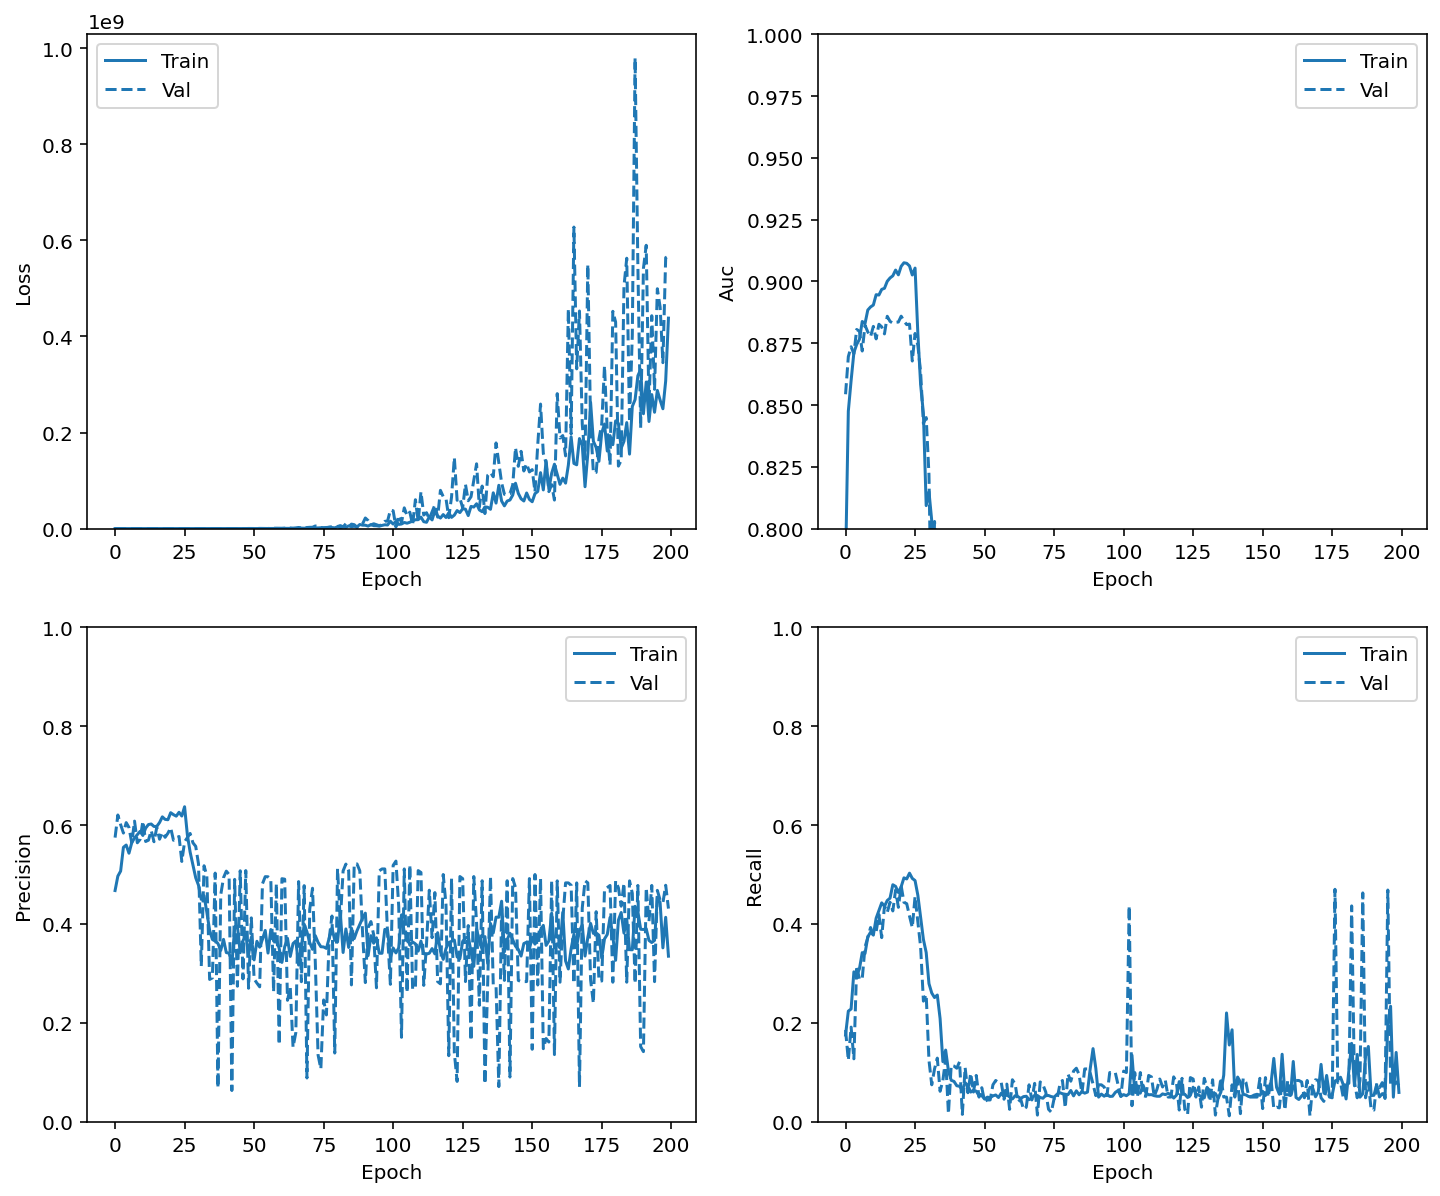

In [ ]:
print("Model 2")
plotMetric(history_2)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

ann_model = KerasClassifier(build_fn=ann_model, verbose=1)

u1 = u2 = u3 =  [300, 500]
d1 = d2 = [0.1, 0.3,0.7]
lr = [0.001, 0.005]

space = dict(batch_size = [512, 712], epochs=[10, 30, 50], u1 = u1, u2 = u2, u3=u3, d1=d1, d2=d2)

grid = GridSearchCV(estimator=ann_model, param_grid=space , cv=5, verbose=10)

grid_result = grid.fit(X_train, Y_train)

print(grid_result.best_score_,grid_result.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300
Epoch 1/10


1/6 [====>.........................] - ETA: 7s - loss: 1.7298 - tp: 118.0000 - fp: 165.0000 - tn: 5830.0000 - fn: 1075.0000 - accuracy: 0.8275 - precision: 0.4170 - recall: 0.0989 - auc: 0.7148

2/6 [=========>....................] - ETA: 0s - loss: 1.6854 - tp: 118.5000 - fp: 165.5000 - tn: 7111.0000 - fn: 1329.0000 - accuracy: 0.8285 - precision: 0.4173 - recall: 0.0844 - auc: 0.7305

4/6 [===================>..........] - ETA: 0s - loss: 1.6184 - tp: 123.7500 - fp: 178.7500 - tn: 9660.2500 - fn: 1833.2500 - accuracy: 0.8292 - precision: 0.4098 - recall: 0.0686 - auc: 0.7492

6/6 [==============================] - 2s 44ms/step - loss: 1.5485 - tp: 162.1429 - fp: 214.8571 - tn: 12629.2857 - fn: 2393.1429 - accuracy: 0.8302 - precision: 0.4258 - recall: 0.0664 - auc: 0.7651


Epoch 2/10


1/6 [====>.........................] - ETA: 0s - loss: 1.2465 - tp: 141.0000 - fp: 152.0000 - tn: 2410.0000 - fn: 369.0000 - accuracy: 0.8304 - precision: 0.4812 - recall: 0.2765 - auc: 0.8357

3/6 [==============>...............] - ETA: 0s - loss: 1.2372 - tp: 328.6667 - fp: 323.6667 - tn: 4800.6667 - fn: 691.0000 - accuracy: 0.8337 - precision: 0.4975 - recall: 0.3114 - auc: 0.8401

5/6 [========================>.....] - ETA: 0s - loss: 1.2223 - tp: 502.4000 - fp: 475.2000 - tn: 7211.4000 - fn: 1027.0000 - accuracy: 0.8356 - precision: 0.5067 - recall: 0.3202 - auc: 0.8441

6/6 [==============================] - 0s 43ms/step - loss: 1.2140 - tp: 610.5714 - fp: 567.7143 - tn: 8843.0000 - fn: 1262.1429 - accuracy: 0.8365 - precision: 0.5118 - recall: 0.3209 - auc: 0.8463


Epoch 3/10
1/6 [====>.........................] - ETA: 0s - loss: 1.1585 - tp: 124.0000 - fp: 96.0000 - tn: 2470.0000 - fn: 382.0000 - accuracy: 0.8444 - precision: 0.5636 - recall: 0.2451 - auc: 0.8598

3/6 [==============>...............] - ETA: 0s - loss: 1.1610 - tp: 272.0000 - fp: 199.3333 - tn: 4927.3333 - fn: 745.3333 - accuracy: 0.8458 - precision: 0.5736 - recall: 0.2615 - auc: 0.8615

4/6 [===================>..........] - ETA: 0s - loss: 1.1603 - tp: 345.0000 - fp: 255.5000 - tn: 6151.7500 - fn: 927.7500 - accuracy: 0.8457 - precision: 0.5729 - recall: 0.2653 - auc: 0.8617

6/6 [==============================] - ETA: 0s - loss: 1.1542 - tp: 482.3333 - fp: 357.3333 - tn: 8336.1667 - fn: 1246.1667 - accuracy: 0.8459 - precision: 0.5733 - recall: 0.2724 - auc: 0.8629

6/6 [==============================] - 0s 80ms/step - loss: 1.1519 - tp: 526.0000 - fp: 389.1429 - tn: 9022.5714 - fn: 1345.7143 - accuracy: 0.8460 - precision: 0.5737 - recall: 0.2747 - auc: 0.8634


Epoch 4/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0910 - tp: 178.0000 - fp: 114.0000 - tn: 2448.0000 - fn: 332.0000 - accuracy: 0.8548 - precision: 0.6096 - recall: 0.3490 - auc: 0.8760

2/6 [=========>....................] - ETA: 0s - loss: 1.1008 - tp: 264.0000 - fp: 172.5000 - tn: 3670.0000 - fn: 501.5000 - accuracy: 0.8540 - precision: 0.6060 - recall: 0.3459 - auc: 0.8740

4/6 [===================>..........] - ETA: 0s - loss: 1.0924 - tp: 441.5000 - fp: 285.7500 - tn: 6119.2500 - fn: 833.5000 - accuracy: 0.8542 - precision: 0.6068 - recall: 0.3461 - auc: 0.8760

6/6 [==============================] - 0s 46ms/step - loss: 1.0876 - tp: 654.8571 - fp: 435.1429 - tn: 8975.1429 - fn: 1218.2857 - accuracy: 0.8537 - precision: 0.6026 - recall: 0.3485 - auc: 0.8769


Epoch 5/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1009 - tp: 176.0000 - fp: 119.0000 - tn: 2444.0000 - fn: 333.0000 - accuracy: 0.8529 - precision: 0.5966 - recall: 0.3458 - auc: 0.8718

3/6 [==============>...............] - ETA: 0s - loss: 1.0861 - tp: 339.0000 - fp: 215.0000 - tn: 4910.3333 - fn: 679.6667 - accuracy: 0.8541 - precision: 0.6089 - recall: 0.3364 - auc: 0.8768

5/6 [========================>.....] - ETA: 0s - loss: 1.0780 - tp: 500.0000 - fp: 308.2000 - tn: 7379.4000 - fn: 1028.4000 - accuracy: 0.8546 - precision: 0.6148 - recall: 0.3312 - auc: 0.8790

6/6 [==============================] - 0s 41ms/step - loss: 1.0725 - tp: 612.8571 - fp: 372.1429 - tn: 9039.2857 - fn: 1259.1429 - accuracy: 0.8550 - precision: 0.6183 - recall: 0.3302 - auc: 0.8804


Epoch 6/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0092 - tp: 204.0000 - fp: 134.0000 - tn: 2430.0000 - fn: 304.0000 - accuracy: 0.8574 - precision: 0.6036 - recall: 0.4016 - auc: 0.8909

3/6 [==============>...............] - ETA: 0s - loss: 1.0260 - tp: 405.3333 - fp: 295.3333 - tn: 4830.0000 - fn: 613.3333 - accuracy: 0.8532 - precision: 0.5841 - recall: 0.3979 - auc: 0.8873

5/6 [========================>.....] - ETA: 0s - loss: 1.0334 - tp: 621.2000 - fp: 447.0000 - tn: 7240.2000 - fn: 907.6000 - accuracy: 0.8534 - precision: 0.5839 - recall: 0.4036 - auc: 0.8862

6/6 [==============================] - 0s 43ms/step - loss: 1.0360 - tp: 762.5714 - fp: 546.4286 - tn: 8864.7143 - fn: 1109.7143 - accuracy: 0.8534 - precision: 0.5839 - recall: 0.4050 - auc: 0.8858


Epoch 7/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0114 - tp: 218.0000 - fp: 138.0000 - tn: 2423.0000 - fn: 293.0000 - accuracy: 0.8597 - precision: 0.6124 - recall: 0.4266 - auc: 0.8931

2/6 [=========>....................] - ETA: 0s - loss: 1.0296 - tp: 313.5000 - fp: 205.0000 - tn: 3637.5000 - fn: 452.0000 - accuracy: 0.8580 - precision: 0.6065 - recall: 0.4138 - auc: 0.8891



3/6 [==============>...............] - ETA: 0s - loss: 1.0265 - tp: 421.3333 - fp: 269.6667 - tn: 4854.0000 - fn: 599.0000 - accuracy: 0.8586 - precision: 0.6093 - recall: 0.4146 - auc: 0.8896

5/6 [========================>.....] - ETA: 0s - loss: 1.0219 - tp: 641.6000 - fp: 406.2000 - tn: 7279.4000 - fn: 888.8000 - accuracy: 0.8592 - precision: 0.6113 - recall: 0.4182 - auc: 0.8904

6/6 [==============================] - 0s 55ms/step - loss: 1.0207 - tp: 791.7143 - fp: 500.4286 - tn: 8909.5714 - fn: 1081.7143 - accuracy: 0.8595 - precision: 0.6119 - recall: 0.4208 - auc: 0.8905


Epoch 8/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0399 - tp: 207.0000 - fp: 168.0000 - tn: 2393.0000 - fn: 304.0000 - accuracy: 0.8464 - precision: 0.5520 - recall: 0.4051 - auc: 0.8831

2/6 [=========>....................] - ETA: 0s - loss: 1.0431 - tp: 311.0000 - fp: 242.0000 - tn: 3600.0000 - fn: 455.0000 - accuracy: 0.8481 - precision: 0.5599 - recall: 0.4058 - auc: 0.8829

4/6 [===================>..........] - ETA: 0s - loss: 1.0371 - tp: 527.5000 - fp: 371.2500 - tn: 6032.5000 - fn: 748.7500 - accuracy: 0.8522 - precision: 0.5784 - recall: 0.4112 - auc: 0.8852

6/6 [==============================] - ETA: 0s - loss: 1.0297 - tp: 712.6667 - fp: 473.8333 - tn: 8217.3333 - fn: 1018.1667 - accuracy: 0.8546 - precision: 0.5905 - recall: 0.4109 - auc: 0.8872

6/6 [==============================] - 0s 53ms/step - loss: 1.0273 - tp: 771.2857 - fp: 506.0000 - tn: 8903.7143 - fn: 1102.4286 - accuracy: 0.8554 - precision: 0.5942 - recall: 0.4109 - auc: 0.8878


Epoch 9/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0480 - tp: 186.0000 - fp: 121.0000 - tn: 2441.0000 - fn: 324.0000 - accuracy: 0.8551 - precision: 0.6059 - recall: 0.3647 - auc: 0.8841

2/6 [=========>....................] - ETA: 0s - loss: 1.0356 - tp: 286.5000 - fp: 180.5000 - tn: 3662.0000 - fn: 479.0000 - accuracy: 0.8564 - precision: 0.6115 - recall: 0.3719 - auc: 0.8867

3/6 [==============>...............] - ETA: 0s - loss: 1.0303 - tp: 385.3333 - fp: 236.3333 - tn: 4887.6667 - fn: 634.6667 - accuracy: 0.8575 - precision: 0.6164 - recall: 0.3750 - auc: 0.8879

4/6 [===================>..........] - ETA: 0s - loss: 1.0266 - tp: 488.2500 - fp: 298.2500 - tn: 6107.2500 - fn: 786.2500 - accuracy: 0.8580 - precision: 0.6179 - recall: 0.3790 - auc: 0.8888

5/6 [========================>.....] - ETA: 0s - loss: 1.0228 - tp: 594.4000 - fp: 363.6000 - tn: 7323.0000 - fn: 935.0000 - accuracy: 0.8584 - precision: 0.6183 - recall: 0.3832 - auc: 0.8896

6/6 [==============================] - 0s 80ms/step - loss: 1.0170 - tp: 739.4286 - fp: 452.2857 - tn: 8958.4286 - fn: 1133.2857 - accuracy: 0.8588 - precision: 0.6189 - recall: 0.3890 - auc: 0.8909


Epoch 10/10


1/6 [====>.........................] - ETA: 0s - loss: 0.9388 - tp: 234.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 276.0000 - accuracy: 0.8678 - precision: 0.6429 - recall: 0.4588 - auc: 0.9067

2/6 [=========>....................] - ETA: 0s - loss: 0.9622 - tp: 344.0000 - fp: 199.5000 - tn: 3643.5000 - fn: 421.0000 - accuracy: 0.8660 - precision: 0.6354 - recall: 0.4520 - auc: 0.9019

3/6 [==============>...............] - ETA: 0s - loss: 0.9688 - tp: 455.3333 - fp: 270.0000 - tn: 4854.3333 - fn: 564.3333 - accuracy: 0.8650 - precision: 0.6311 - recall: 0.4491 - auc: 0.9002

4/6 [===================>..........] - ETA: 0s - loss: 0.9748 - tp: 569.5000 - fp: 338.0000 - tn: 6067.5000 - fn: 705.0000 - accuracy: 0.8648 - precision: 0.6302 - recall: 0.4487 - auc: 0.8991

6/6 [==============================] - ETA: 0s - loss: 0.9789 - tp: 770.8333 - fp: 456.5000 - tn: 8235.6667 - fn: 959.0000 - accuracy: 0.8646 - precision: 0.6296 - recall: 0.4473 - auc: 0.8984

6/6 [==============================] - 0s 72ms/step - loss: 0.9798 - tp: 833.7143 - fp: 493.5714 - tn: 8917.0000 - fn: 1039.1429 - accuracy: 0.8645 - precision: 0.6295 - recall: 0.4467 - auc: 0.8982


1/2 [==============>...............] - ETA: 0s - loss: 1.0540 - tp: 206.0000 - fp: 165.0000 - tn: 2398.0000 - fn: 303.0000 - accuracy: 0.8477 - precision: 0.5553 - recall: 0.4047 - auc: 0.8800

2/2 [==============================] - 1s 13ms/step - loss: 1.0547 - tp: 269.0000 - fp: 206.0000 - tn: 3227.0000 - fn: 414.0000 - accuracy: 0.8494 - precision: 0.5663 - recall: 0.3939 - auc: 0.8803


[CV 1/5; 1/432] END batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300; total time=   6.0s
[CV 2/5; 1/432] START batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300
Epoch 1/10


1/6 [====>.........................] - ETA: 9s - loss: 1.8000 - tp: 269.0000 - fp: 207.0000 - tn: 5787.0000 - fn: 925.0000 - accuracy: 0.8425 - precision: 0.5651 - recall: 0.2253 - auc: 0.7807

3/6 [==============>...............] - ETA: 0s - loss: 1.7302 - tp: 272.6667 - fp: 208.0000 - tn: 8348.3333 - fn: 1431.0000 - accuracy: 0.8406 - precision: 0.5672 - recall: 0.1700 - auc: 0.7720

4/6 [===================>..........] - ETA: 0s - loss: 1.7000 - tp: 277.0000 - fp: 212.7500 - tn: 9624.5000 - fn: 1681.7500 - accuracy: 0.8399 - precision: 0.5657 - recall: 0.1541 - auc: 0.7758

6/6 [==============================] - 2s 45ms/step - loss: 1.6374 - tp: 306.7143 - fp: 257.2857 - tn: 12586.1429 - fn: 2249.2857 - accuracy: 0.8380 - precision: 0.5472 - recall: 0.1323 - auc: 0.7847


Epoch 2/10
1/6 [====>.........................] - ETA: 0s - loss: 1.2793 - tp: 75.0000 - fp: 84.0000 - tn: 2478.0000 - fn: 435.0000 - accuracy: 0.8311 - precision: 0.4717 - recall: 0.1471 - auc: 0.8271

2/6 [=========>....................] - ETA: 0s - loss: 1.2500 - tp: 118.0000 - fp: 119.0000 - tn: 3724.0000 - fn: 647.0000 - accuracy: 0.8331 - precision: 0.4914 - recall: 0.1525 - auc: 0.8360

4/6 [===================>..........] - ETA: 0s - loss: 1.2395 - tp: 215.2500 - fp: 209.2500 - tn: 6196.5000 - fn: 1059.0000 - accuracy: 0.8342 - precision: 0.5012 - recall: 0.1636 - auc: 0.8385

6/6 [==============================] - 0s 46ms/step - loss: 1.2291 - tp: 333.1429 - fp: 321.5714 - tn: 9089.8571 - fn: 1538.8571 - accuracy: 0.8347 - precision: 0.5050 - recall: 0.1722 - auc: 0.8410


Epoch 3/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1298 - tp: 140.0000 - fp: 93.0000 - tn: 2470.0000 - fn: 369.0000 - accuracy: 0.8496 - precision: 0.6009 - recall: 0.2750 - auc: 0.8690

2/6 [=========>....................] - ETA: 0s - loss: 1.1407 - tp: 216.5000 - fp: 153.5000 - tn: 3691.0000 - fn: 547.0000 - accuracy: 0.8484 - precision: 0.5894 - recall: 0.2814 - auc: 0.8660

5/6 [========================>.....] - ETA: 0s - loss: 1.1553 - tp: 454.4000 - fp: 357.2000 - tn: 7331.6000 - fn: 1072.8000 - accuracy: 0.8459 - precision: 0.5690 - recall: 0.2931 - auc: 0.8622

6/6 [==============================] - 0s 44ms/step - loss: 1.1552 - tp: 559.1429 - fp: 447.7143 - tn: 8965.1429 - fn: 1311.4286 - accuracy: 0.8451 - precision: 0.5633 - recall: 0.2953 - auc: 0.8619


Epoch 4/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1025 - tp: 155.0000 - fp: 109.0000 - tn: 2452.0000 - fn: 356.0000 - accuracy: 0.8486 - precision: 0.5871 - recall: 0.3033 - auc: 0.8727

2/6 [=========>....................] - ETA: 0s - loss: 1.0893 - tp: 247.5000 - fp: 171.5000 - tn: 3672.0000 - fn: 517.0000 - accuracy: 0.8501 - precision: 0.5897 - recall: 0.3187 - auc: 0.8750

3/6 [==============>...............] - ETA: 0s - loss: 1.0882 - tp: 335.6667 - fp: 233.3333 - tn: 4891.3333 - fn: 683.6667 - accuracy: 0.8504 - precision: 0.5895 - recall: 0.3241 - auc: 0.8752

4/6 [===================>..........] - ETA: 0s - loss: 1.0880 - tp: 428.0000 - fp: 299.2500 - tn: 6106.7500 - fn: 846.0000 - accuracy: 0.8505 - precision: 0.5888 - recall: 0.3295 - auc: 0.8752

6/6 [==============================] - ETA: 0s - loss: 1.0914 - tp: 593.6667 - fp: 421.3333 - tn: 8271.6667 - fn: 1135.3333 - accuracy: 0.8505 - precision: 0.5864 - recall: 0.3365 - auc: 0.8745

6/6 [==============================] - 1s 95ms/step - loss: 1.0926 - tp: 645.4286 - fp: 459.4286 - tn: 8952.1429 - fn: 1226.4286 - accuracy: 0.8505 - precision: 0.5857 - recall: 0.3385 - auc: 0.8742


Epoch 5/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0843 - tp: 173.0000 - fp: 116.0000 - tn: 2445.0000 - fn: 338.0000 - accuracy: 0.8522 - precision: 0.5986 - recall: 0.3386 - auc: 0.8791

2/6 [=========>....................] - ETA: 0s - loss: 1.0742 - tp: 252.5000 - fp: 168.0000 - tn: 3674.5000 - fn: 513.0000 - accuracy: 0.8522 - precision: 0.6000 - recall: 0.3320 - auc: 0.8809

3/6 [==============>...............] - ETA: 0s - loss: 1.0707 - tp: 328.0000 - fp: 216.3333 - tn: 4907.3333 - fn: 692.3333 - accuracy: 0.8521 - precision: 0.6016 - recall: 0.3257 - auc: 0.8817

5/6 [========================>.....] - ETA: 0s - loss: 1.0730 - tp: 476.2000 - fp: 309.2000 - tn: 7377.0000 - fn: 1053.6000 - accuracy: 0.8521 - precision: 0.6044 - recall: 0.3173 - auc: 0.8814

6/6 [==============================] - 0s 58ms/step - loss: 1.0732 - tp: 574.7143 - fp: 372.0000 - tn: 9039.0000 - fn: 1297.7143 - accuracy: 0.8521 - precision: 0.6055 - recall: 0.3126 - auc: 0.8814


Epoch 6/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0709 - tp: 154.0000 - fp: 102.0000 - tn: 2464.0000 - fn: 352.0000 - accuracy: 0.8522 - precision: 0.6016 - recall: 0.3043 - auc: 0.8773

3/6 [==============>...............] - ETA: 0s - loss: 1.0588 - tp: 332.6667 - fp: 206.0000 - tn: 4921.6667 - fn: 683.6667 - accuracy: 0.8543 - precision: 0.6127 - recall: 0.3209 - auc: 0.8820

5/6 [========================>.....] - ETA: 0s - loss: 1.0559 - tp: 533.8000 - fp: 334.2000 - tn: 7355.2000 - fn: 992.8000 - accuracy: 0.8552 - precision: 0.6133 - recall: 0.3382 - auc: 0.8830

6/6 [==============================] - 0s 43ms/step - loss: 1.0544 - tp: 669.8571 - fp: 427.0000 - tn: 8986.2857 - fn: 1200.2857 - accuracy: 0.8553 - precision: 0.6110 - recall: 0.3473 - auc: 0.8834


Epoch 7/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0345 - tp: 224.0000 - fp: 138.0000 - tn: 2424.0000 - fn: 286.0000 - accuracy: 0.8620 - precision: 0.6188 - recall: 0.4392 - auc: 0.8885

3/6 [==============>...............] - ETA: 0s - loss: 1.0379 - tp: 436.0000 - fp: 280.6667 - tn: 4844.3333 - fn: 583.0000 - accuracy: 0.8602 - precision: 0.6114 - recall: 0.4309 - auc: 0.8871

5/6 [========================>.....] - ETA: 0s - loss: 1.0385 - tp: 643.0000 - fp: 421.0000 - tn: 7266.4000 - fn: 885.6000 - accuracy: 0.8591 - precision: 0.6074 - recall: 0.4250 - auc: 0.8867

6/6 [==============================] - 0s 44ms/step - loss: 1.0393 - tp: 780.1429 - fp: 516.4286 - tn: 8895.4286 - fn: 1091.4286 - accuracy: 0.8583 - precision: 0.6047 - recall: 0.4211 - auc: 0.8863


Epoch 8/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0275 - tp: 227.0000 - fp: 138.0000 - tn: 2426.0000 - fn: 281.0000 - accuracy: 0.8636 - precision: 0.6219 - recall: 0.4469 - auc: 0.8895

3/6 [==============>...............] - ETA: 0s - loss: 1.0274 - tp: 437.0000 - fp: 268.0000 - tn: 4859.0000 - fn: 580.0000 - accuracy: 0.8625 - precision: 0.6211 - recall: 0.4339 - auc: 0.8891

5/6 [========================>.....] - ETA: 0s - loss: 1.0244 - tp: 646.4000 - fp: 397.6000 - tn: 7291.6000 - fn: 880.4000 - accuracy: 0.8618 - precision: 0.6200 - recall: 0.4280 - auc: 0.8895

6/6 [==============================] - 0s 44ms/step - loss: 1.0227 - tp: 786.0000 - fp: 482.2857 - tn: 8930.8571 - fn: 1084.2857 - accuracy: 0.8616 - precision: 0.6202 - recall: 0.4245 - auc: 0.8899


Epoch 9/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0161 - tp: 204.0000 - fp: 118.0000 - tn: 2445.0000 - fn: 305.0000 - accuracy: 0.8623 - precision: 0.6335 - recall: 0.4008 - auc: 0.8911

3/6 [==============>...............] - ETA: 0s - loss: 1.0006 - tp: 413.3333 - fp: 247.6667 - tn: 4880.3333 - fn: 602.6667 - accuracy: 0.8617 - precision: 0.6267 - recall: 0.4054 - auc: 0.8934

5/6 [========================>.....] - ETA: 0s - loss: 1.0031 - tp: 623.0000 - fp: 375.6000 - tn: 7314.0000 - fn: 903.4000 - accuracy: 0.8614 - precision: 0.6253 - recall: 0.4068 - auc: 0.8931

6/6 [==============================] - 0s 42ms/step - loss: 1.0040 - tp: 764.1429 - fp: 461.1429 - tn: 8952.2857 - fn: 1105.8571 - accuracy: 0.8613 - precision: 0.6247 - recall: 0.4075 - auc: 0.8930


Epoch 10/10
1/6 [====>.........................] - ETA: 0s - loss: 0.9807 - tp: 210.0000 - fp: 113.0000 - tn: 2448.0000 - fn: 301.0000 - accuracy: 0.8652 - precision: 0.6502 - recall: 0.4110 - auc: 0.8991

3/6 [==============>...............] - ETA: 0s - loss: 0.9975 - tp: 411.6667 - fp: 231.6667 - tn: 4892.0000 - fn: 608.6667 - accuracy: 0.8637 - precision: 0.6425 - recall: 0.4052 - auc: 0.8960

6/6 [==============================] - ETA: 0s - loss: 1.0007 - tp: 698.6667 - fp: 410.1667 - tn: 8282.5000 - fn: 1030.6667 - accuracy: 0.8624 - precision: 0.6343 - recall: 0.4044 - auc: 0.8948

6/6 [==============================] - 0s 41ms/step - loss: 1.0004 - tp: 758.2857 - fp: 446.1429 - tn: 8965.1429 - fn: 1113.8571 - accuracy: 0.8623 - precision: 0.6333 - recall: 0.4051 - auc: 0.8948


1/2 [==============>...............] - ETA: 0s - loss: 1.0036 - tp: 219.0000 - fp: 157.0000 - tn: 2404.0000 - fn: 292.0000 - accuracy: 0.8538 - precision: 0.5824 - recall: 0.4286 - auc: 0.8928

2/2 [==============================] - 1s 6ms/step - loss: 1.0277 - tp: 290.0000 - fp: 215.0000 - tn: 3216.0000 - fn: 395.0000 - accuracy: 0.8518 - precision: 0.5743 - recall: 0.4234 - auc: 0.8878


[CV 2/5; 1/432] END batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300; total time=   6.1s
[CV 3/5; 1/432] START batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300


Epoch 1/10


1/6 [====>.........................] - ETA: 7s - loss: 1.7060 - tp: 290.0000 - fp: 215.0000 - tn: 5778.0000 - fn: 905.0000 - accuracy: 0.8442 - precision: 0.5743 - recall: 0.2427 - auc: 0.8311

2/6 [=========>....................] - ETA: 0s - loss: 1.6709 - tp: 290.5000 - fp: 215.0000 - tn: 7059.0000 - fn: 1159.5000 - accuracy: 0.8427 - precision: 0.5747 - recall: 0.2067 - auc: 0.8279

3/6 [==============>...............] - ETA: 0s - loss: 1.6372 - tp: 292.6667 - fp: 217.6667 - tn: 8336.6667 - fn: 1413.0000 - accuracy: 0.8416 - precision: 0.5735 - recall: 0.1824 - auc: 0.8277

5/6 [========================>.....] - ETA: 0s - loss: 1.5851 - tp: 324.8000 - fp: 267.2000 - tn: 10848.8000 - fn: 1891.2000 - accuracy: 0.8392 - precision: 0.5539 - recall: 0.1595 - auc: 0.8266

6/6 [==============================] - 2s 52ms/step - loss: 1.5522 - tp: 359.7143 - fp: 315.4286 - tn: 12524.8571 - fn: 2199.4286 - accuracy: 0.8378 - precision: 0.5403 - recall: 0.1513 - auc: 0.8265


Epoch 2/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1886 - tp: 84.0000 - fp: 78.0000 - tn: 2484.0000 - fn: 426.0000 - accuracy: 0.8359 - precision: 0.5185 - recall: 0.1647 - auc: 0.8511

3/6 [==============>...............] - ETA: 0s - loss: 1.2042 - tp: 161.0000 - fp: 167.0000 - tn: 4956.0000 - fn: 860.0000 - accuracy: 0.8336 - precision: 0.4981 - recall: 0.1596 - auc: 0.8473

5/6 [========================>.....] - ETA: 0s - loss: 1.2095 - tp: 243.8000 - fp: 250.2000 - tn: 7434.4000 - fn: 1287.6000 - accuracy: 0.8335 - precision: 0.4967 - recall: 0.1596 - auc: 0.8463

6/6 [==============================] - 0s 43ms/step - loss: 1.2098 - tp: 304.7143 - fp: 310.1429 - tn: 9098.8571 - fn: 1569.7143 - accuracy: 0.8336 - precision: 0.4972 - recall: 0.1618 - auc: 0.8463


Epoch 3/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0991 - tp: 141.0000 - fp: 111.0000 - tn: 2451.0000 - fn: 369.0000 - accuracy: 0.8438 - precision: 0.5595 - recall: 0.2765 - auc: 0.8723

4/6 [===================>..........] - ETA: 0s - loss: 1.1469 - tp: 368.0000 - fp: 312.7500 - tn: 6091.7500 - fn: 907.5000 - accuracy: 0.8414 - precision: 0.5431 - recall: 0.2860 - auc: 0.8624

6/6 [==============================] - ETA: 0s - loss: 1.1461 - tp: 508.8333 - fp: 416.5000 - tn: 8274.8333 - fn: 1221.8333 - accuracy: 0.8424 - precision: 0.5483 - recall: 0.2904 - auc: 0.8630

6/6 [==============================] - 0s 42ms/step - loss: 1.1463 - tp: 552.2857 - fp: 448.8571 - tn: 8960.8571 - fn: 1321.4286 - accuracy: 0.8427 - precision: 0.5498 - recall: 0.2915 - auc: 0.8631


Epoch 4/10
1/6 [====>.........................] - ETA: 0s - loss: 1.0651 - tp: 151.0000 - fp: 101.0000 - tn: 2461.0000 - fn: 359.0000 - accuracy: 0.8503 - precision: 0.5992 - recall: 0.2961 - auc: 0.8813

2/6 [=========>....................] - ETA: 0s - loss: 1.0813 - tp: 216.5000 - fp: 149.5000 - tn: 3693.5000 - fn: 548.5000 - accuracy: 0.8490 - precision: 0.5934 - recall: 0.2863 - auc: 0.8775

4/6 [===================>..........] - ETA: 0s - loss: 1.0969 - tp: 352.7500 - fp: 246.0000 - tn: 6159.5000 - fn: 921.7500 - accuracy: 0.8483 - precision: 0.5903 - recall: 0.2801 - auc: 0.8739

5/6 [========================>.....] - ETA: 0s - loss: 1.0974 - tp: 426.2000 - fp: 292.6000 - tn: 7393.8000 - fn: 1103.4000 - accuracy: 0.8486 - precision: 0.5924 - recall: 0.2805 - auc: 0.8739

6/6 [==============================] - 0s 56ms/step - loss: 1.0955 - tp: 528.1429 - fp: 356.1429 - tn: 9054.1429 - fn: 1345.0000 - accuracy: 0.8490 - precision: 0.5955 - recall: 0.2823 - auc: 0.8746


Epoch 5/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0532 - tp: 163.0000 - fp: 108.0000 - tn: 2453.0000 - fn: 348.0000 - accuracy: 0.8516 - precision: 0.6015 - recall: 0.3190 - auc: 0.8870

2/6 [=========>....................] - ETA: 0s - loss: 1.0519 - tp: 248.0000 - fp: 166.5000 - tn: 3676.0000 - fn: 517.5000 - accuracy: 0.8516 - precision: 0.5991 - recall: 0.3227 - auc: 0.8865

3/6 [==============>...............] - ETA: 0s - loss: 1.0516 - tp: 332.3333 - fp: 225.3333 - tn: 4899.0000 - fn: 687.3333 - accuracy: 0.8515 - precision: 0.5973 - recall: 0.3244 - auc: 0.8861

4/6 [===================>..........] - ETA: 0s - loss: 1.0541 - tp: 420.7500 - fp: 287.7500 - tn: 6117.7500 - fn: 853.7500 - accuracy: 0.8514 - precision: 0.5957 - recall: 0.3274 - auc: 0.8852

5/6 [========================>.....] - ETA: 0s - loss: 1.0558 - tp: 508.0000 - fp: 349.0000 - tn: 7337.4000 - fn: 1021.6000 - accuracy: 0.8514 - precision: 0.5947 - recall: 0.3292 - auc: 0.8847

6/6 [==============================] - 1s 83ms/step - loss: 1.0588 - tp: 624.0000 - fp: 434.1429 - tn: 8976.1429 - fn: 1249.1429 - accuracy: 0.8510 - precision: 0.5921 - recall: 0.3307 - auc: 0.8838


Epoch 6/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0816 - tp: 201.0000 - fp: 123.0000 - tn: 2438.0000 - fn: 310.0000 - accuracy: 0.8590 - precision: 0.6204 - recall: 0.3933 - auc: 0.8790

2/6 [=========>....................] - ETA: 0s - loss: 1.0748 - tp: 298.0000 - fp: 189.5000 - tn: 3651.5000 - fn: 469.0000 - accuracy: 0.8576 - precision: 0.6136 - recall: 0.3897 - auc: 0.8801

4/6 [===================>..........] - ETA: 0s - loss: 1.0653 - tp: 513.0000 - fp: 325.7500 - tn: 6077.5000 - fn: 763.7500 - accuracy: 0.8581 - precision: 0.6127 - recall: 0.3985 - auc: 0.8817

5/6 [========================>.....] - ETA: 0s - loss: 1.0618 - tp: 619.0000 - fp: 397.8000 - tn: 7286.4000 - fn: 912.8000 - accuracy: 0.8579 - precision: 0.6108 - recall: 0.4006 - auc: 0.8823

6/6 [==============================] - 0s 65ms/step - loss: 1.0570 - tp: 764.4286 - fp: 494.4286 - tn: 8914.2857 - fn: 1110.2857 - accuracy: 0.8578 - precision: 0.6092 - recall: 0.4041 - auc: 0.8831


Epoch 7/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0259 - tp: 207.0000 - fp: 145.0000 - tn: 2416.0000 - fn: 304.0000 - accuracy: 0.8538 - precision: 0.5881 - recall: 0.4051 - auc: 0.8890



2/6 [=========>....................] - ETA: 0s - loss: 1.0229 - tp: 317.0000 - fp: 210.0000 - tn: 3633.0000 - fn: 448.0000 - accuracy: 0.8564 - precision: 0.5982 - recall: 0.4121 - auc: 0.8898

3/6 [==============>...............] - ETA: 0s - loss: 1.0253 - tp: 423.6667 - fp: 272.3333 - tn: 4852.3333 - fn: 595.6667 - accuracy: 0.8577 - precision: 0.6041 - recall: 0.4137 - auc: 0.8893

4/6 [===================>..........] - ETA: 0s - loss: 1.0250 - tp: 525.0000 - fp: 336.7500 - tn: 6069.0000 - fn: 749.2500 - accuracy: 0.8578 - precision: 0.6056 - recall: 0.4119 - auc: 0.8892

5/6 [========================>.....] - ETA: 0s - loss: 1.0239 - tp: 626.2000 - fp: 400.6000 - tn: 7285.8000 - fn: 903.4000 - accuracy: 0.8579 - precision: 0.6067 - recall: 0.4103 - auc: 0.8893

6/6 [==============================] - 0s 77ms/step - loss: 1.0233 - tp: 763.8571 - fp: 488.1429 - tn: 8922.1429 - fn: 1109.2857 - accuracy: 0.8580 - precision: 0.6078 - recall: 0.4090 - auc: 0.8894


Epoch 8/10


1/6 [====>.........................] - ETA: 0s - loss: 0.9907 - tp: 211.0000 - fp: 131.0000 - tn: 2430.0000 - fn: 300.0000 - accuracy: 0.8597 - precision: 0.6170 - recall: 0.4129 - auc: 0.8954

2/6 [=========>....................] - ETA: 0s - loss: 0.9883 - tp: 313.5000 - fp: 195.0000 - tn: 3646.0000 - fn: 453.5000 - accuracy: 0.8594 - precision: 0.6166 - recall: 0.4098 - auc: 0.8964

3/6 [==============>...............] - ETA: 0s - loss: 0.9945 - tp: 416.0000 - fp: 268.3333 - tn: 4854.0000 - fn: 605.6667 - accuracy: 0.8583 - precision: 0.6109 - recall: 0.4084 - auc: 0.8948

5/6 [========================>.....] - ETA: 0s - loss: 1.0016 - tp: 622.6000 - fp: 403.0000 - tn: 7281.2000 - fn: 909.2000 - accuracy: 0.8580 - precision: 0.6089 - recall: 0.4074 - auc: 0.8934

6/6 [==============================] - 0s 60ms/step - loss: 1.0056 - tp: 757.0000 - fp: 491.8571 - tn: 8916.8571 - fn: 1117.7143 - accuracy: 0.8577 - precision: 0.6077 - recall: 0.4053 - auc: 0.8926


Epoch 9/10


1/6 [====>.........................] - ETA: 0s - loss: 0.9980 - tp: 195.0000 - fp: 128.0000 - tn: 2434.0000 - fn: 315.0000 - accuracy: 0.8558 - precision: 0.6037 - recall: 0.3824 - auc: 0.8931

2/6 [=========>....................] - ETA: 0s - loss: 0.9937 - tp: 292.5000 - fp: 185.5000 - tn: 3657.0000 - fn: 473.0000 - accuracy: 0.8568 - precision: 0.6099 - recall: 0.3822 - auc: 0.8945

4/6 [===================>..........] - ETA: 0s - loss: 0.9938 - tp: 488.5000 - fp: 302.5000 - tn: 6101.2500 - fn: 787.7500 - accuracy: 0.8577 - precision: 0.6156 - recall: 0.3829 - auc: 0.8950

6/6 [==============================] - ETA: 0s - loss: 0.9957 - tp: 667.8333 - fp: 411.3333 - tn: 8279.5000 - fn: 1063.3333 - accuracy: 0.8581 - precision: 0.6171 - recall: 0.3848 - auc: 0.8948

6/6 [==============================] - 0s 59ms/step - loss: 0.9962 - tp: 724.5714 - fp: 445.5714 - tn: 8963.7143 - fn: 1149.5714 - accuracy: 0.8583 - precision: 0.6176 - recall: 0.3855 - auc: 0.8948


Epoch 10/10
1/6 [====>.........................] - ETA: 0s - loss: 0.9960 - tp: 228.0000 - fp: 140.0000 - tn: 2421.0000 - fn: 283.0000 - accuracy: 0.8623 - precision: 0.6196 - recall: 0.4462 - auc: 0.8954

2/6 [=========>....................] - ETA: 0s - loss: 0.9954 - tp: 335.5000 - fp: 208.0000 - tn: 3635.0000 - fn: 429.5000 - accuracy: 0.8618 - precision: 0.6178 - recall: 0.4405 - auc: 0.8951

3/6 [==============>...............] - ETA: 0s - loss: 0.9874 - tp: 452.0000 - fp: 272.0000 - tn: 4851.6667 - fn: 568.3333 - accuracy: 0.8628 - precision: 0.6223 - recall: 0.4428 - auc: 0.8968

5/6 [========================>.....] - ETA: 0s - loss: 0.9865 - tp: 680.8000 - fp: 411.0000 - tn: 7274.8000 - fn: 849.4000 - accuracy: 0.8630 - precision: 0.6228 - recall: 0.4442 - auc: 0.8969

6/6 [==============================] - 0s 58ms/step - loss: 0.9882 - tp: 832.2857 - fp: 507.5714 - tn: 8902.2857 - fn: 1041.2857 - accuracy: 0.8627 - precision: 0.6214 - recall: 0.4439 - auc: 0.8965


1/2 [==============>...............] - ETA: 1s - loss: 0.9846 - tp: 213.0000 - fp: 134.0000 - tn: 2429.0000 - fn: 296.0000 - accuracy: 0.8600 - precision: 0.6138 - recall: 0.4185 - auc: 0.8963

2/2 [==============================] - 1s 8ms/step - loss: 1.0134 - tp: 283.0000 - fp: 186.0000 - tn: 3248.0000 - fn: 399.0000 - accuracy: 0.8579 - precision: 0.6034 - recall: 0.4150 - auc: 0.8908


[CV 3/5; 1/432] END batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300; total time=   6.7s
[CV 4/5; 1/432] START batch_size=512, d1=0.1, d2=0.1, epochs=10, u1=300, u2=300, u3=300
Epoch 1/10


1/6 [====>.........................] - ETA: 8s - loss: 1.8535 - tp: 283.0000 - fp: 186.0000 - tn: 5810.0000 - fn: 909.0000 - accuracy: 0.8477 - precision: 0.6034 - recall: 0.2374 - auc: 0.7540

2/6 [=========>....................] - ETA: 0s - loss: 1.8122 - tp: 283.0000 - fp: 186.0000 - tn: 7091.0000 - fn: 1164.0000 - accuracy: 0.8456 - precision: 0.6034 - recall: 0.2018 - auc: 0.7462

4/6 [===================>..........] - ETA: 0s - loss: 1.7400 - tp: 283.7500 - fp: 187.5000 - tn: 9651.7500 - fn: 1673.0000 - accuracy: 0.8431 - precision: 0.6021 - recall: 0.1592 - auc: 0.7575

6/6 [==============================] - ETA: 0s - loss: 1.6820 - tp: 298.1667 - fp: 200.6667 - tn: 11926.5000 - fn: 2113.6667 - accuracy: 0.8418 - precision: 0.5982 - recall: 0.1389 - auc: 0.7701

6/6 [==============================] - 2s 54ms/step - loss: 1.6641 - tp: 304.4286 - fp: 206.0000 - tn: 12640.2857 - fn: 2250.4286 - accuracy: 0.8414 - precision: 0.5970 - recall: 0.1334 - auc: 0.7740


Epoch 2/10
1/6 [====>.........................] - ETA: 0s - loss: 1.3422 - tp: 86.0000 - fp: 147.0000 - tn: 2413.0000 - fn: 426.0000 - accuracy: 0.8135 - precision: 0.3691 - recall: 0.1680 - auc: 0.8122

2/6 [=========>....................] - ETA: 0s - loss: 1.3190 - tp: 143.0000 - fp: 195.0000 - tn: 3647.0000 - fn: 623.0000 - accuracy: 0.8202 - precision: 0.4103 - recall: 0.1820 - auc: 0.8168

3/6 [==============>...............] - ETA: 0s - loss: 1.2958 - tp: 200.6667 - fp: 241.6667 - tn: 4881.3333 - fn: 820.3333 - accuracy: 0.8241 - precision: 0.4353 - recall: 0.1901 - auc: 0.8226

5/6 [========================>.....] - ETA: 0s - loss: 1.2659 - tp: 319.8000 - fp: 347.6000 - tn: 7338.0000 - fn: 1210.6000 - accuracy: 0.8278 - precision: 0.4596 - recall: 0.2010 - auc: 0.8301

6/6 [==============================] - 0s 57ms/step - loss: 1.2502 - tp: 400.4286 - fp: 421.1429 - tn: 8990.5714 - fn: 1473.0000 - accuracy: 0.8296 - precision: 0.4708 - recall: 0.2066 - auc: 0.8340


Epoch 3/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1843 - tp: 155.0000 - fp: 123.0000 - tn: 2440.0000 - fn: 354.0000 - accuracy: 0.8447 - precision: 0.5576 - recall: 0.3045 - auc: 0.8549

3/6 [==============>...............] - ETA: 0s - loss: 1.1709 - tp: 314.0000 - fp: 250.0000 - tn: 4875.0000 - fn: 705.0000 - accuracy: 0.8447 - precision: 0.5575 - recall: 0.3068 - auc: 0.8583

4/6 [===================>..........] - ETA: 0s - loss: 1.1708 - tp: 394.7500 - fp: 327.0000 - tn: 6078.7500 - fn: 879.5000 - accuracy: 0.8436 - precision: 0.5514 - recall: 0.3081 - auc: 0.8580

6/6 [==============================] - ETA: 0s - loss: 1.1665 - tp: 543.5000 - fp: 459.0000 - tn: 8234.5000 - fn: 1186.0000 - accuracy: 0.8429 - precision: 0.5468 - recall: 0.3116 - auc: 0.8586

6/6 [==============================] - 0s 59ms/step - loss: 1.1647 - tp: 590.7143 - fp: 499.5714 - tn: 8913.0000 - fn: 1281.8571 - accuracy: 0.8428 - precision: 0.5459 - recall: 0.3128 - auc: 0.8589


Epoch 4/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0915 - tp: 189.0000 - fp: 124.0000 - tn: 2439.0000 - fn: 320.0000 - accuracy: 0.8555 - precision: 0.6038 - recall: 0.3713 - auc: 0.8741



2/6 [=========>....................] - ETA: 0s - loss: 1.0769 - tp: 272.0000 - fp: 183.0000 - tn: 3660.5000 - fn: 492.5000 - accuracy: 0.8539 - precision: 0.5992 - recall: 0.3597 - auc: 0.8773

3/6 [==============>...............] - ETA: 0s - loss: 1.0749 - tp: 358.0000 - fp: 242.0000 - tn: 4882.3333 - fn: 661.6667 - accuracy: 0.8534 - precision: 0.5980 - recall: 0.3553 - auc: 0.8778

4/6 [===================>..........] - ETA: 0s - loss: 1.0765 - tp: 442.7500 - fp: 302.2500 - tn: 6103.7500 - fn: 831.2500 - accuracy: 0.8530 - precision: 0.5962 - recall: 0.3520 - auc: 0.8774

6/6 [==============================] - ETA: 0s - loss: 1.0818 - tp: 591.3333 - fp: 413.8333 - tn: 8279.8333 - fn: 1138.0000 - accuracy: 0.8519 - precision: 0.5916 - recall: 0.3469 - auc: 0.8763

6/6 [==============================] - 0s 79ms/step - loss: 1.0834 - tp: 637.4286 - fp: 448.8571 - tn: 8963.8571 - fn: 1235.0000 - accuracy: 0.8516 - precision: 0.5901 - recall: 0.3451 - auc: 0.8759


Epoch 5/10


1/6 [====>.........................] - ETA: 0s - loss: 1.1094 - tp: 131.0000 - fp: 110.0000 - tn: 2452.0000 - fn: 379.0000 - accuracy: 0.8408 - precision: 0.5436 - recall: 0.2569 - auc: 0.8701

3/6 [==============>...............] - ETA: 0s - loss: 1.0794 - tp: 283.3333 - fp: 207.6667 - tn: 4917.0000 - fn: 736.0000 - accuracy: 0.8453 - precision: 0.5701 - recall: 0.2737 - auc: 0.8779

4/6 [===================>..........] - ETA: 0s - loss: 1.0771 - tp: 359.0000 - fp: 257.5000 - tn: 6148.2500 - fn: 915.2500 - accuracy: 0.8461 - precision: 0.5751 - recall: 0.2771 - auc: 0.8786

6/6 [==============================] - ETA: 0s - loss: 1.0763 - tp: 495.5000 - fp: 342.3333 - tn: 8351.1667 - fn: 1234.0000 - accuracy: 0.8475 - precision: 0.5835 - recall: 0.2818 - auc: 0.8790

6/6 [==============================] - 0s 60ms/step - loss: 1.0758 - tp: 538.1429 - fp: 369.0000 - tn: 9043.5714 - fn: 1334.4286 - accuracy: 0.8478 - precision: 0.5858 - recall: 0.2830 - auc: 0.8792


Epoch 6/10


1/6 [====>.........................] - ETA: 0s - loss: 1.0721 - tp: 171.0000 - fp: 121.0000 - tn: 2440.0000 - fn: 340.0000 - accuracy: 0.8499 - precision: 0.5856 - recall: 0.3346 - auc: 0.8794

2/6 [=========>....................] - ETA: 0s - loss: 1.0801 - tp: 266.5000 - fp: 196.0000 - tn: 3646.0000 - fn: 499.5000 - accuracy: 0.8493 - precision: 0.5787 - recall: 0.3446 - auc: 0.8770

3/6 [==============>...............] - ETA: 0s - loss: 1.0830 - tp: 365.6667 - fp: 271.3333 - tn: 4852.3333 - fn: 654.6667 - accuracy: 0.8494 - precision: 0.5765 - recall: 0.3527 - auc: 0.8761

4/6 [===================>..........] - ETA: 0s - loss: 1.0802 - tp: 468.7500 - fp: 347.7500 - tn: 6057.0000 - fn: 806.5000 - accuracy: 0.8496 - precision: 0.5759 - recall: 0.3599 - auc: 0.8766

6/6 [==============================] - 0s 62ms/step - loss: 1.0654 - tp: 720.0000 - fp: 515.1429 - tn: 8896.8571 - fn: 1153.1429 - accuracy: 0.8514 - precision: 0.5812 - recall: 0.3749 - auc: 0.8798


Epoch 7/10
1/6 [====>.........................] - ETA: 0s - loss: 0.9967 - tp: 200.0000 - fp: 127.0000 - tn: 2435.0000 - fn: 310.0000 - accuracy: 0.8577 - precision: 0.6116 - recall: 0.3922 - auc: 0.8950

2/6 [=========>....................] - ETA: 0s - loss: 1.0115 - tp: 292.5000 - fp: 192.5000 - tn: 3651.0000 - fn: 472.0000 - accuracy: 0.8563 - precision: 0.6052 - recall: 0.3850 - auc: 0.8913

…

2/6 [=========>....................] - ETA: 0s - loss: 1.0371 - tp: 291.5000 - fp: 180.0000 - tn: 3662.5000 - fn: 474.0000 - accuracy: 0.8582 - precision: 0.6195 - recall: 0.3787 - auc: 0.8870

4/6 [===================>..........] - ETA: 0s - loss: 1.0473 - tp: 493.0000 - fp: 321.7500 - tn: 6083.2500 - fn: 782.0000 - accuracy: 0.8569 - precision: 0.6099 - recall: 0.3839 - auc: 0.8842

6/6 [==============================] - 0s 45ms/step - loss: 1.0453 - tp: 737.0000 - fp: 484.8571 - tn: 8925.1429 - fn: 1136.4286 - accuracy: 0.8566 - precision: 0.6065 - recall: 0.3898 - auc: 0.8845


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0487 - tp: 206.0000 - fp: 139.0000 - tn: 2423.0000 - fn: 304.0000 - accuracy: 0.8558 - precision: 0.5971 - recall: 0.4039 - auc: 0.8839

2/6 [=========>....................] - ETA: 0s - loss: 1.0518 - tp: 306.5000 - fp: 208.5000 - tn: 3635.0000 - fn: 458.0000 - accuracy: 0.8555 - precision: 0.5956 - recall: 0.4017 - auc: 0.8830

4/6 [===================>..........] - ETA: 0s - loss: 1.0411 - tp: 509.7500 - fp: 335.2500 - tn: 6069.7500 - fn: 765.2500 - accuracy: 0.8563 - precision: 0.6009 - recall: 0.4002 - auc: 0.8852

6/6 [==============================] - ETA: 0s - loss: 1.0385 - tp: 683.6667 - fp: 457.5000 - tn: 8234.1667 - fn: 1046.6667 - accuracy: 0.8558 - precision: 0.5989 - recall: 0.3970 - auc: 0.8856

6/6 [==============================] - 0s 58ms/step - loss: 1.0381 - tp: 738.4286 - fp: 496.0000 - tn: 8914.0000 - fn: 1135.0000 - accuracy: 0.8556 - precision: 0.5983 - recall: 0.3961 - auc: 0.8856


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0395 - tp: 208.0000 - fp: 141.0000 - tn: 2422.0000 - fn: 301.0000 - accuracy: 0.8561 - precision: 0.5960 - recall: 0.4086 - auc: 0.8822

2/6 [=========>....................] - ETA: 0s - loss: 1.0576 - tp: 303.0000 - fp: 216.0000 - tn: 3628.5000 - fn: 460.5000 - accuracy: 0.8539 - precision: 0.5868 - recall: 0.3998 - auc: 0.8791

3/6 [==============>...............] - ETA: 0s - loss: 1.0496 - tp: 405.3333 - fp: 276.6667 - tn: 4849.0000 - fn: 613.0000 - accuracy: 0.8550 - precision: 0.5929 - recall: 0.3996 - auc: 0.8816

5/6 [========================>.....] - ETA: 0s - loss: 1.0366 - tp: 611.6000 - fp: 397.2000 - tn: 7289.8000 - fn: 917.4000 - accuracy: 0.8566 - precision: 0.6017 - recall: 0.4004 - auc: 0.8851

6/6 [==============================] - 0s 57ms/step - loss: 1.0314 - tp: 748.2857 - fp: 481.1429 - tn: 8929.5714 - fn: 1124.4286 - accuracy: 0.8570 - precision: 0.6046 - recall: 0.4000 - auc: 0.8865


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1053 - tp: 186.0000 - fp: 150.0000 - tn: 2412.0000 - fn: 324.0000 - accuracy: 0.8457 - precision: 0.5536 - recall: 0.3647 - auc: 0.8706

2/6 [=========>....................] - ETA: 0s - loss: 1.0847 - tp: 287.5000 - fp: 217.5000 - tn: 3626.5000 - fn: 476.5000 - accuracy: 0.8485 - precision: 0.5654 - recall: 0.3734 - auc: 0.8747

3/6 [==============>...............] - ETA: 0s - loss: 1.0734 - tp: 386.0000 - fp: 282.3333 - tn: 4842.6667 - fn: 633.0000 - accuracy: 0.8499 - precision: 0.5722 - recall: 0.3760 - auc: 0.8772

5/6 [========================>.....] - ETA: 0s - loss: 1.0544 - tp: 583.0000 - fp: 401.4000 - tn: 7285.4000 - fn: 946.2000 - accuracy: 0.8521 - precision: 0.5841 - recall: 0.3786 - auc: 0.8815

6/6 [==============================] - 0s 56ms/step - loss: 1.0451 - tp: 718.7143 - fp: 485.8571 - tn: 8924.7143 - fn: 1154.1429 - accuracy: 0.8532 - precision: 0.5894 - recall: 0.3811 - auc: 0.8836


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9837 - tp: 208.0000 - fp: 126.0000 - tn: 2437.0000 - fn: 301.0000 - accuracy: 0.8610 - precision: 0.6228 - recall: 0.4086 - auc: 0.8975

3/6 [==============>...............] - ETA: 0s - loss: 0.9899 - tp: 418.6667 - fp: 253.6667 - tn: 4871.3333 - fn: 600.3333 - accuracy: 0.8611 - precision: 0.6234 - recall: 0.4102 - auc: 0.8960

4/6 [===================>..........] - ETA: 0s - loss: 0.9939 - tp: 524.0000 - fp: 323.2500 - tn: 6082.2500 - fn: 750.5000 - accuracy: 0.8606 - precision: 0.6206 - recall: 0.4105 - auc: 0.8953

6/6 [==============================] - 0s 45ms/step - loss: 1.0013 - tp: 775.4286 - fp: 496.0000 - tn: 8914.1429 - fn: 1097.8571 - accuracy: 0.8594 - precision: 0.6138 - recall: 0.4127 - auc: 0.8935


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9479 - tp: 227.0000 - fp: 111.0000 - tn: 2452.0000 - fn: 282.0000 - accuracy: 0.8721 - precision: 0.6716 - recall: 0.4460 - auc: 0.9059

3/6 [==============>...............] - ETA: 0s - loss: 0.9779 - tp: 425.3333 - fp: 238.3333 - tn: 4886.3333 - fn: 594.0000 - accuracy: 0.8660 - precision: 0.6467 - recall: 0.4229 - auc: 0.8991

4/6 [===================>..........] - ETA: 0s - loss: 0.9812 - tp: 524.7500 - fp: 298.0000 - tn: 6107.7500 - fn: 749.5000 - accuracy: 0.8651 - precision: 0.6433 - recall: 0.4181 - auc: 0.8983

6/6 [==============================] - 0s 43ms/step - loss: 0.9885 - tp: 754.5714 - fp: 437.1429 - tn: 8973.2857 - fn: 1118.4286 - accuracy: 0.8634 - precision: 0.6377 - recall: 0.4091 - auc: 0.8969


Epoch 14/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9988 - tp: 203.0000 - fp: 134.0000 - tn: 2426.0000 - fn: 309.0000 - accuracy: 0.8558 - precision: 0.6024 - recall: 0.3965 - auc: 0.8933

3/6 [==============>...............] - ETA: 0s - loss: 1.0014 - tp: 410.6667 - fp: 276.6667 - tn: 4845.6667 - fn: 611.0000 - accuracy: 0.8557 - precision: 0.5991 - recall: 0.4009 - auc: 0.8924

5/6 [========================>.....] - ETA: 0s - loss: 0.9995 - tp: 624.0000 - fp: 418.2000 - tn: 7266.6000 - fn: 907.2000 - accuracy: 0.8561 - precision: 0.5994 - recall: 0.4051 - auc: 0.8927

6/6 [==============================] - 0s 45ms/step - loss: 1.0001 - tp: 765.7143 - fp: 515.2857 - tn: 8893.8571 - fn: 1108.5714 - accuracy: 0.8560 - precision: 0.5985 - recall: 0.4065 - auc: 0.8925


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0524 - tp: 203.0000 - fp: 138.0000 - tn: 2424.0000 - fn: 307.0000 - accuracy: 0.8551 - precision: 0.5953 - recall: 0.3980 - auc: 0.8832

3/6 [==============>...............] - ETA: 0s - loss: 1.0264 - tp: 408.0000 - fp: 266.0000 - tn: 4858.0000 - fn: 612.0000 - accuracy: 0.8565 - precision: 0.6024 - recall: 0.3989 - auc: 0.8880

5/6 [========================>.....] - ETA: 0s - loss: 1.0132 - tp: 626.4000 - fp: 397.0000 - tn: 7288.4000 - fn: 904.2000 - accuracy: 0.8579 - precision: 0.6080 - recall: 0.4055 - auc: 0.8907

6/6 [==============================] - 0s 44ms/step - loss: 1.0074 - tp: 772.2857 - fp: 485.5714 - tn: 8924.0000 - fn: 1101.5714 - accuracy: 0.8585 - precision: 0.6105 - recall: 0.4085 - auc: 0.8919


Epoch 16/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9446 - tp: 228.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 283.0000 - accuracy: 0.8672 - precision: 0.6459 - recall: 0.4462 - auc: 0.9067

3/6 [==============>...............] - ETA: 0s - loss: 0.9599 - tp: 438.0000 - fp: 247.3333 - tn: 4875.6667 - fn: 583.0000 - accuracy: 0.8654 - precision: 0.6410 - recall: 0.4326 - auc: 0.9031

4/6 [===================>..........] - ETA: 0s - loss: 0.9667 - tp: 543.5000 - fp: 314.0000 - tn: 6089.7500 - fn: 732.7500 - accuracy: 0.8646 - precision: 0.6373 - recall: 0.4297 - auc: 0.9016

6/6 [==============================] - 0s 45ms/step - loss: 0.9755 - tp: 788.4286 - fp: 478.8571 - tn: 8930.2857 - fn: 1085.8571 - accuracy: 0.8625 - precision: 0.6276 - recall: 0.4244 - auc: 0.8992


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0146 - tp: 210.0000 - fp: 146.0000 - tn: 2416.0000 - fn: 300.0000 - accuracy: 0.8548 - precision: 0.5899 - recall: 0.4118 - auc: 0.8899

2/6 [=========>....................] - ETA: 0s - loss: 1.0108 - tp: 308.5000 - fp: 225.0000 - tn: 3617.5000 - fn: 457.0000 - accuracy: 0.8527 - precision: 0.5812 - recall: 0.4052 - auc: 0.8899

4/6 [===================>..........] - ETA: 0s - loss: 0.9979 - tp: 522.2500 - fp: 357.2500 - tn: 6046.7500 - fn: 753.7500 - accuracy: 0.8546 - precision: 0.5905 - recall: 0.4082 - auc: 0.8926

6/6 [==============================] - 0s 44ms/step - loss: 0.9936 - tp: 772.4286 - fp: 510.4286 - tn: 8898.8571 - fn: 1101.7143 - accuracy: 0.8562 - precision: 0.5978 - recall: 0.4107 - auc: 0.8940


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0015 - tp: 206.0000 - fp: 137.0000 - tn: 2423.0000 - fn: 306.0000 - accuracy: 0.8558 - precision: 0.6006 - recall: 0.4023 - auc: 0.8945

2/6 [=========>....................] - ETA: 0s - loss: 1.0091 - tp: 312.5000 - fp: 205.5000 - tn: 3636.5000 - fn: 453.5000 - accuracy: 0.8567 - precision: 0.6026 - recall: 0.4066 - auc: 0.8925

4/6 [===================>..........] - ETA: 0s - loss: 0.9942 - tp: 543.5000 - fp: 335.7500 - tn: 6069.0000 - fn: 731.7500 - accuracy: 0.8598 - precision: 0.6138 - recall: 0.4206 - auc: 0.8954

6/6 [==============================] - ETA: 0s - loss: 0.9896 - tp: 743.3333 - fp: 455.0000 - tn: 8236.3333 - fn: 987.3333 - accuracy: 0.8606 - precision: 0.6166 - recall: 0.4246 - auc: 0.8962

6/6 [==============================] - 0s 57ms/step - loss: 0.9880 - tp: 806.2857 - fp: 492.2857 - tn: 8917.4286 - fn: 1067.4286 - accuracy: 0.8608 - precision: 0.6176 - recall: 0.4259 - auc: 0.8965


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9952 - tp: 219.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 291.0000 - accuracy: 0.8630 - precision: 0.6275 - recall: 0.4294 - auc: 0.8953

2/6 [=========>....................] - ETA: 0s - loss: 0.9970 - tp: 324.0000 - fp: 204.0000 - tn: 3639.5000 - fn: 440.5000 - accuracy: 0.8608 - precision: 0.6171 - recall: 0.4252 - auc: 0.8940

4/6 [===================>..........] - ETA: 0s - loss: 0.9894 - tp: 543.7500 - fp: 329.0000 - tn: 6077.0000 - fn: 730.2500 - accuracy: 0.8619 - precision: 0.6219 - recall: 0.4267 - auc: 0.8959

6/6 [==============================] - ETA: 0s - loss: 0.9838 - tp: 739.6667 - fp: 437.0000 - tn: 8255.3333 - fn: 990.0000 - accuracy: 0.8626 - precision: 0.6260 - recall: 0.4273 - auc: 0.8972

6/6 [==============================] - 0s 57ms/step - loss: 0.9822 - tp: 801.2857 - fp: 471.0000 - tn: 8939.5714 - fn: 1071.5714 - accuracy: 0.8628 - precision: 0.6272 - recall: 0.4275 - auc: 0.8976


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9744 - tp: 199.0000 - fp: 144.0000 - tn: 2418.0000 - fn: 311.0000 - accuracy: 0.8519 - precision: 0.5802 - recall: 0.3902 - auc: 0.8968

2/6 [=========>....................] - ETA: 0s - loss: 0.9690 - tp: 316.5000 - fp: 212.5000 - tn: 3630.5000 - fn: 448.5000 - accuracy: 0.8554 - precision: 0.5936 - recall: 0.4078 - auc: 0.8984

3/6 [==============>...............] - ETA: 0s - loss: 0.9714 - tp: 432.0000 - fp: 285.6667 - tn: 4838.0000 - fn: 588.3333 - accuracy: 0.8566 - precision: 0.5975 - recall: 0.4162 - auc: 0.8982

5/6 [========================>.....] - ETA: 0s - loss: 0.9678 - tp: 679.8000 - fp: 429.2000 - tn: 7256.6000 - fn: 850.4000 - accuracy: 0.8593 - precision: 0.6064 - recall: 0.4328 - auc: 0.8992

6/6 [==============================] - 0s 57ms/step - loss: 0.9666 - tp: 847.8571 - fp: 525.7143 - tn: 8884.1429 - fn: 1025.7143 - accuracy: 0.8607 - precision: 0.6112 - recall: 0.4418 - auc: 0.8997


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9765 - tp: 241.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 269.0000 - accuracy: 0.8682 - precision: 0.6393 - recall: 0.4725 - auc: 0.8994

3/6 [==============>...............] - ETA: 0s - loss: 0.9738 - tp: 463.0000 - fp: 259.0000 - tn: 4864.0000 - fn: 558.0000 - accuracy: 0.8670 - precision: 0.6397 - recall: 0.4572 - auc: 0.8999

5/6 [========================>.....] - ETA: 0s - loss: 0.9664 - tp: 685.8000 - fp: 381.0000 - tn: 7303.8000 - fn: 845.4000 - accuracy: 0.8670 - precision: 0.6415 - recall: 0.4521 - auc: 0.9012

6/6 [==============================] - 0s 43ms/step - loss: 0.9653 - tp: 832.7143 - fp: 466.7143 - tn: 8942.4286 - fn: 1041.5714 - accuracy: 0.8666 - precision: 0.6405 - recall: 0.4484 - auc: 0.9013


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9741 - tp: 235.0000 - fp: 152.0000 - tn: 2412.0000 - fn: 273.0000 - accuracy: 0.8617 - precision: 0.6072 - recall: 0.4626 - auc: 0.8967

3/6 [==============>...............] - ETA: 0s - loss: 0.9776 - tp: 474.6667 - fp: 304.3333 - tn: 4820.3333 - fn: 544.6667 - accuracy: 0.8619 - precision: 0.6094 - recall: 0.4655 - auc: 0.8970

5/6 [========================>.....] - ETA: 0s - loss: 0.9807 - tp: 696.4000 - fp: 456.4000 - tn: 7229.8000 - fn: 833.4000 - accuracy: 0.8607 - precision: 0.6057 - recall: 0.4587 - auc: 0.8964

6/6 [==============================] - 0s 45ms/step - loss: 0.9791 - tp: 846.8571 - fp: 551.7143 - tn: 8858.4286 - fn: 1026.4286 - accuracy: 0.8606 - precision: 0.6063 - recall: 0.4555 - auc: 0.8968


Epoch 23/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9962 - tp: 203.0000 - fp: 129.0000 - tn: 2434.0000 - fn: 306.0000 - accuracy: 0.8584 - precision: 0.6114 - recall: 0.3988 - auc: 0.8932

3/6 [==============>...............] - ETA: 0s - loss: 0.9733 - tp: 418.0000 - fp: 253.0000 - tn: 4872.0000 - fn: 601.0000 - accuracy: 0.8602 - precision: 0.6197 - recall: 0.4067 - auc: 0.8979

4/6 [===================>..........] - ETA: 0s - loss: 0.9709 - tp: 525.0000 - fp: 320.0000 - tn: 6086.0000 - fn: 749.0000 - accuracy: 0.8603 - precision: 0.6195 - recall: 0.4087 - auc: 0.8985

6/6 [==============================] - 0s 44ms/step - loss: 0.9654 - tp: 787.8571 - fp: 480.0000 - tn: 8930.5714 - fn: 1085.0000 - accuracy: 0.8609 - precision: 0.6203 - recall: 0.4162 - auc: 0.8998


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9666 - tp: 223.0000 - fp: 157.0000 - tn: 2403.0000 - fn: 289.0000 - accuracy: 0.8548 - precision: 0.5868 - recall: 0.4355 - auc: 0.8984

3/6 [==============>...............] - ETA: 0s - loss: 0.9490 - tp: 456.6667 - fp: 295.0000 - tn: 4826.6667 - fn: 565.6667 - accuracy: 0.8585 - precision: 0.6019 - recall: 0.4442 - auc: 0.9022

5/6 [========================>.....] - ETA: 0s - loss: 0.9451 - tp: 678.8000 - fp: 413.0000 - tn: 7271.2000 - fn: 853.0000 - accuracy: 0.8609 - precision: 0.6138 - recall: 0.4430 - auc: 0.9033

6/6 [==============================] - 0s 43ms/step - loss: 0.9464 - tp: 825.4286 - fp: 494.1429 - tn: 8914.5714 - fn: 1049.2857 - accuracy: 0.8618 - precision: 0.6187 - recall: 0.4411 - auc: 0.9032


Epoch 25/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9594 - tp: 231.0000 - fp: 127.0000 - tn: 2434.0000 - fn: 280.0000 - accuracy: 0.8675 - precision: 0.6453 - recall: 0.4521 - auc: 0.9032

2/6 [=========>....................] - ETA: 0s - loss: 0.9493 - tp: 349.0000 - fp: 199.0000 - tn: 3643.0000 - fn: 417.0000 - accuracy: 0.8666 - precision: 0.6390 - recall: 0.4547 - auc: 0.9046

4/6 [===================>..........] - ETA: 0s - loss: 0.9458 - tp: 588.5000 - fp: 344.2500 - tn: 6060.0000 - fn: 687.2500 - accuracy: 0.8660 - precision: 0.6337 - recall: 0.4589 - auc: 0.9047

6/6 [==============================] - 0s 43ms/step - loss: 0.9474 - tp: 866.1429 - fp: 523.4286 - tn: 8886.1429 - fn: 1007.7143 - accuracy: 0.8649 - precision: 0.6272 - recall: 0.4606 - auc: 0.9040


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9052 - tp: 242.0000 - fp: 132.0000 - tn: 2430.0000 - fn: 268.0000 - accuracy: 0.8698 - precision: 0.6471 - recall: 0.4745 - auc: 0.9133

2/6 [=========>....................] - ETA: 0s - loss: 0.9249 - tp: 353.5000 - fp: 190.5000 - tn: 3652.5000 - fn: 411.5000 - accuracy: 0.8695 - precision: 0.6492 - recall: 0.4652 - auc: 0.9102

4/6 [===================>..........] - ETA: 0s - loss: 0.9338 - tp: 567.7500 - fp: 310.7500 - tn: 6094.7500 - fn: 706.7500 - accuracy: 0.8682 - precision: 0.6472 - recall: 0.4522 - auc: 0.9080

6/6 [==============================] - 0s 44ms/step - loss: 0.9392 - tp: 821.2857 - fp: 461.2857 - tn: 8949.0000 - fn: 1051.8571 - accuracy: 0.8668 - precision: 0.6426 - recall: 0.4444 - auc: 0.9064


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9893 - tp: 236.0000 - fp: 152.0000 - tn: 2411.0000 - fn: 273.0000 - accuracy: 0.8617 - precision: 0.6082 - recall: 0.4637 - auc: 0.8965

2/6 [=========>....................] - ETA: 0s - loss: 0.9757 - tp: 361.0000 - fp: 218.5000 - tn: 3624.5000 - fn: 404.0000 - accuracy: 0.8641 - precision: 0.6193 - recall: 0.4698 - auc: 0.8996

4/6 [===================>..........] - ETA: 0s - loss: 0.9578 - tp: 613.5000 - fp: 354.0000 - tn: 6051.5000 - fn: 661.0000 - accuracy: 0.8667 - precision: 0.6294 - recall: 0.4779 - auc: 0.9029

6/6 [==============================] - ETA: 0s - loss: 0.9523 - tp: 827.6667 - fp: 476.5000 - tn: 8215.5000 - fn: 902.3333 - accuracy: 0.8670 - precision: 0.6313 - recall: 0.4772 - auc: 0.9036

6/6 [==============================] - 0s 57ms/step - loss: 0.9508 - tp: 894.4286 - fp: 514.8571 - tn: 8895.4286 - fn: 978.7143 - accuracy: 0.8670 - precision: 0.6318 - recall: 0.4767 - auc: 0.9038


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9484 - tp: 242.0000 - fp: 123.0000 - tn: 2440.0000 - fn: 267.0000 - accuracy: 0.8730 - precision: 0.6630 - recall: 0.4754 - auc: 0.9070

2/6 [=========>....................] - ETA: 0s - loss: 0.9404 - tp: 355.5000 - fp: 179.0000 - tn: 3664.5000 - fn: 409.0000 - accuracy: 0.8726 - precision: 0.6646 - recall: 0.4676 - auc: 0.9078

4/6 [===================>..........] - ETA: 0s - loss: 0.9298 - tp: 577.7500 - fp: 294.7500 - tn: 6110.2500 - fn: 697.2500 - accuracy: 0.8715 - precision: 0.6633 - recall: 0.4582 - auc: 0.9092

6/6 [==============================] - ETA: 0s - loss: 0.9301 - tp: 777.0000 - fp: 407.8333 - tn: 8283.8333 - fn: 953.3333 - accuracy: 0.8703 - precision: 0.6587 - recall: 0.4538 - auc: 0.9087

6/6 [==============================] - 0s 56ms/step - loss: 0.9302 - tp: 840.0000 - fp: 443.4286 - tn: 8966.5714 - fn: 1033.4286 - accuracy: 0.8700 - precision: 0.6574 - recall: 0.4527 - auc: 0.9086


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9427 - tp: 235.0000 - fp: 131.0000 - tn: 2431.0000 - fn: 275.0000 - accuracy: 0.8678 - precision: 0.6421 - recall: 0.4608 - auc: 0.9051

2/6 [=========>....................] - ETA: 0s - loss: 0.9398 - tp: 357.0000 - fp: 191.5000 - tn: 3652.0000 - fn: 407.5000 - accuracy: 0.8695 - precision: 0.6487 - recall: 0.4654 - auc: 0.9062

3/6 [==============>...............] - ETA: 0s - loss: 0.9346 - tp: 477.0000 - fp: 256.3333 - tn: 4867.6667 - fn: 543.0000 - accuracy: 0.8696 - precision: 0.6491 - recall: 0.4664 - auc: 0.9072

5/6 [========================>.....] - ETA: 0s - loss: 0.9304 - tp: 719.8000 - fp: 385.2000 - tn: 7300.6000 - fn: 810.4000 - accuracy: 0.8699 - precision: 0.6502 - recall: 0.4686 - auc: 0.9080

6/6 [==============================] - 0s 57ms/step - loss: 0.9292 - tp: 882.4286 - fp: 473.7143 - tn: 8936.1429 - fn: 991.1429 - accuracy: 0.8700 - precision: 0.6501 - recall: 0.4695 - auc: 0.9083


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8589 - tp: 245.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 265.0000 - accuracy: 0.8717 - precision: 0.6551 - recall: 0.4804 - auc: 0.9207

3/6 [==============>...............] - ETA: 0s - loss: 0.8871 - tp: 496.6667 - fp: 259.3333 - tn: 4864.3333 - fn: 523.6667 - accuracy: 0.8723 - precision: 0.6565 - recall: 0.4851 - auc: 0.9164

5/6 [========================>.....] - ETA: 0s - loss: 0.9009 - tp: 729.0000 - fp: 389.2000 - tn: 7296.4000 - fn: 801.4000 - accuracy: 0.8713 - precision: 0.6533 - recall: 0.4790 - auc: 0.9136

6/6 [==============================] - 0s 44ms/step - loss: 0.9066 - tp: 888.4286 - fp: 474.2857 - tn: 8935.4286 - fn: 985.2857 - accuracy: 0.8710 - precision: 0.6530 - recall: 0.4767 - auc: 0.9126


1/2 [==============>...............] - ETA: 1s - loss: 0.9595 - tp: 227.0000 - fp: 135.0000 - tn: 2428.0000 - fn: 282.0000 - accuracy: 0.8643 - precision: 0.6271 - recall: 0.4460 - auc: 0.9008

2/2 [==============================] - 1s 7ms/step - loss: 0.9925 - tp: 293.0000 - fp: 182.0000 - tn: 3252.0000 - fn: 389.0000 - accuracy: 0.8613 - precision: 0.6168 - recall: 0.4296 - auc: 0.8935


[CV 3/5; 107/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=300; total time=  12.1s
[CV 4/5; 107/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.8140 - tp: 293.0000 - fp: 182.0000 - tn: 5817.0000 - fn: 896.0000 - accuracy: 0.8500 - precision: 0.6168 - recall: 0.2464 - auc: 0.7730

3/6 [==============>...............] - ETA: 0s - loss: 1.7151 - tp: 294.0000 - fp: 183.3333 - tn: 8376.6667 - fn: 1406.0000 - accuracy: 0.8459 - precision: 0.6159 - recall: 0.1842 - auc: 0.7809

5/6 [========================>.....] - ETA: 0s - loss: 1.6415 - tp: 316.0000 - fp: 217.2000 - tn: 10904.8000 - fn: 1894.0000 - accuracy: 0.8430 - precision: 0.5972 - recall: 0.1575 - auc: 0.7909

6/6 [==============================] - 2s 43ms/step - loss: 1.5973 - tp: 342.5714 - fp: 257.1429 - tn: 12590.2857 - fn: 2211.1429 - accuracy: 0.8412 - precision: 0.5791 - recall: 0.1467 - auc: 0.7968


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.3173 - tp: 125.0000 - fp: 142.0000 - tn: 2418.0000 - fn: 387.0000 - accuracy: 0.8278 - precision: 0.4682 - recall: 0.2441 - auc: 0.8212

3/6 [==============>...............] - ETA: 0s - loss: 1.2585 - tp: 241.6667 - fp: 257.0000 - tn: 4865.6667 - fn: 779.6667 - accuracy: 0.8303 - precision: 0.4802 - recall: 0.2378 - auc: 0.8344

5/6 [========================>.....] - ETA: 0s - loss: 1.2386 - tp: 359.8000 - fp: 372.0000 - tn: 7313.4000 - fn: 1170.8000 - accuracy: 0.8315 - precision: 0.4864 - recall: 0.2361 - auc: 0.8390

6/6 [==============================] - 0s 43ms/step - loss: 1.2287 - tp: 444.4286 - fp: 453.4286 - tn: 8958.1429 - fn: 1429.1429 - accuracy: 0.8322 - precision: 0.4902 - recall: 0.2373 - auc: 0.8413


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2039 - tp: 134.0000 - fp: 164.0000 - tn: 2398.0000 - fn: 376.0000 - accuracy: 0.8242 - precision: 0.4497 - recall: 0.2627 - auc: 0.8466

3/6 [==============>...............] - ETA: 0s - loss: 1.1769 - tp: 297.0000 - fp: 290.6667 - tn: 4833.0000 - fn: 723.3333 - accuracy: 0.8325 - precision: 0.4927 - recall: 0.2849 - auc: 0.8539

5/6 [========================>.....] - ETA: 0s - loss: 1.1644 - tp: 455.6000 - fp: 409.0000 - tn: 7277.0000 - fn: 1074.4000 - accuracy: 0.8362 - precision: 0.5124 - recall: 0.2919 - auc: 0.8573

6/6 [==============================] - 0s 45ms/step - loss: 1.1579 - tp: 560.8571 - fp: 490.4286 - tn: 8921.5714 - fn: 1312.2857 - accuracy: 0.8378 - precision: 0.5211 - recall: 0.2947 - auc: 0.8589


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0799 - tp: 147.0000 - fp: 104.0000 - tn: 2459.0000 - fn: 362.0000 - accuracy: 0.8483 - precision: 0.5857 - recall: 0.2888 - auc: 0.8753

2/6 [=========>....................] - ETA: 0s - loss: 1.0783 - tp: 221.5000 - fp: 151.0000 - tn: 3693.5000 - fn: 542.0000 - accuracy: 0.8493 - precision: 0.5924 - recall: 0.2898 - auc: 0.8761

4/6 [===================>..........] - ETA: 0s - loss: 1.0826 - tp: 361.0000 - fp: 248.0000 - tn: 6158.2500 - fn: 912.7500 - accuracy: 0.8490 - precision: 0.5924 - recall: 0.2855 - auc: 0.8756

6/6 [==============================] - ETA: 0s - loss: 1.0881 - tp: 482.5000 - fp: 336.0000 - tn: 8358.0000 - fn: 1246.5000 - accuracy: 0.8485 - precision: 0.5904 - recall: 0.2819 - auc: 0.8747

6/6 [==============================] - 0s 58ms/step - loss: 1.0900 - tp: 521.1429 - fp: 363.8571 - tn: 9049.1429 - fn: 1351.0000 - accuracy: 0.8483 - precision: 0.5898 - recall: 0.2810 - auc: 0.8744


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0952 - tp: 134.0000 - fp: 101.0000 - tn: 2461.0000 - fn: 376.0000 - accuracy: 0.8447 - precision: 0.5702 - recall: 0.2627 - auc: 0.8748

2/6 [=========>....................] - ETA: 0s - loss: 1.0800 - tp: 215.0000 - fp: 146.5000 - tn: 3697.0000 - fn: 549.5000 - accuracy: 0.8479 - precision: 0.5884 - recall: 0.2766 - auc: 0.8783

4/6 [===================>..........] - ETA: 0s - loss: 1.0725 - tp: 368.5000 - fp: 242.0000 - tn: 6163.7500 - fn: 905.7500 - accuracy: 0.8496 - precision: 0.5978 - recall: 0.2845 - auc: 0.8802

5/6 [========================>.....] - ETA: 0s - loss: 1.0733 - tp: 446.4000 - fp: 295.6000 - tn: 7391.2000 - fn: 1082.8000 - accuracy: 0.8497 - precision: 0.5978 - recall: 0.2871 - auc: 0.8800

6/6 [==============================] - 0s 57ms/step - loss: 1.0738 - tp: 552.5714 - fp: 371.1429 - tn: 9041.4286 - fn: 1320.0000 - accuracy: 0.8497 - precision: 0.5966 - recall: 0.2906 - auc: 0.8796


Epoch 6/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0893 - tp: 190.0000 - fp: 146.0000 - tn: 2418.0000 - fn: 318.0000 - accuracy: 0.8490 - precision: 0.5655 - recall: 0.3740 - auc: 0.8730

2/6 [=========>....................] - ETA: 0s - loss: 1.0802 - tp: 286.0000 - fp: 213.5000 - tn: 3632.0000 - fn: 476.5000 - accuracy: 0.8499 - precision: 0.5708 - recall: 0.3748 - auc: 0.8753

3/6 [==============>...............] - ETA: 0s - loss: 1.0751 - tp: 381.6667 - fp: 279.6667 - tn: 4846.6667 - fn: 636.0000 - accuracy: 0.8505 - precision: 0.5745 - recall: 0.3749 - auc: 0.8768

5/6 [========================>.....] - ETA: 0s - loss: 1.0704 - tp: 576.0000 - fp: 418.0000 - tn: 7270.2000 - fn: 951.8000 - accuracy: 0.8510 - precision: 0.5770 - recall: 0.3762 - auc: 0.8781

6/6 [==============================] - 0s 55ms/step - loss: 1.0667 - tp: 707.7143 - fp: 511.7143 - tn: 8901.8571 - fn: 1163.8571 - accuracy: 0.8512 - precision: 0.5783 - recall: 0.3772 - auc: 0.8789


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0536 - tp: 185.0000 - fp: 132.0000 - tn: 2430.0000 - fn: 325.0000 - accuracy: 0.8512 - precision: 0.5836 - recall: 0.3627 - auc: 0.8808

3/6 [==============>...............] - ETA: 0s - loss: 1.0489 - tp: 349.6667 - fp: 269.6667 - tn: 4856.3333 - fn: 668.3333 - accuracy: 0.8479 - precision: 0.5671 - recall: 0.3466 - auc: 0.8803

5/6 [========================>.....] - ETA: 0s - loss: 1.0450 - tp: 538.0000 - fp: 402.8000 - tn: 7284.8000 - fn: 990.4000 - accuracy: 0.8487 - precision: 0.5710 - recall: 0.3510 - auc: 0.8815

6/6 [==============================] - 0s 43ms/step - loss: 1.0452 - tp: 661.1429 - fp: 491.4286 - tn: 8921.7143 - fn: 1210.8571 - accuracy: 0.8489 - precision: 0.5724 - recall: 0.3521 - auc: 0.8817


Epoch 8/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0426 - tp: 194.0000 - fp: 120.0000 - tn: 2444.0000 - fn: 314.0000 - accuracy: 0.8587 - precision: 0.6178 - recall: 0.3819 - auc: 0.8844

3/6 [==============>...............] - ETA: 0s - loss: 1.0344 - tp: 382.6667 - fp: 244.6667 - tn: 4880.6667 - fn: 636.0000 - accuracy: 0.8572 - precision: 0.6123 - recall: 0.3775 - auc: 0.8862

5/6 [========================>.....] - ETA: 0s - loss: 1.0346 - tp: 571.6000 - fp: 367.0000 - tn: 7320.4000 - fn: 957.0000 - accuracy: 0.8568 - precision: 0.6106 - recall: 0.3755 - auc: 0.8861

6/6 [==============================] - 0s 46ms/step - loss: 1.0340 - tp: 698.8571 - fp: 449.0000 - tn: 8964.0000 - fn: 1173.2857 - accuracy: 0.8566 - precision: 0.6101 - recall: 0.3746 - auc: 0.8862


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0191 - tp: 197.0000 - fp: 146.0000 - tn: 2417.0000 - fn: 312.0000 - accuracy: 0.8509 - precision: 0.5743 - recall: 0.3870 - auc: 0.8882

2/6 [=========>....................] - ETA: 0s - loss: 1.0302 - tp: 286.0000 - fp: 214.5000 - tn: 3630.0000 - fn: 477.5000 - accuracy: 0.8501 - precision: 0.5721 - recall: 0.3777 - auc: 0.8856

4/6 [===================>..........] - ETA: 0s - loss: 1.0322 - tp: 476.0000 - fp: 336.7500 - tn: 6069.7500 - fn: 797.5000 - accuracy: 0.8517 - precision: 0.5818 - recall: 0.3757 - auc: 0.8856

6/6 [==============================] - ETA: 0s - loss: 1.0310 - tp: 642.5000 - fp: 443.6667 - tn: 8250.5000 - fn: 1086.3333 - accuracy: 0.8525 - precision: 0.5870 - recall: 0.3737 - auc: 0.8859

6/6 [==============================] - 0s 58ms/step - loss: 1.0305 - tp: 694.7143 - fp: 478.1429 - tn: 8935.0000 - fn: 1177.2857 - accuracy: 0.8527 - precision: 0.5882 - recall: 0.3730 - auc: 0.8860


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9878 - tp: 201.0000 - fp: 117.0000 - tn: 2447.0000 - fn: 307.0000 - accuracy: 0.8620 - precision: 0.6321 - recall: 0.3957 - auc: 0.8957

2/6 [=========>....................] - ETA: 0s - loss: 1.0039 - tp: 302.5000 - fp: 181.0000 - tn: 3663.5000 - fn: 461.0000 - accuracy: 0.8610 - precision: 0.6273 - recall: 0.3961 - auc: 0.8932

4/6 [===================>..........] - ETA: 0s - loss: 1.0094 - tp: 506.7500 - fp: 330.7500 - tn: 6075.7500 - fn: 766.7500 - accuracy: 0.8585 - precision: 0.6130 - recall: 0.3978 - auc: 0.8917

5/6 [========================>.....] - ETA: 0s - loss: 1.0115 - tp: 607.4000 - fp: 408.8000 - tn: 7278.6000 - fn: 921.2000 - accuracy: 0.8573 - precision: 0.6071 - recall: 0.3975 - auc: 0.8910

6/6 [==============================] - 0s 57ms/step - loss: 1.0132 - tp: 744.4286 - fp: 511.7143 - tn: 8901.2857 - fn: 1127.7143 - accuracy: 0.8562 - precision: 0.6010 - recall: 0.3976 - auc: 0.8903


Epoch 11/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0514 - tp: 199.0000 - fp: 152.0000 - tn: 2410.0000 - fn: 311.0000 - accuracy: 0.8493 - precision: 0.5670 - recall: 0.3902 - auc: 0.8820

2/6 [=========>....................] - ETA: 0s - loss: 1.0467 - tp: 298.0000 - fp: 217.5000 - tn: 3625.5000 - fn: 467.0000 - accuracy: 0.8509 - precision: 0.5754 - recall: 0.3897 - auc: 0.8831

3/6 [==============>...............] - ETA: 0s - loss: 1.0421 - tp: 396.3333 - fp: 279.0000 - tn: 4844.6667 - fn: 624.0000 - accuracy: 0.8521 - precision: 0.5823 - recall: 0.3889 - auc: 0.8844

5/6 [========================>.....] - ETA: 0s - loss: 1.0319 - tp: 589.6000 - fp: 400.2000 - tn: 7286.0000 - fn: 940.2000 - accuracy: 0.8536 - precision: 0.5902 - recall: 0.3870 - auc: 0.8865

6/6 [==============================] - 0s 54ms/step - loss: 1.0258 - tp: 718.0000 - fp: 482.1429 - tn: 8930.0000 - fn: 1155.0000 - accuracy: 0.8541 - precision: 0.5936 - recall: 0.3851 - auc: 0.8876


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9526 - tp: 212.0000 - fp: 126.0000 - tn: 2435.0000 - fn: 299.0000 - accuracy: 0.8617 - precision: 0.6272 - recall: 0.4149 - auc: 0.9030

3/6 [==============>...............] - ETA: 0s - loss: 0.9719 - tp: 413.0000 - fp: 253.0000 - tn: 4869.6667 - fn: 608.3333 - accuracy: 0.8603 - precision: 0.6223 - recall: 0.4068 - auc: 0.8983

5/6 [========================>.....] - ETA: 0s - loss: 0.9832 - tp: 618.6000 - fp: 391.2000 - tn: 7294.2000 - fn: 912.0000 - accuracy: 0.8593 - precision: 0.6162 - recall: 0.4054 - auc: 0.8957

6/6 [==============================] - 0s 43ms/step - loss: 0.9897 - tp: 760.7143 - fp: 483.1429 - tn: 8928.4286 - fn: 1112.8571 - accuracy: 0.8591 - precision: 0.6145 - recall: 0.4064 - auc: 0.8945


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0136 - tp: 200.0000 - fp: 146.0000 - tn: 2418.0000 - fn: 308.0000 - accuracy: 0.8522 - precision: 0.5780 - recall: 0.3937 - auc: 0.8881

3/6 [==============>...............] - ETA: 0s - loss: 1.0005 - tp: 406.6667 - fp: 266.0000 - tn: 4859.6667 - fn: 611.6667 - accuracy: 0.8563 - precision: 0.6001 - recall: 0.3989 - auc: 0.8921

5/6 [========================>.....] - ETA: 0s - loss: 1.0011 - tp: 606.6000 - fp: 389.8000 - tn: 7297.6000 - fn: 922.0000 - accuracy: 0.8570 - precision: 0.6047 - recall: 0.3974 - auc: 0.8922

6/6 [==============================] - 0s 44ms/step - loss: 1.0001 - tp: 741.2857 - fp: 473.0000 - tn: 8940.0000 - fn: 1130.8571 - accuracy: 0.8573 - precision: 0.6070 - recall: 0.3967 - auc: 0.8926


Epoch 14/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9718 - tp: 218.0000 - fp: 115.0000 - tn: 2449.0000 - fn: 290.0000 - accuracy: 0.8682 - precision: 0.6547 - recall: 0.4291 - auc: 0.8994

3/6 [==============>...............] - ETA: 0s - loss: 0.9766 - tp: 444.6667 - fp: 251.0000 - tn: 4874.3333 - fn: 574.0000 - accuracy: 0.8664 - precision: 0.6433 - recall: 0.4354 - auc: 0.8984

4/6 [===================>..........] - ETA: 0s - loss: 0.9820 - tp: 551.7500 - fp: 323.7500 - tn: 6081.7500 - fn: 722.7500 - accuracy: 0.8650 - precision: 0.6367 - recall: 0.4334 - auc: 0.8973

6/6 [==============================] - 0s 45ms/step - loss: 0.9869 - tp: 798.0000 - fp: 486.5714 - tn: 8925.7143 - fn: 1074.8571 - accuracy: 0.8630 - precision: 0.6276 - recall: 0.4284 - auc: 0.8960


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9963 - tp: 212.0000 - fp: 140.0000 - tn: 2421.0000 - fn: 299.0000 - accuracy: 0.8571 - precision: 0.6023 - recall: 0.4149 - auc: 0.8938

3/6 [==============>...............] - ETA: 0s - loss: 0.9934 - tp: 418.3333 - fp: 267.3333 - tn: 4856.3333 - fn: 602.0000 - accuracy: 0.8580 - precision: 0.6073 - recall: 0.4107 - auc: 0.8943

4/6 [===================>..........] - ETA: 0s - loss: 0.9907 - tp: 525.5000 - fp: 329.0000 - tn: 6076.2500 - fn: 749.2500 - accuracy: 0.8588 - precision: 0.6111 - recall: 0.4119 - auc: 0.8948

6/6 [==============================] - 0s 46ms/step - loss: 0.9853 - tp: 781.4286 - fp: 479.4286 - tn: 8933.0000 - fn: 1091.2857 - accuracy: 0.8600 - precision: 0.6161 - recall: 0.4156 - auc: 0.8959


Epoch 16/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9894 - tp: 209.0000 - fp: 150.0000 - tn: 2413.0000 - fn: 300.0000 - accuracy: 0.8535 - precision: 0.5822 - recall: 0.4106 - auc: 0.8909

2/6 [=========>....................] - ETA: 0s - loss: 0.9777 - tp: 323.5000 - fp: 206.0000 - tn: 3637.0000 - fn: 441.5000 - accuracy: 0.8580 - precision: 0.6039 - recall: 0.4198 - auc: 0.8952

4/6 [===================>..........] - ETA: 0s - loss: 0.9723 - tp: 545.0000 - fp: 333.5000 - tn: 6071.5000 - fn: 730.0000 - accuracy: 0.8602 - precision: 0.6142 - recall: 0.4247 - auc: 0.8974

6/6 [==============================] - 0s 43ms/step - loss: 0.9756 - tp: 789.1429 - fp: 490.8571 - tn: 8921.1429 - fn: 1084.0000 - accuracy: 0.8600 - precision: 0.6142 - recall: 0.4216 - auc: 0.8969


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9290 - tp: 216.0000 - fp: 112.0000 - tn: 2449.0000 - fn: 295.0000 - accuracy: 0.8675 - precision: 0.6585 - recall: 0.4227 - auc: 0.9095

2/6 [=========>....................] - ETA: 0s - loss: 0.9393 - tp: 319.0000 - fp: 174.5000 - tn: 3666.5000 - fn: 448.0000 - accuracy: 0.8656 - precision: 0.6495 - recall: 0.4176 - auc: 0.9070

4/6 [===================>..........] - ETA: 0s - loss: 0.9568 - tp: 521.7500 - fp: 298.2500 - tn: 6106.5000 - fn: 753.5000 - accuracy: 0.8639 - precision: 0.6407 - recall: 0.4119 - auc: 0.9027

6/6 [==============================] - 0s 44ms/step - loss: 0.9652 - tp: 765.5714 - fp: 443.8571 - tn: 8968.1429 - fn: 1107.5714 - accuracy: 0.8632 - precision: 0.6365 - recall: 0.4104 - auc: 0.9005


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9965 - tp: 205.0000 - fp: 122.0000 - tn: 2438.0000 - fn: 307.0000 - accuracy: 0.8604 - precision: 0.6269 - recall: 0.4004 - auc: 0.8940

2/6 [=========>....................] - ETA: 0s - loss: 0.9750 - tp: 322.0000 - fp: 178.5000 - tn: 3662.5000 - fn: 445.0000 - accuracy: 0.8636 - precision: 0.6391 - recall: 0.4150 - auc: 0.8983

4/6 [===================>..........] - ETA: 0s - loss: 0.9687 - tp: 534.2500 - fp: 300.2500 - tn: 6104.0000 - fn: 741.5000 - accuracy: 0.8640 - precision: 0.6392 - recall: 0.4168 - auc: 0.8993

6/6 [==============================] - 0s 43ms/step - loss: 0.9665 - tp: 783.1429 - fp: 447.4286 - tn: 8964.1429 - fn: 1090.4286 - accuracy: 0.8637 - precision: 0.6369 - recall: 0.4171 - auc: 0.8996


Epoch 19/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8907 - tp: 239.0000 - fp: 117.0000 - tn: 2446.0000 - fn: 270.0000 - accuracy: 0.8740 - precision: 0.6713 - recall: 0.4695 - auc: 0.9156

2/6 [=========>....................] - ETA: 0s - loss: 0.9138 - tp: 358.0000 - fp: 201.5000 - tn: 3642.0000 - fn: 406.5000 - accuracy: 0.8695 - precision: 0.6483 - recall: 0.4686 - auc: 0.9101

4/6 [===================>..........] - ETA: 0s - loss: 0.9320 - tp: 610.7500 - fp: 358.7500 - tn: 6046.7500 - fn: 663.7500 - accuracy: 0.8681 - precision: 0.6379 - recall: 0.4764 - auc: 0.9067

6/6 [==============================] - ETA: 0s - loss: 0.9450 - tp: 818.6667 - fp: 508.8333 - tn: 8184.6667 - fn: 910.8333 - accuracy: 0.8657 - precision: 0.6266 - recall: 0.4735 - auc: 0.9040

6/6 [==============================] - 0s 57ms/step - loss: 0.9490 - tp: 883.7143 - fp: 555.4286 - tn: 8857.1429 - fn: 988.8571 - accuracy: 0.8650 - precision: 0.6234 - recall: 0.4725 - auc: 0.9031


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9822 - tp: 215.0000 - fp: 149.0000 - tn: 2414.0000 - fn: 294.0000 - accuracy: 0.8558 - precision: 0.5907 - recall: 0.4224 - auc: 0.8928

2/6 [=========>....................] - ETA: 0s - loss: 0.9753 - tp: 318.0000 - fp: 215.5000 - tn: 3630.0000 - fn: 444.5000 - accuracy: 0.8565 - precision: 0.5948 - recall: 0.4184 - auc: 0.8944

4/6 [===================>..........] - ETA: 0s - loss: 0.9701 - tp: 534.7500 - fp: 336.7500 - tn: 6070.0000 - fn: 738.5000 - accuracy: 0.8589 - precision: 0.6078 - recall: 0.4200 - auc: 0.8968

6/6 [==============================] - ETA: 0s - loss: 0.9682 - tp: 723.3333 - fp: 442.8333 - tn: 8251.0000 - fn: 1005.8333 - accuracy: 0.8599 - precision: 0.6142 - recall: 0.4189 - auc: 0.8979

6/6 [==============================] - 0s 56ms/step - loss: 0.9674 - tp: 782.7143 - fp: 476.5714 - tn: 8936.2857 - fn: 1089.5714 - accuracy: 0.8602 - precision: 0.6159 - recall: 0.4187 - auc: 0.8982


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9754 - tp: 213.0000 - fp: 127.0000 - tn: 2433.0000 - fn: 299.0000 - accuracy: 0.8613 - precision: 0.6265 - recall: 0.4160 - auc: 0.8982

2/6 [=========>....................] - ETA: 0s - loss: 0.9650 - tp: 324.0000 - fp: 196.0000 - tn: 3647.0000 - fn: 441.0000 - accuracy: 0.8617 - precision: 0.6239 - recall: 0.4217 - auc: 0.8994

4/6 [===================>..........] - ETA: 0s - loss: 0.9587 - tp: 553.2500 - fp: 327.0000 - tn: 6078.7500 - fn: 721.0000 - accuracy: 0.8630 - precision: 0.6273 - recall: 0.4304 - auc: 0.9005

5/6 [========================>.....] - ETA: 0s - loss: 0.9581 - tp: 664.4000 - fp: 393.6000 - tn: 7293.4000 - fn: 864.6000 - accuracy: 0.8631 - precision: 0.6272 - recall: 0.4313 - auc: 0.9006

6/6 [==============================] - 0s 56ms/step - loss: 0.9591 - tp: 812.0000 - fp: 484.5714 - tn: 8928.1429 - fn: 1060.4286 - accuracy: 0.8629 - precision: 0.6263 - recall: 0.4316 - auc: 0.9004


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0140 - tp: 216.0000 - fp: 134.0000 - tn: 2428.0000 - fn: 294.0000 - accuracy: 0.8607 - precision: 0.6171 - recall: 0.4235 - auc: 0.8923

2/6 [=========>....................] - ETA: 0s - loss: 1.0033 - tp: 322.0000 - fp: 192.5000 - tn: 3650.0000 - fn: 443.5000 - accuracy: 0.8617 - precision: 0.6237 - recall: 0.4214 - auc: 0.8941

3/6 [==============>...............] - ETA: 0s - loss: 0.9968 - tp: 431.0000 - fp: 257.3333 - tn: 4866.0000 - fn: 589.6667 - accuracy: 0.8619 - precision: 0.6246 - recall: 0.4222 - auc: 0.8951

5/6 [========================>.....] - ETA: 0s - loss: 0.9853 - tp: 648.6000 - fp: 387.0000 - tn: 7299.0000 - fn: 881.4000 - accuracy: 0.8621 - precision: 0.6250 - recall: 0.4231 - auc: 0.8967

6/6 [==============================] - 0s 55ms/step - loss: 0.9773 - tp: 799.8571 - fp: 473.0000 - tn: 8939.0000 - fn: 1073.2857 - accuracy: 0.8626 - precision: 0.6268 - recall: 0.4254 - auc: 0.8981


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9107 - tp: 254.0000 - fp: 121.0000 - tn: 2440.0000 - fn: 257.0000 - accuracy: 0.8770 - precision: 0.6773 - recall: 0.4971 - auc: 0.9133

3/6 [==============>...............] - ETA: 0s - loss: 0.9336 - tp: 474.6667 - fp: 251.3333 - tn: 4872.3333 - fn: 545.6667 - accuracy: 0.8716 - precision: 0.6582 - recall: 0.4719 - auc: 0.9075

5/6 [========================>.....] - ETA: 0s - loss: 0.9397 - tp: 700.0000 - fp: 374.4000 - tn: 7311.8000 - fn: 829.8000 - accuracy: 0.8705 - precision: 0.6550 - recall: 0.4641 - auc: 0.9061

6/6 [==============================] - 0s 44ms/step - loss: 0.9429 - tp: 850.5714 - fp: 459.1429 - tn: 8953.0000 - fn: 1022.4286 - accuracy: 0.8697 - precision: 0.6526 - recall: 0.4599 - auc: 0.9053


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9834 - tp: 223.0000 - fp: 134.0000 - tn: 2428.0000 - fn: 287.0000 - accuracy: 0.8630 - precision: 0.6246 - recall: 0.4373 - auc: 0.8984

3/6 [==============>...............] - ETA: 0s - loss: 0.9671 - tp: 454.0000 - fp: 272.3333 - tn: 4850.6667 - fn: 567.0000 - accuracy: 0.8635 - precision: 0.6257 - recall: 0.4439 - auc: 0.9011

5/6 [========================>.....] - ETA: 0s - loss: 0.9565 - tp: 684.4000 - fp: 403.8000 - tn: 7282.2000 - fn: 845.6000 - accuracy: 0.8642 - precision: 0.6282 - recall: 0.4462 - auc: 0.9026

6/6 [==============================] - 0s 44ms/step - loss: 0.9535 - tp: 836.8571 - fp: 494.1429 - tn: 8917.8571 - fn: 1036.2857 - accuracy: 0.8642 - precision: 0.6283 - recall: 0.4461 - auc: 0.9028


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9155 - tp: 249.0000 - fp: 120.0000 - tn: 2443.0000 - fn: 260.0000 - accuracy: 0.8763 - precision: 0.6748 - recall: 0.4892 - auc: 0.9111

3/6 [==============>...............] - ETA: 0s - loss: 0.9320 - tp: 478.3333 - fp: 253.0000 - tn: 4872.6667 - fn: 540.0000 - accuracy: 0.8721 - precision: 0.6584 - recall: 0.4734 - auc: 0.9075

5/6 [========================>.....] - ETA: 0s - loss: 0.9374 - tp: 704.8000 - fp: 390.0000 - tn: 7297.4000 - fn: 823.8000 - accuracy: 0.8699 - precision: 0.6499 - recall: 0.4663 - auc: 0.9060

6/6 [==============================] - 0s 49ms/step - loss: 0.9403 - tp: 853.7143 - fp: 482.2857 - tn: 8930.7143 - fn: 1018.4286 - accuracy: 0.8686 - precision: 0.6449 - recall: 0.4614 - auc: 0.9051


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9493 - tp: 238.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 272.0000 - accuracy: 0.8691 - precision: 0.6467 - recall: 0.4667 - auc: 0.9034

3/6 [==============>...............] - ETA: 0s - loss: 0.9398 - tp: 471.3333 - fp: 264.3333 - tn: 4860.0000 - fn: 548.3333 - accuracy: 0.8679 - precision: 0.6414 - recall: 0.4627 - auc: 0.9048

4/6 [===================>..........] - ETA: 0s - loss: 0.9363 - tp: 594.0000 - fp: 327.5000 - tn: 6078.2500 - fn: 680.2500 - accuracy: 0.8685 - precision: 0.6437 - recall: 0.4651 - auc: 0.9056

6/6 [==============================] - 0s 44ms/step - loss: 0.9313 - tp: 886.7143 - fp: 479.8571 - tn: 8932.8571 - fn: 985.7143 - accuracy: 0.8696 - precision: 0.6470 - recall: 0.4707 - auc: 0.9068


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9154 - tp: 254.0000 - fp: 162.0000 - tn: 2401.0000 - fn: 255.0000 - accuracy: 0.8643 - precision: 0.6106 - recall: 0.4990 - auc: 0.9076

2/6 [=========>....................] - ETA: 0s - loss: 0.9121 - tp: 381.5000 - fp: 227.5000 - tn: 3618.0000 - fn: 381.0000 - accuracy: 0.8670 - precision: 0.6226 - recall: 0.5000 - auc: 0.9090

4/6 [===================>..........] - ETA: 0s - loss: 0.9181 - tp: 618.7500 - fp: 362.7500 - tn: 6045.5000 - fn: 653.0000 - accuracy: 0.8674 - precision: 0.6277 - recall: 0.4909 - auc: 0.9082

6/6 [==============================] - ETA: 0s - loss: 0.9245 - tp: 830.5000 - fp: 485.1667 - tn: 8210.1667 - fn: 897.1667 - accuracy: 0.8673 - precision: 0.6291 - recall: 0.4856 - auc: 0.9072

6/6 [==============================] - 0s 58ms/step - loss: 0.9265 - tp: 898.0000 - fp: 523.5714 - tn: 8890.5714 - fn: 973.0000 - accuracy: 0.8673 - precision: 0.6298 - recall: 0.4844 - auc: 0.9069


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9192 - tp: 226.0000 - fp: 143.0000 - tn: 2418.0000 - fn: 285.0000 - accuracy: 0.8607 - precision: 0.6125 - recall: 0.4423 - auc: 0.9062

2/6 [=========>....................] - ETA: 0s - loss: 0.9234 - tp: 341.5000 - fp: 209.5000 - tn: 3631.5000 - fn: 425.5000 - accuracy: 0.8618 - precision: 0.6180 - recall: 0.4445 - auc: 0.9066

4/6 [===================>..........] - ETA: 0s - loss: 0.9235 - tp: 583.2500 - fp: 335.5000 - tn: 6067.5000 - fn: 693.7500 - accuracy: 0.8646 - precision: 0.6293 - recall: 0.4530 - auc: 0.9076

6/6 [==============================] - ETA: 0s - loss: 0.9255 - tp: 789.0000 - fp: 451.1667 - tn: 8240.5000 - fn: 942.3333 - accuracy: 0.8653 - precision: 0.6320 - recall: 0.4536 - auc: 0.9074

6/6 [==============================] - 0s 55ms/step - loss: 0.9261 - tp: 853.7143 - fp: 487.2857 - tn: 8923.7143 - fn: 1020.4286 - accuracy: 0.8655 - precision: 0.6329 - recall: 0.4538 - auc: 0.9073


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8906 - tp: 226.0000 - fp: 122.0000 - tn: 2441.0000 - fn: 283.0000 - accuracy: 0.8682 - precision: 0.6494 - recall: 0.4440 - auc: 0.9129

2/6 [=========>....................] - ETA: 0s - loss: 0.9133 - tp: 333.0000 - fp: 191.5000 - tn: 3652.0000 - fn: 431.5000 - accuracy: 0.8656 - precision: 0.6386 - recall: 0.4377 - auc: 0.9092

3/6 [==============>...............] - ETA: 0s - loss: 0.9193 - tp: 444.3333 - fp: 252.0000 - tn: 4872.3333 - fn: 575.3333 - accuracy: 0.8657 - precision: 0.6395 - recall: 0.4371 - auc: 0.9084

5/6 [========================>.....] - ETA: 0s - loss: 0.9216 - tp: 682.6000 - fp: 369.4000 - tn: 7317.2000 - fn: 846.8000 - accuracy: 0.8674 - precision: 0.6461 - recall: 0.4435 - auc: 0.9085

6/6 [==============================] - 0s 59ms/step - loss: 0.9236 - tp: 843.0000 - fp: 453.5714 - tn: 8958.8571 - fn: 1029.7143 - accuracy: 0.8679 - precision: 0.6478 - recall: 0.4470 - auc: 0.9083


Epoch 30/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9519 - tp: 234.0000 - fp: 146.0000 - tn: 2420.0000 - fn: 272.0000 - accuracy: 0.8639 - precision: 0.6158 - recall: 0.4625 - auc: 0.8991

2/6 [=========>....................] - ETA: 0s - loss: 0.9481 - tp: 360.5000 - fp: 219.0000 - tn: 3627.5000 - fn: 401.0000 - accuracy: 0.8651 - precision: 0.6205 - recall: 0.4707 - auc: 0.9008

4/6 [===================>..........] - ETA: 0s - loss: 0.9358 - tp: 615.7500 - fp: 345.7500 - tn: 6061.7500 - fn: 656.7500 - accuracy: 0.8680 - precision: 0.6340 - recall: 0.4794 - auc: 0.9045

6/6 [==============================] - ETA: 0s - loss: 0.9314 - tp: 833.8333 - fp: 456.6667 - tn: 8238.1667 - fn: 894.3333 - accuracy: 0.8691 - precision: 0.6399 - recall: 0.4800 - auc: 0.9058

6/6 [==============================] - 0s 55ms/step - loss: 0.9301 - tp: 901.8571 - fp: 491.5714 - tn: 8922.1429 - fn: 969.5714 - accuracy: 0.8694 - precision: 0.6416 - recall: 0.4799 - auc: 0.9062


1/2 [==============>...............] - ETA: 0s - loss: 0.9980 - tp: 217.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 293.0000 - accuracy: 0.8623 - precision: 0.6254 - recall: 0.4255 - auc: 0.8980

2/2 [==============================] - 1s 6ms/step - loss: 1.0319 - tp: 286.0000 - fp: 178.0000 - tn: 3249.0000 - fn: 397.0000 - accuracy: 0.8601 - precision: 0.6164 - recall: 0.4187 - auc: 0.8912


[CV 4/5; 107/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=300; total time=  11.9s
[CV 5/5; 107/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 8s - loss: 1.7112 - tp: 286.0000 - fp: 178.0000 - tn: 5810.0000 - fn: 908.0000 - accuracy: 0.8488 - precision: 0.6164 - recall: 0.2395 - auc: 0.8223

2/6 [=========>....................] - ETA: 0s - loss: 1.6632 - tp: 287.0000 - fp: 178.5000 - tn: 7090.5000 - fn: 1162.0000 - accuracy: 0.8466 - precision: 0.6165 - recall: 0.2043 - auc: 0.8169

3/6 [==============>...............] - ETA: 0s - loss: 1.6215 - tp: 292.0000 - fp: 184.0000 - tn: 8365.6667 - fn: 1412.3333 - accuracy: 0.8450 - precision: 0.6136 - recall: 0.1816 - auc: 0.8154

5/6 [========================>.....] - ETA: 0s - loss: 1.5575 - tp: 345.8000 - fp: 251.2000 - tn: 10861.2000 - fn: 1867.8000 - accuracy: 0.8423 - precision: 0.5881 - recall: 0.1660 - auc: 0.8153

6/6 [==============================] - 2s 55ms/step - loss: 1.5224 - tp: 396.1429 - fp: 313.4286 - tn: 12524.5714 - fn: 2161.0000 - accuracy: 0.8406 - precision: 0.5705 - recall: 0.1622 - auc: 0.8154


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2542 - tp: 84.0000 - fp: 98.0000 - tn: 2464.0000 - fn: 426.0000 - accuracy: 0.8294 - precision: 0.4615 - recall: 0.1647 - auc: 0.8346

3/6 [==============>...............] - ETA: 0s - loss: 1.2483 - tp: 175.0000 - fp: 182.6667 - tn: 4941.3333 - fn: 845.0000 - accuracy: 0.8321 - precision: 0.4839 - recall: 0.1706 - auc: 0.8369

5/6 [========================>.....] - ETA: 0s - loss: 1.2361 - tp: 254.4000 - fp: 252.2000 - tn: 7433.4000 - fn: 1276.0000 - accuracy: 0.8333 - precision: 0.4948 - recall: 0.1675 - auc: 0.8407

6/6 [==============================] - 0s 45ms/step - loss: 1.2324 - tp: 311.1429 - fp: 300.1429 - tn: 9111.0000 - fn: 1562.8571 - accuracy: 0.8341 - precision: 0.5017 - recall: 0.1670 - auc: 0.8421


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2035 - tp: 125.0000 - fp: 111.0000 - tn: 2451.0000 - fn: 385.0000 - accuracy: 0.8385 - precision: 0.5297 - recall: 0.2451 - auc: 0.8491

3/6 [==============>...............] - ETA: 0s - loss: 1.1907 - tp: 247.0000 - fp: 224.0000 - tn: 4901.0000 - fn: 772.0000 - accuracy: 0.8380 - precision: 0.5253 - recall: 0.2429 - auc: 0.8519

5/6 [========================>.....] - ETA: 0s - loss: 1.1770 - tp: 392.6000 - fp: 328.8000 - tn: 7358.0000 - fn: 1136.6000 - accuracy: 0.8400 - precision: 0.5376 - recall: 0.2520 - auc: 0.8555

6/6 [==============================] - 0s 44ms/step - loss: 1.1707 - tp: 494.7143 - fp: 400.0000 - tn: 9012.0000 - fn: 1378.4286 - accuracy: 0.8412 - precision: 0.5454 - recall: 0.2584 - auc: 0.8571


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1172 - tp: 144.0000 - fp: 101.0000 - tn: 2462.0000 - fn: 365.0000 - accuracy: 0.8483 - precision: 0.5878 - recall: 0.2829 - auc: 0.8691

3/6 [==============>...............] - ETA: 0s - loss: 1.1171 - tp: 293.0000 - fp: 211.0000 - tn: 4913.6667 - fn: 726.3333 - accuracy: 0.8478 - precision: 0.5838 - recall: 0.2864 - auc: 0.8694

5/6 [========================>.....] - ETA: 0s - loss: 1.1170 - tp: 432.0000 - fp: 322.6000 - tn: 7363.2000 - fn: 1098.2000 - accuracy: 0.8466 - precision: 0.5770 - recall: 0.2835 - auc: 0.8695

6/6 [==============================] - 0s 43ms/step - loss: 1.1165 - tp: 524.5714 - fp: 398.4286 - tn: 9012.8571 - fn: 1349.2857 - accuracy: 0.8459 - precision: 0.5728 - recall: 0.2815 - auc: 0.8696


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0602 - tp: 143.0000 - fp: 103.0000 - tn: 2459.0000 - fn: 367.0000 - accuracy: 0.8470 - precision: 0.5813 - recall: 0.2804 - auc: 0.8827

3/6 [==============>...............] - ETA: 0s - loss: 1.0807 - tp: 288.3333 - fp: 206.0000 - tn: 4918.6667 - fn: 731.0000 - accuracy: 0.8473 - precision: 0.5822 - recall: 0.2816 - auc: 0.8781

5/6 [========================>.....] - ETA: 0s - loss: 1.0783 - tp: 457.8000 - fp: 312.4000 - tn: 7373.8000 - fn: 1072.0000 - accuracy: 0.8488 - precision: 0.5898 - recall: 0.2927 - auc: 0.8788

6/6 [==============================] - 0s 44ms/step - loss: 1.0775 - tp: 573.8571 - fp: 388.0000 - tn: 9023.5714 - fn: 1299.7143 - accuracy: 0.8496 - precision: 0.5926 - recall: 0.2994 - auc: 0.8789


Epoch 6/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0987 - tp: 182.0000 - fp: 146.0000 - tn: 2417.0000 - fn: 327.0000 - accuracy: 0.8460 - precision: 0.5549 - recall: 0.3576 - auc: 0.8731

3/6 [==============>...............] - ETA: 0s - loss: 1.0864 - tp: 377.6667 - fp: 280.0000 - tn: 4844.0000 - fn: 642.3333 - accuracy: 0.8490 - precision: 0.5700 - recall: 0.3671 - auc: 0.8759

5/6 [========================>.....] - ETA: 0s - loss: 1.0795 - tp: 577.8000 - fp: 413.4000 - tn: 7272.0000 - fn: 952.8000 - accuracy: 0.8506 - precision: 0.5773 - recall: 0.3732 - auc: 0.8775

6/6 [==============================] - 0s 44ms/step - loss: 1.0753 - tp: 710.1429 - fp: 500.7143 - tn: 8910.2857 - fn: 1164.0000 - accuracy: 0.8514 - precision: 0.5814 - recall: 0.3754 - auc: 0.8784


Epoch 7/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0224 - tp: 188.0000 - fp: 115.0000 - tn: 2447.0000 - fn: 322.0000 - accuracy: 0.8577 - precision: 0.6205 - recall: 0.3686 - auc: 0.8912

3/6 [==============>...............] - ETA: 0s - loss: 1.0315 - tp: 370.0000 - fp: 239.6667 - tn: 4884.6667 - fn: 649.6667 - accuracy: 0.8559 - precision: 0.6104 - recall: 0.3647 - auc: 0.8882

5/6 [========================>.....] - ETA: 0s - loss: 1.0380 - tp: 547.6000 - fp: 366.2000 - tn: 7319.6000 - fn: 982.6000 - accuracy: 0.8546 - precision: 0.6041 - recall: 0.3606 - auc: 0.8864

6/6 [==============================] - 0s 44ms/step - loss: 1.0400 - tp: 669.7143 - fp: 453.2857 - tn: 8958.0000 - fn: 1204.1429 - accuracy: 0.8540 - precision: 0.6007 - recall: 0.3595 - auc: 0.8858


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9932 - tp: 235.0000 - fp: 131.0000 - tn: 2429.0000 - fn: 277.0000 - accuracy: 0.8672 - precision: 0.6421 - recall: 0.4590 - auc: 0.8977

3/6 [==============>...............] - ETA: 0s - loss: 1.0168 - tp: 447.6667 - fp: 282.6667 - tn: 4839.3333 - fn: 574.3333 - accuracy: 0.8619 - precision: 0.6190 - recall: 0.4428 - auc: 0.8917

4/6 [===================>..........] - ETA: 0s - loss: 1.0177 - tp: 556.7500 - fp: 356.7500 - tn: 6046.7500 - fn: 719.7500 - accuracy: 0.8611 - precision: 0.6153 - recall: 0.4404 - auc: 0.8911

6/6 [==============================] - 0s 47ms/step - loss: 1.0240 - tp: 806.1429 - fp: 532.8571 - tn: 8877.7143 - fn: 1068.4286 - accuracy: 0.8594 - precision: 0.6076 - recall: 0.4343 - auc: 0.8893


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0183 - tp: 184.0000 - fp: 109.0000 - tn: 2451.0000 - fn: 328.0000 - accuracy: 0.8577 - precision: 0.6280 - recall: 0.3594 - auc: 0.8939

2/6 [=========>....................] - ETA: 0s - loss: 1.0270 - tp: 271.0000 - fp: 174.0000 - tn: 3668.0000 - fn: 495.0000 - accuracy: 0.8556 - precision: 0.6138 - recall: 0.3552 - auc: 0.8900

4/6 [===================>..........] - ETA: 0s - loss: 1.0325 - tp: 447.7500 - fp: 303.0000 - tn: 6102.0000 - fn: 827.2500 - accuracy: 0.8538 - precision: 0.6024 - recall: 0.3524 - auc: 0.8878

6/6 [==============================] - ETA: 0s - loss: 1.0339 - tp: 609.1667 - fp: 420.3333 - tn: 8272.0000 - fn: 1121.5000 - accuracy: 0.8529 - precision: 0.5973 - recall: 0.3525 - auc: 0.8871

6/6 [==============================] - 0s 57ms/step - loss: 1.0343 - tp: 660.7143 - fp: 457.1429 - tn: 8954.1429 - fn: 1213.1429 - accuracy: 0.8528 - precision: 0.5961 - recall: 0.3529 - auc: 0.8869


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9903 - tp: 216.0000 - fp: 146.0000 - tn: 2419.0000 - fn: 291.0000 - accuracy: 0.8577 - precision: 0.5967 - recall: 0.4260 - auc: 0.8938

2/6 [=========>....................] - ETA: 0s - loss: 0.9913 - tp: 321.0000 - fp: 217.0000 - tn: 3628.5000 - fn: 441.5000 - accuracy: 0.8573 - precision: 0.5967 - recall: 0.4223 - auc: 0.8940

4/6 [===================>..........] - ETA: 0s - loss: 0.9992 - tp: 532.5000 - fp: 370.0000 - tn: 6036.2500 - fn: 741.2500 - accuracy: 0.8559 - precision: 0.5920 - recall: 0.4196 - auc: 0.8926

6/6 [==============================] - ETA: 0s - loss: 1.0063 - tp: 722.6667 - fp: 497.0000 - tn: 8196.3333 - fn: 1007.0000 - accuracy: 0.8560 - precision: 0.5930 - recall: 0.4189 - auc: 0.8915

6/6 [==============================] - 0s 57ms/step - loss: 1.0083 - tp: 782.5714 - fp: 536.7143 - tn: 8875.4286 - fn: 1090.4286 - accuracy: 0.8560 - precision: 0.5934 - recall: 0.4188 - auc: 0.8911


Epoch 11/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9493 - tp: 212.0000 - fp: 104.0000 - tn: 2457.0000 - fn: 299.0000 - accuracy: 0.8688 - precision: 0.6709 - recall: 0.4149 - auc: 0.9061

2/6 [=========>....................] - ETA: 0s - loss: 0.9693 - tp: 304.5000 - fp: 161.0000 - tn: 3680.5000 - fn: 462.0000 - accuracy: 0.8658 - precision: 0.6582 - recall: 0.4017 - auc: 0.9019

4/6 [===================>..........] - ETA: 0s - loss: 0.9862 - tp: 487.7500 - fp: 279.7500 - tn: 6123.7500 - fn: 788.7500 - accuracy: 0.8626 - precision: 0.6434 - recall: 0.3890 - auc: 0.8978

5/6 [========================>.....]

 - ETA: 0s - loss: 0.9912 - tp: 579.4000 - fp: 341.0000 - tn: 7343.6000 - fn: 952.0000 - accuracy: 0.8616 - precision: 0.6382 - recall: 0.3854 - auc: 0.8965

6/6 [==============================] - 0s 62ms/step - loss: 0.9977 - tp: 704.4286 - fp: 426.4286 - tn: 8984.0000 - fn: 1170.2857 - accuracy: 0.8602 - precision: 0.6312 - recall: 0.3816 - auc: 0.8949


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0154 - tp: 184.0000 - fp: 144.0000 - tn: 2418.0000 - fn: 326.0000 - accuracy: 0.8470 - precision: 0.5610 - recall: 0.3608 - auc: 0.8885

3/6 [==============>...............] - ETA: 0s - loss: 1.0126 - tp: 384.3333 - fp: 270.0000 - tn: 4854.3333 - fn: 635.3333 - accuracy: 0.8513 - precision: 0.5808 - recall: 0.3730 - auc: 0.8899

5/6 [========================>.....] - ETA: 0s - loss: 1.0110 - tp: 590.6000 - fp: 404.6000 - tn: 7281.4000 - fn: 939.4000 - accuracy: 0.8528 - precision: 0.5875 - recall: 0.3805 - auc: 0.8906

6/6 [==============================] - 0s 48ms/step - loss: 1.0113 - tp: 731.0000 - fp: 495.2857 - tn: 8916.1429 - fn: 1142.7143 - accuracy: 0.8537 - precision: 0.5910 - recall: 0.3849 - auc: 0.8907


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0016 - tp: 186.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 325.0000 - accuracy: 0.8545 - precision: 0.6039 - recall: 0.3640 - auc: 0.8933

2/6 [=========>....................] - ETA: 0s - loss: 0.9994 - tp: 281.0000 - fp: 187.0000 - tn: 3655.0000 - fn: 485.0000 - accuracy: 0.8542 - precision: 0.6013 - recall: 0.3661 - auc: 0.8931

3/6 [==============>...............] - ETA: 0s - loss: 0.9988 - tp: 378.0000 - fp: 252.3333 - tn: 4871.0000 - fn: 642.6667 - accuracy: 0.8543 - precision: 0.6005 - recall: 0.3687 - auc: 0.8928

5/6 [========================>.....] - ETA: 0s - loss: 1.0010 - tp: 575.2000 - fp: 382.2000 - tn: 7303.2000 - fn: 955.4000 - accuracy: 0.8546 - precision: 0.6008 - recall: 0.3728 - auc: 0.8922

6/6 [==============================] - 0s 54ms/step - loss: 1.0021 - tp: 710.0000 - fp: 470.4286 - tn: 8940.5714 - fn: 1164.1429 - accuracy: 0.8549 - precision: 0.6012 - recall: 0.3757 - auc: 0.8920


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0477 - tp: 179.0000 - fp: 137.0000 - tn: 2426.0000 - fn: 330.0000 - accuracy: 0.8480 - precision: 0.5665 - recall: 0.3517 - auc: 0.8822

3/6 [==============>...............] - ETA: 0s - loss: 1.0204 - tp: 404.0000 - fp: 253.0000 - tn: 4872.3333 - fn: 614.6667 - accuracy: 0.8564 - precision: 0.6040 - recall: 0.3870 - auc: 0.8893

5/6 [========================>.....] - ETA: 0s - loss: 1.0125 - tp: 618.6000 - fp: 374.8000 - tn: 7312.2000 - fn: 910.4000 - accuracy: 0.8586 - precision: 0.6138 - recall: 0.3961 - auc: 0.8912

6/6 [==============================] - 0s 43ms/step - loss: 1.0092 - tp: 758.4286 - fp: 462.5714 - tn: 8949.5714 - fn: 1114.5714 - accuracy: 0.8589 - precision: 0.6153 - recall: 0.3988 - auc: 0.8918


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0315 - tp: 230.0000 - fp: 151.0000 - tn: 2411.0000 - fn: 280.0000 - accuracy: 0.8597 - precision: 0.6037 - recall: 0.4510 - auc: 0.8880

3/6 [==============>...............] - ETA: 0s - loss: 1.0130 - tp: 450.0000 - fp: 285.3333 - tn: 4838.6667 - fn: 570.0000 - accuracy: 0.8607 - precision: 0.6105 - recall: 0.4441 - auc: 0.8912

5/6 [========================>.....] - ETA: 0s - loss: 1.0071 - tp: 667.4000 - fp: 419.6000 - tn: 7266.2000 - fn: 862.8000 - accuracy: 0.8607 - precision: 0.6123 - recall: 0.4396 - auc: 0.8923

6/6 [==============================] - 0s 44ms/step - loss: 1.0041 - tp: 815.0000 - fp: 510.0000 - tn: 8901.2857 - fn: 1058.8571 - accuracy: 0.8609 - precision: 0.6136 - recall: 0.4378 - auc: 0.8928


Epoch 16/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9764 - tp: 193.0000 - fp: 131.0000 - tn: 2433.0000 - fn: 315.0000 - accuracy: 0.8548 - precision: 0.5957 - recall: 0.3799 - auc: 0.8947

3/6 [==============>...............] - ETA: 0s - loss: 0.9688 - tp: 411.6667 - fp: 241.0000 - tn: 4883.3333 - fn: 608.0000 - accuracy: 0.8605 - precision: 0.6241 - recall: 0.3988 - auc: 0.8990

5/6 [========================>.....] - ETA: 0s - loss: 0.9766 - tp: 623.8000 - fp: 371.0000 - tn: 7315.2000 - fn: 906.0000 - accuracy: 0.8607 - precision: 0.6242 - recall: 0.4033 - auc: 0.8978

6/6 [==============================] - 0s 44ms/step - loss: 0.9802 - tp: 766.7143 - fp: 461.2857 - tn: 8950.2857 - fn: 1106.8571 - accuracy: 0.8607 - precision: 0.6232 - recall: 0.4056 - auc: 0.8971


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9589 - tp: 218.0000 - fp: 130.0000 - tn: 2433.0000 - fn: 291.0000 - accuracy: 0.8630 - precision: 0.6264 - recall: 0.4283 - auc: 0.9002

3/6 [==============>...............] - ETA: 0s - loss: 0.9631 - tp: 430.3333 - fp: 266.3333 - tn: 4857.3333 - fn: 590.0000 - accuracy: 0.8609 - precision: 0.6188 - recall: 0.4225 - auc: 0.8997

5/6 [========================>.....] - ETA: 0s - loss: 0.9685 - tp: 645.0000 - fp: 397.2000 - tn: 7287.8000 - fn: 886.0000 - accuracy: 0.8609 - precision: 0.6190 - recall: 0.4218 - auc: 0.8991

6/6 [==============================] - 0s 43ms/step - loss: 0.9705 - tp: 790.1429 - fp: 484.0000 - tn: 8926.7143 - fn: 1084.2857 - accuracy: 0.8610 - precision: 0.6198 - recall: 0.4218 - auc: 0.8989


Epoch 18/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0354 - tp: 200.0000 - fp: 132.0000 - tn: 2428.0000 - fn: 312.0000 - accuracy: 0.8555 - precision: 0.6024 - recall: 0.3906 - auc: 0.8863

2/6 [=========>....................] - ETA: 0s - loss: 1.0252 - tp: 312.0000 - fp: 194.0000 - tn: 3647.0000 - fn: 455.0000 - accuracy: 0.8582 - precision: 0.6130 - recall: 0.4027 - auc: 0.8884

4/6 [===================>..........] - ETA: 0s - loss: 1.0074 - tp: 524.7500 - fp: 319.0000 - tn: 6084.2500 - fn: 752.0000 - accuracy: 0.8597 - precision: 0.6189 - recall: 0.4080 - auc: 0.8919

6/6 [==============================] - ETA: 0s - loss: 0.9967 - tp: 714.3333 - fp: 433.1667 - tn: 8258.1667 - fn: 1017.3333 - accuracy: 0.8602 - precision: 0.6202 - recall: 0.4100 - auc: 0.8938

6/6 [==============================] - 0s 58ms/step - loss: 0.9933 - tp: 774.5714 - fp: 469.0000 - tn: 8941.4286 - fn: 1100.1429 - accuracy: 0.8604 - precision: 0.6208 - recall: 0.4108 - auc: 0.8945


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9471 - tp: 250.0000 - fp: 132.0000 - tn: 2430.0000 - fn: 260.0000 - accuracy: 0.8724 - precision: 0.6545 - recall: 0.4902 - auc: 0.9040

2/6 [=========>....................] - ETA: 0s - loss: 0.9529 - tp: 364.5000 - fp: 209.0000 - tn: 3634.0000 - fn: 400.5000 - accuracy: 0.8689 - precision: 0.6403 - recall: 0.4799 - auc: 0.9020

4/6 [===================>..........] - ETA: 0s - loss: 0.9598 - tp: 601.0000 - fp: 353.5000 - tn: 6051.5000 - fn: 674.0000 - accuracy: 0.8672 - precision: 0.6335 - recall: 0.4745 - auc: 0.9008

6/6 [==============================] - ETA: 0s - loss: 0.9627 - tp: 802.0000 - fp: 475.5000 - tn: 8217.0000 - fn: 928.5000 - accuracy: 0.8663 - precision: 0.6310 - recall: 0.4683 - auc: 0.9003

6/6 [==============================] - 0s 56ms/step - loss: 0.9632 - tp: 865.7143 - fp: 512.5714 - tn: 8898.8571 - fn: 1008.0000 - accuracy: 0.8661 - precision: 0.6307 - recall: 0.4666 - auc: 0.9002


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9251 - tp: 215.0000 - fp: 124.0000 - tn: 2437.0000 - fn: 296.0000 - accuracy: 0.8633 - precision: 0.6342 - recall: 0.4207 - auc: 0.9087

2/6 [=========>....................] - ETA: 0s - loss: 0.9477 - tp: 309.5000 - fp: 200.0000 - tn: 3642.0000 - fn: 456.5000 - accuracy: 0.8590 - precision: 0.6142 - recall: 0.4082 - auc: 0.9033

4/6 [===================>..........] - ETA: 0s - loss: 0.9632 - tp: 522.2500 - fp: 338.5000 - tn: 6065.5000 - fn: 753.7500 - accuracy: 0.8584 - precision: 0.6101 - recall: 0.4096 - auc: 0.9001

6/6 [==============================] - ETA: 0s - loss: 0.9629 - tp: 725.1667 - fp: 459.1667 - tn: 8232.3333 - fn: 1006.3333 - accuracy: 0.8592 - precision: 0.6126 - recall: 0.4157 - auc: 0.9002

6/6 [==============================] - 0s 56ms/step - loss: 0.9629 - tp: 788.8571 - fp: 496.7143 - tn: 8913.8571 - fn: 1085.7143 - accuracy: 0.8595 - precision: 0.6134 - recall: 0.4176 - auc: 0.9002


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9304 - tp: 242.0000 - fp: 136.0000 - tn: 2427.0000 - fn: 267.0000 - accuracy: 0.8688 - precision: 0.6402 - recall: 0.4754 - auc: 0.9060

2/6 [=========>....................] - ETA: 0s - loss: 0.9436 - tp: 356.0000 - fp: 208.5000 - tn: 3635.5000 - fn: 408.0000 - accuracy: 0.8669 - precision: 0.6330 - recall: 0.4683 - auc: 0.9033

3/6 [==============>...............] - ETA: 0s - loss: 0.9428 - tp: 472.0000 - fp: 278.0000 - tn: 4847.3333 - fn: 546.6667 - accuracy: 0.8664 - precision: 0.6314 - recall: 0.4658 - auc: 0.9035

5/6 [========================>.....] - ETA: 0s - loss: 0.9476 - tp: 697.4000 - fp: 413.6000 - tn: 7273.0000 - fn: 832.0000 - accuracy: 0.8655 - precision: 0.6294 - recall: 0.4599 - auc: 0.9028

6/6 [==============================] - 0s 58ms/step - loss: 0.9506 - tp: 852.4286 - fp: 503.4286 - tn: 8908.4286 - fn: 1020.8571 - accuracy: 0.8654 - precision: 0.6296 - recall: 0.4581 - auc: 0.9024


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8960 - tp: 240.0000 - fp: 115.0000 - tn: 2445.0000 - fn: 272.0000 - accuracy: 0.8740 - precision: 0.6761 - recall: 0.4688 - auc: 0.9152

3/6 [==============>...............] - ETA: 0s - loss: 0.9186 - tp: 451.0000 - fp: 244.0000 - tn: 4879.3333 - fn: 569.6667 - accuracy: 0.8689 - precision: 0.6547 - recall: 0.4473 - auc: 0.9095

5/6 [========================>.....] - ETA: 0s - loss: 0.9327 - tp: 665.4000 - fp: 379.6000 - tn: 7306.2000 - fn: 864.8000 - accuracy: 0.8666 - precision: 0.6443 - recall: 0.4403 - auc: 0.9065

6/6 [==============================] - 0s 43ms/step - loss: 0.9406 - tp: 812.4286 - fp: 471.4286 - tn: 8939.8571 - fn: 1061.4286 - accuracy: 0.8656 - precision: 0.6394 - recall: 0.4379 - auc: 0.9049


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9724 - tp: 219.0000 - fp: 149.0000 - tn: 2414.0000 - fn: 290.0000 - accuracy: 0.8571 - precision: 0.5951 - recall: 0.4303 - auc: 0.8953

3/6 [==============>...............] - ETA: 0s - loss: 0.9667 - tp: 455.3333 - fp: 272.0000 - tn: 4853.0000 - fn: 563.6667 - accuracy: 0.8625 - precision: 0.6193 - recall: 0.4436 - auc: 0.8986

4/6 [===================>..........] - ETA: 0s - loss: 0.9647 - tp: 571.7500 - fp: 336.7500 - tn: 6069.0000 - fn: 702.5000 - accuracy: 0.8633 - precision: 0.6231 - recall: 0.4455 - auc: 0.8993

6/6 [==============================] - 0s 43ms/step - loss: 0.9601 - tp: 836.8571 - fp: 488.8571 - tn: 8922.8571 - fn: 1036.5714 - accuracy: 0.8640 - precision: 0.6271 - recall: 0.4455 - auc: 0.9005


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9780 - tp: 237.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 273.0000 - accuracy: 0.8688 - precision: 0.6458 - recall: 0.4647 - auc: 0.8997

3/6 [==============>...............] - ETA: 0s - loss: 0.9675 - tp: 458.6667 - fp: 271.0000 - tn: 4852.3333 - fn: 562.0000 - accuracy: 0.8652 - precision: 0.6314 - recall: 0.4523 - auc: 0.9005

4/6 [===================>..........] - ETA: 0s - loss: 0.9610 - tp: 573.2500 - fp: 338.0000 - tn: 6066.2500 - fn: 702.5000 - accuracy: 0.8650 - precision: 0.6310 - recall: 0.4515 - auc: 0.9015

6/6 [==============================] - 0s 43ms/step - loss: 0.9567 - tp: 838.1429 - fp: 500.4286 - tn: 8910.5714 - fn: 1036.0000 - accuracy: 0.8644 - precision: 0.6281 - recall: 0.4491 - auc: 0.9019


Epoch 25/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9695 - tp: 228.0000 - fp: 154.0000 - tn: 2409.0000 - fn: 281.0000 - accuracy: 0.8584 - precision: 0.5969 - recall: 0.4479 - auc: 0.8972

3/6 [==============>...............] - ETA: 0s - loss: 0.9620 - tp: 482.0000 - fp: 289.6667 - tn: 4834.0000 - fn: 538.3333 - accuracy: 0.8636 - precision: 0.6181 - recall: 0.4664 - auc: 0.9005

4/6 [===================>..........] - ETA: 0s - loss: 0.9551 - tp: 609.2500 - fp: 357.0000 - tn: 6047.2500 - fn: 666.5000 - accuracy: 0.8649 - precision: 0.6234 - recall: 0.4711 - auc: 0.9020

6/6 [==============================] - 0s 43ms/step - loss: 0.9474 - tp: 893.1429 - fp: 525.8571 - tn: 8885.1429 - fn: 981.0000 - accuracy: 0.8655 - precision: 0.6257 - recall: 0.4732 - auc: 0.9034


Epoch 26/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9308 - tp: 233.0000 - fp: 120.0000 - tn: 2442.0000 - fn: 277.0000 - accuracy: 0.8708 - precision: 0.6601 - recall: 0.4569 - auc: 0.9089

2/6 [=========>....................] - ETA: 0s - loss: 0.9351 - tp: 342.5000 - fp: 186.5000 - tn: 3656.0000 - fn: 423.0000 - accuracy: 0.8685 - precision: 0.6506 - recall: 0.4498 - auc: 0.9075

4/6 [===================>..........] - ETA: 0s - loss: 0.9390 - tp: 571.7500 - fp: 304.2500 - tn: 6100.0000 - fn: 704.0000 - accuracy: 0.8688 - precision: 0.6525 - recall: 0.4490 - auc: 0.9066

6/6 [==============================] - 0s 43ms/step - loss: 0.9395 - tp: 841.8571 - fp: 445.2857 - tn: 8965.7143 - fn: 1032.2857 - accuracy: 0.8690 - precision: 0.6535 - recall: 0.4493 - auc: 0.9064


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9173 - tp: 237.0000 - fp: 143.0000 - tn: 2420.0000 - fn: 272.0000 - accuracy: 0.8649 - precision: 0.6237 - recall: 0.4656 - auc: 0.9086

2/6 [=========>....................] - ETA: 0s - loss: 0.9382 - tp: 361.5000 - fp: 219.5000 - tn: 3624.5000 - fn: 402.5000 - accuracy: 0.8650 - precision: 0.6226 - recall: 0.4713 - auc: 0.9049

4/6 [===================>..........] - ETA: 0s - loss: 0.9393 - tp: 614.0000 - fp: 363.2500 - tn: 6042.7500 - fn: 660.0000 - accuracy: 0.8662 - precision: 0.6265 - recall: 0.4784 - auc: 0.9047

6/6 [==============================] - 0s 42ms/step - loss: 0.9364 - tp: 901.2857 - fp: 531.0000 - tn: 8881.0000 - fn: 971.8571 - accuracy: 0.8665 - precision: 0.6279 - recall: 0.4794 - auc: 0.9053


Epoch 28/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8989 - tp: 231.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 280.0000 - accuracy: 0.8691 - precision: 0.6544 - recall: 0.4521 - auc: 0.9123

2/6 [=========>....................] - ETA: 0s - loss: 0.8957 - tp: 356.0000 - fp: 180.5000 - tn: 3661.0000 - fn: 410.5000 - accuracy: 0.8711 - precision: 0.6612 - recall: 0.4614 - auc: 0.9136

4/6 [===================>..........] - ETA: 0s - loss: 0.9084 - tp: 592.0000 - fp: 311.0000 - tn: 6092.2500 - fn: 684.7500 - accuracy: 0.8705 - precision: 0.6570 - recall: 0.4623 - auc: 0.9114

6/6 [==============================] - ETA: 0s - loss: 0.9144 - tp: 809.0000 - fp: 434.1667 - tn: 8257.0000 - fn: 922.8333 - accuracy: 0.8701 - precision: 0.6534 - recall: 0.4650 - auc: 0.9102

6/6 [==============================] - 0s 57ms/step - loss: 0.9158 - tp: 877.7143 - fp: 472.8571 - tn: 8937.4286 - fn: 997.1429 - accuracy: 0.8700 - precision: 0.6524 - recall: 0.4660 - auc: 0.9100


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9115 - tp: 263.0000 - fp: 143.0000 - tn: 2417.0000 - fn: 249.0000 - accuracy: 0.8724 - precision: 0.6478 - recall: 0.5137 - auc: 0.9112

2/6 [=========>....................] - ETA: 0s - loss: 0.9207 - tp: 382.0000 - fp: 218.5000 - tn: 3624.0000 - fn: 383.5000 - accuracy: 0.8701 - precision: 0.6390 - recall: 0.5027 - auc: 0.9084

4/6 [===================>..........] - ETA: 0s - loss: 0.9223 - tp: 628.0000 - fp: 358.0000 - tn: 6046.2500 - fn: 647.7500 - accuracy: 0.8695 - precision: 0.6379 - recall: 0.4960 - auc: 0.9081

5/6 [========================>.....] - ETA: 0s - loss: 0.9219 - tp: 750.0000 - fp: 424.2000 - tn: 7260.8000 - fn: 781.0000 - accuracy: 0.8695 - precision: 0.6388 - recall: 0.4938 - auc: 0.9082

6/6 [==============================] - 0s 58ms/step - loss: 0.9224 - tp: 911.1429 - fp: 515.8571 - tn: 8894.8571 - fn: 963.2857 - accuracy: 0.8692 - precision: 0.6387 - recall: 0.4901 - auc: 0.9080


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9056 - tp: 254.0000 - fp: 135.0000 - tn: 2427.0000 - fn: 256.0000 - accuracy: 0.8727 - precision: 0.6530 - recall: 0.4980 - auc: 0.9117

2/6 [=========>....................] - ETA: 0s - loss: 0.9110 - tp: 371.0000 - fp: 201.0000 - tn: 3642.0000 - fn: 394.0000 - accuracy: 0.8713 - precision: 0.6497 - recall: 0.4882 - auc: 0.9107

3/6 [==============>...............] - ETA: 0s - loss: 0.9162 - tp: 494.3333 - fp: 268.6667 - tn: 4855.0000 - fn: 526.0000 - accuracy: 0.8710 - precision: 0.6488 - recall: 0.4868 - auc: 0.9099

5/6 [========================>.....] - ETA: 0s - loss: 0.9180 - tp: 735.6000 - fp: 413.4000 - tn: 7272.6000 - fn: 794.4000 - accuracy: 0.8697 - precision: 0.6433 - recall: 0.4834 - auc: 0.9093

6/6 [==============================] - 0s 56ms/step - loss: 0.9187 - tp: 898.0000 - fp: 508.7143 - tn: 8902.7143 - fn: 975.7143 - accuracy: 0.8692 - precision: 0.6412 - recall: 0.4816 - auc: 0.9091


1/2 [==============>...............] - ETA: 0s - loss: 1.0215 - tp: 211.0000 - fp: 127.0000 - tn: 2437.0000 - fn: 297.0000 - accuracy: 0.8620 - precision: 0.6243 - recall: 0.4154 - auc: 0.8904

2/2 [==============================] - 1s 6ms/step - loss: 1.0111 - tp: 284.0000 - fp: 167.0000 - tn: 3262.0000 - fn: 397.0000 - accuracy: 0.8628 - precision: 0.6297 - recall: 0.4170 - auc: 0.8924


[CV 5/5; 107/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=300; total time=  11.9s
[CV 1/5; 108/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500
Epoch 1/30


1/6 [====>.........................] - ETA: 9s - loss: 1.8607 - tp: 284.0000 - fp: 167.0000 - tn: 5823.0000 - fn: 908.0000 - accuracy: 0.8503 - precision: 0.6297 - recall: 0.2383 - auc: 0.7550

3/6 [==============>...............] - ETA: 0s - loss: 1.7396 - tp: 284.6667 - fp: 168.3333 - tn: 8383.3333 - fn: 1417.6667 - accuracy: 0.8461 - precision: 0.6284 - recall: 0.1781 - auc: 0.7665

4/6 [===================>..........] - ETA: 0s - loss: 1.6915 - tp: 297.5000 - fp: 180.7500 - tn: 9651.7500 - fn: 1660.0000 - accuracy: 0.8449 - precision: 0.6229 - recall: 0.1644 - auc: 0.7732

6/6 [==============================] - ETA: 0s - loss: 1.6208 - tp: 356.5000 - fp: 248.6667 - tn: 11871.3333 - fn: 2055.5000 - accuracy: 0.8428 - precision: 0.5995 - recall: 0.1572 - auc: 0.7834

6/6 [==============================] - 2s 62ms/step - loss: 1.5996 - tp: 376.7143 - fp: 271.4286 - tn: 12567.1429 - fn: 2178.1429 - accuracy: 0.8422 - precision: 0.5924 - recall: 0.1556 - auc: 0.7865


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2857 - tp: 127.0000 - fp: 129.0000 - tn: 2432.0000 - fn: 384.0000 - accuracy: 0.8330 - precision: 0.4961 - recall: 0.2485 - auc: 0.8307

2/6 [=========>....................] - ETA: 0s - loss: 1.2828 - tp: 180.5000 - fp: 184.5000 - tn: 3657.5000 - fn: 585.5000 - accuracy: 0.8329 - precision: 0.4949 - recall: 0.2389 - auc: 0.8332

3/6 [==============>...............] - ETA: 0s - loss: 1.2594 - tp: 237.3333 - fp: 229.3333 - tn: 4894.3333 - fn: 783.0000 - accuracy: 0.8345 - precision: 0.5045 - recall: 0.2358 - auc: 0.8391

5/6 [========================>.....] - ETA: 0s - loss: 1.2419 - tp: 351.8000 - fp: 324.0000 - tn: 7361.8000 - fn: 1178.4000 - accuracy: 0.8359 - precision: 0.5144 - recall: 0.2326 - auc: 0.8435

6/6 [==============================] - 0s 56ms/step - loss: 1.2320 - tp: 435.2857 - fp: 395.7143 - tn: 9014.4286 - fn: 1438.0000 - accuracy: 0.8366 - precision: 0.5183 - recall: 0.2335 - auc: 0.8458


Epoch 3/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1655 - tp: 163.0000 - fp: 145.0000 - tn: 2417.0000 - fn: 347.0000 - accuracy: 0.8398 - precision: 0.5292 - recall: 0.3196 - auc: 0.8592

3/6 [==============>...............] - ETA: 0s - loss: 1.1632 - tp: 318.0000 - fp: 280.3333 - tn: 4842.6667 - fn: 703.0000 - accuracy: 0.8398 - precision: 0.5306 - recall: 0.3133 - auc: 0.8594

4/6 [===================>..........] - ETA: 0s - loss: 1.1558 - tp: 398.0000 - fp: 341.7500 - tn: 6062.5000 - fn: 877.7500 - accuracy: 0.8407 - precision: 0.5349 - recall: 0.3131 - auc: 0.8608

6/6 [==============================] - ETA: 0s - loss: 1.1472 - tp: 540.3333 - fp: 446.1667 - tn: 8245.3333 - fn: 1190.1667 - accuracy: 0.8420 - precision: 0.5424 - recall: 0.3129 - auc: 0.8626

6/6 [==============================] - 0s 60ms/step - loss: 1.1446 - tp: 585.0000 - fp: 478.4286 - tn: 8931.5714 - fn: 1288.4286 - accuracy: 0.8424 - precision: 0.5448 - recall: 0.3128 - auc: 0.8631


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1276 - tp: 158.0000 - fp: 107.0000 - tn: 2455.0000 - fn: 352.0000 - accuracy: 0.8506 - precision: 0.5962 - recall: 0.3098 - auc: 0.8666

2/6 [=========>....................] - ETA: 0s - loss: 1.1267 - tp: 237.0000 - fp: 163.5000 - tn: 3680.5000 - fn: 527.0000 - accuracy: 0.8503 - precision: 0.5929 - recall: 0.3101 - auc: 0.8665

3/6 [==============>...............] - ETA: 0s - loss: 1.1201 - tp: 312.6667 - fp: 216.0000 - tn: 4909.6667 - fn: 705.6667 - accuracy: 0.8501 - precision: 0.5923 - recall: 0.3080 - auc: 0.8681

5/6 [========================>.....] - ETA: 0s - loss: 1.1132 - tp: 465.6000 - fp: 311.8000 - tn: 7375.8000 - fn: 1062.8000 - accuracy: 0.8507 - precision: 0.5972 - recall: 0.3061 - auc: 0.8702

6/6 [==============================] - 0s 58ms/step - loss: 1.1108 - tp: 568.8571 - fp: 381.0000 - tn: 9030.4286 - fn: 1303.1429 - accuracy: 0.8506 - precision: 0.5977 - recall: 0.3051 - auc: 0.8711


Epoch 5/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0894 - tp: 168.0000 - fp: 117.0000 - tn: 2447.0000 - fn: 340.0000 - accuracy: 0.8512 - precision: 0.5895 - recall: 0.3307 - auc: 0.8742

2/6 [=========>....................] - ETA: 0s - loss: 1.0831 - tp: 262.0000 - fp: 171.5000 - tn: 3674.5000 - fn: 500.0000 - accuracy: 0.8535 - precision: 0.6006 - recall: 0.3406 - auc: 0.8763

4/6 [===================>..........] - ETA: 0s - loss: 1.0723 - tp: 450.5000 - fp: 281.2500 - tn: 6126.7500 - fn: 821.5000 - accuracy: 0.8555 - precision: 0.6108 - recall: 0.3495 - auc: 0.8794

6/6 [==============================] - ETA: 0s - loss: 1.0736 - tp: 622.5000 - fp: 395.0000 - tn: 8299.0000 - fn: 1105.5000 - accuracy: 0.8555 - precision: 0.6099 - recall: 0.3550 - auc: 0.8792

6/6 [==============================] - 0s 59ms/step - loss: 1.0741 - tp: 676.5714 - fp: 430.8571 - tn: 8981.2857 - fn: 1194.7143 - accuracy: 0.8555 - precision: 0.6096 - recall: 0.3567 - auc: 0.8791


Epoch 6/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0662 - tp: 190.0000 - fp: 142.0000 - tn: 2420.0000 - fn: 320.0000 - accuracy: 0.8496 - precision: 0.5723 - recall: 0.3725 - auc: 0.8801

2/6 [=========>....................] - ETA: 0s - loss: 1.0552 - tp: 298.5000 - fp: 214.5000 - tn: 3629.5000 - fn: 465.5000 - accuracy: 0.8517 - precision: 0.5794 - recall: 0.3862 - auc: 0.8821

3/6 [==============>...............] - ETA: 0s - loss: 1.0572 - tp: 400.0000 - fp: 292.6667 - tn: 4832.0000 - fn: 619.3333 - accuracy: 0.8514 - precision: 0.5773 - recall: 0.3888 - auc: 0.8816

5/6 [========================>.....] - ETA: 0s - loss: 1.0561 - tp: 611.0000 - fp: 440.0000 - tn: 7246.6000 - fn: 918.4000 - accuracy: 0.8522 - precision: 0.5801 - recall: 0.3951 - auc: 0.8819

6/6 [==============================] - 0s 58ms/step - loss: 1.0565 - tp: 749.8571 - fp: 542.8571 - tn: 8867.8571 - fn: 1122.8571 - accuracy: 0.8522 - precision: 0.5796 - recall: 0.3970 - auc: 0.8818


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0078 - tp: 186.0000 - fp: 125.0000 - tn: 2437.0000 - fn: 324.0000 - accuracy: 0.8538 - precision: 0.5981 - recall: 0.3647 - auc: 0.8923

2/6 [=========>....................] - ETA: 0s - loss: 1.0082 - tp: 279.5000 - fp: 183.5000 - tn: 3659.0000 - fn: 486.0000 - accuracy: 0.8545 - precision: 0.6023 - recall: 0.3650 - auc: 0.8924

4/6 [===================>..........] - ETA: 0s - loss: 1.0155 - tp: 472.5000 - fp: 306.0000 - tn: 6098.2500 - fn: 803.2500 - accuracy: 0.8552 - precision: 0.6055 - recall: 0.3688 - auc: 0.8913

5/6 [========================>.....] - ETA: 0s - loss: 1.0185 - tp: 569.0000 - fp: 369.2000 - tn: 7316.4000 - fn: 961.4000 - accuracy: 0.8553 - precision: 0.6055 - recall: 0.3700 - auc: 0.8907

6/6 [==============================] - 0s 61ms/step - loss: 1.0231 - tp: 693.8571 - fp: 455.4286 - tn: 8954.5714 - fn: 1179.5714 - accuracy: 0.8551 - precision: 0.6039 - recall: 0.3695 - auc: 0.8896


Epoch 8/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0183 - tp: 201.0000 - fp: 128.0000 - tn: 2432.0000 - fn: 311.0000 - accuracy: 0.8571 - precision: 0.6109 - recall: 0.3926 - auc: 0.8915

3/6 [==============>...............] - ETA: 0s - loss: 1.0370 - tp: 390.0000 - fp: 266.3333 - tn: 4854.6667 - fn: 633.0000 - accuracy: 0.8543 - precision: 0.5976 - recall: 0.3838 - auc: 0.8869

4/6 [===================>..........] - ETA: 0s - loss: 1.0352 - tp: 485.0000 - fp: 330.2500 - tn: 6071.7500 - fn: 793.0000 - accuracy: 0.8542 - precision: 0.5972 - recall: 0.3820 - auc: 0.8872

6/6 [==============================] - 0s 46ms/step - loss: 1.0288 - tp: 707.0000 - fp: 472.5714 - tn: 8936.1429 - fn: 1167.7143 - accuracy: 0.8546 - precision: 0.5994 - recall: 0.3793 - auc: 0.8883


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0452 - tp: 189.0000 - fp: 130.0000 - tn: 2432.0000 - fn: 321.0000 - accuracy: 0.8532 - precision: 0.5925 - recall: 0.3706 - auc: 0.8849

2/6 [=========>....................] - ETA: 0s - loss: 1.0366 - tp: 290.5000 - fp: 187.5000 - tn: 3656.0000 - fn: 474.0000 - accuracy: 0.8556 - precision: 0.6039 - recall: 0.3776 - auc: 0.8866

4/6 [===================>..........] - ETA: 0s - loss: 1.0292 - tp: 484.7500 - fp: 316.2500 - tn: 6088.2500 - fn: 790.7500 - accuracy: 0.8556 - precision: 0.6041 - recall: 0.3788 - auc: 0.8880

5/6 [========================>.....] - ETA: 0s - loss: 1.0269 - tp: 583.8000 - fp: 383.6000 - tn: 7301.8000 - fn: 946.8000 - accuracy: 0.8555 - precision: 0.6033 - recall: 0.3799 - auc: 0.8884

6/6 [==============================] - 0s 58ms/step - loss: 1.0243 - tp: 721.2857 - fp: 473.1429 - tn: 8936.7143 - fn: 1152.2857 - accuracy: 0.8558 - precision: 0.6036 - recall: 0.3827 - auc: 0.8890


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0102 - tp: 202.0000 - fp: 148.0000 - tn: 2413.0000 - fn: 309.0000 - accuracy: 0.8512 - precision: 0.5771 - recall: 0.3953 - auc: 0.8910

3/6 [==============>...............] - ETA: 0s - loss: 0.9976 - tp: 424.6667 - fp: 301.6667 - tn: 4822.0000 - fn: 595.6667 - accuracy: 0.8534 - precision: 0.5833 - recall: 0.4116 - auc: 0.8932

4/6 [===================>..........] - ETA: 0s - loss: 1.0017 - tp: 537.5000 - fp: 380.7500 - tn: 6024.0000 - fn: 737.7500 - accuracy: 0.8538 - precision: 0.5841 - recall: 0.4161 - auc: 0.8926

6/6 [==============================] - ETA: 0s - loss: 1.0061 - tp: 731.3333 - fp: 519.5000 - tn: 8172.3333 - fn: 998.8333 - accuracy: 0.8540 - precision: 0.5841 - recall: 0.4187 - auc: 0.8917

6/6 [==============================] - 0s 60ms/step - loss: 1.0077 - tp: 791.4286 - fp: 562.7143 - tn: 8847.5714 - fn: 1081.7143 - accuracy: 0.8540 - precision: 0.5840 - recall: 0.4191 - auc: 0.8914


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9986 - tp: 184.0000 - fp: 124.0000 - tn: 2436.0000 - fn: 328.0000 - accuracy: 0.8529 - precision: 0.5974 - recall: 0.3594 - auc: 0.8931

2/6 [=========>....................] - ETA: 0s - loss: 0.9967 - tp: 283.0000 - fp: 178.5000 - tn: 3662.0000 - fn: 484.5000 - accuracy: 0.8553 - precision: 0.6093 - recall: 0.3664 - auc: 0.8947

3/6 [==============>...............] - ETA: 0s - loss: 0.9995 - tp: 377.0000 - fp: 240.0000 - tn: 4882.0000 - fn: 645.0000 - accuracy: 0.8555 - precision: 0.6091 - recall: 0.3673 - auc: 0.8941

5/6 [========================>.....] - ETA: 0s - loss: 1.0026 - tp: 577.4000 - fp: 368.6000 - tn: 7316.2000 - fn: 953.8000 - accuracy: 0.8560 - precision: 0.6095 - recall: 0.3732 - auc: 0.8934

6/6 [==============================] - 0s 58ms/step - loss: 1.0047 - tp: 716.4286 - fp: 457.8571 - tn: 8951.5714 - fn: 1157.5714 - accuracy: 0.8564 - precision: 0.6096 - recall: 0.3779 - auc: 0.8929


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9678 - tp: 222.0000 - fp: 146.0000 - tn: 2417.0000 - fn: 287.0000 - accuracy: 0.8590 - precision: 0.6033 - recall: 0.4361 - auc: 0.8983

2/6 [=========>....................] - ETA: 0s - loss: 0.9779 - tp: 326.0000 - fp: 217.5000 - tn: 3627.5000 - fn: 437.0000 - accuracy: 0.8582 - precision: 0.6007 - recall: 0.4295 - auc: 0.8964

4/6 [===================>..........] - ETA: 0s - loss: 0.9836 - tp: 537.7500 - fp: 358.5000 - tn: 6048.7500 - fn: 735.0000 - accuracy: 0.8578 - precision: 0.6001 - recall: 0.4249 - auc: 0.8954

6/6 [==============================] - ETA: 0s - loss: 0.9872 - tp: 726.1667 - fp: 476.3333 - tn: 8217.1667 - fn: 1002.3333 - accuracy: 0.8581 - precision: 0.6026 - recall: 0.4226 - auc: 0.8951

6/6 [==============================] - 0s 59ms/step - loss: 0.9889 - tp: 785.2857 - fp: 513.1429 - tn: 8898.5714 - fn: 1086.4286 - accuracy: 0.8582 - precision: 0.6034 - recall: 0.4218 - auc: 0.8949


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0031 - tp: 186.0000 - fp: 108.0000 - tn: 2456.0000 - fn: 322.0000 - accuracy: 0.8600 - precision: 0.6327 - recall: 0.3661 - auc: 0.8958

2/6 [=========>....................] - ETA: 0s - loss: 1.0033 - tp: 283.5000 - fp: 166.0000 - tn: 3679.0000 - fn: 479.5000 - accuracy: 0.8599 - precision: 0.6312 - recall: 0.3702 - auc: 0.8955

3/6 [==============>...............] - ETA: 0s - loss: 0.9968 - tp: 383.0000 - fp: 221.3333 - tn: 4904.6667 - fn: 635.0000 - accuracy: 0.8604 - precision: 0.6331 - recall: 0.3738 - auc: 0.8963

5/6 [========================>.....] - ETA: 0s - loss: 0.9945 - tp: 589.8000 - fp: 347.4000 - tn: 7340.2000 - fn: 938.6000 - accuracy: 0.8604 - precision: 0.6305 - recall: 0.3810 - auc: 0.8961

6/6 [==============================] - 0s 59ms/step - loss: 0.9940 - tp: 731.5714 - fp: 434.4286 - tn: 8977.0000 - fn: 1140.4286 - accuracy: 0.8604 - precision: 0.6289 - recall: 0.3858 - auc: 0.8959


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0076 - tp: 209.0000 - fp: 148.0000 - tn: 2414.0000 - fn: 301.0000 - accuracy: 0.8538 - precision: 0.5854 - recall: 0.4098 - auc: 0.8924

2/6 [=========>....................] - ETA: 0s - loss: 1.0045 - tp: 318.5000 - fp: 214.5000 - tn: 3628.0000 - fn: 447.0000 - accuracy: 0.8558 - precision: 0.5946 - recall: 0.4145 - auc: 0.8929

4/6 [===================>..........] - ETA: 0s - loss: 0.9966 - tp: 537.5000 - fp: 343.0000 - tn: 6062.5000 - fn: 737.0000 - accuracy: 0.8582 - precision: 0.6053 - recall: 0.4196 - auc: 0.8943

5/6 [========================>.....] - ETA: 0s - loss: 0.9955 - tp: 642.2000 - fp: 407.2000 - tn: 7279.4000 - fn: 887.2000 - accuracy: 0.8586 - precision: 0.6073 - recall: 0.4189 - auc: 0.8945

6/6 [==============================] - 0s 61ms/step - loss: 0.9928 - tp: 783.5714 - fp: 495.4286 - tn: 8915.2857 - fn: 1089.1429 - accuracy: 0.8589 - precision: 0.6091 - recall: 0.4182 - auc: 0.8951


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9914 - tp: 218.0000 - fp: 129.0000 - tn: 2435.0000 - fn: 290.0000 - accuracy: 0.8636 - precision: 0.6282 - recall: 0.4291 - auc: 0.8954

2/6 [=========>....................] - ETA: 0s - loss: 0.9650 - tp: 335.0000 - fp: 196.0000 - tn: 3649.0000 - fn: 428.0000 - accuracy: 0.8643 - precision: 0.6302 - recall: 0.4366 - auc: 0.9008

4/6 [===================>..........] - ETA: 0s - loss: 0.9624 - tp: 573.5000 - fp: 336.5000 - tn: 6069.0000 - fn: 701.0000 - accuracy: 0.8646 - precision: 0.6298 - recall: 0.4453 - auc: 0.9015

6/6 [==============================] - ETA: 0s - loss: 0.9642 - tp: 788.1667 - fp: 467.5000 - tn: 8224.6667 - fn: 941.6667 - accuracy: 0.8647 - precision: 0.6283 - recall: 0.4506 - auc: 0.9011

6/6 [==============================] - 0s 60ms/step - loss: 0.9650 - tp: 855.1429 - fp: 509.2857 - tn: 8901.2857 - fn: 1017.7143 - accuracy: 0.8646 - precision: 0.6276 - recall: 0.4520 - auc: 0.9010


Epoch 16/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9317 - tp: 240.0000 - fp: 132.0000 - tn: 2431.0000 - fn: 269.0000 - accuracy: 0.8695 - precision: 0.6452 - recall: 0.4715 - auc: 0.9064

2/6 [=========>....................] - ETA: 0s - loss: 0.9485 - tp: 348.0000 - fp: 199.5000 - tn: 3644.0000 - fn: 416.5000 - accuracy: 0.8671 - precision: 0.6379 - recall: 0.4593 - auc: 0.9038

3/6 [==============>...............] - ETA: 0s - loss: 0.9554 - tp: 458.0000 - fp: 263.0000 - tn: 4862.0000 - fn: 561.0000 - accuracy: 0.8666 - precision: 0.6369 - recall: 0.4541 - auc: 0.9026

5/6 [========================>.....] - ETA: 0s - loss: 0.9586 - tp: 671.0000 - fp: 388.0000 - tn: 7298.8000 - fn: 858.2000 - accuracy: 0.8656 - precision: 0.6352 - recall: 0.4452 - auc: 0.9020

6/6 [==============================] - 0s 60ms/step - loss: 0.9601 - tp: 817.0000 - fp: 472.8571 - tn: 8938.0000 - fn: 1055.5714 - accuracy: 0.8652 - precision: 0.6346 - recall: 0.4416 - auc: 0.9018


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0071 - tp: 212.0000 - fp: 143.0000 - tn: 2420.0000 - fn: 297.0000 - accuracy: 0.8568 - precision: 0.5972 - recall: 0.4165 - auc: 0.8911

2/6 [=========>....................] - ETA: 0s - loss: 0.9912 - tp: 332.5000 - fp: 216.5000 - tn: 3628.0000 - fn: 431.0000 - accuracy: 0.8588 - precision: 0.6034 - recall: 0.4307 - auc: 0.8941

3/6 [==============>...............] - ETA: 0s - loss: 0.9806 - tp: 453.3333 - fp: 288.6667 - tn: 4837.0000 - fn: 565.0000 - accuracy: 0.8601 - precision: 0.6077 - recall: 0.4388 - auc: 0.8962

4/6 [===================>..........] - ETA: 0s - loss: 0.9746 - tp: 571.7500 - fp: 362.5000 - tn: 6044.0000 - fn: 701.7500 - accuracy: 0.8606 - precision: 0.6091 - recall: 0.4427 - auc: 0.8973

6/6 [==============================] - ETA: 0s - loss: 0.9704 - tp: 792.0000 - fp: 491.6667 - tn: 8201.1667 - fn: 937.1667 - accuracy: 0.8618 - precision: 0.6133 - recall: 0.4507 - auc: 0.8984

6/6 [==============================] - 0s 71ms/step - loss: 0.9696 - tp: 861.2857 - fp: 532.2857 - tn: 8878.8571 - fn: 1011.0000 - accuracy: 0.8622 - precision: 0.6146 - recall: 0.4531 - auc: 0.8986


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9875 - tp: 238.0000 - fp: 149.0000 - tn: 2411.0000 - fn: 274.0000 - accuracy: 0.8623 - precision: 0.6150 - recall: 0.4648 - auc: 0.8998

2/6 [=========>....................] - ETA: 0s - loss: 0.9931 - tp: 338.0000 - fp: 219.0000 - tn: 3624.0000 - fn: 427.0000 - accuracy: 0.8604 - precision: 0.6087 - recall: 0.4475 - auc: 0.8969

3/6 [==============>...............] - ETA: 0s - loss: 0.9862 - tp: 443.0000 - fp: 278.3333 - tn: 4846.3333 - fn: 576.3333 - accuracy: 0.8609 - precision: 0.6131 - recall: 0.4408 - auc: 0.8976

5/6 [========================>.....] - ETA: 0s - loss: 0.9799 - tp: 651.0000 - fp: 398.6000 - tn: 7288.4000 - fn: 878.0000 - accuracy: 0.8613 - precision: 0.6175 - recall: 0.4324 - auc: 0.8985

6/6 [==============================] - 0s 57ms/step - loss: 0.9745 - tp: 795.8571 - fp: 478.4286 - tn: 8932.5714 - fn: 1076.5714 - accuracy: 0.8618 - precision: 0.6213 - recall: 0.4300 - auc: 0.8995


Epoch 19/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9603 - tp: 222.0000 - fp: 115.0000 - tn: 2446.0000 - fn: 289.0000 - accuracy: 0.8685 - precision: 0.6588 - recall: 0.4344 - auc: 0.9035

2/6 [=========>....................] - ETA: 0s - loss: 0.9557 - tp: 337.0000 - fp: 181.0000 - tn: 3661.5000 - fn: 428.5000 - accuracy: 0.8679 - precision: 0.6527 - recall: 0.4388 - auc: 0.9037

4/6 [===================>..........] - ETA: 0s - loss: 0.9525 - tp: 579.7500 - fp: 311.7500 - tn: 6093.2500 - fn: 695.2500 - accuracy: 0.8687 - precision: 0.6519 - recall: 0.4498 - auc: 0.9040

5/6 [========================>.....] - ETA: 0s - loss: 0.9533 - tp: 700.4000 - fp: 383.0000 - tn: 7303.2000 - fn: 829.4000 - accuracy: 0.8685 - precision: 0.6493 - recall: 0.4527 - auc: 0.9037

6/6 [==============================] - 0s 59ms/step - loss: 0.9526 - tp: 864.0000 - fp: 476.4286 - tn: 8934.0000 - fn: 1009.0000 - accuracy: 0.8684 - precision: 0.6472 - recall: 0.4565 - auc: 0.9037


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9684 - tp: 241.0000 - fp: 135.0000 - tn: 2427.0000 - fn: 269.0000 - accuracy: 0.8685 - precision: 0.6410 - recall: 0.4725 - auc: 0.9007

3/6 [==============>...............] - ETA: 0s - loss: 0.9601 - tp: 483.6667 - fp: 276.3333 - tn: 4846.3333 - fn: 537.6667 - accuracy: 0.8677 - precision: 0.6373 - recall: 0.4734 - auc: 0.9024

4/6 [===================>..........] - ETA: 0s - loss: 0.9598 - tp: 603.7500 - fp: 349.0000 - tn: 6054.7500 - fn: 672.5000 - accuracy: 0.8673 - precision: 0.6354 - recall: 0.4732 - auc: 0.9024

6/6 [==============================] - ETA: 0s - loss: 0.9549 - tp: 823.1667 - fp: 471.5000 - tn: 8219.5000 - fn: 907.8333 - accuracy: 0.8677 - precision: 0.6362 - recall: 0.4748 - auc: 0.9031

6/6 [==============================] - 0s 61ms/step - loss: 0.9535 - tp: 891.5714 - fp: 510.2857 - tn: 8899.2857 - fn: 982.2857 - accuracy: 0.8677 - precision: 0.6363 - recall: 0.4751 - auc: 0.9033


Epoch 21/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9469 - tp: 237.0000 - fp: 131.0000 - tn: 2429.0000 - fn: 275.0000 - accuracy: 0.8678 - precision: 0.6440 - recall: 0.4629 - auc: 0.9078

2/6 [=========>....................] - ETA: 0s - loss: 0.9424 - tp: 358.0000 - fp: 204.5000 - tn: 3637.0000 - fn: 408.5000 - accuracy: 0.8672 - precision: 0.6384 - recall: 0.4660 - auc: 0.9071

3/6 [==============>...............] - ETA: 0s - loss: 0.9457 - tp: 473.0000 - fp: 277.0000 - tn: 4847.0000 - fn: 547.0000 - accuracy: 0.8664 - precision: 0.6339 - recall: 0.4641 - auc: 0.9057

5/6 [========================>.....] - ETA: 0s - loss: 0.9438 - tp: 710.2000 - fp: 410.8000 - tn: 7275.6000 - fn: 819.4000 - accuracy: 0.8666 - precision: 0.6344 - recall: 0.4643 - auc: 0.9056

6/6 [==============================] - 0s 58ms/step - loss: 0.9434 - tp: 871.2857 - fp: 498.5714 - tn: 8912.0000 - fn: 1001.5714 - accuracy: 0.8669 - precision: 0.6359 - recall: 0.4649 - auc: 0.9055


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9753 - tp: 227.0000 - fp: 137.0000 - tn: 2423.0000 - fn: 285.0000 - accuracy: 0.8626 - precision: 0.6236 - recall: 0.4434 - auc: 0.8994

3/6 [==============>...............] - ETA: 0s - loss: 0.9505 - tp: 466.0000 - fp: 247.3333 - tn: 4874.3333 - fn: 556.3333 - accuracy: 0.8677 - precision: 0.6470 - recall: 0.4526 - auc: 0.9046

4/6 [===================>..........] - ETA: 0s - loss: 0.9485 - tp: 583.7500 - fp: 309.2500 - tn: 6093.7500 - fn: 693.2500 - accuracy: 0.8683 - precision: 0.6488 - recall: 0.4542 - auc: 0.9050

6/6 [==============================] - ETA: 0s - loss: 0.9464 - tp: 792.5000 - fp: 432.6667 - tn: 8257.6667 - fn: 939.1667 - accuracy: 0.8680 - precision: 0.6460 - recall: 0.4555 - auc: 0.9050

6/6 [==============================] - 0s 59ms/step - loss: 0.9456 - tp: 858.2857 - fp: 471.7143 - tn: 8937.2857 - fn: 1016.1429 - accuracy: 0.8679 - precision: 0.6451 - recall: 0.4560 - auc: 0.9051


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8819 - tp: 238.0000 - fp: 142.0000 - tn: 2422.0000 - fn: 270.0000 - accuracy: 0.8659 - precision: 0.6263 - recall: 0.4685 - auc: 0.9154

2/6 [=========>....................] - ETA: 0s - loss: 0.8886 - tp: 358.5000 - fp: 202.5000 - tn: 3642.0000 - fn: 405.0000 - accuracy: 0.8676 - precision: 0.6359 - recall: 0.4693 - auc: 0.9148

3/6 [==============>...............] - ETA: 0s - loss: 0.8932 - tp: 480.3333 - fp: 267.6667 - tn: 4857.6667 - fn: 538.3333 - accuracy: 0.8682 - precision: 0.6390 - recall: 0.4707 - auc: 0.9139

4/6 [===================>..........] - ETA: 0s - loss: 0.9005 - tp: 597.5000 - fp: 337.0000 - tn: 6069.2500 - fn: 676.2500 - accuracy: 0.8679 - precision: 0.6381 - recall: 0.4694 - auc: 0.9126

6/6 [==============================] - 0s 61ms/step - loss: 0.9108 - tp: 877.0000 - fp: 494.8571 - tn: 8916.2857 - fn: 995.2857 - accuracy: 0.8679 - precision: 0.6386 - recall: 0.4688 - auc: 0.9108


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9590 - tp: 233.0000 - fp: 145.0000 - tn: 2418.0000 - fn: 276.0000 - accuracy: 0.8630 - precision: 0.6164 - recall: 0.4578 - auc: 0.9002

2/6 [=========>....................] - ETA: 0s - loss: 0.9458 - tp: 363.0000 - fp: 209.5000 - tn: 3634.0000 - fn: 401.5000 - accuracy: 0.8663 - precision: 0.6296 - recall: 0.4705 - auc: 0.9040

4/6 [===================>..........] - ETA: 0s - loss: 0.9353 - tp: 607.5000 - fp: 351.2500 - tn: 6056.0000 - fn: 665.2500 - accuracy: 0.8670 - precision: 0.6315 - recall: 0.4745 - auc: 0.9059

5/6 [========================>.....] - ETA: 0s - loss: 0.9329 - tp: 727.6000 - fp: 421.8000 - tn: 7266.2000 - fn: 800.4000 - accuracy: 0.8670 - precision: 0.6316 - recall: 0.4744 - auc: 0.9064

6/6 [==============================] - 0s 60ms/step - loss: 0.9332 - tp: 886.8571 - fp: 519.0000 - tn: 8892.7143 - fn: 984.8571 - accuracy: 0.8667 - precision: 0.6305 - recall: 0.4733 - auc: 0.9063


Epoch 25/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9563 - tp: 221.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 289.0000 - accuracy: 0.8617 - precision: 0.6190 - recall: 0.4333 - auc: 0.9027

3/6 [==============>...............] - ETA: 0s - loss: 0.9526 - tp: 448.0000 - fp: 263.0000 - tn: 4859.6667 - fn: 573.3333 - accuracy: 0.8634 - precision: 0.6274 - recall: 0.4383 - auc: 0.9035

4/6 [===================>..........] - ETA: 0s - loss: 0.9482 - tp: 564.7500 - fp: 319.7500 - tn: 6084.0000 - fn: 711.5000 - accuracy: 0.8647 - precision: 0.6333 - recall: 0.4408 - auc: 0.9045

6/6 [==============================] - ETA: 0s - loss: 0.9410 - tp: 775.6667 - fp: 422.0000 - tn: 8269.0000 - fn: 955.3333 - accuracy: 0.8664 - precision: 0.6410 - recall: 0.4450 - auc: 0.9060

6/6 [==============================] - 0s 60ms/step - loss: 0.9382 - tp: 843.8571 - fp: 453.2857 - tn: 8956.2857 - fn: 1030.0000 - accuracy: 0.8671 - precision: 0.6439 - recall: 0.4470 - auc: 0.9065


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8915 - tp: 254.0000 - fp: 138.0000 - tn: 2422.0000 - fn: 258.0000 - accuracy: 0.8711 - precision: 0.6480 - recall: 0.4961 - auc: 0.9155

2/6 [=========>....................] - ETA: 0s - loss: 0.8883 - tp: 393.5000 - fp: 216.5000 - tn: 3626.0000 - fn: 372.0000 - accuracy: 0.8720 - precision: 0.6458 - recall: 0.5096 - auc: 0.9153

3/6 [==============>...............] - ETA: 0s - loss: 0.8883 - tp: 530.0000 - fp: 290.0000 - tn: 4833.6667 - fn: 490.3333 - accuracy: 0.8726 - precision: 0.6464 - recall: 0.5147 - auc: 0.9151

5/6 [========================>.....] - ETA: 0s - loss: 0.8974 - tp: 794.8000 - fp: 443.0000 - tn: 7243.0000 - fn: 735.2000 - accuracy: 0.8722 - precision: 0.6437 - recall: 0.5168 - auc: 0.9132

6/6 [==============================] - 0s 58ms/step - loss: 0.9025 - tp: 971.4286 - fp: 544.7143 - tn: 8865.5714 - fn: 901.7143 - accuracy: 0.8720 - precision: 0.6423 - recall: 0.5170 - auc: 0.9123


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8998 - tp: 261.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 250.0000 - accuracy: 0.8789 - precision: 0.6815 - recall: 0.5108 - auc: 0.9146

2/6 [=========>....................] - ETA: 0s - loss: 0.8993 - tp: 380.5000 - fp: 185.0000 - tn: 3658.0000 - fn: 384.5000 - accuracy: 0.8770 - precision: 0.6750 - recall: 0.5007 - auc: 0.9144

4/6 [===================>..........] - ETA: 0s - loss: 0.9072 - tp: 611.0000 - fp: 313.7500 - tn: 6092.5000 - fn: 662.7500 - accuracy: 0.8742 - precision: 0.6653 - recall: 0.4867 - auc: 0.9124

6/6 [==============================] - ETA: 0s - loss: 0.9086 - tp: 824.5000 - fp: 431.0000 - tn: 8261.8333 - fn: 904.6667 - accuracy: 0.8731 - precision: 0.6612 - recall: 0.4825 - auc: 0.9120

6/6 [==============================] - 0s 59ms/step - loss: 0.9090 - tp: 891.8571 - fp: 468.0000 - tn: 8943.1429 - fn: 980.4286 - accuracy: 0.8728 - precision: 0.6599 - recall: 0.4813 - auc: 0.9119


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9207 - tp: 246.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 265.0000 - accuracy: 0.8730 - precision: 0.6631 - recall: 0.4814 - auc: 0.9105

3/6 [==============>...............] - ETA: 0s - loss: 0.9163 - tp: 487.0000 - fp: 252.6667 - tn: 4870.3333 - fn: 534.0000 - accuracy: 0.8725 - precision: 0.6607 - recall: 0.4783 - auc: 0.9108

5/6 [========================>.....] - ETA: 0s - loss: 0.9136 - tp: 733.2000 - fp: 383.2000 - tn: 7302.4000 - fn: 797.2000 - accuracy: 0.8723 - precision: 0.6589 - recall: 0.4793 - auc: 0.9110

6/6 [==============================] - 0s 46ms/step - loss: 0.9122 - tp: 898.5714 - fp: 474.5714 - tn: 8935.4286 - fn: 974.8571 - accuracy: 0.8719 - precision: 0.6567 - recall: 0.4796 - auc: 0.9110


Epoch 29/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8619 - tp: 244.0000 - fp: 143.0000 - tn: 2420.0000 - fn: 265.0000 - accuracy: 0.8672 - precision: 0.6305 - recall: 0.4794 - auc: 0.9183

2/6 [=========>....................] - ETA: 0s - loss: 0.8624 - tp: 373.5000 - fp: 203.0000 - tn: 3642.0000 - fn: 389.5000 - accuracy: 0.8704 - precision: 0.6436 - recall: 0.4870 - auc: 0.9190

3/6 [==============>...............] - ETA: 0s - loss: 0.8731 - tp: 497.6667 - fp: 271.3333 - tn: 4854.6667 - fn: 520.3333 - accuracy: 0.8705 - precision: 0.6445 - recall: 0.4874 - auc: 0.9174

5/6 [========================>.....]

 - ETA: 0s - loss: 0.8827 - tp: 749.6000 - fp: 407.8000 - tn: 7280.0000 - fn: 778.6000 - accuracy: 0.8709 - precision: 0.6459 - recall: 0.4890 - auc: 0.9158

6/6 [==============================] - 0s 60ms/step - loss: 0.8866 - tp: 921.1429 - fp: 495.5714 - tn: 8916.0000 - fn: 950.7143 - accuracy: 0.8714 - precision: 0.6481 - recall: 0.4905 - auc: 0.9153


Epoch 30/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8743 - tp: 254.0000 - fp: 120.0000 - tn: 2442.0000 - fn: 256.0000 - accuracy: 0.8776 - precision: 0.6791 - recall: 0.4980 - auc: 0.9197

3/6 [==============>...............] - ETA: 0s - loss: 0.8879 - tp: 494.3333 - fp: 252.6667 - tn: 4870.3333 - fn: 526.6667 - accuracy: 0.8740 - precision: 0.6650 - recall: 0.4867 - auc: 0.9162

4/6 [===================>..........] - ETA: 0s - loss: 0.8860 - tp: 622.5000 - fp: 317.5000 - tn: 6087.0000 - fn: 653.0000 - accuracy: 0.8741 - precision: 0.6645 - recall: 0.4885 - auc: 0.9163

6/6 [==============================] - ETA: 0s - loss: 0.8904 - tp: 850.8333 - fp: 446.3333 - tn: 8245.3333 - fn: 879.5000 - accuracy: 0.8734 - precision: 0.6597 - recall: 0.4907 - auc: 0.9152

6/6 [==============================] - 0s 59ms/step - loss: 0.8922 - tp: 922.4286 - fp: 488.1429 - tn: 8922.0000 - fn: 950.8571 - accuracy: 0.8731 - precision: 0.6578 - recall: 0.4914 - auc: 0.9148


1/2 [==============>...............] - ETA: 0s - loss: 1.0271 - tp: 219.0000 - fp: 159.0000 - tn: 2404.0000 - fn: 290.0000 - accuracy: 0.8538 - precision: 0.5794 - recall: 0.4303 - auc: 0.8876

2/2 [==============================] - 1s 27ms/step - loss: 1.0345 - tp: 293.0000 - fp: 209.0000 - tn: 3224.0000 - fn: 390.0000 - accuracy: 0.8545 - precision: 0.5837 - recall: 0.4290 - auc: 0.8873


[CV 1/5; 108/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500; total time=  13.7s
[CV 2/5; 108/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.7523 - tp: 293.0000 - fp: 209.0000 - tn: 5785.0000 - fn: 901.0000 - accuracy: 0.8456 - precision: 0.5837 - recall: 0.2454 - auc: 0.8077

2/6 [=========>....................] - ETA: 0s - loss: 1.6955 - tp: 293.0000 - fp: 210.0000 - tn: 7065.0000 - fn: 1156.0000 - accuracy: 0.8437 - precision: 0.5825 - recall: 0.2087 - auc: 0.8075

3/6 [==============>...............] - ETA: 0s - loss: 1.6466 - tp: 298.0000 - fp: 216.3333 - tn: 8340.0000 - fn: 1405.6667 - accuracy: 0.8425 - precision: 0.5795 - recall: 0.1855 - auc: 0.8090

5/6 [========================>.....] - ETA: 0s - loss: 1.5712 - tp: 351.0000 - fp: 283.4000 - tn: 10836.0000 - fn: 1861.6000 - accuracy: 0.8402 - precision: 0.5597 - recall: 0.1690 - auc: 0.8133

6/6 [==============================] - 2s 55ms/step - loss: 1.5292 - tp: 398.7143 - fp: 341.8571 - tn: 12502.2857 - fn: 2156.5714 - accuracy: 0.8389 - precision: 0.5469 - recall: 0.1641 - auc: 0.8160


Epoch 2/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2237 - tp: 99.0000 - fp: 95.0000 - tn: 2467.0000 - fn: 411.0000 - accuracy: 0.8353 - precision: 0.5103 - recall: 0.1941 - auc: 0.8451

2/6 [=========>....................] - ETA: 0s - loss: 1.2188 - tp: 152.5000 - fp: 134.5000 - tn: 3708.0000 - fn: 613.0000 - accuracy: 0.8372 - precision: 0.5262 - recall: 0.1979 - auc: 0.8479

4/6 [===================>..........] - ETA: 0s - loss: 1.2229 - tp: 285.2500 - fp: 240.2500 - tn: 6164.0000 - fn: 990.5000 - accuracy: 0.8388 - precision: 0.5367 - recall: 0.2151 - auc: 0.8484

5/6 [========================>.....] - ETA: 0s - loss: 1.2205 - tp: 353.8000 - fp: 304.8000 - tn: 7380.8000 - fn: 1176.6000 - accuracy: 0.8387 - precision: 0.5348 - recall: 0.2214 - auc: 0.8489

6/6 [==============================] - 0s 59ms/step - loss: 1.2164 - tp: 446.4286 - fp: 389.7143 - tn: 9020.8571 - fn: 1426.4286 - accuracy: 0.8387 - precision: 0.5333 - recall: 0.2291 - auc: 0.8497


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1094 - tp: 165.0000 - fp: 138.0000 - tn: 2425.0000 - fn: 344.0000 - accuracy: 0.8431 - precision: 0.5446 - recall: 0.3242 - auc: 0.8681

3/6 [==============>...............] - ETA: 0s - loss: 1.1263 - tp: 333.0000 - fp: 257.6667 - tn: 4868.0000 - fn: 685.3333 - accuracy: 0.8457 - precision: 0.5592 - recall: 0.3266 - auc: 0.8657

4/6 [===================>..........] - ETA: 0s - loss: 1.1261 - tp: 416.2500 - fp: 314.0000 - tn: 6092.5000 - fn: 857.2500 - accuracy: 0.8465 - precision: 0.5643 - recall: 0.3266 - auc: 0.8660

6/6 [==============================] - 0s 45ms/step - loss: 1.1279 - tp: 602.5714 - fp: 444.1429 - tn: 8967.8571 - fn: 1268.8571 - accuracy: 0.8474 - precision: 0.5708 - recall: 0.3233 - auc: 0.8660


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1206 - tp: 128.0000 - fp: 105.0000 - tn: 2460.0000 - fn: 379.0000 - accuracy: 0.8424 - precision: 0.5494 - recall: 0.2525 - auc: 0.8672

2/6 [=========>....................] - ETA: 0s - loss: 1.1107 - tp: 197.5000 - fp: 146.0000 - tn: 3699.0000 - fn: 565.5000 - accuracy: 0.8448 - precision: 0.5687 - recall: 0.2572 - auc: 0.8713

4/6 [===================>..........] - ETA: 0s - loss: 1.1034 - tp: 339.7500 - fp: 242.0000 - tn: 6165.2500 - fn: 933.0000 - accuracy: 0.8462 - precision: 0.5779 - recall: 0.2637 - auc: 0.8738

5/6 [========================>.....] - ETA: 0s - loss: 1.1034 - tp: 408.6000 - fp: 290.0000 - tn: 7398.4000 - fn: 1119.0000 - accuracy: 0.8464 - precision: 0.5797 - recall: 0.2647 - auc: 0.8739

6/6 [==============================] - 0s 59ms/step - loss: 1.1017 - tp: 503.5714 - fp: 352.8571 - tn: 9059.7143 - fn: 1367.2857 - accuracy: 0.8469 - precision: 0.5833 - recall: 0.2666 - auc: 0.8745


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0625 - tp: 166.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 345.0000 - accuracy: 0.8470 - precision: 0.5704 - recall: 0.3249 - auc: 0.8827

3/6 [==============>...............] - ETA: 0s - loss: 1.0711 - tp: 358.6667 - fp: 267.0000 - tn: 4857.0000 - fn: 661.3333 - accuracy: 0.8486 - precision: 0.5733 - recall: 0.3461 - auc: 0.8799

4/6 [===================>..........] - ETA: 0s - loss: 1.0686 - tp: 459.2500 - fp: 338.0000 - tn: 6067.2500 - fn: 815.5000 - accuracy: 0.8493 - precision: 0.5750 - recall: 0.3529 - auc: 0.8803

6/6 [==============================] - ETA: 0s - loss: 1.0689 - tp: 637.3333 - fp: 467.3333 - tn: 8225.5000 - fn: 1091.8333 - accuracy: 0.8498 - precision: 0.5759 - recall: 0.3608 - auc: 0.8799

6/6 [==============================] - 0s 60ms/step - loss: 1.0692 - tp: 693.1429 - fp: 507.8571 - tn: 8903.5714 - fn: 1178.8571 - accuracy: 0.8500 - precision: 0.5762 - recall: 0.3631 - auc: 0.8797


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0687 - tp: 214.0000 - fp: 134.0000 - tn: 2426.0000 - fn: 298.0000 - accuracy: 0.8594 - precision: 0.6149 - recall: 0.4180 - auc: 0.8817

2/6 [=========>....................] - ETA: 0s - loss: 1.0655 - tp: 321.5000 - fp: 203.0000 - tn: 3639.5000 - fn: 444.0000 - accuracy: 0.8595 - precision: 0.6135 - recall: 0.4195 - auc: 0.8819

3/6 [==============>...............] - ETA: 0s - loss: 1.0636 - tp: 416.0000 - fp: 270.6667 - tn: 4854.0000 - fn: 603.3333 - accuracy: 0.8583 - precision: 0.6084 - recall: 0.4117 - auc: 0.8818

5/6 [========================>.....] - ETA: 0s - loss: 1.0632 - tp: 595.6000 - fp: 400.6000 - tn: 7286.8000 - fn: 933.0000 - accuracy: 0.8564 - precision: 0.6018 - recall: 0.3979 - auc: 0.8813

6/6 [==============================] - 0s 59ms/step - loss: 1.0610 - tp: 718.0000 - fp: 483.5714 - tn: 8928.2857 - fn: 1153.5714 - accuracy: 0.8558 - precision: 0.6004 - recall: 0.3914 - auc: 0.8816


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1017 - tp: 163.0000 - fp: 155.0000 - tn: 2408.0000 - fn: 346.0000 - accuracy: 0.8369 - precision: 0.5126 - recall: 0.3202 - auc: 0.8664

3/6 [==============>...............] - ETA: 0s - loss: 1.0729 - tp: 364.6667 - fp: 276.3333 - tn: 4849.6667 - fn: 653.3333 - accuracy: 0.8460 - precision: 0.5561 - recall: 0.3502 - auc: 0.8756

4/6 [===================>..........] - ETA: 0s - loss: 1.0707 - tp: 464.0000 - fp: 339.0000 - tn: 6068.0000 - fn: 809.0000 - accuracy: 0.8479 - precision: 0.5649 - recall: 0.3561 - auc: 0.8768

6/6 [==============================] - ETA: 0s - loss: 1.0645 - tp: 641.1667 - fp: 447.5000 - tn: 8246.1667 - fn: 1087.1667 - accuracy: 0.8502 - precision: 0.5765 - recall: 0.3631 - auc: 0.8789

6/6 [==============================] - 0s 60ms/step - loss: 1.0625 - tp: 696.5714 - fp: 482.2857 - tn: 8929.8571 - fn: 1174.7143 - accuracy: 0.8508 - precision: 0.5796 - recall: 0.3651 - auc: 0.8795


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0928 - tp: 182.0000 - fp: 131.0000 - tn: 2430.0000 - fn: 329.0000 - accuracy: 0.8503 - precision: 0.5815 - recall: 0.3562 - auc: 0.8728

2/6 [=========>....................] - ETA: 0s - loss: 1.0848 - tp: 275.5000 - fp: 184.5000 - tn: 3657.5000 - fn: 490.5000 - accuracy: 0.8527 - precision: 0.5947 - recall: 0.3588 - auc: 0.8752

3/6 [==============>...............] - ETA: 0s - loss: 1.0697 - tp: 368.0000 - fp: 235.6667 - tn: 4887.6667 - fn: 652.6667 - accuracy: 0.8542 - precision: 0.6033 - recall: 0.3597 - auc: 0.8788

5/6 [========================>.....] - ETA: 0s - loss: 1.0546 - tp: 554.4000 - fp: 346.6000 - tn: 7339.2000 - fn: 975.8000 - accuracy: 0.8554 - precision: 0.6096 - recall: 0.3609 - auc: 0.8824

6/6 [==============================] - 0s 59ms/step - loss: 1.0475 - tp: 680.2857 - fp: 424.7143 - tn: 8986.0000 - fn: 1192.4286 - accuracy: 0.8558 - precision: 0.6114 - recall: 0.3620 - auc: 0.8840


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0798 - tp: 190.0000 - fp: 131.0000 - tn: 2433.0000 - fn: 318.0000 - accuracy: 0.8538 - precision: 0.5919 - recall: 0.3740 - auc: 0.8757

2/6 [=========>....................] - ETA: 0s - loss: 1.0641 - tp: 293.0000 - fp: 192.5000 - tn: 3653.0000 - fn: 469.5000 - accuracy: 0.8557 - precision: 0.6006 - recall: 0.3817 - auc: 0.8789

4/6 [===================>..........] - ETA: 0s - loss: 1.0514 - tp: 496.7500 - fp: 321.7500 - tn: 6085.2500 - fn: 776.2500 - accuracy: 0.8564 - precision: 0.6041 - recall: 0.3870 - auc: 0.8821

6/6 [==============================] - ETA: 0s - loss: 1.0445 - tp: 684.0000 - fp: 439.5000 - tn: 8254.3333 - fn: 1044.1667 - accuracy: 0.8570 - precision: 0.6063 - recall: 0.3917 - auc: 0.8839

6/6 [==============================] - 0s 61ms/step - loss: 1.0428 - tp: 742.1429 - fp: 477.1429 - tn: 8935.1429 - fn: 1129.0000 - accuracy: 0.8571 - precision: 0.6066 - recall: 0.3929 - auc: 0.8843


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0360 - tp: 208.0000 - fp: 122.0000 - tn: 2440.0000 - fn: 302.0000 - accuracy: 0.8620 - precision: 0.6303 - recall: 0.4078 - auc: 0.8881

2/6 [=========>....................] - ETA: 0s - loss: 1.0333 - tp: 308.5000 - fp: 186.0000 - tn: 3657.5000 - fn: 456.0000 - accuracy: 0.8610 - precision: 0.6255 - recall: 0.4046 - auc: 0.8882

3/6 [==============>...............] - ETA: 0s - loss: 1.0288 - tp: 406.6667 - fp: 240.6667 - tn: 4884.6667 - fn: 612.0000 - accuracy: 0.8613 - precision: 0.6279 - recall: 0.4014 - auc: 0.8890

5/6 [========================>.....] - ETA: 0s - loss: 1.0270 - tp: 603.2000 - fp: 360.6000 - tn: 7327.2000 - fn: 925.0000 - accuracy: 0.8607 - precision: 0.6264 - recall: 0.3974 - auc: 0.8891

6/6 [==============================] - 0s 59ms/step - loss: 1.0257 - tp: 737.7143 - fp: 443.0000 - tn: 8969.1429 - fn: 1133.5714 - accuracy: 0.8605 - precision: 0.6255 - recall: 0.3963 - auc: 0.8893


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9902 - tp: 216.0000 - fp: 120.0000 - tn: 2443.0000 - fn: 293.0000 - accuracy: 0.8656 - precision: 0.6429 - recall: 0.4244 - auc: 0.8970

2/6 [=========>....................] - ETA: 0s - loss: 0.9917 - tp: 323.5000 - fp: 191.0000 - tn: 3654.0000 - fn: 439.5000 - accuracy: 0.8638 - precision: 0.6324 - recall: 0.4241 - auc: 0.8959

3/6 [==============>...............] - ETA: 0s - loss: 1.0012 - tp: 423.6667 - fp: 262.3333 - tn: 4864.0000 - fn: 594.0000 - accuracy: 0.8619 - precision: 0.6237 - recall: 0.4189 - auc: 0.8935

5/6 [========================>.....] - ETA: 0s - loss: 1.0030 - tp: 633.4000 - fp: 386.0000 - tn: 7302.4000 - fn: 894.2000 - accuracy: 0.8617 - precision: 0.6238 - recall: 0.4169 - auc: 0.8932

6/6 [==============================] - 0s 60ms/step - loss: 1.0053 - tp: 771.0000 - fp: 469.7143 - tn: 8942.8571 - fn: 1099.8571 - accuracy: 0.8614 - precision: 0.6232 - recall: 0.4145 - auc: 0.8928


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0027 - tp: 208.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 302.0000 - accuracy: 0.8574 - precision: 0.6047 - recall: 0.4078 - auc: 0.8936

2/6 [=========>....................] - ETA: 0s - loss: 0.9955 - tp: 314.5000 - fp: 196.5000 - tn: 3648.0000 - fn: 449.0000 - accuracy: 0.8593 - precision: 0.6128 - recall: 0.4109 - auc: 0.8947

4/6 [===================>..........] - ETA: 0s - loss: 1.0014 - tp: 522.2500 - fp: 325.2500 - tn: 6081.2500 - fn: 751.2500 - accuracy: 0.8596 - precision: 0.6147 - recall: 0.4101 - auc: 0.8935

6/6 [==============================] - ETA: 0s - loss: 1.0039 - tp: 701.1667 - fp: 438.6667 - tn: 8255.0000 - fn: 1027.1667 - accuracy: 0.8593 - precision: 0.6145 - recall: 0.4072 - auc: 0.8929

6/6 [==============================] - 0s 59ms/step - loss: 1.0045 - tp: 756.8571 - fp: 473.7143 - tn: 8938.4286 - fn: 1114.4286 - accuracy: 0.8593 - precision: 0.6145 - recall: 0.4062 - auc: 0.8928


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0268 - tp: 202.0000 - fp: 115.0000 - tn: 2448.0000 - fn: 307.0000 - accuracy: 0.8626 - precision: 0.6372 - recall: 0.3969 - auc: 0.8906

2/6 [=========>....................] - ETA: 0s - loss: 1.0085 - tp: 307.0000 - fp: 173.0000 - tn: 3671.5000 - fn: 456.5000 - accuracy: 0.8632 - precision: 0.6390 - recall: 0.4008 - auc: 0.8939

3/6 [==============>...............] - ETA: 0s - loss: 1.0050 - tp: 405.3333 - fp: 232.6667 - tn: 4893.0000 - fn: 613.0000 - accuracy: 0.8626 - precision: 0.6363 - recall: 0.3985 - auc: 0.8940

5/6 [========================>.....] - ETA: 0s - loss: 1.0058 - tp: 606.2000 - fp: 363.2000 - tn: 7325.2000 - fn: 921.4000 - accuracy: 0.8614 - precision: 0.6295 - recall: 0.3975 - auc: 0.8931

6/6 [==============================] - 0s 58ms/step - loss: 1.0046 - tp: 741.8571 - fp: 452.2857 - tn: 8960.2857 - fn: 1129.0000 - accuracy: 0.8606 - precision: 0.6255 - recall: 0.3971 - auc: 0.8930


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0121 - tp: 231.0000 - fp: 134.0000 - tn: 2429.0000 - fn: 278.0000 - accuracy: 0.8659 - precision: 0.6329 - recall: 0.4538 - auc: 0.8937

2/6 [=========>....................] - ETA: 0s - loss: 1.0083 - tp: 345.0000 - fp: 203.0000 - tn: 3640.0000 - fn: 420.0000 - accuracy: 0.8651 - precision: 0.6304 - recall: 0.4517 - auc: 0.8942

4/6 [===================>..........] - ETA: 0s - loss: 1.0048 - tp: 570.5000 - fp: 349.5000 - tn: 6055.5000 - fn: 704.5000 - accuracy: 0.8634 - precision: 0.6231 - recall: 0.4486 - auc: 0.8941

6/6 [==============================] - ETA: 0s - loss: 1.0013 - tp: 769.5000 - fp: 474.8333 - tn: 8217.8333 - fn: 959.8333 - accuracy: 0.8629 - precision: 0.6210 - recall: 0.4466 - auc: 0.8943

6/6 [==============================] - 0s 59ms/step - loss: 1.0004 - tp: 831.4286 - fp: 514.2857 - tn: 8897.0000 - fn: 1040.7143 - accuracy: 0.8627 - precision: 0.6202 - recall: 0.4458 - auc: 0.8943


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9719 - tp: 214.0000 - fp: 117.0000 - tn: 2445.0000 - fn: 296.0000 - accuracy: 0.8656 - precision: 0.6465 - recall: 0.4196 - auc: 0.8990

2/6 [=========>....................] - ETA: 0s - loss: 0.9778 - tp: 314.0000 - fp: 189.5000 - tn: 3653.0000 - fn: 451.5000 - accuracy: 0.8621 - precision: 0.6295 - recall: 0.4125 - auc: 0.8973

3/6 [==============>...............] - ETA: 0s - loss: 0.9780 - tp: 422.3333 - fp: 257.3333 - tn: 4866.0000 - fn: 598.3333 - accuracy: 0.8616 - precision: 0.6260 - recall: 0.4142 - auc: 0.8972

5/6 [========================>.....] - ETA: 0s - loss: 0.9832 - tp: 642.0000 - fp: 394.6000 - tn: 7291.4000 - fn: 888.0000 - accuracy: 0.8613 - precision: 0.6228 - recall: 0.4178 - auc: 0.8960

6/6 [==============================] - 0s 58ms/step - loss: 0.9856 - tp: 790.5714 - fp: 487.8571 - tn: 8923.0000 - fn: 1082.0000 - accuracy: 0.8612 - precision: 0.6211 - recall: 0.4201 - auc: 0.8955


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9808 - tp: 220.0000 - fp: 127.0000 - tn: 2434.0000 - fn: 291.0000 - accuracy: 0.8639 - precision: 0.6340 - recall: 0.4305 - auc: 0.8976

3/6 [==============>...............] - ETA: 0s - loss: 0.9809 - tp: 416.0000 - fp: 243.3333 - tn: 4880.0000 - fn: 604.6667 - accuracy: 0.8624 - precision: 0.6315 - recall: 0.4131 - auc: 0.8976

4/6 [===================>..........] - ETA: 0s - loss: 0.9803 - tp: 516.0000 - fp: 299.2500 - tn: 6105.5000 - fn: 759.2500 - accuracy: 0.8624 - precision: 0.6326 - recall: 0.4099 - auc: 0.8978

6/6 [==============================] - ETA: 0s - loss: 0.9831 - tp: 688.1667 - fp: 404.1667 - tn: 8287.8333 - fn: 1041.8333 - accuracy: 0.8617 - precision: 0.6308 - recall: 0.4036 - auc: 0.8972

6/6 [==============================] - 0s 60ms/step - loss: 0.9840 - tp: 742.5714 - fp: 438.1429 - tn: 8972.5714 - fn: 1130.1429 - accuracy: 0.8615 - precision: 0.6299 - recall: 0.4019 - auc: 0.8970


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8992 - tp: 243.0000 - fp: 111.0000 - tn: 2454.0000 - fn: 264.0000 - accuracy: 0.8779 - precision: 0.6864 - recall: 0.4793 - auc: 0.9144

2/6 [=========>....................] - ETA: 0s - loss: 0.9292 - tp: 350.5000 - fp: 183.0000 - tn: 3663.5000 - fn: 411.0000 - accuracy: 0.8728 - precision: 0.6644 - recall: 0.4650 - auc: 0.9079

3/6 [==============>...............] - ETA: 0s - loss: 0.9425 - tp: 461.0000 - fp: 251.6667 - tn: 4875.6667 - fn: 555.6667 - accuracy: 0.8706 - precision: 0.6552 - recall: 0.4589 - auc: 0.9051

5/6 [========================>.....] - ETA: 0s - loss: 0.9534 - tp: 679.6000 - fp: 384.6000 - tn: 7304.2000 - fn: 847.6000 - accuracy: 0.8683 - precision: 0.6464 - recall: 0.4511 - auc: 0.9027

6/6 [==============================] - 0s 58ms/step - loss: 0.9595 - tp: 828.2857 - fp: 473.8571 - tn: 8939.0000 - fn: 1042.2857 - accuracy: 0.8672 - precision: 0.6424 - recall: 0.4479 - auc: 0.9015


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9976 - tp: 242.0000 - fp: 141.0000 - tn: 2421.0000 - fn: 268.0000 - accuracy: 0.8669 - precision: 0.6319 - recall: 0.4745 - auc: 0.8949

2/6 [=========>....................] - ETA: 0s - loss: 0.9988 - tp: 358.5000 - fp: 214.0000 - tn: 3628.5000 - fn: 407.0000 - accuracy: 0.8656 - precision: 0.6276 - recall: 0.4699 - auc: 0.8948

4/6 [===================>..........] - ETA: 0s - loss: 0.9923 - tp: 594.2500 - fp: 358.2500 - tn: 6046.2500 - fn: 681.2500 - accuracy: 0.8651 - precision: 0.6255 - recall: 0.4678 - auc: 0.8960

5/6 [========================>.....] - ETA: 0s - loss: 0.9889 - tp: 707.4000 - fp: 428.4000 - tn: 7257.6000 - fn: 822.6000 - accuracy: 0.8648 - precision: 0.6245 - recall: 0.4653 - auc: 0.8964

6/6 [==============================] - 0s 60ms/step - loss: 0.9857 - tp: 856.7143 - fp: 520.0000 - tn: 8890.8571 - fn: 1015.8571 - accuracy: 0.8644 - precision: 0.6237 - recall: 0.4611 - auc: 0.8969


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9610 - tp: 223.0000 - fp: 105.0000 - tn: 2455.0000 - fn: 289.0000 - accuracy: 0.8717 - precision: 0.6799 - recall: 0.4355 - auc: 0.9053

3/6 [==============>...............] - ETA: 0s - loss: 0.9683 - tp: 429.3333 - fp: 231.0000 - tn: 4893.0000 - fn: 590.6667 - accuracy: 0.8673 - precision: 0.6560 - recall: 0.4237 - auc: 0.9019

5/6 [========================>.....] - ETA: 0s - loss: 0.9651 - tp: 643.8000 - fp: 350.6000 - tn: 7335.8000 - fn: 885.8000 - accuracy: 0.8667 - precision: 0.6522 - recall: 0.4226 - auc: 0.9021

6/6 [==============================] - 0s 47ms/step - loss: 0.9653 - tp: 789.8571 - fp: 437.5714 - tn: 8973.5714 - fn: 1082.4286 - accuracy: 0.8661 - precision: 0.6482 - recall: 0.4228 - auc: 0.9017


Epoch 20/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9698 - tp: 238.0000 - fp: 150.0000 - tn: 2415.0000 - fn: 269.0000 - accuracy: 0.8636 - precision: 0.6134 - recall: 0.4694 - auc: 0.8974

2/6 [=========>....................] - ETA: 0s - loss: 0.9732 - tp: 363.0000 - fp: 227.5000 - tn: 3618.5000 - fn: 399.0000 - accuracy: 0.8639 - precision: 0.6144 - recall: 0.4746 - auc: 0.8972

4/6 [===================>..........] - ETA: 0s - loss: 0.9719 - tp: 603.5000 - fp: 364.7500 - tn: 6042.5000 - fn: 669.2500 - accuracy: 0.8649 - precision: 0.6205 - recall: 0.4742 - auc: 0.8981

6/6 [==============================] - ETA: 0s - loss: 0.9679 - tp: 804.1667 - fp: 470.5000 - tn: 8223.3333 - fn: 924.0000 - accuracy: 0.8656 - precision: 0.6266 - recall: 0.4684 - auc: 0.8992

6/6 [==============================] - 0s 59ms/step - loss: 0.9670 - tp: 865.7143 - fp: 503.5714 - tn: 8908.7143 - fn: 1005.4286 - accuracy: 0.8657 - precision: 0.6282 - recall: 0.4662 - auc: 0.8994


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9084 - tp: 212.0000 - fp: 104.0000 - tn: 2456.0000 - fn: 300.0000 - accuracy: 0.8685 - precision: 0.6709 - recall: 0.4141 - auc: 0.9135

2/6 [=========>....................] - ETA: 0s - loss: 0.9286 - tp: 311.5000 - fp: 160.0000 - tn: 3680.5000 - fn: 456.0000 - accuracy: 0.8669 - precision: 0.6632 - recall: 0.4079 - auc: 0.9097

3/6 [==============>...............] - ETA: 0s - loss: 0.9372 - tp: 423.0000 - fp: 221.3333 - tn: 4901.0000 - fn: 598.6667 - accuracy: 0.8668 - precision: 0.6596 - recall: 0.4127 - auc: 0.9076

5/6 [========================>.....] - ETA: 0s - loss: 0.9441 - tp: 651.2000 - fp: 354.8000 - tn: 7330.4000 - fn: 879.6000 - accuracy: 0.8664 - precision: 0.6528 - recall: 0.4208 - auc: 0.9057

6/6 [==============================] - 0s 59ms/step - loss: 0.9484 - tp: 804.2857 - fp: 451.1429 - tn: 8959.1429 - fn: 1068.8571 - accuracy: 0.8658 - precision: 0.6468 - recall: 0.4248 - auc: 0.9044


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9081 - tp: 241.0000 - fp: 147.0000 - tn: 2418.0000 - fn: 266.0000 - accuracy: 0.8656 - precision: 0.6211 - recall: 0.4753 - auc: 0.9081

2/6 [=========>....................] - ETA: 0s - loss: 0.9331 - tp: 358.0000 - fp: 216.0000 - tn: 3630.0000 - fn: 404.0000 - accuracy: 0.8655 - precision: 0.6231 - recall: 0.4712 - auc: 0.9043

4/6 [===================>..........] - ETA: 0s - loss: 0.9484 - tp: 576.0000 - fp: 351.5000 - tn: 6057.0000 - fn: 695.5000 - accuracy: 0.8642 - precision: 0.6213 - recall: 0.4586 - auc: 0.9018

5/6 [========================>.....] - ETA: 0s - loss: 0.9495 - tp: 688.2000 - fp: 413.6000 - tn: 7275.8000 - fn: 838.4000 - accuracy: 0.8644 - precision: 0.6234 - recall: 0.4562 - auc: 0.9019

6/6 [==============================] - 0s 59ms/step - loss: 0.9510 - tp: 839.2857 - fp: 493.4286 - tn: 8919.8571 - fn: 1030.8571 - accuracy: 0.8648 - precision: 0.6274 - recall: 0.4532 - auc: 0.9020


Epoch 23/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8957 - tp: 255.0000 - fp: 124.0000 - tn: 2439.0000 - fn: 254.0000 - accuracy: 0.8770 - precision: 0.6728 - recall: 0.5010 - auc: 0.9147

2/6 [=========>....................] - ETA: 0s - loss: 0.8974 - tp: 388.0000 - fp: 198.5000 - tn: 3646.0000 - fn: 375.5000 - accuracy: 0.8758 - precision: 0.6645 - recall: 0.5064 - auc: 0.9142

3/6 [==============>...............] - ETA: 0s - loss: 0.9152 - tp: 507.6667 - fp: 280.0000 - tn: 4846.0000 - fn: 510.3333 - accuracy: 0.8730 - precision: 0.6522 - recall: 0.5007 - auc: 0.9104

5/6 [========================>.....] - ETA: 0s - loss: 0.9293 - tp: 745.8000 - fp: 427.0000 - tn: 7261.8000 - fn: 781.4000 - accuracy: 0.8707 - precision: 0.6435 - recall: 0.4932 - auc: 0.9074

6/6 [==============================] - 0s 57ms/step - loss: 0.9350 - tp: 901.0000 - fp: 524.4286 - tn: 8888.4286 - fn: 969.5714 - accuracy: 0.8693 - precision: 0.6387 - recall: 0.4872 - auc: 0.9061


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9098 - tp: 237.0000 - fp: 123.0000 - tn: 2441.0000 - fn: 271.0000 - accuracy: 0.8717 - precision: 0.6583 - recall: 0.4665 - auc: 0.9106

3/6 [==============>...............] - ETA: 0s - loss: 0.9351 - tp: 446.6667 - fp: 250.6667 - tn: 4875.3333 - fn: 571.3333 - accuracy: 0.8673 - precision: 0.6440 - recall: 0.4442 - auc: 0.9058

4/6 [===================>..........] - ETA: 0s - loss: 0.9392 - tp: 560.0000 - fp: 316.0000 - tn: 6091.5000 - fn: 712.5000 - accuracy: 0.8669 - precision: 0.6423 - recall: 0.4436 - auc: 0.9051

6/6 [==============================] - ETA: 0s - loss: 0.9410 - tp: 770.1667 - fp: 431.6667 - tn: 8262.6667 - fn: 957.5000 - accuracy: 0.8671 - precision: 0.6423 - recall: 0.4462 - auc: 0.9049

6/6 [==============================] - 0s 59ms/step - loss: 0.9414 - tp: 836.5714 - fp: 468.1429 - tn: 8944.5714 - fn: 1034.1429 - accuracy: 0.8671 - precision: 0.6424 - recall: 0.4471 - auc: 0.9049


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8902 - tp: 250.0000 - fp: 121.0000 - tn: 2442.0000 - fn: 259.0000 - accuracy: 0.8763 - precision: 0.6739 - recall: 0.4912 - auc: 0.9154

2/6 [=========>....................] - ETA: 0s - loss: 0.8991 - tp: 364.5000 - fp: 188.0000 - tn: 3656.5000 - fn: 399.0000 - accuracy: 0.8735 - precision: 0.6632 - recall: 0.4808 - auc: 0.9133

3/6 [==============>...............] - ETA: 0s - loss: 0.9047 - tp: 480.3333 - fp: 254.6667 - tn: 4870.6667 - fn: 538.3333 - accuracy: 0.8721 - precision: 0.6579 - recall: 0.4758 - auc: 0.9123

5/6 [========================>.....] - ETA: 0s - loss: 0.9132 - tp: 719.6000 - fp: 394.0000 - tn: 7293.4000 - fn: 809.0000 - accuracy: 0.8707 - precision: 0.6514 - recall: 0.4735 - auc: 0.9106

6/6 [==============================] - 0s 57ms/step - loss: 0.9190 - tp: 880.0000 - fp: 490.2857 - tn: 8921.5714 - fn: 991.5714 - accuracy: 0.8698 - precision: 0.6472 - recall: 0.4724 - auc: 0.9095


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8964 - tp: 237.0000 - fp: 124.0000 - tn: 2441.0000 - fn: 270.0000 - accuracy: 0.8717 - precision: 0.6565 - recall: 0.4675 - auc: 0.9129

3/6 [==============>...............] - ETA: 0s - loss: 0.9165 - tp: 470.3333 - fp: 241.0000 - tn: 4886.3333 - fn: 546.3333 - accuracy: 0.8719 - precision: 0.6604 - recall: 0.4637 - auc: 0.9099

4/6 [===================>..........] - ETA: 0s - loss: 0.9203 - tp: 585.5000 - fp: 301.5000 - tn: 6106.5000 - fn: 686.5000 - accuracy: 0.8716 - precision: 0.6599 - recall: 0.4620 - auc: 0.9093

6/6 [==============================] - ETA: 0s - loss: 0.9220 - tp: 794.5000 - fp: 404.8333 - tn: 8289.8333 - fn: 932.8333 - accuracy: 0.8717 - precision: 0.6615 - recall: 0.4612 - auc: 0.9090

6/6 [==============================] - 0s 60ms/step - loss: 0.9231 - tp: 860.0000 - fp: 438.0000 - tn: 8975.0000 - fn: 1010.4286 - accuracy: 0.8717 - precision: 0.6617 - recall: 0.4609 - auc: 0.9088


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9068 - tp: 248.0000 - fp: 126.0000 - tn: 2439.0000 - fn: 259.0000 - accuracy: 0.8747 - precision: 0.6631 - recall: 0.4892 - auc: 0.9110

2/6 [=========>....................] - ETA: 0s - loss: 0.9093 - tp: 371.5000 - fp: 194.0000 - tn: 3651.5000 - fn: 391.0000 - accuracy: 0.8735 - precision: 0.6585 - recall: 0.4877 - auc: 0.9109

4/6 [===================>..........] - ETA: 0s - loss: 0.9127 - tp: 623.2500 - fp: 327.5000 - tn: 6079.7500 - fn: 649.5000 - accuracy: 0.8732 - precision: 0.6570 - recall: 0.4897 - auc: 0.9106

5/6 [========================>.....] - ETA: 0s - loss: 0.9165 - tp: 742.0000 - fp: 395.0000 - tn: 7293.0000 - fn: 786.0000 - accuracy: 0.8725 - precision: 0.6549 - recall: 0.4872 - auc: 0.9099

6/6 [==============================] - 0s 54ms/step - loss: 0.9216 - tp: 901.1429 - fp: 484.7143 - tn: 8927.5714 - fn: 970.0000 - accuracy: 0.8718 - precision: 0.6526 - recall: 0.4840 - auc: 0.9089


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9264 - tp: 239.0000 - fp: 120.0000 - tn: 2441.0000 - fn: 272.0000 - accuracy: 0.8724 - precision: 0.6657 - recall: 0.4677 - auc: 0.9093

2/6 [=========>....................] - ETA: 0s - loss: 0.9104 - tp: 368.0000 - fp: 178.5000 - tn: 3664.0000 - fn: 397.5000 - accuracy: 0.8743 - precision: 0.6714 - recall: 0.4775 - auc: 0.9121

3/6 [==============>...............] - ETA: 0s - loss: 0.9072 - tp: 499.6667 - fp: 241.6667 - tn: 4882.0000 - fn: 520.6667 - accuracy: 0.8752 - precision: 0.6725 - recall: 0.4846 - auc: 0.9127

5/6 [========================>.....] - ETA: 0s - loss: 0.9091 - tp: 751.8000 - fp: 377.0000 - tn: 7309.2000 - fn: 778.0000 - accuracy: 0.8747 - precision: 0.6680 - recall: 0.4878 - auc: 0.9121

6/6 [==============================] - 0s 58ms/step - loss: 0.9116 - tp: 920.7143 - fp: 467.0000 - tn: 8944.0000 - fn: 951.7143 - accuracy: 0.8744 - precision: 0.6657 - recall: 0.4890 - auc: 0.9115


Epoch 29/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9021 - tp: 256.0000 - fp: 123.0000 - tn: 2439.0000 - fn: 254.0000 - accuracy: 0.8773 - precision: 0.6755 - recall: 0.5020 - auc: 0.9139

2/6 [=========>....................] - ETA: 0s - loss: 0.8983 - tp: 379.5000 - fp: 185.5000 - tn: 3658.5000 - fn: 384.5000 - accuracy: 0.8765 - precision: 0.6726 - recall: 0.4980 - auc: 0.9144

4/6 [===================>..........] - ETA: 0s - loss: 0.8953 - tp: 625.0000 - fp: 313.7500 - tn: 6092.7500 - fn: 648.5000 - accuracy: 0.8753 - precision: 0.6679 - recall: 0.4932 - auc: 0.9144

5/6 [========================>.....] - ETA: 0s - loss: 0.9010 - tp: 741.8000 - fp: 383.0000 - tn: 7304.4000 - fn: 786.8000 - accuracy: 0.8742 - precision: 0.6637 - recall: 0.4894 - auc: 0.9132

6/6 [==============================] - 0s 61ms/step - loss: 0.9077 - tp: 901.0000 - fp: 475.5714 - tn: 8936.2857 - fn: 970.5714 - accuracy: 0.8730 - precision: 0.6591 - recall: 0.4856 - auc: 0.9117


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9488 - tp: 222.0000 - fp: 113.0000 - tn: 2449.0000 - fn: 288.0000 - accuracy: 0.8695 - precision: 0.6627 - recall: 0.4353 - auc: 0.9040

3/6 [==============>...............] - ETA: 0s - loss: 0.9371 - tp: 452.3333 - fp: 239.0000 - tn: 4884.3333 - fn: 568.3333 - accuracy: 0.8687 - precision: 0.6555 - recall: 0.4412 - auc: 0.9059

5/6 [========================>.....] - ETA: 0s - loss: 0.9276 - tp: 698.8000 - fp: 361.6000 - tn: 7325.4000 - fn: 830.2000 - accuracy: 0.8700 - precision: 0.6581 - recall: 0.4510 - auc: 0.9077

6/6 [==============================] - 0s 47ms/step - loss: 0.9233 - tp: 866.2857 - fp: 447.4286 - tn: 8964.1429 - fn: 1005.5714 - accuracy: 0.8706 - precision: 0.6586 - recall: 0.4567 - auc: 0.9085


1/2 [==============>...............] - ETA: 0s - loss: 0.9737 - tp: 237.0000 - fp: 163.0000 - tn: 2398.0000 - fn: 274.0000 - accuracy: 0.8577 - precision: 0.5925 - recall: 0.4638 - auc: 0.8976

2/2 [==============================] - 1s 31ms/step - loss: 0.9938 - tp: 319.0000 - fp: 224.0000 - tn: 3207.0000 - fn: 366.0000 - accuracy: 0.8567 - precision: 0.5875 - recall: 0.4657 - auc: 0.8938


[CV 2/5; 108/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500; total time=  12.9s
[CV 3/5; 108/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.8573 - tp: 319.0000 - fp: 224.0000 - tn: 5769.0000 - fn: 876.0000 - accuracy: 0.8470 - precision: 0.5875 - recall: 0.2669 - auc: 0.7559

2/6 [=========>....................] - ETA: 0s - loss: 1.7901 - tp: 321.5000 - fp: 225.0000 - tn: 7048.5000 - fn: 1129.0000 - accuracy: 0.8451 - precision: 0.5883 - recall: 0.2284 - auc: 0.7582

3/6 [==============>...............] - ETA: 0s - loss: 1.7377 - tp: 328.3333 - fp: 235.3333 - tn: 8318.3333 - fn: 1378.0000 - accuracy: 0.8434 - precision: 0.5828 - recall: 0.2037 - auc: 0.7655

5/6 [========================>.....] - ETA: 0s - loss: 1.6623 - tp: 365.6000 - fp: 298.0000 - tn: 10817.2000 - fn: 1851.2000 - accuracy: 0.8402 - precision: 0.5572 - recall: 0.1788 - auc: 0.7758

6/6 [==============================] - 2s 54ms/step - loss: 1.6153 - tp: 401.7143 - fp: 344.2857 - tn: 12495.4286 - fn: 2158.0000 - accuracy: 0.8389 - precision: 0.5457 - recall: 0.1688 - auc: 0.7825


Epoch 2/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2336 - tp: 90.0000 - fp: 96.0000 - tn: 2465.0000 - fn: 421.0000 - accuracy: 0.8317 - precision: 0.4839 - recall: 0.1761 - auc: 0.8416

2/6 [=========>....................] - ETA: 0s - loss: 1.2137 - tp: 151.0000 - fp: 137.5000 - tn: 3704.0000 - fn: 615.5000 - accuracy: 0.8354 - precision: 0.5130 - recall: 0.1918 - auc: 0.8470

4/6 [===================>..........] - ETA: 0s - loss: 1.2122 - tp: 252.2500 - fp: 222.0000 - tn: 6181.2500 - fn: 1024.5000 - accuracy: 0.8368 - precision: 0.5245 - recall: 0.1947 - auc: 0.8485

5/6 [========================>.....] - ETA: 0s - loss: 1.2135 - tp: 310.8000 - fp: 269.4000 - tn: 7415.0000 - fn: 1220.8000 - accuracy: 0.8373 - precision: 0.5282 - recall: 0.1985 - auc: 0.8488

6/6 [==============================] - 0s 59ms/step - loss: 1.2170 - tp: 393.7143 - fp: 337.5714 - tn: 9071.2857 - fn: 1480.8571 - accuracy: 0.8380 - precision: 0.5321 - recall: 0.2046 - auc: 0.8487


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1347 - tp: 183.0000 - fp: 126.0000 - tn: 2435.0000 - fn: 328.0000 - accuracy: 0.8522 - precision: 0.5922 - recall: 0.3581 - auc: 0.8727

3/6 [==============>...............] - ETA: 0s - loss: 1.1366 - tp: 345.6667 - fp: 264.3333 - tn: 4858.6667 - fn: 675.3333 - accuracy: 0.8482 - precision: 0.5723 - recall: 0.3433 - auc: 0.8690

5/6 [========================>.....] - ETA: 0s - loss: 1.1411 - tp: 496.4000 - fp: 390.4000 - tn: 7294.6000 - fn: 1034.6000 - accuracy: 0.8466 - precision: 0.5652 - recall: 0.3320 - auc: 0.8664

6/6 [==============================] - 0s 45ms/step - loss: 1.1425 - tp: 593.7143 - fp: 468.5714 - tn: 8940.7143 - fn: 1280.4286 - accuracy: 0.8460 - precision: 0.5630 - recall: 0.3247 - auc: 0.8653


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1251 - tp: 133.0000 - fp: 95.0000 - tn: 2466.0000 - fn: 378.0000 - accuracy: 0.8460 - precision: 0.5833 - recall: 0.2603 - auc: 0.8696

2/6 [=========>....................] - ETA: 0s - loss: 1.1189 - tp: 197.0000 - fp: 133.0000 - tn: 3709.5000 - fn: 568.5000 - accuracy: 0.8473 - precision: 0.5938 - recall: 0.2581 - auc: 0.8714

4/6 [===================>..........] - ETA: 0s - loss: 1.1120 - tp: 320.5000 - fp: 210.7500 - tn: 6193.5000 - fn: 955.2500 - accuracy: 0.8480 - precision: 0.6009 - recall: 0.2538 - auc: 0.8736

5/6 [========================>.....] - ETA: 0s - loss: 1.1139 - tp: 382.4000 - fp: 259.6000 - tn: 7425.6000 - fn: 1148.4000 - accuracy: 0.8474 - precision: 0.5969 - recall: 0.2524 - auc: 0.8729

6/6 [==============================] - 0s 60ms/step - loss: 1.1163 - tp: 470.2857 - fp: 329.7143 - tn: 9079.7143 - fn: 1403.7143 - accuracy: 0.8468 - precision: 0.5913 - recall: 0.2524 - auc: 0.8720


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1230 - tp: 138.0000 - fp: 114.0000 - tn: 2449.0000 - fn: 371.0000 - accuracy: 0.8421 - precision: 0.5476 - recall: 0.2711 - auc: 0.8673

3/6 [==============>...............] - ETA: 0s - loss: 1.1024 - tp: 290.3333 - fp: 208.6667 - tn: 4915.6667 - fn: 729.3333 - accuracy: 0.8464 - precision: 0.5759 - recall: 0.2821 - auc: 0.8732

4/6 [===================>..........] - ETA: 0s - loss: 1.1006 - tp: 370.2500 - fp: 262.5000 - tn: 6142.5000 - fn: 904.7500 - accuracy: 0.8471 - precision: 0.5794 - recall: 0.2863 - auc: 0.8737

6/6 [==============================] - ETA: 0s - loss: 1.0979 - tp: 521.1667 - fp: 361.1667 - tn: 8330.3333 - fn: 1209.3333 - accuracy: 0.8482 - precision: 0.5849 - recall: 0.2947 - auc: 0.8744

6/6 [==============================] - 0s 59ms/step - loss: 1.0976 - tp: 568.8571 - fp: 393.4286 - tn: 9016.4286 - fn: 1304.7143 - accuracy: 0.8485 - precision: 0.5860 - recall: 0.2973 - auc: 0.8745


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0469 - tp: 212.0000 - fp: 139.0000 - tn: 2424.0000 - fn: 297.0000 - accuracy: 0.8581 - precision: 0.6040 - recall: 0.4165 - auc: 0.8853

2/6 [=========>....................] - ETA: 0s - loss: 1.0753 - tp: 311.0000 - fp: 219.0000 - tn: 3624.5000 - fn: 453.5000 - accuracy: 0.8551 - precision: 0.5911 - recall: 0.4092 - auc: 0.8792



3/6 [==============>...............] - ETA: 0s - loss: 1.0797 - tp: 414.6667 - fp: 290.3333 - tn: 4833.6667 - fn: 605.3333 - accuracy: 0.8548 - precision: 0.5906 - recall: 0.4082 - auc: 0.8784

5/6 [========================>.....] - ETA: 0s - loss: 1.0785 - tp: 602.2000 - fp: 432.6000 - tn: 7253.4000 - fn: 927.8000 - accuracy: 0.8534 - precision: 0.5855 - recall: 0.3992 - auc: 0.8783

6/6 [==============================] - 0s 59ms/step - loss: 1.0766 - tp: 725.0000 - fp: 525.8571 - tn: 8884.1429 - fn: 1148.4286 - accuracy: 0.8526 - precision: 0.5828 - recall: 0.3931 - auc: 0.8785


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0101 - tp: 209.0000 - fp: 117.0000 - tn: 2446.0000 - fn: 300.0000 - accuracy: 0.8643 - precision: 0.6411 - recall: 0.4106 - auc: 0.8924

2/6 [=========>....................] - ETA: 0s - loss: 1.0178 - tp: 302.0000 - fp: 171.5000 - tn: 3672.5000 - fn: 462.0000 - accuracy: 0.8630 - precision: 0.6386 - recall: 0.3991 - auc: 0.8910

4/6 [===================>..........] - ETA: 0s - loss: 1.0311 - tp: 483.7500 - fp: 291.7500 - tn: 6114.5000 - fn: 790.0000 - accuracy: 0.8603 - precision: 0.6282 - recall: 0.3861 - auc: 0.8881

6/6 [==============================] - ETA: 0s - loss: 1.0388 - tp: 649.3333 - fp: 408.6667 - tn: 8283.8333 - fn: 1080.1667 - accuracy: 0.8586 - precision: 0.6202 - recall: 0.3811 - auc: 0.8863

6/6 [==============================] - 0s 59ms/step - loss: 1.0413 - tp: 701.4286 - fp: 445.5714 - tn: 8965.1429 - fn: 1171.2857 - accuracy: 0.8581 - precision: 0.6178 - recall: 0.3797 - auc: 0.8857


Epoch 8/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0428 - tp: 210.0000 - fp: 139.0000 - tn: 2424.0000 - fn: 299.0000 - accuracy: 0.8574 - precision: 0.6017 - recall: 0.4126 - auc: 0.8851

2/6 [=========>....................] - ETA: 0s - loss: 1.0398 - tp: 303.0000 - fp: 210.5000 - tn: 3634.0000 - fn: 460.5000 - accuracy: 0.8551 - precision: 0.5929 - recall: 0.4008 - auc: 0.8848

3/6 [==============>...............] - ETA: 0s - loss: 1.0378 - tp: 400.3333 - fp: 278.0000 - tn: 4847.6667 - fn: 618.0000 - accuracy: 0.8547 - precision: 0.5920 - recall: 0.3970 - auc: 0.8850

5/6 [========================>.....] - ETA: 0s - loss: 1.0400 - tp: 586.4000 - fp: 404.6000 - tn: 7282.4000 - fn: 942.6000 - accuracy: 0.8543 - precision: 0.5922 - recall: 0.3891 - auc: 0.8846

6/6 [==============================] - 0s 59ms/step - loss: 1.0407 - tp: 710.8571 - fp: 486.7143 - tn: 8924.0000 - fn: 1161.8571 - accuracy: 0.8542 - precision: 0.5934 - recall: 0.3848 - auc: 0.8846


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9958 - tp: 197.0000 - fp: 100.0000 - tn: 2463.0000 - fn: 312.0000 - accuracy: 0.8659 - precision: 0.6633 - recall: 0.3870 - auc: 0.8972

3/6 [==============>...............] - ETA: 0s - loss: 1.0357 - tp: 364.3333 - fp: 226.6667 - tn: 4897.0000 - fn: 656.0000 - accuracy: 0.8583 - precision: 0.6263 - recall: 0.3629 - auc: 0.8871

4/6 [===================>..........] - ETA: 0s - loss: 1.0376 - tp: 462.0000 - fp: 287.0000 - tn: 6117.2500 - fn: 813.7500 - accuracy: 0.8580 - precision: 0.6240 - recall: 0.3646 - auc: 0.8868

6/6 [==============================] - ETA: 0s - loss: 1.0357 - tp: 637.1667 - fp: 398.8333 - tn: 8292.0000 - fn: 1094.0000 - accuracy: 0.8576 - precision: 0.6205 - recall: 0.3676 - auc: 0.8870

6/6 [==============================] - 0s 60ms/step - loss: 1.0346 - tp: 692.7143 - fp: 433.7143 - tn: 8975.5714 - fn: 1181.4286 - accuracy: 0.8576 - precision: 0.6196 - recall: 0.3688 - auc: 0.8872


Epoch 10/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0708 - tp: 205.0000 - fp: 139.0000 - tn: 2425.0000 - fn: 303.0000 - accuracy: 0.8561 - precision: 0.5959 - recall: 0.4035 - auc: 0.8782

3/6 [==============>...............] - ETA: 0s - loss: 1.0456 - tp: 409.0000 - fp: 279.6667 - tn: 4846.0000 - fn: 609.3333 - accuracy: 0.8555 - precision: 0.5942 - recall: 0.4022 - auc: 0.8833

5/6 [========================>.....] - ETA: 0s - loss: 1.0361 - tp: 621.8000 - fp: 419.4000 - tn: 7267.2000 - fn: 907.6000 - accuracy: 0.8559 - precision: 0.5963 - recall: 0.4053 - auc: 0.8857

6/6 [==============================] - 0s 45ms/step - loss: 1.0330 - tp: 761.5714 - fp: 514.1429 - tn: 8896.2857 - fn: 1111.4286 - accuracy: 0.8559 - precision: 0.5964 - recall: 0.4057 - auc: 0.8864


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9766 - tp: 213.0000 - fp: 115.0000 - tn: 2447.0000 - fn: 297.0000 - accuracy: 0.8659 - precision: 0.6494 - recall: 0.4176 - auc: 0.9003

2/6 [=========>....................] - ETA: 0s - loss: 0.9785 - tp: 318.5000 - fp: 182.5000 - tn: 3661.5000 - fn: 445.5000 - accuracy: 0.8643 - precision: 0.6392 - recall: 0.4171 - auc: 0.8988

4/6 [===================>..........] - ETA: 0s - loss: 0.9877 - tp: 533.5000 - fp: 325.0000 - tn: 6080.7500 - fn: 740.7500 - accuracy: 0.8623 - precision: 0.6280 - recall: 0.4182 - auc: 0.8964

5/6 [========================>.....] - ETA: 0s - loss: 0.9918 - tp: 641.6000 - fp: 396.8000 - tn: 7289.6000 - fn: 888.0000 - accuracy: 0.8617 - precision: 0.6246 - recall: 0.4187 - auc: 0.8954

6/6 [==============================] - 0s 59ms/step - loss: 0.9979 - tp: 788.0000 - fp: 492.2857 - tn: 8918.0000 - fn: 1085.1429 - accuracy: 0.8611 - precision: 0.6210 - recall: 0.4198 - auc: 0.8941


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9661 - tp: 221.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 289.0000 - accuracy: 0.8639 - precision: 0.6314 - recall: 0.4333 - auc: 0.9001

3/6 [==============>...............] - ETA: 0s - loss: 0.9815 - tp: 427.3333 - fp: 257.6667 - tn: 4866.0000 - fn: 593.0000 - accuracy: 0.8621 - precision: 0.6258 - recall: 0.4220 - auc: 0.8978

5/6 [========================>.....] - ETA: 0s - loss: 0.9851 - tp: 630.0000 - fp: 387.8000 - tn: 7298.2000 - fn: 900.0000 - accuracy: 0.8611 - precision: 0.6220 - recall: 0.4161 - auc: 0.8971

6/6 [==============================] - 0s 45ms/step - loss: 0.9894 - tp: 763.4286 - fp: 478.4286 - tn: 8931.5714 - fn: 1110.0000 - accuracy: 0.8601 - precision: 0.6182 - recall: 0.4120 - auc: 0.8962


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9831 - tp: 205.0000 - fp: 139.0000 - tn: 2424.0000 - fn: 304.0000 - accuracy: 0.8558 - precision: 0.5959 - recall: 0.4028 - auc: 0.8957

2/6 [=========>....................] - ETA: 0s - loss: 0.9989 - tp: 302.5000 - fp: 211.0000 - tn: 3632.5000 - fn: 462.0000 - accuracy: 0.8544 - precision: 0.5908 - recall: 0.3975 - auc: 0.8928

4/6 [===================>..........] - ETA: 0s - loss: 0.9984 - tp: 507.5000 - fp: 337.7500 - tn: 6067.7500 - fn: 767.0000 - accuracy: 0.8557 - precision: 0.5980 - recall: 0.3985 - auc: 0.8931

5/6 [========================>.....] - ETA: 0s - loss: 0.9995 - tp: 610.0000 - fp: 402.6000 - tn: 7283.8000 - fn: 919.6000 - accuracy: 0.8561 - precision: 0.5997 - recall: 0.3988 - auc: 0.8930

6/6 [==============================] - 0s 58ms/step - loss: 1.0022 - tp: 749.1429 - fp: 491.5714 - tn: 8918.7143 - fn: 1124.0000 - accuracy: 0.8564 - precision: 0.6014 - recall: 0.3996 - auc: 0.8926


Epoch 14/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9403 - tp: 229.0000 - fp: 129.0000 - tn: 2431.0000 - fn: 283.0000 - accuracy: 0.8659 - precision: 0.6397 - recall: 0.4473 - auc: 0.9054

3/6 [==============>...............] - ETA: 0s - loss: 0.9479 - tp: 458.0000 - fp: 255.6667 - tn: 4866.6667 - fn: 563.6667 - accuracy: 0.8666 - precision: 0.6419 - recall: 0.4486 - auc: 0.9044

4/6 [===================>..........] - ETA: 0s - loss: 0.9543 - tp: 567.2500 - fp: 321.2500 - tn: 6081.7500 - fn: 709.7500 - accuracy: 0.8661 - precision: 0.6398 - recall: 0.4460 - auc: 0.9031

6/6 [==============================] - ETA: 0s - loss: 0.9678 - tp: 754.0000 - fp: 441.6667 - tn: 8248.3333 - fn: 978.0000 - accuracy: 0.8647 - precision: 0.6342 - recall: 0.4396 - auc: 0.9003

6/6 [==============================] - 0s 60ms/step - loss: 0.9717 - tp: 812.4286 - fp: 479.2857 - tn: 8929.2857 - fn: 1062.4286 - accuracy: 0.8643 - precision: 0.6325 - recall: 0.4376 - auc: 0.8995


Epoch 15/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9963 - tp: 202.0000 - fp: 119.0000 - tn: 2445.0000 - fn: 306.0000 - accuracy: 0.8617 - precision: 0.6293 - recall: 0.3976 - auc: 0.8934

2/6 [=========>....................] - ETA: 0s - loss: 1.0004 - tp: 301.5000 - fp: 183.0000 - tn: 3661.0000 - fn: 462.5000 - accuracy: 0.8604 - precision: 0.6241 - recall: 0.3954 - auc: 0.8928

3/6 [==============>...............] - ETA: 0s - loss: 1.0010 - tp: 399.0000 - fp: 248.0000 - tn: 4876.6667 - fn: 620.3333 - accuracy: 0.8594 - precision: 0.6197 - recall: 0.3930 - auc: 0.8924

5/6 [========================>.....] - ETA: 0s - loss: 0.9995 - tp: 608.2000 - fp: 379.4000 - tn: 7306.6000 - fn: 921.8000 - accuracy: 0.8591 - precision: 0.6178 - recall: 0.3961 - auc: 0.8927

6/6 [==============================] - 0s 58ms/step - loss: 0.9978 - tp: 755.0000 - fp: 469.0000 - tn: 8941.0000 - fn: 1118.4286 - accuracy: 0.8594 - precision: 0.6179 - recall: 0.4003 - auc: 0.8931


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0157 - tp: 222.0000 - fp: 158.0000 - tn: 2405.0000 - fn: 287.0000 - accuracy: 0.8551 - precision: 0.5842 - recall: 0.4361 - auc: 0.8887

3/6 [==============>...............] - ETA: 0s - loss: 1.0032 - tp: 432.0000 - fp: 296.3333 - tn: 4827.6667 - fn: 588.0000 - accuracy: 0.8557 - precision: 0.5908 - recall: 0.4262 - auc: 0.8915

4/6 [===================>..........] - ETA: 0s - loss: 1.0004 - tp: 535.0000 - fp: 360.5000 - tn: 6044.2500 - fn: 740.2500 - accuracy: 0.8562 - precision: 0.5941 - recall: 0.4230 - auc: 0.8923

6/6 [==============================] - ETA: 0s - loss: 0.9979 - tp: 709.8333 - fp: 474.3333 - tn: 8216.8333 - fn: 1021.0000 - accuracy: 0.8563 - precision: 0.5965 - recall: 0.4157 - auc: 0.8929

6/6 [==============================] - 0s 59ms/step - loss: 0.9967 - tp: 765.5714 - fp: 509.7143 - tn: 8899.8571 - fn: 1108.2857 - accuracy: 0.8563 - precision: 0.5976 - recall: 0.4138 - auc: 0.8932


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9814 - tp: 189.0000 - fp: 120.0000 - tn: 2443.0000 - fn: 320.0000 - accuracy: 0.8568 - precision: 0.6117 - recall: 0.3713 - auc: 0.8944

2/6 [=========>....................] - ETA: 0s - loss: 0.9747 - tp: 302.5000 - fp: 182.5000 - tn: 3660.5000 - fn: 462.5000 - accuracy: 0.8592 - precision: 0.6205 - recall: 0.3894 - auc: 0.8968

3/6 [==============>...............] - ETA: 0s - loss: 0.9793 - tp: 411.6667 - fp: 256.0000 - tn: 4868.0000 - fn: 608.3333 - accuracy: 0.8590 - precision: 0.6170 - recall: 0.3968 - auc: 0.8961

5/6 [========================>.....] - ETA: 0s - loss: 0.9824 - tp: 642.2000 - fp: 402.4000 - tn: 7283.2000 - fn: 888.2000 - accuracy: 0.8596 - precision: 0.6157 - recall: 0.4100 - auc: 0.8959

6/6 [==============================] - 0s 59ms/step - loss: 0.9828 - tp: 800.7143 - fp: 502.8571 - tn: 8906.8571 - fn: 1073.0000 - accuracy: 0.8599 - precision: 0.6151 - recall: 0.4180 - auc: 0.8960


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9751 - tp: 232.0000 - fp: 142.0000 - tn: 2420.0000 - fn: 278.0000 - accuracy: 0.8633 - precision: 0.6203 - recall: 0.4549 - auc: 0.8978

2/6 [=========>....................] - ETA: 0s - loss: 0.9691 - tp: 344.5000 - fp: 211.0000 - tn: 3632.5000 - fn: 420.0000 - accuracy: 0.8631 - precision: 0.6202 - recall: 0.4517 - auc: 0.8994

4/6 [===================>..........] - ETA: 0s - loss: 0.9769 - tp: 562.5000 - fp: 347.5000 - tn: 6057.5000 - fn: 712.5000 - accuracy: 0.8624 - precision: 0.6187 - recall: 0.4450 - auc: 0.8982

5/6 [========================>.....] - ETA: 0s - loss: 0.9769 - tp: 668.8000 - fp: 413.8000 - tn: 7272.2000 - fn: 861.2000 - accuracy: 0.8621 - precision: 0.6184 - recall: 0.4418 - auc: 0.8981

6/6 [==============================] - 0s 60ms/step - loss: 0.9770 - tp: 812.0000 - fp: 502.1429 - tn: 8907.8571 - fn: 1061.4286 - accuracy: 0.8618 - precision: 0.6183 - recall: 0.4379 - auc: 0.8980


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9933 - tp: 204.0000 - fp: 136.0000 - tn: 2425.0000 - fn: 307.0000 - accuracy: 0.8558 - precision: 0.6000 - recall: 0.3992 - auc: 0.8943

3/6 [==============>...............] - ETA: 0s - loss: 0.9831 - tp: 429.6667 - fp: 269.0000 - tn: 4854.0000 - fn: 591.3333 - accuracy: 0.8591 - precision: 0.6116 - recall: 0.4163 - auc: 0.8963

5/6 [========================>.....] - ETA: 0s - loss: 0.9808 - tp: 651.2000 - fp: 398.4000 - tn: 7285.8000 - fn: 880.6000 - accuracy: 0.8603 - precision: 0.6166 - recall: 0.4209 - auc: 0.8970

6/6 [==============================] - 0s 45ms/step - loss: 0.9782 - tp: 799.4286 - fp: 481.4286 - tn: 8927.2857 - fn: 1075.2857 - accuracy: 0.8611 - precision: 0.6202 - recall: 0.4230 - auc: 0.8975


Epoch 20/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9843 - tp: 200.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 310.0000 - accuracy: 0.8571 - precision: 0.6079 - recall: 0.3922 - auc: 0.8959

2/6 [=========>....................] - ETA: 0s - loss: 0.9769 - tp: 313.5000 - fp: 183.0000 - tn: 3660.5000 - fn: 451.0000 - accuracy: 0.8611 - precision: 0.6255 - recall: 0.4056 - auc: 0.8982

4/6 [===================>..........] - ETA: 0s - loss: 0.9718 - tp: 537.2500 - fp: 305.7500 - tn: 6099.2500 - fn: 737.7500 - accuracy: 0.8630 - precision: 0.6327 - recall: 0.4156 - auc: 0.8996

5/6 [========================>.....] - ETA: 0s - loss: 0.9704 - tp: 653.2000 - fp: 372.4000 - tn: 7313.6000 - fn: 876.8000 - accuracy: 0.8634 - precision: 0.6334 - recall: 0.4201 - auc: 0.8999

6/6 [==============================] - 0s 60ms/step - loss: 0.9683 - tp: 809.7143 - fp: 462.5714 - tn: 8947.4286 - fn: 1063.7143 - accuracy: 0.8639 - precision: 0.6341 - recall: 0.4256 - auc: 0.9003


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9792 - tp: 241.0000 - fp: 140.0000 - tn: 2421.0000 - fn: 270.0000 - accuracy: 0.8665 - precision: 0.6325 - recall: 0.4716 - auc: 0.8991

3/6 [==============>...............] - ETA: 0s - loss: 0.9739 - tp: 486.6667 - fp: 282.3333 - tn: 4841.0000 - fn: 534.0000 - accuracy: 0.8673 - precision: 0.6338 - recall: 0.4768 - auc: 0.8997

5/6 [========================>.....] - ETA: 0s - loss: 0.9722 - tp: 721.0000 - fp: 425.8000 - tn: 7259.8000 - fn: 809.4000 - accuracy: 0.8664 - precision: 0.6305 - recall: 0.4729 - auc: 0.8996

6/6 [==============================] - 0s 45ms/step - loss: 0.9686 - tp: 882.7143 - fp: 517.8571 - tn: 8891.8571 - fn: 991.0000 - accuracy: 0.8665 - precision: 0.6311 - recall: 0.4724 - auc: 0.9002


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9642 - tp: 237.0000 - fp: 126.0000 - tn: 2435.0000 - fn: 274.0000 - accuracy: 0.8698 - precision: 0.6529 - recall: 0.4638 - auc: 0.9037

2/6 [=========>....................] - ETA: 0s - loss: 0.9588 - tp: 356.5000 - fp: 192.5000 - tn: 3650.0000 - fn: 409.0000 - accuracy: 0.8695 - precision: 0.6503 - recall: 0.4652 - auc: 0.9041

4/6 [===================>..........] - ETA: 0s - loss: 0.9619 - tp: 580.0000 - fp: 324.5000 - tn: 6080.7500 - fn: 694.7500 - accuracy: 0.8680 - precision: 0.6441 - recall: 0.4578 - auc: 0.9026

5/6 [========================>.....] - ETA: 0s - loss: 0.9592 - tp: 696.8000 - fp: 387.0000 - tn: 7298.8000 - fn: 833.4000 - accuracy: 0.8680 - precision: 0.6445 - recall: 0.4575 - auc: 0.9030

6/6 [==============================] - 0s 60ms/step - loss: 0.9556 - tp: 852.8571 - fp: 471.2857 - tn: 8938.5714 - fn: 1020.7143 - accuracy: 0.8680 - precision: 0.6449 - recall: 0.4568 - auc: 0.9035


Epoch 23/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9294 - tp: 254.0000 - fp: 134.0000 - tn: 2428.0000 - fn: 256.0000 - accuracy: 0.8730 - precision: 0.6546 - recall: 0.4980 - auc: 0.9087

2/6 [=========>....................] - ETA: 0s - loss: 0.9320 - tp: 377.0000 - fp: 204.5000 - tn: 3638.5000 - fn: 388.0000 - accuracy: 0.8718 - precision: 0.6499 - recall: 0.4941 - auc: 0.9079

4/6 [===================>..........] - ETA: 0s - loss: 0.9428 - tp: 612.5000 - fp: 359.7500 - tn: 6045.5000 - fn: 662.2500 - accuracy: 0.8685 - precision: 0.6362 - recall: 0.4850 - auc: 0.9049

6/6 [==============================] - ETA: 0s - loss: 0.9493 - tp: 819.3333 - fp: 492.3333 - tn: 8199.3333 - fn: 911.0000 - accuracy: 0.8669 - precision: 0.6306 - recall: 0.4789 - auc: 0.9034

6/6 [==============================] - 0s 61ms/step - loss: 0.9508 - tp: 884.4286 - fp: 533.0000 - tn: 8877.0000 - fn: 989.0000 - accuracy: 0.8665 - precision: 0.6293 - recall: 0.4772 - auc: 0.9031


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9623 - tp: 218.0000 - fp: 142.0000 - tn: 2420.0000 - fn: 292.0000 - accuracy: 0.8587 - precision: 0.6056 - recall: 0.4275 - auc: 0.8993

2/6 [=========>....................] - ETA: 0s - loss: 0.9605 - tp: 323.0000 - fp: 208.5000 - tn: 3633.5000 - fn: 443.0000 - accuracy: 0.8586 - precision: 0.6072 - recall: 0.4231 - auc: 0.8995

3/6 [==============>...............] - ETA: 0s - loss: 0.9557 - tp: 437.6667 - fp: 267.3333 - tn: 4855.6667 - fn: 583.3333 - accuracy: 0.8606 - precision: 0.6161 - recall: 0.4273 - auc: 0.9010

5/6 [========================>.....] - ETA: 0s - loss: 0.9546 - tp: 659.8000 - fp: 391.8000 - tn: 7293.8000 - fn: 870.6000 - accuracy: 0.8620 - precision: 0.6224 - recall: 0.4294 - auc: 0.9016

6/6 [==============================] - 0s 58ms/step - loss: 0.9536 - tp: 812.7143 - fp: 476.1429 - tn: 8933.5714 - fn: 1061.0000 - accuracy: 0.8628 - precision: 0.6260 - recall: 0.4317 - auc: 0.9019


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9738 - tp: 234.0000 - fp: 152.0000 - tn: 2409.0000 - fn: 277.0000 - accuracy: 0.8604 - precision: 0.6062 - recall: 0.4579 - auc: 0.8995

2/6 [=========>....................] - ETA: 0s - loss: 0.9716 - tp: 351.5000 - fp: 231.5000 - tn: 3610.5000 - fn: 414.5000 - accuracy: 0.8599 - precision: 0.6037 - recall: 0.4586 - auc: 0.8989

4/6 [===================>..........] - ETA: 0s - loss: 0.9670 - tp: 586.5000 - fp: 370.7500 - tn: 6033.2500 - fn: 689.5000 - accuracy: 0.8613 - precision: 0.6099 - recall: 0.4592 - auc: 0.8996

6/6 [==============================] - ETA: 0s - loss: 0.9617 - tp: 794.6667 - fp: 494.0000 - tn: 8196.6667 - fn: 936.6667 - accuracy: 0.8620 - precision: 0.6134 - recall: 0.4589 - auc: 0.9006

6/6 [==============================] - 0s 60ms/step - loss: 0.9596 - tp: 860.5714 - fp: 532.2857 - tn: 8876.8571 - fn: 1013.7143 - accuracy: 0.8623 - precision: 0.6147 - recall: 0.4590 - auc: 0.9010


Epoch 26/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9319 - tp: 235.0000 - fp: 136.0000 - tn: 2427.0000 - fn: 274.0000 - accuracy: 0.8665 - precision: 0.6334 - recall: 0.4617 - auc: 0.9072

2/6 [=========>....................] - ETA: 0s - loss: 0.9337 - tp: 349.5000 - fp: 205.0000 - tn: 3639.5000 - fn: 414.0000 - accuracy: 0.8659 - precision: 0.6311 - recall: 0.4587 - auc: 0.9060

3/6 [==============>...............] - ETA: 0s - loss: 0.9354 - tp: 466.6667 - fp: 270.3333 - tn: 4855.0000 - fn: 552.0000 - accuracy: 0.8661 - precision: 0.6328 - recall: 0.4587 - auc: 0.9057

5/6 [========================>.....] - ETA: 0s - loss: 0.9377 - tp: 703.4000 - fp: 404.2000 - tn: 7282.6000 - fn: 825.8000 - accuracy: 0.8664 - precision: 0.6342 - recall: 0.4597 - auc: 0.9054

6/6 [==============================] - 0s 58ms/step - loss: 0.9377 - tp: 864.7143 - fp: 493.8571 - tn: 8916.7143 - fn: 1008.1429 - accuracy: 0.8667 - precision: 0.6354 - recall: 0.4610 - auc: 0.9055


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8511 - tp: 261.0000 - fp: 122.0000 - tn: 2442.0000 - fn: 247.0000 - accuracy: 0.8799 - precision: 0.6815 - recall: 0.5138 - auc: 0.9217

2/6 [=========>....................] - ETA: 0s - loss: 0.8663 - tp: 391.0000 - fp: 194.5000 - tn: 3651.0000 - fn: 371.5000 - accuracy: 0.8778 - precision: 0.6713 - recall: 0.5130 - auc: 0.9186

4/6 [===================>..........] - ETA: 0s - loss: 0.8840 - tp: 646.5000 - fp: 351.5000 - tn: 6055.2500 - fn: 626.7500 - accuracy: 0.8743 - precision: 0.6555 - recall: 0.5094 - auc: 0.9151

5/6 [========================>.....] - ETA: 0s - loss: 0.8922 - tp: 770.4000 - fp: 425.0000 - tn: 7262.2000 - fn: 758.4000 - accuracy: 0.8733 - precision: 0.6520 - recall: 0.5067 - auc: 0.9138

6/6 [==============================] - 0s 60ms/step - loss: 0.9045 - tp: 932.0000 - fp: 526.4286 - tn: 8884.4286 - fn: 940.5714 - accuracy: 0.8717 - precision: 0.6461 - recall: 0.5017 - auc: 0.9115


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8825 - tp: 233.0000 - fp: 123.0000 - tn: 2440.0000 - fn: 276.0000 - accuracy: 0.8701 - precision: 0.6545 - recall: 0.4578 - auc: 0.9167

2/6 [=========>....................] - ETA: 0s - loss: 0.9003 - tp: 355.5000 - fp: 180.0000 - tn: 3663.0000 - fn: 409.5000 - accuracy: 0.8716 - precision: 0.6615 - recall: 0.4630 - auc: 0.9141

3/6 [==============>...............] - ETA: 0s - loss: 0.9121 - tp: 469.0000 - fp: 249.6667 - tn: 4873.6667 - fn: 551.6667 - accuracy: 0.8701 - precision: 0.6548 - recall: 0.4601 - auc: 0.9117

5/6 [========================>.....] - ETA: 0s - loss: 0.9223 - tp: 699.6000 - fp: 385.2000 - tn: 7299.8000 - fn: 831.4000 - accuracy: 0.8688 - precision: 0.6487 - recall: 0.4581 - auc: 0.9094

6/6 [==============================] - 0s 61ms/step - loss: 0.9247 - tp: 857.1429 - fp: 473.4286 - tn: 8935.8571 - fn: 1017.0000 - accuracy: 0.8685 - precision: 0.6471 - recall: 0.4581 - auc: 0.9087


Epoch 29/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9320 - tp: 237.0000 - fp: 119.0000 - tn: 2442.0000 - fn: 274.0000 - accuracy: 0.8721 - precision: 0.6657 - recall: 0.4638 - auc: 0.9091

2/6 [=========>....................] - ETA: 0s - loss: 0.9295 - tp: 355.0000 - fp: 187.0000 - tn: 3654.0000 - fn: 412.0000 - accuracy: 0.8705 - precision: 0.6577 - recall: 0.4631 - auc: 0.9092

4/6 [===================>..........] - ETA: 0s - loss: 0.9256 - tp: 594.5000 - fp: 319.0000 - tn: 6084.7500 - fn: 681.7500 - accuracy: 0.8700 - precision: 0.6533 - recall: 0.4650 - auc: 0.9093

5/6 [========================>.....] - ETA: 0s - loss: 0.9254 - tp: 717.0000 - fp: 384.8000 - tn: 7300.0000 - fn: 814.2000 - accuracy: 0.8701 - precision: 0.6528 - recall: 0.4666 - auc: 0.9092

6/6 [==============================] - 0s 60ms/step - loss: 0.9249 - tp: 881.5714 - fp: 472.8571 - tn: 8936.2857 - fn: 992.7143 - accuracy: 0.8702 - precision: 0.6523 - recall: 0.4685 - auc: 0.9091


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9195 - tp: 250.0000 - fp: 127.0000 - tn: 2434.0000 - fn: 261.0000 - accuracy: 0.8737 - precision: 0.6631 - recall: 0.4892 - auc: 0.9122

3/6 [==============>...............] - ETA: 0s - loss: 0.9101 - tp: 499.0000 - fp: 256.0000 - tn: 4867.0000 - fn: 522.0000 - accuracy: 0.8736 - precision: 0.6623 - recall: 0.4890 - auc: 0.9129

5/6 [========================>.....] - ETA: 0s - loss: 0.9125 - tp: 749.4000 - fp: 395.4000 - tn: 7289.4000 - fn: 781.8000 - accuracy: 0.8727 - precision: 0.6575 - recall: 0.4892 - auc: 0.9120

6/6 [==============================] - 0s 46ms/step - loss: 0.9118 - tp: 918.4286 - fp: 488.1429 - tn: 8921.0000 - fn: 955.8571 - accuracy: 0.8724 - precision: 0.6555 - recall: 0.4897 - auc: 0.9119


1/2 [==============>...............] - ETA: 0s - loss: 0.9682 - tp: 223.0000 - fp: 140.0000 - tn: 2423.0000 - fn: 286.0000 - accuracy: 0.8613 - precision: 0.6143 - recall: 0.4381 - auc: 0.8992

2/2 [==============================] - 1s 6ms/step - loss: 0.9943 - tp: 295.0000 - fp: 184.0000 - tn: 3250.0000 - fn: 387.0000 - accuracy: 0.8613 - precision: 0.6159 - recall: 0.4326 - auc: 0.8938


[CV 3/5; 108/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500; total time=  13.1s
[CV 4/5; 108/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500
Epoch 1/30


1/6 [====>.........................] - ETA: 9s - loss: 1.7366 - tp: 295.0000 - fp: 184.0000 - tn: 5811.0000 - fn: 898.0000 - accuracy: 0.8495 - precision: 0.6159 - recall: 0.2473 - auc: 0.8142

3/6 [==============>...............] - ETA: 0s - loss: 1.6316 - tp: 305.3333 - fp: 199.3333 - tn: 8357.0000 - fn: 1398.3333 - accuracy: 0.8451 - precision: 0.6059 - recall: 0.1893 - auc: 0.8163

4/6 [===================>..........] - ETA: 0s - loss: 1.5902 - tp: 334.2500 - fp: 234.2500 - tn: 9603.7500 - fn: 1623.7500 - accuracy: 0.8436 - precision: 0.5929 - recall: 0.1806 - auc: 0.8184

6/6 [==============================] - ETA: 0s - loss: 1.5406 - tp: 397.5000 - fp: 316.6667 - tn: 11809.6667 - fn: 2015.1667 - accuracy: 0.8412 - precision: 0.5690 - recall: 0.1730 - auc: 0.8191

6/6 [==============================] - 2s 60ms/step - loss: 1.5255 - tp: 418.0000 - fp: 343.0000 - tn: 12502.5714 - fn: 2137.5714 - accuracy: 0.8404 - precision: 0.5619 - recall: 0.1709 - auc: 0.8193


Epoch 2/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2097 - tp: 92.0000 - fp: 76.0000 - tn: 2489.0000 - fn: 415.0000 - accuracy: 0.8402 - precision: 0.5476 - recall: 0.1815 - auc: 0.8471

2/6 [=========>....................] - ETA: 0s - loss: 1.2015 - tp: 132.5000 - fp: 109.5000 - tn: 3736.5000 - fn: 629.5000 - accuracy: 0.8398 - precision: 0.5475 - recall: 0.1758 - auc: 0.8496

3/6 [==============>...............] - ETA: 0s - loss: 1.2079 - tp: 181.6667 - fp: 149.3333 - tn: 4977.0000 - fn: 836.0000 - accuracy: 0.8397 - precision: 0.5484 - recall: 0.1782 - auc: 0.8494

5/6 [========================>.....] - ETA: 0s - loss: 1.2121 - tp: 293.8000 - fp: 252.0000 - tn: 7435.6000 - fn: 1234.6000 - accuracy: 0.8390 - precision: 0.5417 - recall: 0.1870 - auc: 0.8485

6/6 [==============================] - 0s 58ms/step - loss: 1.2114 - tp: 381.2857 - fp: 327.4286 - tn: 9085.7143 - fn: 1490.7143 - accuracy: 0.8391 - precision: 0.5405 - recall: 0.1963 - auc: 0.8486


Epoch 3/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2130 - tp: 123.0000 - fp: 108.0000 - tn: 2455.0000 - fn: 386.0000 - accuracy: 0.8392 - precision: 0.5325 - recall: 0.2417 - auc: 0.8485

2/6 [=========>....................] - ETA: 0s - loss: 1.1848 - tp: 195.5000 - fp: 164.0000 - tn: 3680.5000 - fn: 568.0000 - accuracy: 0.8407 - precision: 0.5408 - recall: 0.2525 - auc: 0.8543

4/6 [===================>..........] - ETA: 0s - loss: 1.1717 - tp: 338.0000 - fp: 272.7500 - tn: 6134.2500 - fn: 935.0000 - accuracy: 0.8420 - precision: 0.5488 - recall: 0.2609 - auc: 0.8564

6/6 [==============================] - ETA: 0s - loss: 1.1631 - tp: 467.0000 - fp: 363.8333 - tn: 8330.5000 - fn: 1261.6667 - accuracy: 0.8431 - precision: 0.5560 - recall: 0.2654 - auc: 0.8582

6/6 [==============================] - 0s 59ms/step - loss: 1.1602 - tp: 507.5714 - fp: 392.2857 - tn: 9021.0000 - fn: 1364.2857 - accuracy: 0.8434 - precision: 0.5582 - recall: 0.2668 - auc: 0.8588


Epoch 4/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0845 - tp: 136.0000 - fp: 98.0000 - tn: 2464.0000 - fn: 374.0000 - accuracy: 0.8464 - precision: 0.5812 - recall: 0.2667 - auc: 0.8780

2/6 [=========>....................] - ETA: 0s - loss: 1.0866 - tp: 202.5000 - fp: 152.5000 - tn: 3690.0000 - fn: 563.0000 - accuracy: 0.8451 - precision: 0.5732 - recall: 0.2651 - auc: 0.8773

3/6 [==============>...............] - ETA: 0s - loss: 1.0880 - tp: 275.6667 - fp: 207.6667 - tn: 4916.0000 - fn: 744.6667 - accuracy: 0.8452 - precision: 0.5722 - recall: 0.2687 - auc: 0.8768

5/6 [========================>.....] - ETA: 0s - loss: 1.0893 - tp: 421.6000 - fp: 309.4000 - tn: 7375.8000 - fn: 1109.2000 - accuracy: 0.8459 - precision: 0.5759 - recall: 0.2728 - auc: 0.8765

6/6 [==============================] - 0s 59ms/step - loss: 1.0914 - tp: 516.8571 - fp: 384.7143 - tn: 9026.7143 - fn: 1356.8571 - accuracy: 0.8456 - precision: 0.5738 - recall: 0.2739 - auc: 0.8758


Epoch 5/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0378 - tp: 152.0000 - fp: 103.0000 - tn: 2461.0000 - fn: 356.0000 - accuracy: 0.8506 - precision: 0.5961 - recall: 0.2992 - auc: 0.8871

2/6 [=========>....................] - ETA: 0s - loss: 1.0611 - tp: 239.5000 - fp: 163.5000 - tn: 3681.5000 - fn: 523.5000 - accuracy: 0.8508 - precision: 0.5948 - recall: 0.3102 - auc: 0.8816

4/6 [===================>..........] - ETA: 0s - loss: 1.0697 - tp: 419.0000 - fp: 283.2500 - tn: 6123.2500 - fn: 854.5000 - accuracy: 0.8515 - precision: 0.5962 - recall: 0.3226 - auc: 0.8796

5/6 [========================>.....] - ETA: 0s - loss: 1.0686 - tp: 512.2000 - fp: 344.0000 - tn: 7343.4000 - fn: 1016.4000 - accuracy: 0.8519 - precision: 0.5972 - recall: 0.3275 - auc: 0.8799

6/6 [==============================] - 0s 60ms/step - loss: 1.0674 - tp: 636.4286 - fp: 430.5714 - tn: 8982.4286 - fn: 1235.7143 - accuracy: 0.8520 - precision: 0.5963 - recall: 0.3330 - auc: 0.8801


Epoch 6/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0396 - tp: 213.0000 - fp: 138.0000 - tn: 2423.0000 - fn: 298.0000 - accuracy: 0.8581 - precision: 0.6068 - recall: 0.4168 - auc: 0.8865

3/6 [==============>...............] - ETA: 0s - loss: 1.0536 - tp: 428.3333 - fp: 277.6667 - tn: 4844.3333 - fn: 593.6667 - accuracy: 0.8582 - precision: 0.6068 - recall: 0.4184 - auc: 0.8837

4/6 [===================>..........] - ETA: 0s - loss: 1.0524 - tp: 530.0000 - fp: 349.0000 - tn: 6054.5000 - fn: 746.5000 - accuracy: 0.8577 - precision: 0.6045 - recall: 0.4161 - auc: 0.8836

6/6 [==============================] - ETA: 0s - loss: 1.0532 - tp: 697.5000 - fp: 479.0000 - tn: 8213.0000 - fn: 1033.5000 - accuracy: 0.8559 - precision: 0.5972 - recall: 0.4078 - auc: 0.8828

6/6 [==============================] - 0s 60ms/step - loss: 1.0535 - tp: 750.1429 - fp: 519.2857 - tn: 8892.0000 - fn: 1123.7143 - accuracy: 0.8555 - precision: 0.5953 - recall: 0.4053 - auc: 0.8825


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0356 - tp: 188.0000 - fp: 131.0000 - tn: 2430.0000 - fn: 323.0000 - accuracy: 0.8522 - precision: 0.5893 - recall: 0.3679 - auc: 0.8852

2/6 [=========>....................] - ETA: 0s - loss: 1.0493 - tp: 278.0000 - fp: 189.0000 - tn: 3652.0000 - fn: 489.0000 - accuracy: 0.8527 - precision: 0.5939 - recall: 0.3638 - auc: 0.8832

3/6 [==============>...............] - ETA: 0s - loss: 1.0494 - tp: 370.6667 - fp: 249.0000 - tn: 4873.0000 - fn: 651.3333 - accuracy: 0.8532 - precision: 0.5963 - recall: 0.3635 - auc: 0.8831

5/6 [========================>.....] - ETA: 0s - loss: 1.0450 - tp: 558.0000 - fp: 370.4000 - tn: 7315.0000 - fn: 972.6000 - accuracy: 0.8538 - precision: 0.5990 - recall: 0.3645 - auc: 0.8838

6/6 [==============================] - 0s 58ms/step - loss: 1.0430 - tp: 681.4286 - fp: 450.8571 - tn: 8960.7143 - fn: 1192.1429 - accuracy: 0.8540 - precision: 0.6001 - recall: 0.3639 - auc: 0.8842


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0444 - tp: 194.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 316.0000 - accuracy: 0.8529 - precision: 0.5879 - recall: 0.3804 - auc: 0.8818

3/6 [==============>...............] - ETA: 0s - loss: 1.0447 - tp: 381.3333 - fp: 262.0000 - tn: 4861.3333 - fn: 639.3333 - accuracy: 0.8530 - precision: 0.5905 - recall: 0.3746 - auc: 0.8827

4/6 [===================>..........] - ETA: 0s - loss: 1.0391 - tp: 481.0000 - fp: 322.5000 - tn: 6081.7500 - fn: 794.7500 - accuracy: 0.8538 - precision: 0.5948 - recall: 0.3765 - auc: 0.8842

6/6 [==============================] - ETA: 0s - loss: 1.0349 - tp: 658.3333 - fp: 435.3333 - tn: 8257.0000 - fn: 1072.3333 - accuracy: 0.8546 - precision: 0.5982 - recall: 0.3789 - auc: 0.8852

6/6 [==============================] - 0s 59ms/step - loss: 1.0337 - tp: 714.0000 - fp: 471.2857 - tn: 8940.2857 - fn: 1159.5714 - accuracy: 0.8548 - precision: 0.5991 - recall: 0.3796 - auc: 0.8855


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0166 - tp: 201.0000 - fp: 124.0000 - tn: 2439.0000 - fn: 308.0000 - accuracy: 0.8594 - precision: 0.6185 - recall: 0.3949 - auc: 0.8907

2/6 [=========>....................] - ETA: 0s - loss: 1.0200 - tp: 297.5000 - fp: 197.0000 - tn: 3647.0000 - fn: 466.5000 - accuracy: 0.8569 - precision: 0.6059 - recall: 0.3908 - auc: 0.8888

4/6 [===================>..........] - ETA: 0s - loss: 1.0159 - tp: 507.2500 - fp: 324.2500 - tn: 6082.5000 - fn: 766.0000 - accuracy: 0.8578 - precision: 0.6096 - recall: 0.3964 - auc: 0.8899

5/6 [========================>.....] - ETA: 0s - loss: 1.0157 - tp: 608.6000 - fp: 391.0000 - tn: 7296.8000 - fn: 919.6000 - accuracy: 0.8577 - precision: 0.6090 - recall: 0.3967 - auc: 0.8899

6/6 [==============================] - 0s 58ms/step - loss: 1.0168 - tp: 743.0000 - fp: 482.4286 - tn: 8930.8571 - fn: 1128.8571 - accuracy: 0.8574 - precision: 0.6072 - recall: 0.3963 - auc: 0.8896


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9984 - tp: 214.0000 - fp: 131.0000 - tn: 2431.0000 - fn: 296.0000 - accuracy: 0.8610 - precision: 0.6203 - recall: 0.4196 - auc: 0.8944

2/6 [=========>....................] - ETA: 0s - loss: 0.9986 - tp: 312.5000 - fp: 195.0000 - tn: 3648.5000 - fn: 452.0000 - accuracy: 0.8599 - precision: 0.6169 - recall: 0.4115 - auc: 0.8934

4/6 [===================>..........] - ETA: 0s - loss: 1.0067 - tp: 504.7500 - fp: 317.0000 - tn: 6088.5000 - fn: 769.7500 - accuracy: 0.8590 - precision: 0.6152 - recall: 0.4014 - auc: 0.8917

6/6 [==============================] - ETA: 0s - loss: 1.0105 - tp: 673.5000 - fp: 424.0000 - tn: 8269.3333 - fn: 1056.1667 - accuracy: 0.8585 - precision: 0.6145 - recall: 0.3953 - auc: 0.8909

6/6 [==============================] - 0s 58ms/step - loss: 1.0117 - tp: 725.8571 - fp: 457.7143 - tn: 8954.7143 - fn: 1146.8571 - accuracy: 0.8583 - precision: 0.6141 - recall: 0.3932 - auc: 0.8906


Epoch 11/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0605 - tp: 182.0000 - fp: 124.0000 - tn: 2438.0000 - fn: 328.0000 - accuracy: 0.8529 - precision: 0.5948 - recall: 0.3569 - auc: 0.8777

2/6 [=========>....................] - ETA: 0s - loss: 1.0471 - tp: 281.5000 - fp: 181.5000 - tn: 3661.5000 - fn: 483.5000 - accuracy: 0.8550 - precision: 0.6046 - recall: 0.3652 - auc: 0.8818

3/6 [==============>...............] - ETA: 0s - loss: 1.0330 - tp: 382.6667 - fp: 237.3333 - tn: 4886.6667 - fn: 637.3333 - accuracy: 0.8565 - precision: 0.6119 - recall: 0.3709 - auc: 0.8856

5/6 [========================>.....] - ETA: 0s - loss: 1.0204 - tp: 584.8000 - fp: 360.8000 - tn: 7326.2000 - fn: 944.2000 - accuracy: 0.8575 - precision: 0.6150 - recall: 0.3774 - auc: 0.8885

6/6 [==============================] - 0s 58ms/step - loss: 1.0144 - tp: 720.0000 - fp: 448.5714 - tn: 8964.1429 - fn: 1152.4286 - accuracy: 0.8576 - precision: 0.6145 - recall: 0.3803 - auc: 0.8897


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0044 - tp: 203.0000 - fp: 136.0000 - tn: 2425.0000 - fn: 308.0000 - accuracy: 0.8555 - precision: 0.5988 - recall: 0.3973 - auc: 0.8913

3/6 [==============>...............] - ETA: 0s - loss: 1.0113 - tp: 401.3333 - fp: 276.0000 - tn: 4846.3333 - fn: 620.3333 - accuracy: 0.8545 - precision: 0.5943 - recall: 0.3941 - auc: 0.8902

4/6 [===================>..........] - ETA: 0s - loss: 1.0087 - tp: 505.2500 - fp: 342.5000 - tn: 6061.2500 - fn: 771.0000 - accuracy: 0.8549 - precision: 0.5960 - recall: 0.3957 - auc: 0.8907

6/6 [==============================] - ETA: 0s - loss: 1.0064 - tp: 696.3333 - fp: 465.8333 - tn: 8226.5000 - fn: 1034.3333 - accuracy: 0.8557 - precision: 0.5981 - recall: 0.4000 - auc: 0.8911

6/6 [==============================] - 0s 59ms/step - loss: 1.0060 - tp: 756.1429 - fp: 505.5714 - tn: 8906.0000 - fn: 1117.4286 - accuracy: 0.8558 - precision: 0.5983 - recall: 0.4012 - auc: 0.8912


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9944 - tp: 224.0000 - fp: 146.0000 - tn: 2415.0000 - fn: 287.0000 - accuracy: 0.8590 - precision: 0.6054 - recall: 0.4384 - auc: 0.8957

2/6 [=========>....................] - ETA: 0s - loss: 0.9986 - tp: 328.5000 - fp: 213.5000 - tn: 3629.0000 - fn: 437.0000 - accuracy: 0.8589 - precision: 0.6059 - recall: 0.4314 - auc: 0.8945

3/6 [==============>...............] - ETA: 0s - loss: 0.9954 - tp: 438.3333 - fp: 278.3333 - tn: 4845.0000 - fn: 582.3333 - accuracy: 0.8596 - precision: 0.6097 - recall: 0.4309 - auc: 0.8952

5/6 [========================>.....] - ETA: 0s - loss: 0.9964 - tp: 638.2000 - fp: 407.8000 - tn: 7277.2000 - fn: 892.8000 - accuracy: 0.8590 - precision: 0.6093 - recall: 0.4220 - auc: 0.8945

6/6 [==============================] - 0s 59ms/step - loss: 0.9944 - tp: 774.1429 - fp: 490.7143 - tn: 8920.5714 - fn: 1099.7143 - accuracy: 0.8591 - precision: 0.6109 - recall: 0.4180 - auc: 0.8947


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9913 - tp: 207.0000 - fp: 126.0000 - tn: 2434.0000 - fn: 305.0000 - accuracy: 0.8597 - precision: 0.6216 - recall: 0.4043 - auc: 0.8958

2/6 [=========>....................] - ETA: 0s - loss: 0.9749 - tp: 318.0000 - fp: 181.5000 - tn: 3659.5000 - fn: 449.0000 - accuracy: 0.8623 - precision: 0.6329 - recall: 0.4120 - auc: 0.8990

4/6 [===================>..........] - ETA: 0s - loss: 0.9831 - tp: 524.0000 - fp: 316.2500 - tn: 6087.2500 - fn: 752.5000 - accuracy: 0.8611 - precision: 0.6257 - recall: 0.4102 - auc: 0.8971

6/6 [==============================] - ETA: 0s - loss: 0.9859 - tp: 710.8333 - fp: 441.6667 - tn: 8250.3333 - fn: 1020.1667 - accuracy: 0.8603 - precision: 0.6206 - recall: 0.4104 - auc: 0.8963

6/6 [==============================] - 0s 59ms/step - loss: 0.9867 - tp: 770.0000 - fp: 480.5714 - tn: 8930.7143 - fn: 1103.8571 - accuracy: 0.8601 - precision: 0.6193 - recall: 0.4106 - auc: 0.8960


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9731 - tp: 229.0000 - fp: 141.0000 - tn: 2419.0000 - fn: 283.0000 - accuracy: 0.8620 - precision: 0.6189 - recall: 0.4473 - auc: 0.8985

2/6 [=========>....................] - ETA: 0s - loss: 0.9682 - tp: 336.0000 - fp: 209.0000 - tn: 3632.5000 - fn: 430.5000 - accuracy: 0.8614 - precision: 0.6171 - recall: 0.4406 - auc: 0.8988

3/6 [==============>...............] - ETA: 0s - loss: 0.9708 - tp: 443.3333 - fp: 276.6667 - tn: 4846.6667 - fn: 577.3333 - accuracy: 0.8612 - precision: 0.6164 - recall: 0.4372 - auc: 0.8981

5/6 [========================>.....] - ETA: 0s - loss: 0.9694 - tp: 668.2000 - fp: 405.8000 - tn: 7280.2000 - fn: 861.8000 - accuracy: 0.8621 - precision: 0.6204 - recall: 0.4377 - auc: 0.8986

6/6 [==============================] - 0s 60ms/step - loss: 0.9709 - tp: 816.7143 - fp: 497.0000 - tn: 8915.0000 - fn: 1056.4286 - accuracy: 0.8621 - precision: 0.6206 - recall: 0.4369 - auc: 0.8984


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9862 - tp: 211.0000 - fp: 126.0000 - tn: 2436.0000 - fn: 299.0000 - accuracy: 0.8617 - precision: 0.6261 - recall: 0.4137 - auc: 0.8983

2/6 [=========>....................] - ETA: 0s - loss: 0.9867 - tp: 315.5000 - fp: 191.5000 - tn: 3651.0000 - fn: 450.0000 - accuracy: 0.8610 - precision: 0.6232 - recall: 0.4125 - auc: 0.8978

4/6 [===================>..........] - ETA: 0s - loss: 0.9761 - tp: 533.7500 - fp: 323.0000 - tn: 6082.5000 - fn: 740.7500 - accuracy: 0.8616 - precision: 0.6239 - recall: 0.4176 - auc: 0.8989

6/6 [==============================] - ETA: 0s - loss: 0.9776 - tp: 718.8333 - fp: 439.8333 - tn: 8253.6667 - fn: 1010.6667 - accuracy: 0.8611 - precision: 0.6219 - recall: 0.4159 - auc: 0.8981

6/6 [==============================] - 0s 57ms/step - loss: 0.9778 - tp: 777.1429 - fp: 475.7143 - tn: 8936.8571 - fn: 1095.4286 - accuracy: 0.8610 - precision: 0.6216 - recall: 0.4154 - auc: 0.8979


Epoch 17/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0173 - tp: 176.0000 - fp: 123.0000 - tn: 2441.0000 - fn: 332.0000 - accuracy: 0.8519 - precision: 0.5886 - recall: 0.3465 - auc: 0.8866

2/6 [=========>....................] - ETA: 0s - loss: 0.9945 - tp: 286.0000 - fp: 173.0000 - tn: 3672.0000 - fn: 477.0000 - accuracy: 0.8572 - precision: 0.6142 - recall: 0.3677 - auc: 0.8925

3/6 [==============>...............] - ETA: 0s - loss: 0.9873 - tp: 391.6667 - fp: 233.0000 - tn: 4893.0000 - fn: 626.3333 - accuracy: 0.8586 - precision: 0.6197 - recall: 0.3767 - auc: 0.8945

5/6 [========================>.....] - ETA: 0s - loss: 0.9821 - tp: 608.2000 - fp: 365.6000 - tn: 7321.8000 - fn: 920.4000 - accuracy: 0.8594 - precision: 0.6213 - recall: 0.3886 - auc: 0.8959

6/6 [==============================] - 0s 59ms/step - loss: 0.9807 - tp: 754.4286 - fp: 457.1429 - tn: 8955.8571 - fn: 1117.7143 - accuracy: 0.8597 - precision: 0.6209 - recall: 0.3948 - auc: 0.8963


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9490 - tp: 230.0000 - fp: 135.0000 - tn: 2427.0000 - fn: 280.0000 - accuracy: 0.8649 - precision: 0.6301 - recall: 0.4510 - auc: 0.9034

2/6 [=========>....................] - ETA: 0s - loss: 0.9590 - tp: 332.5000 - fp: 210.0000 - tn: 3632.5000 - fn: 433.0000 - accuracy: 0.8616 - precision: 0.6172 - recall: 0.4385 - auc: 0.9007

4/6 [===================>..........] - ETA: 0s - loss: 0.9628 - tp: 556.2500 - fp: 346.5000 - tn: 6057.0000 - fn: 720.2500 - accuracy: 0.8616 - precision: 0.6177 - recall: 0.4378 - auc: 0.9001

5/6 [========================>.....] - ETA: 0s - loss: 0.9632 - tp: 672.2000 - fp: 417.0000 - tn: 7268.2000 - fn: 858.6000 - accuracy: 0.8618 - precision: 0.6180 - recall: 0.4394 - auc: 0.8998

6/6 [==============================] - 0s 61ms/step - loss: 0.9650 - tp: 829.5714 - fp: 513.5714 - tn: 8897.8571 - fn: 1044.1429 - accuracy: 0.8620 - precision: 0.6181 - recall: 0.4418 - auc: 0.8993


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9300 - tp: 229.0000 - fp: 143.0000 - tn: 2418.0000 - fn: 282.0000 - accuracy: 0.8617 - precision: 0.6156 - recall: 0.4481 - auc: 0.9053

3/6 [==============>...............] - ETA: 0s - loss: 0.9570 - tp: 436.6667 - fp: 272.6667 - tn: 4851.3333 - fn: 583.3333 - accuracy: 0.8607 - precision: 0.6147 - recall: 0.4321 - auc: 0.9006

4/6 [===================>..........] - ETA: 0s - loss: 0.9607 - tp: 540.0000 - fp: 331.7500 - tn: 6073.7500 - fn: 734.5000 - accuracy: 0.8610 - precision: 0.6174 - recall: 0.4283 - auc: 0.9001

6/6 [==============================] - ETA: 0s - loss: 0.9643 - tp: 723.8333 - fp: 437.3333 - tn: 8256.1667 - fn: 1005.6667 - accuracy: 0.8613 - precision: 0.6207 - recall: 0.4234 - auc: 0.8996

6/6 [==============================] - 0s 60ms/step - loss: 0.9652 - tp: 781.8571 - fp: 470.8571 - tn: 8941.7143 - fn: 1090.7143 - accuracy: 0.8614 - precision: 0.6216 - recall: 0.4220 - auc: 0.8995


Epoch 20/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9568 - tp: 228.0000 - fp: 124.0000 - tn: 2440.0000 - fn: 280.0000 - accuracy: 0.8685 - precision: 0.6477 - recall: 0.4488 - auc: 0.9030

2/6 [=========>....................] - ETA: 0s - loss: 0.9628 - tp: 342.5000 - fp: 210.5000 - tn: 3634.5000 - fn: 420.5000 - accuracy: 0.8644 - precision: 0.6269 - recall: 0.4489 - auc: 0.9008

3/6 [==============>...............] - ETA: 0s - loss: 0.9618 - tp: 461.0000 - fp: 286.6667 - tn: 4839.6667 - fn: 556.6667 - accuracy: 0.8638 - precision: 0.6226 - recall: 0.4516 - auc: 0.9006

5/6 [========================>.....] - ETA: 0s - loss: 0.9617 - tp: 694.4000 - fp: 430.6000 - tn: 7257.6000 - fn: 833.4000 - accuracy: 0.8634 - precision: 0.6205 - recall: 0.4531 - auc: 0.9005

6/6 [==============================] - 0s 59ms/step - loss: 0.9619 - tp: 847.7143 - fp: 524.7143 - tn: 8888.8571 - fn: 1023.8571 - accuracy: 0.8632 - precision: 0.6199 - recall: 0.4525 - auc: 0.9005


Epoch 21/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9622 - tp: 224.0000 - fp: 140.0000 - tn: 2422.0000 - fn: 286.0000 - accuracy: 0.8613 - precision: 0.6154 - recall: 0.4392 - auc: 0.9004

3/6 [==============>...............] - ETA: 0s - loss: 0.9660 - tp: 450.6667 - fp: 278.0000 - tn: 4846.0000 - fn: 569.3333 - accuracy: 0.8617 - precision: 0.6169 - recall: 0.4400 - auc: 0.8994

4/6 [===================>..........] - ETA: 0s - loss: 0.9631 - tp: 565.7500 - fp: 345.7500 - tn: 6059.2500 - fn: 709.2500 - accuracy: 0.8621 - precision: 0.6187 - recall: 0.4417 - auc: 0.9000

6/6 [==============================] - ETA: 0s - loss: 0.9603 - tp: 772.8333 - fp: 465.6667 - tn: 8227.3333 - fn: 957.1667 - accuracy: 0.8629 - precision: 0.6216 - recall: 0.4443 - auc: 0.9006

6/6 [==============================] - 0s 60ms/step - loss: 0.9593 - tp: 837.0000 - fp: 503.5714 - tn: 8908.5714 - fn: 1036.0000 - accuracy: 0.8630 - precision: 0.6221 - recall: 0.4448 - auc: 0.9008


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9490 - tp: 236.0000 - fp: 123.0000 - tn: 2439.0000 - fn: 274.0000 - accuracy: 0.8708 - precision: 0.6574 - recall: 0.4627 - auc: 0.9045

2/6 [=========>....................] - ETA: 0s - loss: 0.9417 - tp: 357.0000 - fp: 180.5000 - tn: 3662.0000 - fn: 408.5000 - accuracy: 0.8718 - precision: 0.6625 - recall: 0.4655 - auc: 0.9061

3/6 [==============>...............] - ETA: 0s - loss: 0.9428 - tp: 474.3333 - fp: 246.3333 - tn: 4877.0000 - fn: 546.3333 - accuracy: 0.8711 - precision: 0.6591 - recall: 0.4647 - auc: 0.9057

5/6 [========================>.....] - ETA: 0s - loss: 0.9476 - tp: 698.4000 - fp: 376.8000 - tn: 7309.0000 - fn: 831.8000 - accuracy: 0.8697 - precision: 0.6529 - recall: 0.4591 - auc: 0.9044

6/6 [==============================] - 0s 59ms/step - loss: 0.9482 - tp: 849.4286 - fp: 467.1429 - tn: 8944.7143 - fn: 1023.8571 - accuracy: 0.8688 - precision: 0.6490 - recall: 0.4563 - auc: 0.9039


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8961 - tp: 255.0000 - fp: 126.0000 - tn: 2435.0000 - fn: 256.0000 - accuracy: 0.8757 - precision: 0.6693 - recall: 0.4990 - auc: 0.9142

2/6 [=========>....................] - ETA: 0s - loss: 0.9120 - tp: 379.5000 - fp: 192.5000 - tn: 3648.5000 - fn: 387.5000 - accuracy: 0.8745 - precision: 0.6649 - recall: 0.4958 - auc: 0.9118

4/6 [===================>..........] - ETA: 0s - loss: 0.9270 - tp: 612.7500 - fp: 338.7500 - tn: 6063.7500 - fn: 664.7500 - accuracy: 0.8710 - precision: 0.6508 - recall: 0.4848 - auc: 0.9087

5/6 [========================>.....] - ETA: 0s - loss: 0.9280 - tp: 732.8000 - fp: 406.2000 - tn: 7278.2000 - fn: 798.8000 - accuracy: 0.8706 - precision: 0.6491 - recall: 0.4831 - auc: 0.9083

6/6 [==============================] - 0s 60ms/step - loss: 0.9307 - tp: 892.0000 - fp: 497.0000 - tn: 8913.8571 - fn: 982.2857 - accuracy: 0.8700 - precision: 0.6466 - recall: 0.4800 - auc: 0.9075


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9504 - tp: 213.0000 - fp: 104.0000 - tn: 2459.0000 - fn: 296.0000 - accuracy: 0.8698 - precision: 0.6719 - recall: 0.4185 - auc: 0.9047

2/6 [=========>....................] - ETA: 0s - loss: 0.9437 - tp: 331.0000 - fp: 164.5000 - tn: 3679.5000 - fn: 433.0000 - accuracy: 0.8702 - precision: 0.6690 - recall: 0.4295 - auc: 0.9056

3/6 [==============>...............] - ETA: 0s - loss: 0.9389 - tp: 446.0000 - fp: 227.6667 - tn: 4897.3333 - fn: 573.0000 - accuracy: 0.8698 - precision: 0.6648 - recall: 0.4337 - auc: 0.9062

5/6 [========================>.....] - ETA: 0s - loss: 0.9425 - tp: 677.4000 - fp: 365.2000 - tn: 7321.6000 - fn: 851.8000 - accuracy: 0.8686 - precision: 0.6555 - recall: 0.4387 - auc: 0.9053

6/6 [==============================] - 0s 58ms/step - loss: 0.9418 - tp: 835.5714 - fp: 457.4286 - tn: 8955.1429 - fn: 1037.0000 - accuracy: 0.8681 - precision: 0.6515 - recall: 0.4421 - auc: 0.9052


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9430 - tp: 235.0000 - fp: 139.0000 - tn: 2421.0000 - fn: 277.0000 - accuracy: 0.8646 - precision: 0.6283 - recall: 0.4590 - auc: 0.9043

2/6 [=========>....................] - ETA: 0s - loss: 0.9457 - tp: 361.5000 - fp: 209.5000 - tn: 3631.0000 - fn: 406.0000 - accuracy: 0.8660 - precision: 0.6319 - recall: 0.4680 - auc: 0.9043

4/6 [===================>..........] - ETA: 0s - loss: 0.9469 - tp: 595.2500 - fp: 357.5000 - tn: 6046.5000 - fn: 680.7500 - accuracy: 0.8650 - precision: 0.6265 - recall: 0.4663 - auc: 0.9035

5/6 [========================>.....] - ETA: 0s - loss: 0.9451 - tp: 714.8000 - fp: 427.6000 - tn: 7258.0000 - fn: 815.6000 - accuracy: 0.8652 - precision: 0.6267 - recall: 0.4667 - auc: 0.9037

6/6 [==============================] - 0s 60ms/step - loss: 0.9432 - tp: 874.0000 - fp: 521.7143 - tn: 8890.0000 - fn: 999.4286 - accuracy: 0.8652 - precision: 0.6268 - recall: 0.4664 - auc: 0.9038


Epoch 26/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9794 - tp: 218.0000 - fp: 162.0000 - tn: 2401.0000 - fn: 291.0000 - accuracy: 0.8525 - precision: 0.5737 - recall: 0.4283 - auc: 0.8938

3/6 [==============>...............] - ETA: 0s - loss: 0.9421 - tp: 466.6667 - fp: 295.3333 - tn: 4828.3333 - fn: 553.6667 - accuracy: 0.8599 - precision: 0.6045 - recall: 0.4516 - auc: 0.9023

5/6 [========================>.....] - ETA: 0s - loss: 0.9391 - tp: 705.8000 - fp: 433.2000 - tn: 7253.2000 - fn: 823.8000 - accuracy: 0.8618 - precision: 0.6123 - recall: 0.4565 - auc: 0.9033

6/6 [==============================] - 0s 45ms/step - loss: 0.9342 - tp: 872.7143 - fp: 520.0000 - tn: 8892.2857 - fn: 1000.1429 - accuracy: 0.8635 - precision: 0.6192 - recall: 0.4610 - auc: 0.9047


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9335 - tp: 217.0000 - fp: 118.0000 - tn: 2443.0000 - fn: 294.0000 - accuracy: 0.8659 - precision: 0.6478 - recall: 0.4247 - auc: 0.9057

2/6 [=========>....................] - ETA: 0s - loss: 0.9302 - tp: 338.5000 - fp: 180.5000 - tn: 3664.5000 - fn: 424.5000 - accuracy: 0.8680 - precision: 0.6510 - recall: 0.4389 - auc: 0.9060

4/6 [===================>..........] - ETA: 0s - loss: 0.9268 - tp: 587.7500 - fp: 323.2500 - tn: 6084.2500 - fn: 684.7500 - accuracy: 0.8684 - precision: 0.6468 - recall: 0.4542 - auc: 0.9071

5/6 [========================>.....] - ETA: 0s - loss: 0.9239 - tp: 716.8000 - fp: 391.0000 - tn: 7297.0000 - fn: 811.2000 - accuracy: 0.8690 - precision: 0.6476 - recall: 0.4601 - auc: 0.9078

6/6 [==============================] - 0s 60ms/step - loss: 0.9213 - tp: 887.4286 - fp: 484.7143 - tn: 8928.7143 - fn: 984.2857 - accuracy: 0.8693 - precision: 0.6472 - recall: 0.4661 - auc: 0.9084


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9086 - tp: 262.0000 - fp: 146.0000 - tn: 2415.0000 - fn: 249.0000 - accuracy: 0.8714 - precision: 0.6422 - recall: 0.5127 - auc: 0.9106

3/6 [==============>...............] - ETA: 0s - loss: 0.9084 - tp: 499.6667 - fp: 281.6667 - tn: 4842.6667 - fn: 520.0000 - accuracy: 0.8701 - precision: 0.6405 - recall: 0.4961 - auc: 0.9100

4/6 [===================>..........] - ETA: 0s - loss: 0.9120 - tp: 615.2500 - fp: 348.0000 - tn: 6058.2500 - fn: 658.5000 - accuracy: 0.8696 - precision: 0.6397 - recall: 0.4902 - auc: 0.9093

6/6 [==============================] - 0s 45ms/step - loss: 0.9159 - tp: 889.5714 - fp: 493.8571 - tn: 8919.1429 - fn: 982.5714 - accuracy: 0.8695 - precision: 0.6424 - recall: 0.4816 - auc: 0.9089


Epoch 29/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9475 - tp: 228.0000 - fp: 123.0000 - tn: 2440.0000 - fn: 281.0000 - accuracy: 0.8685 - precision: 0.6496 - recall: 0.4479 - auc: 0.9037

2/6 [=========>....................] - ETA: 0s - loss: 0.9388 - tp: 351.0000 - fp: 188.0000 - tn: 3656.5000 - fn: 412.5000 - accuracy: 0.8694 - precision: 0.6508 - recall: 0.4568 - auc: 0.9051

3/6 [==============>...............] - ETA: 0s - loss: 0.9334 - tp: 474.0000 - fp: 253.6667 - tn: 4872.0000 - fn: 544.3333 - accuracy: 0.8698 - precision: 0.6511 - recall: 0.4616 - auc: 0.9062

5/6 [========================>.....] - ETA: 0s - loss: 0.9303 - tp: 719.0000 - fp: 385.6000 - tn: 7302.2000 - fn: 809.2000 - accuracy: 0.8701 - precision: 0.6510 - recall: 0.4666 - auc: 0.9067

6/6 [==============================] - 0s 60ms/step - loss: 0.9296 - tp: 882.7143 - fp: 476.0000 - tn: 8937.2857 - fn: 989.1429 - accuracy: 0.8701 - precision: 0.6502 - recall: 0.4684 - auc: 0.9067


Epoch 30/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9199 - tp: 251.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 260.0000 - accuracy: 0.8747 - precision: 0.6676 - recall: 0.4912 - auc: 0.9086

2/6 [=========>....................] - ETA: 0s - loss: 0.9126 - tp: 381.0000 - fp: 190.5000 - tn: 3651.0000 - fn: 385.5000 - accuracy: 0.8749 - precision: 0.6669 - recall: 0.4956 - auc: 0.9102

4/6 [===================>..........] - ETA: 0s - loss: 0.9134 - tp: 632.5000 - fp: 326.5000 - tn: 6077.5000 - fn: 643.5000 - accuracy: 0.8740 - precision: 0.6615 - recall: 0.4950 - auc: 0.9099

5/6 [========================>.....] - ETA: 0s - loss: 0.9131 - tp: 761.4000 - fp: 391.8000 - tn: 7293.6000 - fn: 769.2000 - accuracy: 0.8741 - precision: 0.6616 - recall: 0.4962 - auc: 0.9101

6/6 [==============================] - 0s 61ms/step - loss: 0.9127 - tp: 933.8571 - fp: 479.2857 - tn: 8932.2857 - fn: 939.7143 - accuracy: 0.8743 - precision: 0.6616 - recall: 0.4973 - auc: 0.9102


1/2 [==============>...............] - ETA: 0s - loss: 1.0091 - tp: 225.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 285.0000 - accuracy: 0.8630 - precision: 0.6233 - recall: 0.4412 - auc: 0.8966

2/2 [==============================] - 1s 6ms/step - loss: 1.0455 - tp: 296.0000 - fp: 194.0000 - tn: 3233.0000 - fn: 387.0000 - accuracy: 0.8586 - precision: 0.6041 - recall: 0.4334 - auc: 0.8898


[CV 4/5; 108/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500; total time=  13.5s
[CV 5/5; 108/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.8680 - tp: 296.0000 - fp: 194.0000 - tn: 5796.0000 - fn: 896.0000 - accuracy: 0.8482 - precision: 0.6041 - recall: 0.2483 - auc: 0.7485

2/6 [=========>....................] - ETA: 0s - loss: 1.8058 - tp: 296.0000 - fp: 194.0000 - tn: 7076.5000 - fn: 1151.5000 - accuracy: 0.8460 - precision: 0.6041 - recall: 0.2111 - auc: 0.7509

4/6 [===================>..........] - ETA: 0s - loss: 1.7041 - tp: 306.7500 - fp: 206.0000 - tn: 9625.5000 - fn: 1651.7500 - accuracy: 0.8433 - precision: 0.5988 - recall: 0.1701 - auc: 0.7669

5/6 [========================>.....] - ETA: 0s - loss: 1.6635 - tp: 326.0000 - fp: 226.8000 - tn: 10885.8000 - fn: 1887.4000 - accuracy: 0.8424 - precision: 0.5921 - recall: 0.1610 - auc: 0.7733

6/6 [==============================] - 2s 60ms/step - loss: 1.6115 - tp: 360.0000 - fp: 263.7143 - tn: 12574.4286 - fn: 2197.0000 - accuracy: 0.8412 - precision: 0.5816 - recall: 0.1523 - auc: 0.7815


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2358 - tp: 133.0000 - fp: 128.0000 - tn: 2436.0000 - fn: 375.0000 - accuracy: 0.8363 - precision: 0.5096 - recall: 0.2618 - auc: 0.8402

3/6 [==============>...............] - ETA: 0s - loss: 1.2289 - tp: 234.6667 - fp: 231.0000 - tn: 4893.3333 - fn: 785.0000 - accuracy: 0.8351 - precision: 0.5054 - recall: 0.2377 - auc: 0.8447

4/6 [===================>..........] - ETA: 0s - loss: 1.2298 - tp: 286.0000 - fp: 279.5000 - tn: 6125.2500 - fn: 989.2500 - accuracy: 0.8350 - precision: 0.5062 - recall: 0.2321 - auc: 0.8455

6/6 [==============================] - ETA: 0s - loss: 1.2321 - tp: 386.1667 - fp: 368.0000 - tn: 8324.1667 - fn: 1344.6667 - accuracy: 0.8355 - precision: 0.5103 - recall: 0.2287 - auc: 0.8462

6/6 [==============================] - 0s 60ms/step - loss: 1.2325 - tp: 418.1429 - fp: 396.7143 - tn: 9014.4286 - fn: 1455.8571 - accuracy: 0.8357 - precision: 0.5113 - recall: 0.2279 - auc: 0.8464


Epoch 3/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1878 - tp: 145.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 366.0000 - accuracy: 0.8411 - precision: 0.5431 - recall: 0.2838 - auc: 0.8557

2/6 [=========>....................] - ETA: 0s - loss: 1.1429 - tp: 230.5000 - fp: 171.0000 - tn: 3671.0000 - fn: 535.5000 - accuracy: 0.8453 - precision: 0.5663 - recall: 0.2966 - auc: 0.8657

3/6 [==============>...............] - ETA: 0s - loss: 1.1427 - tp: 318.3333 - fp: 231.3333 - tn: 4892.3333 - fn: 702.0000 - accuracy: 0.8467 - precision: 0.5722 - recall: 0.3054 - auc: 0.8663

5/6 [========================>.....] - ETA: 0s - loss: 1.1460 - tp: 492.0000 - fp: 368.0000 - tn: 7317.8000 - fn: 1038.2000 - accuracy: 0.8468 - precision: 0.5706 - recall: 0.3145 - auc: 0.8652

6/6 [==============================] - 0s 60ms/step - loss: 1.1485 - tp: 601.4286 - fp: 459.7143 - tn: 8951.5714 - fn: 1272.4286 - accuracy: 0.8464 - precision: 0.5674 - recall: 0.3161 - auc: 0.8643


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1401 - tp: 141.0000 - fp: 92.0000 - tn: 2469.0000 - fn: 370.0000 - accuracy: 0.8496 - precision: 0.6052 - recall: 0.2759 - auc: 0.8672

2/6 [=========>....................] - ETA: 0s - loss: 1.1344 - tp: 207.5000 - fp: 138.5000 - tn: 3703.5000 - fn: 558.5000 - accuracy: 0.8490 - precision: 0.6011 - recall: 0.2721 - auc: 0.8679

4/6 [===================>..........] - ETA: 0s - loss: 1.1235 - tp: 330.2500 - fp: 223.0000 - tn: 6181.2500 - fn: 945.5000 - accuracy: 0.8483 - precision: 0.5986 - recall: 0.2635 - auc: 0.8704

5/6 [========================>.....] - ETA: 0s - loss: 1.1209 - tp: 390.2000 - fp: 261.2000 - tn: 7424.2000 - fn: 1140.4000 - accuracy: 0.8482 - precision: 0.5996 - recall: 0.2602 - auc: 0.8711

6/6 [==============================] - 0s 59ms/step - loss: 1.1189 - tp: 470.4286 - fp: 314.5714 - tn: 9096.4286 - fn: 1403.7143 - accuracy: 0.8480 - precision: 0.5996 - recall: 0.2560 - auc: 0.8717


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1038 - tp: 126.0000 - fp: 84.0000 - tn: 2478.0000 - fn: 384.0000 - accuracy: 0.8477 - precision: 0.6000 - recall: 0.2471 - auc: 0.8750

3/6 [==============>...............] - ETA: 0s - loss: 1.1013 - tp: 278.6667 - fp: 186.0000 - tn: 4937.6667 - fn: 741.6667 - accuracy: 0.8487 - precision: 0.5999 - recall: 0.2663 - auc: 0.8751

4/6 [===================>..........] - ETA: 0s - loss: 1.0989 - tp: 361.5000 - fp: 241.7500 - tn: 6163.0000 - fn: 913.7500 - accuracy: 0.8491 - precision: 0.5996 - recall: 0.2744 - auc: 0.8756

6/6 [==============================] - ETA: 0s - loss: 1.0966 - tp: 515.3333 - fp: 349.5000 - tn: 8342.8333 - fn: 1215.3333 - accuracy: 0.8494 - precision: 0.5973 - recall: 0.2868 - auc: 0.8759

6/6 [==============================] - 0s 60ms/step - loss: 1.0961 - tp: 564.5714 - fp: 383.7143 - tn: 9027.5714 - fn: 1309.2857 - accuracy: 0.8496 - precision: 0.5968 - recall: 0.2908 - auc: 0.8760


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0742 - tp: 194.0000 - fp: 140.0000 - tn: 2420.0000 - fn: 318.0000 - accuracy: 0.8509 - precision: 0.5808 - recall: 0.3789 - auc: 0.8791

2/6 [=========>....................] - ETA: 0s - loss: 1.0563 - tp: 298.5000 - fp: 202.5000 - tn: 3639.5000 - fn: 467.5000 - accuracy: 0.8537 - precision: 0.5921 - recall: 0.3870 - auc: 0.8829

3/6 [==============>...............] - ETA: 0s - loss: 1.0530 - tp: 399.3333 - fp: 270.0000 - tn: 4853.3333 - fn: 621.3333 - accuracy: 0.8542 - precision: 0.5938 - recall: 0.3889 - auc: 0.8835

5/6 [========================>.....] - ETA: 0s - loss: 1.0551 - tp: 599.4000 - fp: 414.6000 - tn: 7271.0000 - fn: 931.0000 - accuracy: 0.8539 - precision: 0.5913 - recall: 0.3901 - auc: 0.8828

6/6 [==============================] - 0s 60ms/step - loss: 1.0559 - tp: 737.2857 - fp: 510.7143 - tn: 8900.4286 - fn: 1136.7143 - accuracy: 0.8539 - precision: 0.5910 - recall: 0.3918 - auc: 0.8825


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0388 - tp: 209.0000 - fp: 145.0000 - tn: 2416.0000 - fn: 302.0000 - accuracy: 0.8545 - precision: 0.5904 - recall: 0.4090 - auc: 0.8867

3/6 [==============>...............] - ETA: 0s - loss: 1.0313 - tp: 396.3333 - fp: 293.6667 - tn: 4829.6667 - fn: 624.3333 - accuracy: 0.8513 - precision: 0.5775 - recall: 0.3925 - auc: 0.8866

4/6 [===================>..........] - ETA: 0s - loss: 1.0318 - tp: 493.2500 - fp: 361.2500 - tn: 6043.2500 - fn: 782.2500 - accuracy: 0.8515 - precision: 0.5785 - recall: 0.3904 - auc: 0.8865

6/6 [==============================] - ETA: 0s - loss: 1.0362 - tp: 661.0000 - fp: 479.6667 - tn: 8212.5000 - fn: 1069.8333 - accuracy: 0.8515 - precision: 0.5796 - recall: 0.3861 - auc: 0.8856

6/6 [==============================] - 0s 60ms/step - loss: 1.0375 - tp: 713.2857 - fp: 516.8571 - tn: 8894.2857 - fn: 1160.7143 - accuracy: 0.8515 - precision: 0.5798 - recall: 0.3846 - auc: 0.8854


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0472 - tp: 176.0000 - fp: 138.0000 - tn: 2424.0000 - fn: 334.0000 - accuracy: 0.8464 - precision: 0.5605 - recall: 0.3451 - auc: 0.8826

2/6 [=========>....................] - ETA: 0s - loss: 1.0505 - tp: 272.0000 - fp: 210.5000 - tn: 3632.5000 - fn: 493.0000 - accuracy: 0.8471 - precision: 0.5629 - recall: 0.3529 - auc: 0.8821

3/6 [==============>...............] - ETA: 0s - loss: 1.0492 - tp: 368.3333 - fp: 284.6667 - tn: 4839.6667 - fn: 651.3333 - accuracy: 0.8474 - precision: 0.5634 - recall: 0.3576 - auc: 0.8820



5/6 [========================>.....] - ETA: 0s - loss: 1.0497 - tp: 557.0000 - fp: 419.6000 - tn: 7266.6000 - fn: 972.8000 - accuracy: 0.8483 - precision: 0.5676 - recall: 0.3610 - auc: 0.8819

6/6 [==============================] - 0s 62ms/step - loss: 1.0469 - tp: 683.5714 - fp: 502.2857 - tn: 8909.2857 - fn: 1190.0000 - accuracy: 0.8492 - precision: 0.5726 - recall: 0.3624 - auc: 0.8826


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0168 - tp: 182.0000 - fp: 117.0000 - tn: 2445.0000 - fn: 328.0000 - accuracy: 0.8551 - precision: 0.6087 - recall: 0.3569 - auc: 0.8917

2/6 [=========>....................] - ETA: 0s - loss: 1.0246 - tp: 267.5000 - fp: 174.5000 - tn: 3668.0000 - fn: 498.0000 - accuracy: 0.8543 - precision: 0.6061 - recall: 0.3513 - auc: 0.8899

4/6 [===================>..........] - ETA: 0s - loss: 1.0260 - tp: 465.5000 - fp: 305.0000 - tn: 6099.7500 - fn: 809.7500 - accuracy: 0.8547 - precision: 0.6048 - recall: 0.3611 - auc: 0.8890

5/6 [========================>.....] - ETA: 0s - loss: 1.0247 - tp: 569.4000 - fp: 370.4000 - tn: 7315.4000 - fn: 960.8000 - accuracy: 0.8552 - precision: 0.6056 - recall: 0.3661 - auc: 0.8891

6/6 [==============================] - 0s 59ms/step - loss: 1.0235 - tp: 709.5714 - fp: 460.5714 - tn: 8950.7143 - fn: 1164.2857 - accuracy: 0.8556 - precision: 0.6061 - recall: 0.3723 - auc: 0.8892


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0040 - tp: 200.0000 - fp: 132.0000 - tn: 2428.0000 - fn: 312.0000 - accuracy: 0.8555 - precision: 0.6024 - recall: 0.3906 - auc: 0.8931

3/6 [==============>...............] - ETA: 0s - loss: 1.0145 - tp: 407.3333 - fp: 262.3333 - tn: 4859.0000 - fn: 615.3333 - accuracy: 0.8567 - precision: 0.6066 - recall: 0.3967 - auc: 0.8909

4/6 [===================>..........] - ETA: 0s - loss: 1.0130 - tp: 516.5000 - fp: 327.5000 - tn: 6075.2500 - fn: 760.7500 - accuracy: 0.8575 - precision: 0.6093 - recall: 0.4009 - auc: 0.8913

6/6 [==============================] - ETA: 0s - loss: 1.0130 - tp: 700.8333 - fp: 447.5000 - tn: 8243.1667 - fn: 1031.5000 - accuracy: 0.8577 - precision: 0.6091 - recall: 0.4021 - auc: 0.8912

6/6 [==============================] - 0s 60ms/step - loss: 1.0127 - tp: 759.1429 - fp: 484.7143 - tn: 8925.1429 - fn: 1116.1429 - accuracy: 0.8578 - precision: 0.6093 - recall: 0.4027 - auc: 0.8913


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9888 - tp: 198.0000 - fp: 135.0000 - tn: 2428.0000 - fn: 311.0000 - accuracy: 0.8548 - precision: 0.5946 - recall: 0.3890 - auc: 0.8932

2/6 [=========>....................] - ETA: 0s - loss: 0.9915 - tp: 303.0000 - fp: 202.0000 - tn: 3643.0000 - fn: 460.0000 - accuracy: 0.8560 - precision: 0.5986 - recall: 0.3951 - auc: 0.8932

3/6 [==============>...............] - ETA: 0s - loss: 0.9947 - tp: 399.3333 - fp: 271.3333 - tn: 4854.3333 - fn: 619.0000 - accuracy: 0.8553 - precision: 0.5960 - recall: 0.3925 - auc: 0.8926

5/6 [========================>.....] - ETA: 0s - loss: 1.0016 - tp: 598.6000 - fp: 404.2000 - tn: 7283.0000 - fn: 930.2000 - accuracy: 0.8552 - precision: 0.5966 - recall: 0.3919 - auc: 0.8917

6/6 [==============================] - 0s 59ms/step - loss: 1.0040 - tp: 734.7143 - fp: 491.0000 - tn: 8921.2857 - fn: 1138.1429 - accuracy: 0.8555 - precision: 0.5984 - recall: 0.3923 - auc: 0.8916


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9989 - tp: 195.0000 - fp: 140.0000 - tn: 2423.0000 - fn: 314.0000 - accuracy: 0.8522 - precision: 0.5821 - recall: 0.3831 - auc: 0.8908

2/6 [=========>....................] - ETA: 0s - loss: 0.9892 - tp: 299.5000 - fp: 190.0000 - tn: 3655.0000 - fn: 463.5000 - accuracy: 0.8567 - precision: 0.6047 - recall: 0.3902 - auc: 0.8938

4/6 [===================>..........] - ETA: 0s - loss: 0.9916 - tp: 514.5000 - fp: 315.5000 - tn: 6090.7500 - fn: 759.2500 - accuracy: 0.8588 - precision: 0.6140 - recall: 0.3992 - auc: 0.8945

5/6 [========================>.....] - ETA: 0s - loss: 0.9942 - tp: 618.8000 - fp: 387.0000 - tn: 7300.0000 - fn: 910.2000 - accuracy: 0.8585 - precision: 0.6124 - recall: 0.4006 - auc: 0.8941

6/6 [==============================] - 0s 60ms/step - loss: 0.9960 - tp: 760.8571 - fp: 483.2857 - tn: 8928.8571 - fn: 1112.1429 - accuracy: 0.8583 - precision: 0.6107 - recall: 0.4028 - auc: 0.8938


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0284 - tp: 198.0000 - fp: 128.0000 - tn: 2433.0000 - fn: 313.0000 - accuracy: 0.8564 - precision: 0.6074 - recall: 0.3875 - auc: 0.8880

2/6 [=========>....................] - ETA: 0s - loss: 1.0174 - tp: 304.5000 - fp: 198.5000 - tn: 3644.0000 - fn: 461.0000 - accuracy: 0.8568 - precision: 0.6059 - recall: 0.3952 - auc: 0.8895

3/6 [==============>...............] - ETA: 0s - loss: 1.0164 - tp: 404.0000 - fp: 264.6667 - tn: 4858.6667 - fn: 616.6667 - accuracy: 0.8566 - precision: 0.6049 - recall: 0.3948 - auc: 0.8896

5/6 [========================>.....] - ETA: 0s - loss: 1.0101 - tp: 612.6000 - fp: 393.2000 - tn: 7291.8000 - fn: 918.4000 - accuracy: 0.8573 - precision: 0.6080 - recall: 0.3981 - auc: 0.8910

6/6 [==============================] - 0s 58ms/step - loss: 1.0073 - tp: 752.4286 - fp: 482.0000 - tn: 8928.7143 - fn: 1122.0000 - accuracy: 0.8576 - precision: 0.6086 - recall: 0.3995 - auc: 0.8915


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0360 - tp: 207.0000 - fp: 142.0000 - tn: 2420.0000 - fn: 303.0000 - accuracy: 0.8551 - precision: 0.5931 - recall: 0.4059 - auc: 0.8862

2/6 [=========>....................] - ETA: 0s - loss: 1.0162 - tp: 310.5000 - fp: 201.0000 - tn: 3641.5000 - fn: 455.0000 - accuracy: 0.8570 - precision: 0.6037 - recall: 0.4057 - auc: 0.8906

4/6 [===================>..........] - ETA: 0s - loss: 1.0112 - tp: 497.0000 - fp: 327.0000 - tn: 6078.0000 - fn: 778.0000 - accuracy: 0.8563 - precision: 0.6027 - recall: 0.3948 - auc: 0.8911

5/6 [========================>.....] - ETA: 0s - loss: 1.0070 - tp: 598.8000 - fp: 388.0000 - tn: 7298.0000 - fn: 931.2000 - accuracy: 0.8567 - precision: 0.6050 - recall: 0.3947 - auc: 0.8919

6/6 [==============================] - 0s 59ms/step - loss: 1.0029 - tp: 739.1429 - fp: 472.0000 - tn: 8939.4286 - fn: 1134.5714 - accuracy: 0.8573 - precision: 0.6079 - recall: 0.3959 - auc: 0.8927


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9989 - tp: 203.0000 - fp: 151.0000 - tn: 2409.0000 - fn: 309.0000 - accuracy: 0.8503 - precision: 0.5734 - recall: 0.3965 - auc: 0.8928

3/6 [==============>...............] - ETA: 0s - loss: 0.9913 - tp: 420.0000 - fp: 284.3333 - tn: 4837.3333 - fn: 602.3333 - accuracy: 0.8546 - precision: 0.5919 - recall: 0.4080 - auc: 0.8946

4/6 [===================>..........] - ETA: 0s - loss: 0.9887 - tp: 528.5000 - fp: 351.0000 - tn: 6052.0000 - fn: 748.5000 - accuracy: 0.8556 - precision: 0.5959 - recall: 0.4106 - auc: 0.8951

6/6 [==============================] - 0s 47ms/step - loss: 0.9853 - tp: 779.5714 - fp: 503.2857 - tn: 8906.8571 - fn: 1095.4286 - accuracy: 0.8572 - precision: 0.6028 - recall: 0.4134 - auc: 0.8959


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9348 - tp: 241.0000 - fp: 129.0000 - tn: 2434.0000 - fn: 268.0000 - accuracy: 0.8708 - precision: 0.6514 - recall: 0.4735 - auc: 0.9060

2/6 [=========>....................] - ETA: 0s - loss: 0.9412 - tp: 357.0000 - fp: 199.0000 - tn: 3644.0000 - fn: 408.0000 - accuracy: 0.8689 - precision: 0.6444 - recall: 0.4684 - auc: 0.9053

4/6 [===================>..........] - ETA: 0s - loss: 0.9555 - tp: 588.5000 - fp: 346.7500 - tn: 6057.7500 - fn: 687.0000 - accuracy: 0.8665 - precision: 0.6339 - recall: 0.4637 - auc: 0.9025

5/6 [========================>.....] - ETA: 0s - loss: 0.9585 - tp: 703.0000 - fp: 418.2000 - tn: 7267.2000 - fn: 827.6000 - accuracy: 0.8659 - precision: 0.6316 - recall: 0.4620 - auc: 0.9018

6/6 [==============================] - 0s 58ms/step - loss: 0.9636 - tp: 855.5714 - fp: 515.8571 - tn: 8895.1429 - fn: 1018.5714 - accuracy: 0.8651 - precision: 0.6281 - recall: 0.4593 - auc: 0.9007


Epoch 17/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9457 - tp: 215.0000 - fp: 127.0000 - tn: 2435.0000 - fn: 295.0000 - accuracy: 0.8626 - precision: 0.6287 - recall: 0.4216 - auc: 0.9044

3/6 [==============>...............] - ETA: 0s - loss: 0.9614 - tp: 413.3333 - fp: 247.0000 - tn: 4876.3333 - fn: 607.3333 - accuracy: 0.8612 - precision: 0.6259 - recall: 0.4086 - auc: 0.9012

4/6 [===================>..........] - ETA: 0s - loss: 0.9668 - tp: 511.0000 - fp: 303.7500 - tn: 6100.5000 - fn: 764.7500 - accuracy: 0.8611 - precision: 0.6267 - recall: 0.4049 - auc: 0.9002

6/6 [==============================] - ETA: 0s - loss: 0.9699 - tp: 688.8333 - fp: 406.5000 - tn: 8285.3333 - fn: 1042.3333 - accuracy: 0.8611 - precision: 0.6280 - recall: 0.4017 - auc: 0.8997

6/6 [==============================] - 0s 59ms/step - loss: 0.9707 - tp: 744.8571 - fp: 439.1429 - tn: 8971.7143 - fn: 1129.4286 - accuracy: 0.8611 - precision: 0.6283 - recall: 0.4008 - auc: 0.8995


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9568 - tp: 231.0000 - fp: 137.0000 - tn: 2423.0000 - fn: 281.0000 - accuracy: 0.8639 - precision: 0.6277 - recall: 0.4512 - auc: 0.9026

2/6 [=========>....................] - ETA: 0s - loss: 0.9722 - tp: 342.0000 - fp: 213.5000 - tn: 3628.0000 - fn: 424.5000 - accuracy: 0.8621 - precision: 0.6187 - recall: 0.4474 - auc: 0.8993

3/6 [==============>...............] - ETA: 0s - loss: 0.9793 - tp: 451.3333 - fp: 290.3333 - tn: 4832.0000 - fn: 570.3333 - accuracy: 0.8609 - precision: 0.6129 - recall: 0.4441 - auc: 0.8975

5/6 [========================>.....] - ETA: 0s - loss: 0.9776 - tp: 682.4000 - fp: 422.8000 - tn: 7261.4000 - fn: 849.4000 - accuracy: 0.8618 - precision: 0.6169 - recall: 0.4455 - auc: 0.8979

6/6 [==============================] - 0s 57ms/step - loss: 0.9758 - tp: 838.0000 - fp: 510.2857 - tn: 8899.8571 - fn: 1037.0000 - accuracy: 0.8625 - precision: 0.6199 - recall: 0.4465 - auc: 0.8983


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9455 - tp: 239.0000 - fp: 119.0000 - tn: 2442.0000 - fn: 272.0000 - accuracy: 0.8727 - precision: 0.6676 - recall: 0.4677 - auc: 0.9064

2/6 [=========>....................] - ETA: 0s - loss: 0.9524 - tp: 340.0000 - fp: 194.0000 - tn: 3649.0000 - fn: 425.0000 - accuracy: 0.8674 - precision: 0.6444 - recall: 0.4502 - auc: 0.9032

4/6 [===================>..........] - ETA: 0s - loss: 0.9564 - tp: 562.7500 - fp: 341.5000 - tn: 6063.5000 - fn: 712.2500 - accuracy: 0.8646 - precision: 0.6309 - recall: 0.4451 - auc: 0.9016

6/6 [==============================] - ETA: 0s - loss: 0.9612 - tp: 759.1667 - fp: 473.3333 - tn: 8219.1667 - fn: 971.3333 - accuracy: 0.8631 - precision: 0.6239 - recall: 0.4421 - auc: 0.9005

6/6 [==============================] - 0s 59ms/step - loss: 0.9624 - tp: 820.4286 - fp: 514.5714 - tn: 8896.8571 - fn: 1053.2857 - accuracy: 0.8626 - precision: 0.6218 - recall: 0.4411 - auc: 0.9002


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9062 - tp: 246.0000 - fp: 120.0000 - tn: 2441.0000 - fn: 265.0000 - accuracy: 0.8747 - precision: 0.6721 - recall: 0.4814 - auc: 0.9137

2/6 [=========>....................] - ETA: 0s - loss: 0.9273 - tp: 350.0000 - fp: 186.0000 - tn: 3657.0000 - fn: 415.0000 - accuracy: 0.8708 - precision: 0.6576 - recall: 0.4635 - auc: 0.9086

3/6 [==============>...............] - ETA: 0s - loss: 0.9363 - tp: 464.6667 - fp: 248.0000 - tn: 4877.0000 - fn: 554.3333 - accuracy: 0.8703 - precision: 0.6554 - recall: 0.4605 - auc: 0.9067

5/6 [========================>.....] - ETA: 0s - loss: 0.9459 - tp: 689.4000 - fp: 376.6000 - tn: 7310.4000 - fn: 839.6000 - accuracy: 0.8691 - precision: 0.6508 - recall: 0.4554 - auc: 0.9046

6/6 [==============================] - 0s 61ms/step - loss: 0.9506 - tp: 838.1429 - fp: 468.1429 - tn: 8944.0000 - fn: 1034.8571 - accuracy: 0.8680 - precision: 0.6461 - recall: 0.4518 - auc: 0.9035


Epoch 21/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9926 - tp: 221.0000 - fp: 161.0000 - tn: 2399.0000 - fn: 291.0000 - accuracy: 0.8529 - precision: 0.5785 - recall: 0.4316 - auc: 0.8941

2/6 [=========>....................] - ETA: 0s - loss: 0.9912 - tp: 335.0000 - fp: 231.0000 - tn: 3611.5000 - fn: 430.5000 - accuracy: 0.8556 - precision: 0.5886 - recall: 0.4361 - auc: 0.8942

4/6 [===================>..........] - ETA: 0s - loss: 0.9732 - tp: 573.7500 - fp: 344.7500 - tn: 6060.0000 - fn: 701.5000 - accuracy: 0.8612 - precision: 0.6135 - recall: 0.4458 - auc: 0.8983

5/6 [========================>.....] - ETA: 0s - loss: 0.9697 - tp: 686.6000 - fp: 404.0000 - tn: 7281.8000 - fn: 843.6000 - accuracy: 0.8622 - precision: 0.6187 - recall: 0.4459 - auc: 0.8991

6/6 [==============================] - 0s 60ms/step - loss: 0.9648 - tp: 838.4286 - fp: 484.5714 - tn: 8926.7143 - fn: 1035.4286 - accuracy: 0.8634 - precision: 0.6247 - recall: 0.4458 - auc: 0.9001


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9941 - tp: 217.0000 - fp: 136.0000 - tn: 2427.0000 - fn: 292.0000 - accuracy: 0.8607 - precision: 0.6147 - recall: 0.4263 - auc: 0.8922

3/6 [==============>...............] - ETA: 0s - loss: 0.9703 - tp: 464.6667 - fp: 271.3333 - tn: 4854.0000 - fn: 554.0000 - accuracy: 0.8647 - precision: 0.6279 - recall: 0.4498 - auc: 0.8986

4/6 [===================>..........] - ETA: 0s - loss: 0.9662 - tp: 584.7500 - fp: 344.2500 - tn: 6062.2500 - fn: 688.7500 - accuracy: 0.8648 - precision: 0.6276 - recall: 0.4533 - auc: 0.8995

6/6 [==============================] - ETA: 0s - loss: 0.9588 - tp: 795.6667 - fp: 470.1667 - tn: 8223.3333 - fn: 933.8333 - accuracy: 0.8649 - precision: 0.6277 - recall: 0.4558 - auc: 0.9012

6/6 [==============================] - 0s 60ms/step - loss: 0.9568 - tp: 861.2857 - fp: 510.0000 - tn: 8902.2857 - fn: 1011.5714 - accuracy: 0.8649 - precision: 0.6275 - recall: 0.4563 - auc: 0.9016


Epoch 23/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9526 - tp: 230.0000 - fp: 135.0000 - tn: 2425.0000 - fn: 282.0000 - accuracy: 0.8643 - precision: 0.6301 - recall: 0.4492 - auc: 0.9029

2/6 [=========>....................] - ETA: 0s - loss: 0.9536 - tp: 349.5000 - fp: 202.5000 - tn: 3639.0000 - fn: 417.0000 - accuracy: 0.8652 - precision: 0.6324 - recall: 0.4543 - auc: 0.9026

4/6 [===================>..........] - ETA: 0s - loss: 0.9474 - tp: 592.5000 - fp: 334.2500 - tn: 6070.2500 - fn: 683.0000 - accuracy: 0.8669 - precision: 0.6375 - recall: 0.4614 - auc: 0.9038

5/6 [========================>.....] - ETA: 0s - loss: 0.9460 - tp: 711.8000 - fp: 404.8000 - tn: 7280.6000 - fn: 818.8000 - accuracy: 0.8668 - precision: 0.6368 - recall: 0.4623 - auc: 0.9041

6/6 [==============================] - 0s 58ms/step - loss: 0.9445 - tp: 874.1429 - fp: 502.0000 - tn: 8909.0000 - fn: 1000.0000 - accuracy: 0.8667 - precision: 0.6355 - recall: 0.4640 - auc: 0.9042


Epoch 24/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9121 - tp: 239.0000 - fp: 145.0000 - tn: 2420.0000 - fn: 268.0000 - accuracy: 0.8656 - precision: 0.6224 - recall: 0.4714 - auc: 0.9082

3/6 [==============>...............] - ETA: 0s - loss: 0.9175 - tp: 469.3333 - fp: 275.6667 - tn: 4850.6667 - fn: 548.3333 - accuracy: 0.8656 - precision: 0.6273 - recall: 0.4628 - auc: 0.9076

4/6 [===================>..........] - ETA: 0s - loss: 0.9203 - tp: 582.5000 - fp: 341.7500 - tn: 6065.2500 - fn: 690.5000 - accuracy: 0.8655 - precision: 0.6281 - recall: 0.4601 - auc: 0.9073

6/6 [==============================] - ETA: 0s - loss: 0.9241 - tp: 785.0000 - fp: 456.0000 - tn: 8237.8333 - fn: 944.1667 - accuracy: 0.8656 - precision: 0.6304 - recall: 0.4569 - auc: 0.9070

6/6 [==============================] - 0s 60ms/step - loss: 0.9255 - tp: 848.8571 - fp: 492.2857 - tn: 8920.2857 - fn: 1023.7143 - accuracy: 0.8656 - precision: 0.6310 - recall: 0.4561 - auc: 0.9068


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9222 - tp: 225.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 285.0000 - accuracy: 0.8652 - precision: 0.6356 - recall: 0.4412 - auc: 0.9065

2/6 [=========>....................] - ETA: 0s - loss: 0.9186 - tp: 339.0000 - fp: 194.5000 - tn: 3648.5000 - fn: 426.0000 - accuracy: 0.8653 - precision: 0.6355 - recall: 0.4426 - auc: 0.9072

3/6 [==============>...............] - ETA: 0s - loss: 0.9233 - tp: 456.0000 - fp: 260.6667 - tn: 4862.6667 - fn: 564.6667 - accuracy: 0.8655 - precision: 0.6360 - recall: 0.4452 - auc: 0.9066

5/6 [========================>.....] - ETA: 0s - loss: 0.9273 - tp: 690.8000 - fp: 392.8000 - tn: 7292.4000 - fn: 840.0000 - accuracy: 0.8660 - precision: 0.6370 - recall: 0.4488 - auc: 0.9063

6/6 [==============================] - 0s 60ms/step - loss: 0.9306 - tp: 848.8571 - fp: 483.1429 - tn: 8927.7143 - fn: 1025.4286 - accuracy: 0.8661 - precision: 0.6370 - recall: 0.4506 - auc: 0.9058


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9272 - tp: 244.0000 - fp: 134.0000 - tn: 2427.0000 - fn: 267.0000 - accuracy: 0.8695 - precision: 0.6455 - recall: 0.4775 - auc: 0.9083

2/6 [=========>....................] - ETA: 0s - loss: 0.9195 - tp: 360.5000 - fp: 203.5000 - tn: 3638.0000 - fn: 406.0000 - accuracy: 0.8682 - precision: 0.6408 - recall: 0.4721 - auc: 0.9093

4/6 [===================>..........] - ETA: 0s - loss: 0.9197 - tp: 595.7500 - fp: 339.5000 - tn: 6063.2500 - fn: 681.5000 - accuracy: 0.8676 - precision: 0.6389 - recall: 0.4687 - auc: 0.9092

5/6 [========================>.....] - ETA: 0s - loss: 0.9208 - tp: 715.2000 - fp: 409.2000 - tn: 7274.8000 - fn: 816.8000 - accuracy: 0.8674 - precision: 0.6380 - recall: 0.4685 - auc: 0.9088

6/6 [==============================] - 0s 61ms/step - loss: 0.9231 - tp: 874.5714 - fp: 503.7143 - tn: 8906.2857 - fn: 1000.5714 - accuracy: 0.8671 - precision: 0.6364 - recall: 0.4677 - auc: 0.9082


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9172 - tp: 247.0000 - fp: 133.0000 - tn: 2429.0000 - fn: 263.0000 - accuracy: 0.8711 - precision: 0.6500 - recall: 0.4843 - auc: 0.9101

3/6 [==============>...............] - ETA: 0s - loss: 0.9270 - tp: 462.6667 - fp: 255.3333 - tn: 4868.0000 - fn: 558.0000 - accuracy: 0.8683 - precision: 0.6451 - recall: 0.4598 - auc: 0.9076

4/6 [===================>..........] - ETA: 0s - loss: 0.9260 - tp: 578.2500 - fp: 314.5000 - tn: 6089.7500 - fn: 697.5000 - accuracy: 0.8685 - precision: 0.6470 - recall: 0.4582 - auc: 0.9077

6/6 [==============================] - 0s 47ms/step - loss: 0.9221 - tp: 856.5714 - fp: 449.7143 - tn: 8961.2857 - fn: 1017.5714 - accuracy: 0.8696 - precision: 0.6530 - recall: 0.4587 - auc: 0.9087


Epoch 28/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8557 - tp: 257.0000 - fp: 119.0000 - tn: 2446.0000 - fn: 250.0000 - accuracy: 0.8799 - precision: 0.6835 - recall: 0.5069 - auc: 0.9188

2/6 [=========>....................] - ETA: 0s - loss: 0.8752 - tp: 381.5000 - fp: 189.5000 - tn: 3656.5000 - fn: 380.5000 - accuracy: 0.8772 - precision: 0.6720 - recall: 0.5022 - auc: 0.9156

4/6 [===================>..........] - ETA: 0s - loss: 0.8906 - tp: 624.5000 - fp: 323.2500 - tn: 6083.5000 - fn: 648.7500 - accuracy: 0.8747 - precision: 0.6636 - recall: 0.4943 - auc: 0.9135

5/6 [========================>.....] - ETA: 0s - loss: 0.8941 - tp: 743.8000 - fp: 387.4000 - tn: 7300.0000 - fn: 784.8000 - accuracy: 0.8741 - precision: 0.6618 - recall: 0.4912 - auc: 0.9130

6/6 [==============================] - 0s 58ms/step - loss: 0.9009 - tp: 901.0000 - fp: 475.8571 - tn: 8936.5714 - fn: 971.7143 - accuracy: 0.8730 - precision: 0.6584 - recall: 0.4862 - auc: 0.9118


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8840 - tp: 250.0000 - fp: 137.0000 - tn: 2425.0000 - fn: 260.0000 - accuracy: 0.8708 - precision: 0.6460 - recall: 0.4902 - auc: 0.9152

3/6 [==============>...............] - ETA: 0s - loss: 0.9017 - tp: 489.3333 - fp: 285.3333 - tn: 4838.3333 - fn: 531.0000 - accuracy: 0.8681 - precision: 0.6358 - recall: 0.4819 - auc: 0.9117

4/6 [===================>..........] - ETA: 0s - loss: 0.9063 - tp: 610.5000 - fp: 362.7500 - tn: 6041.5000 - fn: 665.2500 - accuracy: 0.8672 - precision: 0.6321 - recall: 0.4806 - auc: 0.9107

6/6 [==============================] - 0s 48ms/step - loss: 0.9129 - tp: 900.0000 - fp: 535.4286 - tn: 8875.4286 - fn: 974.2857 - accuracy: 0.8668 - precision: 0.6298 - recall: 0.4809 - auc: 0.9094


Epoch 30/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9068 - tp: 243.0000 - fp: 132.0000 - tn: 2431.0000 - fn: 266.0000 - accuracy: 0.8704 - precision: 0.6480 - recall: 0.4774 - auc: 0.9122

2/6 [=========>....................] - ETA: 0s - loss: 0.9080 - tp: 368.5000 - fp: 197.5000 - tn: 3646.0000 - fn: 396.0000 - accuracy: 0.8710 - precision: 0.6503 - recall: 0.4809 - auc: 0.9123

3/6 [==============>...............] - ETA: 0s - loss: 0.9069 - tp: 495.6667 - fp: 259.0000 - tn: 4865.3333 - fn: 524.0000 - accuracy: 0.8720 - precision: 0.6544 - recall: 0.4840 - auc: 0.9129

5/6 [========================>.....] - ETA: 0s - loss: 0.9095 - tp: 733.2000 - fp: 390.6000 - tn: 7295.6000 - fn: 796.6000 - accuracy: 0.8713 - precision: 0.6523 - recall: 0.4803 - auc: 0.9121

6/6 [==============================] - 0s 58ms/step - loss: 0.9095 - tp: 895.7143 - fp: 477.2857 - tn: 8934.2857 - fn: 977.8571 - accuracy: 0.8712 - precision: 0.6523 - recall: 0.4792 - auc: 0.9120


1/2 [==============>...............] - ETA: 0s - loss: 1.0188 - tp: 216.0000 - fp: 136.0000 - tn: 2428.0000 - fn: 292.0000 - accuracy: 0.8607 - precision: 0.6136 - recall: 0.4252 - auc: 0.8916

2/2 [==============================] - 1s 6ms/step - loss: 1.0132 - tp: 276.0000 - fp: 181.0000 - tn: 3248.0000 - fn: 405.0000 - accuracy: 0.8574 - precision: 0.6039 - recall: 0.4053 - auc: 0.8918


[CV 5/5; 108/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=300, u2=500, u3=500; total time=  13.1s
[CV 1/5; 109/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 9s - loss: 1.7315 - tp: 276.0000 - fp: 181.0000 - tn: 5811.0000 - fn: 914.0000 - accuracy: 0.8475 - precision: 0.6039 - recall: 0.2319 - auc: 0.8091

3/6 [==============>...............] - ETA: 0s - loss: 1.6535 - tp: 277.0000 - fp: 181.6667 - tn: 8372.6667 - fn: 1422.6667 - accuracy: 0.8442 - precision: 0.6039 - recall: 0.1735 - auc: 0.8072

5/6 [========================>.....] - ETA: 0s - loss: 1.5894 - tp: 298.6000 - fp: 203.4000 - tn: 10912.8000 - fn: 1911.2000 - accuracy: 0.8423 - precision: 0.5963 - recall: 0.1486 - auc: 0.8111

6/6 [==============================] - 2s 46ms/step - loss: 1.5503 - tp: 329.0000 - fp: 235.0000 - tn: 12605.1429 - fn: 2224.2857 - accuracy: 0.8412 - precision: 0.5868 - recall: 0.1400 - auc: 0.8137


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2613 - tp: 143.0000 - fp: 140.0000 - tn: 2426.0000 - fn: 363.0000 - accuracy: 0.8363 - precision: 0.5053 - recall: 0.2826 - auc: 0.8298

3/6 [==============>...............] - ETA: 0s - loss: 1.2364 - tp: 279.3333 - fp: 275.0000 - tn: 4851.6667 - fn: 738.0000 - accuracy: 0.8355 - precision: 0.5047 - recall: 0.2774 - auc: 0.8379

5/6 [========================>.....] - ETA: 0s - loss: 1.2238 - tp: 400.0000 - fp: 377.8000 - tn: 7310.2000 - fn: 1128.0000 - accuracy: 0.8363 - precision: 0.5113 - recall: 0.2679 - auc: 0.8422

6/6 [==============================] - 0s 44ms/step - loss: 1.2188 - tp: 482.5714 - fp: 444.4286 - tn: 8967.2857 - fn: 1389.1429 - accuracy: 0.8370 - precision: 0.5167 - recall: 0.2634 - auc: 0.8443


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2723 - tp: 133.0000 - fp: 123.0000 - tn: 2437.0000 - fn: 379.0000 - accuracy: 0.8366 - precision: 0.5195 - recall: 0.2598 - auc: 0.8398

3/6 [==============>...............] - ETA: 0s - loss: 1.2204 - tp: 280.3333 - fp: 232.3333 - tn: 4890.0000 - fn: 741.3333 - accuracy: 0.8407 - precision: 0.5424 - recall: 0.2711 - auc: 0.8499

5/6 [========================>.....] - ETA: 0s - loss: 1.2055 - tp: 429.0000 - fp: 347.6000 - tn: 7337.8000 - fn: 1101.6000 - accuracy: 0.8418 - precision: 0.5477 - recall: 0.2762 - auc: 0.8524

6/6 [==============================] - 0s 43ms/step - loss: 1.1928 - tp: 531.2857 - fp: 420.2857 - tn: 8989.5714 - fn: 1342.2857 - accuracy: 0.8428 - precision: 0.5531 - recall: 0.2796 - auc: 0.8549


Epoch 4/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1068 - tp: 143.0000 - fp: 101.0000 - tn: 2460.0000 - fn: 368.0000 - accuracy: 0.8473 - precision: 0.5861 - recall: 0.2798 - auc: 0.8721

3/6 [==============>...............] - ETA: 0s - loss: 1.0971 - tp: 306.0000 - fp: 205.6667 - tn: 4919.0000 - fn: 713.3333 - accuracy: 0.8496 - precision: 0.5945 - recall: 0.2954 - auc: 0.8740

5/6 [========================>.....] - ETA: 0s - loss: 1.1016 - tp: 461.4000 - fp: 315.2000 - tn: 7371.8000 - fn: 1067.6000 - accuracy: 0.8497 - precision: 0.5935 - recall: 0.2984 - auc: 0.8729

6/6 [==============================] - 0s 43ms/step - loss: 1.1045 - tp: 564.7143 - fp: 392.0000 - tn: 9019.0000 - fn: 1307.7143 - accuracy: 0.8493 - precision: 0.5910 - recall: 0.2992 - auc: 0.8721


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1165 - tp: 155.0000 - fp: 106.0000 - tn: 2455.0000 - fn: 356.0000 - accuracy: 0.8496 - precision: 0.5939 - recall: 0.3033 - auc: 0.8695

2/6 [=========>....................] - ETA: 0s - loss: 1.1046 - tp: 230.5000 - fp: 162.0000 - tn: 3680.5000 - fn: 535.0000 - accuracy: 0.8490 - precision: 0.5889 - recall: 0.3017 - auc: 0.8723

3/6 [==============>...............] - ETA: 0s - loss: 1.0947 - tp: 308.6667 - fp: 212.3333 - tn: 4911.3333 - fn: 711.6667 - accuracy: 0.8495 - precision: 0.5918 - recall: 0.3024 - auc: 0.8746

5/6 [========================>.....] - ETA: 0s - loss: 1.0869 - tp: 465.0000 - fp: 318.8000 - tn: 7367.2000 - fn: 1065.0000 - accuracy: 0.8497 - precision: 0.5928 - recall: 0.3035 - auc: 0.8763

6/6 [==============================] - 0s 55ms/step - loss: 1.0861 - tp: 571.2857 - fp: 390.5714 - tn: 9019.7143 - fn: 1301.8571 - accuracy: 0.8499 - precision: 0.5934 - recall: 0.3043 - auc: 0.8766


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0697 - tp: 167.0000 - fp: 114.0000 - tn: 2450.0000 - fn: 341.0000 - accuracy: 0.8519 - precision: 0.5943 - recall: 0.3287 - auc: 0.8791

2/6 [=========>....................] - ETA: 0s - loss: 1.0639 - tp: 258.5000 - fp: 172.0000 - tn: 3674.0000 - fn: 503.5000 - accuracy: 0.8530 - precision: 0.5989 - recall: 0.3366 - auc: 0.8803

3/6 [==============>...............] - ETA: 0s - loss: 1.0616 - tp: 356.3333 - fp: 233.6667 - tn: 4893.0000 - fn: 661.0000 - accuracy: 0.8538 - precision: 0.6017 - recall: 0.3448 - auc: 0.8811

5/6 [========================>.....] - ETA: 0s - loss: 1.0607 - tp: 551.4000 - fp: 367.2000 - tn: 7320.8000 - fn: 976.6000 - accuracy: 0.8539 - precision: 0.6004 - recall: 0.3540 - auc: 0.8814

6/6 [==============================] - 0s 55ms/step - loss: 1.0615 - tp: 685.5714 - fp: 460.5714 - tn: 8951.1429 - fn: 1186.1429 - accuracy: 0.8539 - precision: 0.5990 - recall: 0.3597 - auc: 0.8813


Epoch 7/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0073 - tp: 234.0000 - fp: 136.0000 - tn: 2426.0000 - fn: 276.0000 - accuracy: 0.8659 - precision: 0.6324 - recall: 0.4588 - auc: 0.8946

2/6 [=========>....................] - ETA: 0s - loss: 1.0220 - tp: 334.0000 - fp: 209.5000 - tn: 3633.5000 - fn: 431.0000 - accuracy: 0.8622 - precision: 0.6189 - recall: 0.4422 - auc: 0.8909

3/6 [==============>...............] - ETA: 0s - loss: 1.0310 - tp: 427.6667 - fp: 283.0000 - tn: 4841.6667 - fn: 591.6667 - accuracy: 0.8596 - precision: 0.6087 - recall: 0.4289 - auc: 0.8883

5/6 [========================>.....] - ETA: 0s - loss: 1.0391 - tp: 613.2000 - fp: 425.2000 - tn: 7261.6000 - fn: 916.0000 - accuracy: 0.8567 - precision: 0.5983 - recall: 0.4129 - auc: 0.8860

6/6 [==============================] - 0s 53ms/step - loss: 1.0419 - tp: 737.7143 - fp: 515.4286 - tn: 8895.4286 - fn: 1134.8571 - accuracy: 0.8556 - precision: 0.5948 - recall: 0.4047 - auc: 0.8852


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0288 - tp: 196.0000 - fp: 138.0000 - tn: 2426.0000 - fn: 312.0000 - accuracy: 0.8535 - precision: 0.5868 - recall: 0.3858 - auc: 0.8860

2/6 [=========>....................] - ETA: 0s - loss: 1.0241 - tp: 303.5000 - fp: 195.0000 - tn: 3650.0000 - fn: 459.5000 - accuracy: 0.8569 - precision: 0.6034 - recall: 0.3948 - auc: 0.8879

3/6 [==============>...............] - ETA: 0s - loss: 1.0264 - tp: 404.0000 - fp: 261.6667 - tn: 4864.3333 - fn: 614.0000 - accuracy: 0.8569 - precision: 0.6039 - recall: 0.3952 - auc: 0.8874

5/6 [========================>.....] - ETA: 0s - loss: 1.0299 - tp: 616.4000 - fp: 401.8000 - tn: 7285.6000 - fn: 912.2000 - accuracy: 0.8571 - precision: 0.6040 - recall: 0.4000 - auc: 0.8871

6/6 [==============================] - 0s 56ms/step - loss: 1.0320 - tp: 756.5714 - fp: 495.0000 - tn: 8916.2857 - fn: 1115.5714 - accuracy: 0.8571 - precision: 0.6038 - recall: 0.4015 - auc: 0.8869


Epoch 9/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9972 - tp: 202.0000 - fp: 122.0000 - tn: 2441.0000 - fn: 307.0000 - accuracy: 0.8604 - precision: 0.6235 - recall: 0.3969 - auc: 0.8942

2/6 [=========>....................] - ETA: 0s - loss: 0.9852 - tp: 302.5000 - fp: 179.0000 - tn: 3665.5000 - fn: 461.0000 - accuracy: 0.8609 - precision: 0.6271 - recall: 0.3964 - auc: 0.8970

4/6 [===================>..........] - ETA: 0s - loss: 1.0019 - tp: 483.5000 - fp: 308.7500 - tn: 6097.2500 - fn: 790.5000 - accuracy: 0.8580 - precision: 0.6149 - recall: 0.3843 - auc: 0.8933

6/6 [==============================] - ETA: 0s - loss: 1.0095 - tp: 648.5000 - fp: 419.5000 - tn: 8273.1667 - fn: 1080.8333 - accuracy: 0.8571 - precision: 0.6113 - recall: 0.3798 - auc: 0.8918

6/6 [==============================] - 0s 55ms/step - loss: 1.0116 - tp: 701.0000 - fp: 454.0000 - tn: 8957.0000 - fn: 1171.4286 - accuracy: 0.8569 - precision: 0.6105 - recall: 0.3787 - auc: 0.8914


Epoch 10/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9945 - tp: 198.0000 - fp: 116.0000 - tn: 2445.0000 - fn: 313.0000 - accuracy: 0.8604 - precision: 0.6306 - recall: 0.3875 - auc: 0.8954

2/6 [=========>....................] - ETA: 0s - loss: 1.0093 - tp: 298.0000 - fp: 178.0000 - tn: 3663.5000 - fn: 468.5000 - accuracy: 0.8599 - precision: 0.6272 - recall: 0.3885 - auc: 0.8927

4/6 [===================>..........] - ETA: 0s - loss: 1.0091 - tp: 508.0000 - fp: 315.7500 - tn: 6088.7500 - fn: 767.5000 - accuracy: 0.8592 - precision: 0.6200 - recall: 0.3950 - auc: 0.8924

6/6 [==============================] - 0s 41ms/step - loss: 1.0118 - tp: 766.8571 - fp: 490.4286 - tn: 8919.7143 - fn: 1106.4286 - accuracy: 0.8588 - precision: 0.6140 - recall: 0.4042 - auc: 0.8915


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9570 - tp: 224.0000 - fp: 145.0000 - tn: 2415.0000 - fn: 288.0000 - accuracy: 0.8590 - precision: 0.6070 - recall: 0.4375 - auc: 0.9018

2/6 [=========>....................] - ETA: 0s - loss: 0.9811 - tp: 328.5000 - fp: 223.0000 - tn: 3618.0000 - fn: 438.5000 - accuracy: 0.8571 - precision: 0.5985 - recall: 0.4306 - auc: 0.8969

4/6 [===================>..........] - ETA: 0s - loss: 0.9918 - tp: 546.7500 - fp: 365.7500 - tn: 6037.5000 - fn: 730.0000 - accuracy: 0.8573 - precision: 0.5992 - recall: 0.4293 - auc: 0.8950

6/6 [==============================] - ETA: 0s - loss: 0.9962 - tp: 735.0000 - fp: 480.1667 - tn: 8210.5000 - fn: 996.3333 - accuracy: 0.8580 - precision: 0.6030 - recall: 0.4266 - auc: 0.8944

6/6 [==============================] - 0s 57ms/step - loss: 0.9977 - tp: 792.8571 - fp: 516.2857 - tn: 8893.0000 - fn: 1081.2857 - accuracy: 0.8581 - precision: 0.6038 - recall: 0.4253 - auc: 0.8941


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9782 - tp: 206.0000 - fp: 127.0000 - tn: 2434.0000 - fn: 305.0000 - accuracy: 0.8594 - precision: 0.6186 - recall: 0.4031 - auc: 0.8991

2/6 [=========>....................] - ETA: 0s - loss: 0.9706 - tp: 313.5000 - fp: 179.0000 - tn: 3663.0000 - fn: 452.5000 - accuracy: 0.8621 - precision: 0.6322 - recall: 0.4077 - auc: 0.9013

4/6 [===================>..........] - ETA: 0s - loss: 0.9737 - tp: 522.5000 - fp: 303.7500 - tn: 6100.5000 - fn: 753.2500 - accuracy: 0.8621 - precision: 0.6315 - recall: 0.4088 - auc: 0.9004

6/6 [==============================] - 0s 42ms/step - loss: 0.9813 - tp: 765.1429 - fp: 454.8571 - tn: 8955.1429 - fn: 1108.2857 - accuracy: 0.8616 - precision: 0.6282 - recall: 0.4083 - auc: 0.8985


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0008 - tp: 212.0000 - fp: 128.0000 - tn: 2435.0000 - fn: 297.0000 - accuracy: 0.8617 - precision: 0.6235 - recall: 0.4165 - auc: 0.8925

2/6 [=========>....................] - ETA: 0s - loss: 1.0005 - tp: 319.5000 - fp: 192.0000 - tn: 3651.0000 - fn: 445.5000 - accuracy: 0.8617 - precision: 0.6244 - recall: 0.4174 - auc: 0.8934

4/6 [===================>..........] - ETA: 0s - loss: 1.0032 - tp: 532.5000 - fp: 321.5000 - tn: 6083.0000 - fn: 743.0000 - accuracy: 0.8615 - precision: 0.6240 - recall: 0.4174 - auc: 0.8935

6/6 [==============================] - 0s 42ms/step - loss: 0.9986 - tp: 778.5714 - fp: 470.5714 - tn: 8939.5714 - fn: 1094.7143 - accuracy: 0.8614 - precision: 0.6236 - recall: 0.4161 - auc: 0.8945


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0055 - tp: 218.0000 - fp: 129.0000 - tn: 2432.0000 - fn: 293.0000 - accuracy: 0.8626 - precision: 0.6282 - recall: 0.4266 - auc: 0.8937

3/6 [==============>...............] - ETA: 0s - loss: 0.9920 - tp: 443.0000 - fp: 256.0000 - tn: 4867.0000 - fn: 578.0000 - accuracy: 0.8639 - precision: 0.6324 - recall: 0.4325 - auc: 0.8963

5/6 [========================>.....] - ETA: 0s - loss: 0.9868 - tp: 668.2000 - fp: 386.0000 - tn: 7299.4000 - fn: 862.4000 - accuracy: 0.8643 - precision: 0.6332 - recall: 0.4348 - auc: 0.8972

6/6 [==============================] - 0s 45ms/step - loss: 0.9839 - tp: 818.1429 - fp: 475.7143 - tn: 8934.1429 - fn: 1055.4286 - accuracy: 0.8642 - precision: 0.6323 - recall: 0.4354 - auc: 0.8976


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9932 - tp: 223.0000 - fp: 142.0000 - tn: 2418.0000 - fn: 289.0000 - accuracy: 0.8597 - precision: 0.6110 - recall: 0.4355 - auc: 0.8957

3/6 [==============>...............] - ETA: 0s - loss: 1.0015 - tp: 446.6667 - fp: 290.6667 - tn: 4832.3333 - fn: 574.3333 - accuracy: 0.8592 - precision: 0.6063 - recall: 0.4371 - auc: 0.8937

5/6 [========================>.....] - ETA: 0s - loss: 0.9936 - tp: 676.4000 - fp: 429.6000 - tn: 7255.6000 - fn: 854.4000 - accuracy: 0.8602 - precision: 0.6098 - recall: 0.4401 - auc: 0.8952

6/6 [==============================] - 0s 42ms/step - loss: 0.9890 - tp: 832.8571 - fp: 519.7143 - tn: 8890.0000 - fn: 1040.8571 - accuracy: 0.8610 - precision: 0.6132 - recall: 0.4424 - auc: 0.8961


Epoch 16/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9268 - tp: 247.0000 - fp: 137.0000 - tn: 2429.0000 - fn: 259.0000 - accuracy: 0.8711 - precision: 0.6432 - recall: 0.4881 - auc: 0.9065

3/6 [==============>...............] - ETA: 0s - loss: 0.9410 - tp: 465.3333 - fp: 271.3333 - tn: 4855.0000 - fn: 552.3333 - accuracy: 0.8669 - precision: 0.6335 - recall: 0.4633 - auc: 0.9041

5/6 [========================>.....] - ETA: 0s - loss: 0.9504 - tp: 685.2000 - fp: 404.2000 - tn: 7283.8000 - fn: 842.8000 - accuracy: 0.8657 - precision: 0.6310 - recall: 0.4552 - auc: 0.9026

6/6 [==============================] - 0s 44ms/step - loss: 0.9553 - tp: 830.8571 - fp: 493.2857 - tn: 8918.4286 - fn: 1040.8571 - accuracy: 0.8650 - precision: 0.6294 - recall: 0.4501 - auc: 0.9018


Epoch 17/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9839 - tp: 216.0000 - fp: 123.0000 - tn: 2439.0000 - fn: 294.0000 - accuracy: 0.8643 - precision: 0.6372 - recall: 0.4235 - auc: 0.8982

3/6 [==============>...............] - ETA: 0s - loss: 0.9727 - tp: 424.6667 - fp: 248.0000 - tn: 4876.0000 - fn: 595.3333 - accuracy: 0.8631 - precision: 0.6326 - recall: 0.4184 - auc: 0.8997

5/6 [========================>.....] - ETA: 0s - loss: 0.9692 - tp: 647.4000 - fp: 369.2000 - tn: 7316.8000 - fn: 882.6000 - accuracy: 0.8639 - precision: 0.6357 - recall: 0.4219 - auc: 0.9004

6/6 [==============================] - 0s 42ms/step - loss: 0.9673 - tp: 801.8571 - fp: 453.7143 - tn: 8956.5714 - fn: 1071.2857 - accuracy: 0.8644 - precision: 0.6373 - recall: 0.4257 - auc: 0.9009


Epoch 18/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9421 - tp: 240.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 271.0000 - accuracy: 0.8711 - precision: 0.6575 - recall: 0.4697 - auc: 0.9077

2/6 [=========>....................] - ETA: 0s - loss: 0.9314 - tp: 367.0000 - fp: 190.5000 - tn: 3650.5000 - fn: 400.0000 - accuracy: 0.8717 - precision: 0.6581 - recall: 0.4763 - auc: 0.9100

4/6 [===================>..........] - ETA: 0s - loss: 0.9441 - tp: 601.2500 - fp: 335.7500 - tn: 6067.0000 - fn: 676.0000 - accuracy: 0.8692 - precision: 0.6464 - recall: 0.4719 - auc: 0.9070

6/6 [==============================] - ETA: 0s - loss: 0.9468 - tp: 813.3333 - fp: 462.1667 - tn: 8228.0000 - fn: 918.5000 - accuracy: 0.8684 - precision: 0.6423 - recall: 0.4708 - auc: 0.9060

6/6 [==============================] - 0s 55ms/step - loss: 0.9478 - tp: 879.2857 - fp: 502.7143 - tn: 8906.1429 - fn: 995.2857 - accuracy: 0.8681 - precision: 0.6406 - recall: 0.4702 - auc: 0.9056


Epoch 19/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9750 - tp: 240.0000 - fp: 142.0000 - tn: 2419.0000 - fn: 271.0000 - accuracy: 0.8656 - precision: 0.6283 - recall: 0.4697 - auc: 0.8992

2/6 [=========>....................] - ETA: 0s - loss: 0.9701 - tp: 361.0000 - fp: 211.0000 - tn: 3630.5000 - fn: 405.5000 - accuracy: 0.8660 - precision: 0.6304 - recall: 0.4706 - auc: 0.9002

4/6 [===================>..........] - ETA: 0s - loss: 0.9664 - tp: 590.5000 - fp: 348.5000 - tn: 6055.7500 - fn: 685.2500 - accuracy: 0.8656 - precision: 0.6293 - recall: 0.4654 - auc: 0.9007

6/6 [==============================] - ETA: 0s - loss: 0.9628 - tp: 792.1667 - fp: 463.0000 - tn: 8228.3333 - fn: 938.5000 - accuracy: 0.8656 - precision: 0.6306 - recall: 0.4612 - auc: 0.9013

6/6 [==============================] - 0s 56ms/step - loss: 0.9617 - tp: 855.7143 - fp: 498.8571 - tn: 8911.0000 - fn: 1017.8571 - accuracy: 0.8656 - precision: 0.6311 - recall: 0.4600 - auc: 0.9015


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9818 - tp: 209.0000 - fp: 116.0000 - tn: 2445.0000 - fn: 302.0000 - accuracy: 0.8639 - precision: 0.6431 - recall: 0.4090 - auc: 0.8979

2/6 [=========>....................] - ETA: 0s - loss: 0.9644 - tp: 326.5000 - fp: 172.5000 - tn: 3669.0000 - fn: 440.0000 - accuracy: 0.8663 - precision: 0.6514 - recall: 0.4217 - auc: 0.9018

3/6 [==============>...............] - ETA: 0s - loss: 0.9636 - tp: 435.3333 - fp: 236.3333 - tn: 4886.3333 - fn: 586.0000 - accuracy: 0.8659 - precision: 0.6483 - recall: 0.4233 - auc: 0.9018

5/6 [========================>.....] - ETA: 0s - loss: 0.9623 - tp: 650.0000 - fp: 362.2000 - tn: 7323.2000 - fn: 880.6000 - accuracy: 0.8653 - precision: 0.6442 - recall: 0.4233 - auc: 0.9019

6/6 [==============================] - 0s 55ms/step - loss: 0.9610 - tp: 799.7143 - fp: 448.1429 - tn: 8961.7143 - fn: 1073.8571 - accuracy: 0.8653 - precision: 0.6428 - recall: 0.4252 - auc: 0.9021


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9503 - tp: 242.0000 - fp: 124.0000 - tn: 2438.0000 - fn: 268.0000 - accuracy: 0.8724 - precision: 0.6612 - recall: 0.4745 - auc: 0.9055

4/6 [===================>..........] - ETA: 0s - loss: 0.9384 - tp: 596.5000 - fp: 326.5000 - tn: 6081.5000 - fn: 675.5000 - accuracy: 0.8699 - precision: 0.6480 - recall: 0.4694 - auc: 0.9062

5/6 [========================>.....] - ETA: 0s - loss: 0.9365 - tp: 714.4000 - fp: 391.8000 - tn: 7296.8000 - fn: 813.0000 - accuracy: 0.8696 - precision: 0.6474 - recall: 0.4686 - auc: 0.9065

6/6 [==============================] - 0s 43ms/step - loss: 0.9351 - tp: 872.2857 - fp: 479.2857 - tn: 8932.8571 - fn: 999.0000 - accuracy: 0.8693 - precision: 0.6466 - recall: 0.4672 - auc: 0.9068


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9289 - tp: 239.0000 - fp: 147.0000 - tn: 2417.0000 - fn: 269.0000 - accuracy: 0.8646 - precision: 0.6192 - recall: 0.4705 - auc: 0.9056

2/6 [=========>....................] - ETA: 0s - loss: 0.9248 - tp: 367.0000 - fp: 217.5000 - tn: 3626.5000 - fn: 397.0000 - accuracy: 0.8661 - precision: 0.6257 - recall: 0.4779 - auc: 0.9069

4/6 [===================>..........] - ETA: 0s - loss: 0.9261 - tp: 622.7500 - fp: 365.5000 - tn: 6039.7500 - fn: 652.0000 - accuracy: 0.8671 - precision: 0.6287 - recall: 0.4853 - auc: 0.9073

6/6 [==============================] - ETA: 0s - loss: 0.9305 - tp: 841.0000 - fp: 492.8333 - tn: 8199.1667 - fn: 889.0000 - accuracy: 0.8672 - precision: 0.6294 - recall: 0.4848 - auc: 0.9066

6/6 [==============================] - 0s 54ms/step - loss: 0.9315 - tp: 909.8571 - fp: 532.4286 - tn: 8878.0000 - fn: 963.1429 - accuracy: 0.8672 - precision: 0.6298 - recall: 0.4848 - auc: 0.9064


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9179 - tp: 238.0000 - fp: 144.0000 - tn: 2423.0000 - fn: 267.0000 - accuracy: 0.8662 - precision: 0.6230 - recall: 0.4713 - auc: 0.9053

2/6 [=========>....................] - ETA: 0s - loss: 0.9271 - tp: 358.0000 - fp: 213.0000 - tn: 3634.5000 - fn: 402.5000 - accuracy: 0.8664 - precision: 0.6260 - recall: 0.4709 - auc: 0.9047

4/6 [===================>..........] - ETA: 0s - loss: 0.9306 - tp: 589.0000 - fp: 346.2500 - tn: 6062.5000 - fn: 682.2500 - accuracy: 0.8662 - precision: 0.6288 - recall: 0.4659 - auc: 0.9049

6/6 [==============================] - ETA: 0s - loss: 0.9321 - tp: 796.8333 - fp: 466.6667 - tn: 8227.6667 - fn: 930.8333 - accuracy: 0.8661 - precision: 0.6297 - recall: 0.4637 - auc: 0.9050

6/6 [==============================] - 0s 55ms/step - loss: 0.9332 - tp: 861.4286 - fp: 505.2857 - tn: 8907.1429 - fn: 1009.5714 - accuracy: 0.8659 - precision: 0.6296 - recall: 0.4628 - auc: 0.9049


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9614 - tp: 249.0000 - fp: 160.0000 - tn: 2402.0000 - fn: 261.0000 - accuracy: 0.8630 - precision: 0.6088 - recall: 0.4882 - auc: 0.9016

2/6 [=========>....................] - ETA: 0s - loss: 0.9528 - tp: 370.0000 - fp: 241.5000 - tn: 3601.5000 - fn: 395.0000 - accuracy: 0.8621 - precision: 0.6060 - recall: 0.4848 - auc: 0.9024

4/6 [===================>..........] - ETA: 0s - loss: 0.9375 - tp: 617.7500 - fp: 377.5000 - tn: 6027.2500 - fn: 657.5000 - accuracy: 0.8643 - precision: 0.6165 - recall: 0.4848 - auc: 0.9055

6/6 [==============================] - ETA: 0s - loss: 0.9324 - tp: 833.0000 - fp: 490.0000 - tn: 8201.6667 - fn: 897.3333 - accuracy: 0.8657 - precision: 0.6239 - recall: 0.4827 - auc: 0.9066

6/6 [==============================] - 0s 55ms/step - loss: 0.9313 - tp: 900.5714 - fp: 525.1429 - tn: 8885.0000 - fn: 972.7143 - accuracy: 0.8661 - precision: 0.6261 - recall: 0.4821 - auc: 0.9069


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9083 - tp: 235.0000 - fp: 116.0000 - tn: 2444.0000 - fn: 277.0000 - accuracy: 0.8721 - precision: 0.6695 - recall: 0.4590 - auc: 0.9144

2/6 [=========>....................] - ETA: 0s - loss: 0.9112 - tp: 358.0000 - fp: 171.0000 - tn: 3670.0000 - fn: 409.0000 - accuracy: 0.8736 - precision: 0.6749 - recall: 0.4648 - auc: 0.9138

4/6 [===================>..........] - ETA: 0s - loss: 0.9178 - tp: 598.2500 - fp: 299.0000 - tn: 6104.2500 - fn: 678.5000 - accuracy: 0.8729 - precision: 0.6691 - recall: 0.4671 - auc: 0.9118

6/6 [==============================] - ETA: 0s - loss: 0.9199 - tp: 812.5000 - fp: 417.0000 - tn: 8273.3333 - fn: 919.1667 - accuracy: 0.8722 - precision: 0.6644 - recall: 0.4680 - auc: 0.9109

6/6 [==============================] - 0s 56ms/step - loss: 0.9205 - tp: 880.0000 - fp: 454.0000 - tn: 8955.0000 - fn: 994.4286 - accuracy: 0.8721 - precision: 0.6631 - recall: 0.4683 - auc: 0.9106


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9732 - tp: 230.0000 - fp: 145.0000 - tn: 2419.0000 - fn: 278.0000 - accuracy: 0.8623 - precision: 0.6133 - recall: 0.4528 - auc: 0.8965

2/6 [=========>....................] - ETA: 0s - loss: 0.9645 - tp: 341.5000 - fp: 209.5000 - tn: 3635.5000 - fn: 421.5000 - accuracy: 0.8629 - precision: 0.6182 - recall: 0.4489 - auc: 0.8986

4/6 [===================>..........] - ETA: 0s - loss: 0.9475 - tp: 575.7500 - fp: 326.7500 - tn: 6080.0000 - fn: 697.5000 - accuracy: 0.8654 - precision: 0.6317 - recall: 0.4513 - auc: 0.9024

6/6 [==============================] - ETA: 0s - loss: 0.9385 - tp: 792.1667 - fp: 425.6667 - tn: 8267.5000 - fn: 936.6667 - accuracy: 0.8676 - precision: 0.6420 - recall: 0.4555 - auc: 0.9048

6/6 [==============================] - 0s 56ms/step - loss: 0.9356 - tp: 860.4286 - fp: 456.4286 - tn: 8955.0000 - fn: 1011.5714 - accuracy: 0.8682 - precision: 0.6452 - recall: 0.4569 - auc: 0.9055


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8652 - tp: 266.0000 - fp: 125.0000 - tn: 2435.0000 - fn: 246.0000 - accuracy: 0.8792 - precision: 0.6803 - recall: 0.5195 - auc: 0.9210

2/6 [=========>....................] - ETA: 0s - loss: 0.8864 - tp: 390.5000 - fp: 202.0000 - tn: 3639.0000 - fn: 376.5000 - accuracy: 0.8757 - precision: 0.6645 - recall: 0.5117 - auc: 0.9167

4/6 [===================>..........] - ETA: 0s - loss: 0.9030 - tp: 654.2500 - fp: 360.0000 - tn: 6043.2500 - fn: 622.5000 - accuracy: 0.8733 - precision: 0.6518 - recall: 0.5126 - auc: 0.9133

6/6 [==============================] - 0s 41ms/step - loss: 0.9108 - tp: 954.1429 - fp: 534.7143 - tn: 8874.5714 - fn: 920.0000 - accuracy: 0.8721 - precision: 0.6460 - recall: 0.5102 - auc: 0.9115


Epoch 28/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8840 - tp: 236.0000 - fp: 146.0000 - tn: 2416.0000 - fn: 274.0000 - accuracy: 0.8633 - precision: 0.6178 - recall: 0.4627 - auc: 0.9131

2/6 [=========>....................] - ETA: 0s - loss: 0.9058 - tp: 355.5000 - fp: 207.5000 - tn: 3635.0000 - fn: 410.0000 - accuracy: 0.8653 - precision: 0.6281 - recall: 0.4640 - auc: 0.9101

4/6 [===================>..........] - ETA: 0s - loss: 0.9085 - tp: 599.5000 - fp: 330.5000 - tn: 6074.0000 - fn: 676.0000 - accuracy: 0.8677 - precision: 0.6391 - recall: 0.4682 - auc: 0.9104

6/6 [==============================] - ETA: 0s - loss: 0.9095 - tp: 817.0000 - fp: 443.0000 - tn: 8248.5000 - fn: 913.5000 - accuracy: 0.8687 - precision: 0.6434 - recall: 0.4702 - auc: 0.9106

6/6 [==============================] - 0s 57ms/step - loss: 0.9098 - tp: 886.4286 - fp: 478.2857 - tn: 8931.7143 - fn: 987.0000 - accuracy: 0.8691 - precision: 0.6449 - recall: 0.4712 - auc: 0.9107


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9195 - tp: 245.0000 - fp: 152.0000 - tn: 2411.0000 - fn: 264.0000 - accuracy: 0.8646 - precision: 0.6171 - recall: 0.4813 - auc: 0.9078

2/6 [=========>....................] - ETA: 0s - loss: 0.9176 - tp: 372.0000 - fp: 222.5000 - tn: 3621.5000 - fn: 392.0000 - accuracy: 0.8661 - precision: 0.6236 - recall: 0.4855 - auc: 0.9085

4/6 [===================>..........] - ETA: 0s - loss: 0.9167 - tp: 632.0000 - fp: 362.5000 - tn: 6042.7500 - fn: 642.7500 - accuracy: 0.8681 - precision: 0.6314 - recall: 0.4924 - auc: 0.9091

6/6 [==============================] - 0s 43ms/step - loss: 0.9142 - tp: 935.1429 - fp: 523.7143 - tn: 8886.8571 - fn: 937.7143 - accuracy: 0.8695 - precision: 0.6370 - recall: 0.4963 - auc: 0.9098


Epoch 30/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9101 - tp: 231.0000 - fp: 128.0000 - tn: 2434.0000 - fn: 279.0000 - accuracy: 0.8675 - precision: 0.6435 - recall: 0.4529 - auc: 0.9113

2/6 [=========>....................] - ETA: 0s - loss: 0.9132 - tp: 353.0000 - fp: 190.0000 - tn: 3652.5000 - fn: 412.5000 - accuracy: 0.8688 - precision: 0.6484 - recall: 0.4591 - auc: 0.9110

4/6 [===================>..........] - ETA: 0s - loss: 0.9116 - tp: 592.5000 - fp: 314.7500 - tn: 6090.0000 - fn: 682.7500 - accuracy: 0.8697 - precision: 0.6516 - recall: 0.4627 - auc: 0.9114

6/6 [==============================] - 0s 43ms/step - loss: 0.9078 - tp: 878.5714 - fp: 464.8571 - tn: 8945.4286 - fn: 994.5714 - accuracy: 0.8703 - precision: 0.6529 - recall: 0.4666 - auc: 0.9120


1/2 [==============>...............] - ETA: 0s - loss: 1.0320 - tp: 212.0000 - fp: 154.0000 - tn: 2409.0000 - fn: 297.0000 - accuracy: 0.8532 - precision: 0.5792 - recall: 0.4165 - auc: 0.8852

2/2 [==============================] - 1s 6ms/step - loss: 1.0337 - tp: 286.0000 - fp: 200.0000 - tn: 3233.0000 - fn: 397.0000 - accuracy: 0.8550 - precision: 0.5885 - recall: 0.4187 - auc: 0.8860


[CV 1/5; 109/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300; total time=  11.6s
[CV 2/5; 109/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.7587 - tp: 286.0000 - fp: 200.0000 - tn: 5796.0000 - fn: 906.0000 - accuracy: 0.8461 - precision: 0.5885 - recall: 0.2399 - auc: 0.8004

3/6 [==============>...............] - ETA: 0s - loss: 1.6766 - tp: 287.3333 - fp: 200.6667 - tn: 8357.0000 - fn: 1415.0000 - accuracy: 0.8431 - precision: 0.5888 - recall: 0.1797 - auc: 0.8043

5/6 [========================>.....] - ETA: 0s - loss: 1.6114 - tp: 303.8000 - fp: 215.4000 - tn: 10904.0000 - fn: 1908.8000 - accuracy: 0.8415 - precision: 0.5854 - recall: 0.1519 - auc: 0.8087

6/6 [==============================] - 2s 42ms/step - loss: 1.5721 - tp: 329.8571 - fp: 242.4286 - tn: 12601.7143 - fn: 2225.4286 - accuracy: 0.8405 - precision: 0.5783 - recall: 0.1416 - auc: 0.8114


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2065 - tp: 143.0000 - fp: 128.0000 - tn: 2432.0000 - fn: 369.0000 - accuracy: 0.8382 - precision: 0.5277 - recall: 0.2793 - auc: 0.8488

3/6 [==============>...............] - ETA: 0s - loss: 1.2064 - tp: 286.0000 - fp: 265.0000 - tn: 4858.6667 - fn: 734.3333 - accuracy: 0.8377 - precision: 0.5215 - recall: 0.2804 - auc: 0.8477

5/6 [========================>.....] - ETA: 0s - loss: 1.2089 - tp: 410.4000 - fp: 389.0000 - tn: 7297.4000 - fn: 1119.2000 - accuracy: 0.8369 - precision: 0.5167 - recall: 0.2727 - auc: 0.8472

6/6 [==============================] - 0s 42ms/step - loss: 1.2125 - tp: 488.0000 - fp: 466.7143 - tn: 8944.4286 - fn: 1384.2857 - accuracy: 0.8365 - precision: 0.5142 - recall: 0.2662 - auc: 0.8465


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1675 - tp: 118.0000 - fp: 100.0000 - tn: 2463.0000 - fn: 391.0000 - accuracy: 0.8402 - precision: 0.5413 - recall: 0.2318 - auc: 0.8562

3/6 [==============>...............] - ETA: 0s - loss: 1.1666 - tp: 253.6667 - fp: 215.6667 - tn: 4909.6667 - fn: 765.0000 - accuracy: 0.8402 - precision: 0.5397 - recall: 0.2446 - auc: 0.8567

5/6 [========================>.....] - ETA: 0s - loss: 1.1634 - tp: 395.2000 - fp: 324.8000 - tn: 7363.0000 - fn: 1133.0000 - accuracy: 0.8412 - precision: 0.5454 - recall: 0.2526 - auc: 0.8577

6/6 [==============================] - 0s 42ms/step - loss: 1.1616 - tp: 492.2857 - fp: 398.5714 - tn: 9013.5714 - fn: 1379.0000 - accuracy: 0.8418 - precision: 0.5489 - recall: 0.2574 - auc: 0.8582


Epoch 4/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0945 - tp: 138.0000 - fp: 109.0000 - tn: 2454.0000 - fn: 371.0000 - accuracy: 0.8438 - precision: 0.5587 - recall: 0.2711 - auc: 0.8722

3/6 [==============>...............] - ETA: 0s - loss: 1.1102 - tp: 280.6667 - fp: 201.0000 - tn: 4924.3333 - fn: 738.0000 - accuracy: 0.8464 - precision: 0.5772 - recall: 0.2741 - auc: 0.8695

5/6 [========================>.....] - ETA: 0s - loss: 1.1108 - tp: 427.6000 - fp: 293.8000 - tn: 7393.0000 - fn: 1101.6000 - accuracy: 0.8476 - precision: 0.5860 - recall: 0.2774 - auc: 0.8702

6/6 [==============================] - 0s 42ms/step - loss: 1.1111 - tp: 524.5714 - fp: 358.7143 - tn: 9052.7143 - fn: 1347.4286 - accuracy: 0.8480 - precision: 0.5887 - recall: 0.2784 - auc: 0.8704


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0719 - tp: 151.0000 - fp: 104.0000 - tn: 2459.0000 - fn: 358.0000 - accuracy: 0.8496 - precision: 0.5922 - recall: 0.2967 - auc: 0.8790

2/6 [=========>....................] - ETA: 0s - loss: 1.0898 - tp: 223.5000 - fp: 157.5000 - tn: 3686.0000 - fn: 541.0000 - accuracy: 0.8487 - precision: 0.5880 - recall: 0.2934 - auc: 0.8753

4/6 [===================>..........] - ETA: 0s - loss: 1.0857 - tp: 379.5000 - fp: 263.5000 - tn: 6143.7500 - fn: 893.2500 - accuracy: 0.8492 - precision: 0.5894 - recall: 0.2966 - auc: 0.8763

6/6 [==============================] - ETA: 0s - loss: 1.0834 - tp: 528.6667 - fp: 356.1667 - tn: 8338.0000 - fn: 1199.1667 - accuracy: 0.8502 - precision: 0.5944 - recall: 0.3023 - auc: 0.8772

6/6 [==============================] - 0s 55ms/step - loss: 1.0832 - tp: 575.2857 - fp: 385.7143 - tn: 9026.8571 - fn: 1295.5714 - accuracy: 0.8504 - precision: 0.5956 - recall: 0.3038 - auc: 0.8773


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0690 - tp: 207.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 304.0000 - accuracy: 0.8613 - precision: 0.6292 - recall: 0.4051 - auc: 0.8812

2/6 [=========>....................] - ETA: 0s - loss: 1.0678 - tp: 298.0000 - fp: 192.5000 - tn: 3650.5000 - fn: 467.0000 - accuracy: 0.8580 - precision: 0.6129 - recall: 0.3934 - auc: 0.8804

4/6 [===================>..........] - ETA: 0s - loss: 1.0643 - tp: 499.5000 - fp: 335.2500 - tn: 6070.7500 - fn: 774.5000 - accuracy: 0.8564 - precision: 0.6033 - recall: 0.3930 - auc: 0.8807

6/6 [==============================] - ETA: 0s - loss: 1.0627 - tp: 676.5000 - fp: 455.8333 - tn: 8237.5000 - fn: 1052.1667 - accuracy: 0.8559 - precision: 0.6011 - recall: 0.3922 - auc: 0.8809

6/6 [==============================] - 0s 56ms/step - loss: 1.0626 - tp: 731.8571 - fp: 494.0000 - tn: 8917.8571 - fn: 1139.7143 - accuracy: 0.8558 - precision: 0.6002 - recall: 0.3919 - auc: 0.8809


Epoch 7/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0611 - tp: 191.0000 - fp: 123.0000 - tn: 2443.0000 - fn: 315.0000 - accuracy: 0.8574 - precision: 0.6083 - recall: 0.3775 - auc: 0.8810

2/6 [=========>....................] - ETA: 0s - loss: 1.0669 - tp: 283.5000 - fp: 191.5000 - tn: 3655.5000 - fn: 477.5000 - accuracy: 0.8555 - precision: 0.5997 - recall: 0.3738 - auc: 0.8795

4/6 [===================>..........] - ETA: 0s - loss: 1.0593 - tp: 474.2500 - fp: 319.2500 - tn: 6088.7500 - fn: 797.7500 - accuracy: 0.8550 - precision: 0.5992 - recall: 0.3737 - auc: 0.8814

6/6 [==============================] - 0s 41ms/step - loss: 1.0583 - tp: 687.4286 - fp: 480.0000 - tn: 8932.7143 - fn: 1183.2857 - accuracy: 0.8535 - precision: 0.5924 - recall: 0.3696 - auc: 0.8813


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0374 - tp: 182.0000 - fp: 133.0000 - tn: 2431.0000 - fn: 326.0000 - accuracy: 0.8506 - precision: 0.5778 - recall: 0.3583 - auc: 0.8827

3/6 [==============>...............] - ETA: 0s - loss: 1.0368 - tp: 368.6667 - fp: 255.6667 - tn: 4871.0000 - fn: 648.6667 - accuracy: 0.8522 - precision: 0.5872 - recall: 0.3616 - auc: 0.8842

4/6 [===================>..........] - ETA: 0s - loss: 1.0355 - tp: 463.7500 - fp: 313.0000 - tn: 6094.7500 - fn: 808.5000 - accuracy: 0.8531 - precision: 0.5921 - recall: 0.3631 - auc: 0.8850

6/6 [==============================] - 0s 44ms/step - loss: 1.0356 - tp: 684.5714 - fp: 449.4286 - tn: 8963.4286 - fn: 1186.0000 - accuracy: 0.8542 - precision: 0.5989 - recall: 0.3648 - auc: 0.8857


Epoch 9/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0455 - tp: 196.0000 - fp: 122.0000 - tn: 2438.0000 - fn: 316.0000 - accuracy: 0.8574 - precision: 0.6164 - recall: 0.3828 - auc: 0.8857

3/6 [==============>...............] - ETA: 0s - loss: 1.0378 - tp: 402.0000 - fp: 247.6667 - tn: 4875.6667 - fn: 618.6667 - accuracy: 0.8592 - precision: 0.6209 - recall: 0.3927 - auc: 0.8869

4/6 [===================>..........] - ETA: 0s - loss: 1.0377 - tp: 503.7500 - fp: 319.5000 - tn: 6084.7500 - fn: 772.0000 - accuracy: 0.8584 - precision: 0.6162 - recall: 0.3937 - auc: 0.8867

6/6 [==============================] - 0s 43ms/step - loss: 1.0367 - tp: 740.1429 - fp: 483.8571 - tn: 8926.8571 - fn: 1132.5714 - accuracy: 0.8574 - precision: 0.6093 - recall: 0.3944 - auc: 0.8864


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0332 - tp: 187.0000 - fp: 149.0000 - tn: 2413.0000 - fn: 323.0000 - accuracy: 0.8464 - precision: 0.5565 - recall: 0.3667 - auc: 0.8851

3/6 [==============>...............] - ETA: 0s - loss: 1.0180 - tp: 399.6667 - fp: 271.6667 - tn: 4853.6667 - fn: 619.0000 - accuracy: 0.8531 - precision: 0.5867 - recall: 0.3868 - auc: 0.8891

5/6 [========================>.....] - ETA: 0s - loss: 1.0148 - tp: 614.4000 - fp: 402.8000 - tn: 7285.0000 - fn: 913.8000 - accuracy: 0.8553 - precision: 0.5960 - recall: 0.3955 - auc: 0.8900

6/6 [==============================] - 0s 44ms/step - loss: 1.0147 - tp: 756.0000 - fp: 495.1429 - tn: 8917.0000 - fn: 1115.2857 - accuracy: 0.8559 - precision: 0.5985 - recall: 0.3987 - auc: 0.8900


Epoch 11/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0239 - tp: 213.0000 - fp: 141.0000 - tn: 2421.0000 - fn: 297.0000 - accuracy: 0.8574 - precision: 0.6017 - recall: 0.4176 - auc: 0.8869

3/6 [==============>...............] - ETA: 0s - loss: 1.0093 - tp: 420.6667 - fp: 265.6667 - tn: 4859.6667 - fn: 598.0000 - accuracy: 0.8591 - precision: 0.6108 - recall: 0.4149 - auc: 0.8905

5/6 [========================>.....] - ETA: 0s - loss: 1.0105 - tp: 610.0000 - fp: 387.6000 - tn: 7300.2000 - fn: 918.2000 - accuracy: 0.8585 - precision: 0.6107 - recall: 0.4051 - auc: 0.8905

6/6 [==============================] - 0s 41ms/step - loss: 1.0126 - tp: 736.0000 - fp: 470.5714 - tn: 8941.5714 - fn: 1135.2857 - accuracy: 0.8580 - precision: 0.6099 - recall: 0.3994 - auc: 0.8901


Epoch 12/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9904 - tp: 205.0000 - fp: 135.0000 - tn: 2429.0000 - fn: 303.0000 - accuracy: 0.8574 - precision: 0.6029 - recall: 0.4035 - auc: 0.8938

3/6 [==============>...............] - ETA: 0s - loss: 1.0028 - tp: 417.3333 - fp: 274.6667 - tn: 4852.0000 - fn: 600.0000 - accuracy: 0.8576 - precision: 0.6029 - recall: 0.4086 - auc: 0.8917

5/6 [========================>.....] - ETA: 0s - loss: 1.0068 - tp: 632.6000 - fp: 414.4000 - tn: 7274.6000 - fn: 894.4000 - accuracy: 0.8579 - precision: 0.6039 - recall: 0.4122 - auc: 0.8912

6/6 [==============================] - 0s 42ms/step - loss: 1.0074 - tp: 775.8571 - fp: 505.4286 - tn: 8907.5714 - fn: 1094.5714 - accuracy: 0.8580 - precision: 0.6049 - recall: 0.4131 - auc: 0.8913


Epoch 13/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0316 - tp: 201.0000 - fp: 124.0000 - tn: 2440.0000 - fn: 307.0000 - accuracy: 0.8597 - precision: 0.6185 - recall: 0.3957 - auc: 0.8860

2/6 [=========>....................] - ETA: 0s - loss: 1.0156 - tp: 297.5000 - fp: 177.0000 - tn: 3668.0000 - fn: 465.5000 - accuracy: 0.8604 - precision: 0.6249 - recall: 0.3914 - auc: 0.8897

4/6 [===================>..........] - ETA: 0s - loss: 1.0046 - tp: 503.5000 - fp: 294.0000 - tn: 6112.5000 - fn: 770.0000 - accuracy: 0.8612 - precision: 0.6295 - recall: 0.3945 - auc: 0.8926

5/6 [========================>.....] - ETA: 0s - loss: 1.0042 - tp: 605.2000 - fp: 357.4000 - tn: 7330.0000 - fn: 923.4000 - accuracy: 0.8610 - precision: 0.6283 - recall: 0.3950 - auc: 0.8926

6/6 [==============================] - 0s 55ms/step - loss: 1.0049 - tp: 743.4286 - fp: 444.1429 - tn: 8967.7143 - fn: 1128.1429 - accuracy: 0.8607 - precision: 0.6266 - recall: 0.3962 - auc: 0.8925


Epoch 14/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0393 - tp: 215.0000 - fp: 144.0000 - tn: 2417.0000 - fn: 296.0000 - accuracy: 0.8568 - precision: 0.5989 - recall: 0.4207 - auc: 0.8864

2/6 [=========>....................] - ETA: 0s - loss: 1.0300 - tp: 321.0000 - fp: 220.5000 - tn: 3623.0000 - fn: 443.5000 - accuracy: 0.8561 - precision: 0.5943 - recall: 0.4201 - auc: 0.8875

4/6 [===================>..........] - ETA: 0s - loss: 1.0245 - tp: 530.2500 - fp: 366.2500 - tn: 6041.0000 - fn: 742.5000 - accuracy: 0.8557 - precision: 0.5921 - recall: 0.4173 - auc: 0.8878

6/6 [==============================] - ETA: 0s - loss: 1.0164 - tp: 723.1667 - fp: 478.1667 - tn: 8215.8333 - fn: 1004.8333 - accuracy: 0.8570 - precision: 0.5988 - recall: 0.4183 - auc: 0.8897

6/6 [==============================] - 0s 55ms/step - loss: 1.0138 - tp: 783.4286 - fp: 513.4286 - tn: 8899.0000 - fn: 1087.5714 - accuracy: 0.8574 - precision: 0.6008 - recall: 0.4185 - auc: 0.8902


Epoch 15/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0119 - tp: 208.0000 - fp: 128.0000 - tn: 2435.0000 - fn: 301.0000 - accuracy: 0.8604 - precision: 0.6190 - recall: 0.4086 - auc: 0.8917

2/6 [=========>....................] - ETA: 0s - loss: 0.9989 - tp: 316.0000 - fp: 182.5000 - tn: 3663.0000 - fn: 446.5000 - accuracy: 0.8627 - precision: 0.6303 - recall: 0.4130 - auc: 0.8946

4/6 [===================>..........] - ETA: 0s - loss: 0.9940 - tp: 522.5000 - fp: 299.0000 - tn: 6108.7500 - fn: 749.7500 - accuracy: 0.8632 - precision: 0.6340 - recall: 0.4113 - auc: 0.8957

6/6 [==============================] - 0s 41ms/step - loss: 0.9919 - tp: 766.2857 - fp: 447.1429 - tn: 8965.7143 - fn: 1104.2857 - accuracy: 0.8626 - precision: 0.6318 - recall: 0.4103 - auc: 0.8960


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0136 - tp: 216.0000 - fp: 133.0000 - tn: 2430.0000 - fn: 293.0000 - accuracy: 0.8613 - precision: 0.6189 - recall: 0.4244 - auc: 0.8914

2/6 [=========>....................] - ETA: 0s - loss: 1.0196 - tp: 326.0000 - fp: 203.0000 - tn: 3640.5000 - fn: 438.5000 - accuracy: 0.8609 - precision: 0.6169 - recall: 0.4259 - auc: 0.8905

4/6 [===================>..........] - ETA: 0s - loss: 1.0132 - tp: 535.0000 - fp: 336.0000 - tn: 6070.2500 - fn: 738.7500 - accuracy: 0.8603 - precision: 0.6150 - recall: 0.4217 - auc: 0.8913

6/6 [==============================] - 0s 43ms/step - loss: 1.0001 - tp: 786.7143 - fp: 482.1429 - tn: 8929.7143 - fn: 1084.8571 - accuracy: 0.8610 - precision: 0.6188 - recall: 0.4212 - auc: 0.8936


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0299 - tp: 183.0000 - fp: 145.0000 - tn: 2418.0000 - fn: 326.0000 - accuracy: 0.8467 - precision: 0.5579 - recall: 0.3595 - auc: 0.8826

3/6 [==============>...............] - ETA: 0s - loss: 1.0086 - tp: 397.6667 - fp: 279.3333 - tn: 4846.3333 - fn: 620.6667 - accuracy: 0.8517 - precision: 0.5795 - recall: 0.3827 - auc: 0.8885

5/6 [========================>.....] - ETA: 0s - loss: 0.9971 - tp: 624.4000 - fp: 402.8000 - tn: 7285.2000 - fn: 903.6000 - accuracy: 0.8556 - precision: 0.5961 - recall: 0.3977 - auc: 0.8919

6/6 [==============================] - 0s 41ms/step - loss: 0.9912 - tp: 778.2857 - fp: 487.7143 - tn: 8924.5714 - fn: 1092.8571 - accuracy: 0.8575 - precision: 0.6042 - recall: 0.4059 - auc: 0.8937


Epoch 18/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9761 - tp: 236.0000 - fp: 145.0000 - tn: 2419.0000 - fn: 272.0000 - accuracy: 0.8643 - precision: 0.6194 - recall: 0.4646 - auc: 0.8978

3/6 [==============>...............] - ETA: 0s - loss: 0.9790 - tp: 461.3333 - fp: 292.6667 - tn: 4834.0000 - fn: 556.0000 - accuracy: 0.8624 - precision: 0.6133 - recall: 0.4560 - auc: 0.8971

5/6 [========================>.....] - ETA: 0s - loss: 0.9792 - tp: 692.0000 - fp: 427.2000 - tn: 7261.4000 - fn: 835.4000 - accuracy: 0.8629 - precision: 0.6169 - recall: 0.4547 - auc: 0.8973

6/6 [==============================] - 0s 42ms/step - loss: 0.9797 - tp: 848.0000 - fp: 514.5714 - tn: 8898.1429 - fn: 1022.7143 - accuracy: 0.8634 - precision: 0.6201 - recall: 0.4544 - auc: 0.8974


Epoch 19/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9636 - tp: 199.0000 - fp: 134.0000 - tn: 2428.0000 - fn: 311.0000 - accuracy: 0.8551 - precision: 0.5976 - recall: 0.3902 - auc: 0.8991

3/6 [==============>...............] - ETA: 0s - loss: 0.9616 - tp: 415.3333 - fp: 252.6667 - tn: 4872.3333 - fn: 603.6667 - accuracy: 0.8596 - precision: 0.6173 - recall: 0.4041 - auc: 0.9005

5/6 [========================>.....] - ETA: 0s - loss: 0.9652 - tp: 628.8000 - fp: 383.6000 - tn: 7304.6000 - fn: 899.0000 - accuracy: 0.8602 - precision: 0.6188 - recall: 0.4081 - auc: 0.8998

6/6 [==============================] - 0s 42ms/step - loss: 0.9662 - tp: 777.1429 - fp: 472.8571 - tn: 8939.5714 - fn: 1093.8571 - accuracy: 0.8606 - precision: 0.6199 - recall: 0.4117 - auc: 0.8997


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9247 - tp: 235.0000 - fp: 123.0000 - tn: 2439.0000 - fn: 275.0000 - accuracy: 0.8704 - precision: 0.6564 - recall: 0.4608 - auc: 0.9096

2/6 [=========>....................] - ETA: 0s - loss: 0.9266 - tp: 359.0000 - fp: 188.5000 - tn: 3655.0000 - fn: 405.5000 - accuracy: 0.8709 - precision: 0.6559 - recall: 0.4674 - auc: 0.9089

4/6 [===================>..........] - ETA: 0s - loss: 0.9409 - tp: 592.2500 - fp: 336.2500 - tn: 6070.0000 - fn: 681.5000 - accuracy: 0.8685 - precision: 0.6435 - recall: 0.4656 - auc: 0.9054

5/6 [========================>.....] - ETA: 0s - loss: 0.9450 - tp: 708.4000 - fp: 403.0000 - tn: 7284.6000 - fn: 820.0000 - accuracy: 0.8682 - precision: 0.6421 - recall: 0.4646 - auc: 0.9046

6/6 [==============================] - 0s 56ms/step - loss: 0.9493 - tp: 864.2857 - fp: 491.8571 - tn: 8920.1429 - fn: 1007.1429 - accuracy: 0.8678 - precision: 0.6407 - recall: 0.4631 - auc: 0.9037


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9568 - tp: 218.0000 - fp: 109.0000 - tn: 2454.0000 - fn: 291.0000 - accuracy: 0.8698 - precision: 0.6667 - recall: 0.4283 - auc: 0.9024

2/6 [=========>....................] - ETA: 0s - loss: 0.9666 - tp: 326.0000 - fp: 171.5000 - tn: 3672.0000 - fn: 438.5000 - accuracy: 0.8682 - precision: 0.6582 - recall: 0.4269 - auc: 0.9008

4/6 [===================>..........] - ETA: 0s - loss: 0.9785 - tp: 539.2500 - fp: 302.2500 - tn: 6102.7500 - fn: 735.7500 - accuracy: 0.8660 - precision: 0.6471 - recall: 0.4243 - auc: 0.8983

6/6 [==============================] - ETA: 0s - loss: 0.9750 - tp: 737.6667 - fp: 418.1667 - tn: 8274.1667 - fn: 992.0000 - accuracy: 0.8655 - precision: 0.6433 - recall: 0.4261 - auc: 0.8989

6/6 [==============================] - 0s 55ms/step - loss: 0.9738 - tp: 800.7143 - fp: 454.5714 - tn: 8956.4286 - fn: 1071.7143 - accuracy: 0.8654 - precision: 0.6424 - recall: 0.4270 - auc: 0.8991


Epoch 22/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9748 - tp: 233.0000 - fp: 127.0000 - tn: 2436.0000 - fn: 276.0000 - accuracy: 0.8688 - precision: 0.6472 - recall: 0.4578 - auc: 0.8985

2/6 [=========>....................] - ETA: 0s - loss: 0.9528 - tp: 359.0000 - fp: 192.5000 - tn: 3652.0000 - fn: 404.5000 - accuracy: 0.8700 - precision: 0.6500 - recall: 0.4671 - auc: 0.9029

4/6 [===================>..........] - ETA: 0s - loss: 0.9496 - tp: 600.2500 - fp: 333.5000 - tn: 6073.5000 - fn: 672.7500 - accuracy: 0.8692 - precision: 0.6446 - recall: 0.4696 - auc: 0.9035

6/6 [==============================] - 0s 42ms/step - loss: 0.9512 - tp: 880.0000 - fp: 497.7143 - tn: 8914.7143 - fn: 991.0000 - accuracy: 0.8685 - precision: 0.6410 - recall: 0.4696 - auc: 0.9034


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9533 - tp: 237.0000 - fp: 138.0000 - tn: 2425.0000 - fn: 272.0000 - accuracy: 0.8665 - precision: 0.6320 - recall: 0.4656 - auc: 0.9020

2/6 [=========>....................] - ETA: 0s - loss: 0.9566 - tp: 355.5000 - fp: 202.5000 - tn: 3641.5000 - fn: 408.5000 - accuracy: 0.8672 - precision: 0.6358 - recall: 0.4654 - auc: 0.9023

4/6 [===================>..........] - ETA: 0s - loss: 0.9587 - tp: 586.2500 - fp: 337.2500 - tn: 6070.0000 - fn: 686.5000 - accuracy: 0.8667 - precision: 0.6346 - recall: 0.4620 - auc: 0.9018

6/6 [==============================] - 0s 43ms/step - loss: 0.9578 - tp: 851.8571 - fp: 487.0000 - tn: 8925.5714 - fn: 1019.0000 - accuracy: 0.8666 - precision: 0.6357 - recall: 0.4577 - auc: 0.9021


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9451 - tp: 220.0000 - fp: 119.0000 - tn: 2443.0000 - fn: 290.0000 - accuracy: 0.8669 - precision: 0.6490 - recall: 0.4314 - auc: 0.9055

2/6 [=========>....................] - ETA: 0s - loss: 0.9481 - tp: 333.5000 - fp: 183.5000 - tn: 3659.0000 - fn: 432.0000 - accuracy: 0.8665 - precision: 0.6461 - recall: 0.4346 - auc: 0.9046

4/6 [===================>..........] - ETA: 0s - loss: 0.9437 - tp: 570.7500 - fp: 309.7500 - tn: 6095.0000 - fn: 704.5000 - accuracy: 0.8675 - precision: 0.6478 - recall: 0.4432 - auc: 0.9053

6/6 [==============================] - 0s 42ms/step - loss: 0.9436 - tp: 860.4286 - fp: 471.4286 - tn: 8939.5714 - fn: 1012.0000 - accuracy: 0.8681 - precision: 0.6464 - recall: 0.4535 - auc: 0.9051


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9213 - tp: 258.0000 - fp: 126.0000 - tn: 2435.0000 - fn: 253.0000 - accuracy: 0.8766 - precision: 0.6719 - recall: 0.5049 - auc: 0.9105

3/6 [==============>...............] - ETA: 0s - loss: 0.9337 - tp: 496.6667 - fp: 262.0000 - tn: 4864.6667 - fn: 520.6667 - accuracy: 0.8734 - precision: 0.6583 - recall: 0.4909 - auc: 0.9072

5/6 [========================>.....] - ETA: 0s - loss: 0.9339 - tp: 746.0000 - fp: 391.2000 - tn: 7297.6000 - fn: 781.2000 - accuracy: 0.8732 - precision: 0.6576 - recall: 0.4899 - auc: 0.9074

6/6 [==============================] - 0s 42ms/step - loss: 0.9333 - tp: 911.1429 - fp: 476.5714 - tn: 8936.2857 - fn: 959.4286 - accuracy: 0.8730 - precision: 0.6575 - recall: 0.4886 - auc: 0.9076


Epoch 26/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9615 - tp: 223.0000 - fp: 126.0000 - tn: 2437.0000 - fn: 286.0000 - accuracy: 0.8659 - precision: 0.6390 - recall: 0.4381 - auc: 0.9004

3/6 [==============>...............] - ETA: 0s - loss: 0.9473 - tp: 475.3333 - fp: 251.3333 - tn: 4873.6667 - fn: 543.6667 - accuracy: 0.8697 - precision: 0.6517 - recall: 0.4601 - auc: 0.9045

5/6 [========================>.....] - ETA: 0s - loss: 0.9445 - tp: 726.0000 - fp: 387.2000 - tn: 7299.8000 - fn: 803.0000 - accuracy: 0.8702 - precision: 0.6513 - recall: 0.4682 - auc: 0.9052

6/6 [==============================] - 0s 43ms/step - loss: 0.9417 - tp: 895.4286 - fp: 478.5714 - tn: 8933.0000 - fn: 976.4286 - accuracy: 0.8705 - precision: 0.6512 - recall: 0.4725 - auc: 0.9057


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9056 - tp: 232.0000 - fp: 139.0000 - tn: 2422.0000 - fn: 279.0000 - accuracy: 0.8639 - precision: 0.6253 - recall: 0.4540 - auc: 0.9094

3/6 [==============>...............] - ETA: 0s - loss: 0.9285 - tp: 483.3333 - fp: 274.3333 - tn: 4850.0000 - fn: 536.3333 - accuracy: 0.8673 - precision: 0.6358 - recall: 0.4702 - auc: 0.9068

5/6 [========================>.....] - ETA: 0s - loss: 0.9291 - tp: 727.8000 - fp: 407.0000 - tn: 7280.2000 - fn: 801.0000 - accuracy: 0.8682 - precision: 0.6389 - recall: 0.4731 - auc: 0.9071

6/6 [==============================] - 0s 42ms/step - loss: 0.9277 - tp: 893.2857 - fp: 493.5714 - tn: 8918.1429 - fn: 978.4286 - accuracy: 0.8688 - precision: 0.6415 - recall: 0.4747 - auc: 0.9076


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.8919 - tp: 241.0000 - fp: 124.0000 - tn: 2437.0000 - fn: 270.0000 - accuracy: 0.8717 - precision: 0.6603 - recall: 0.4716 - auc: 0.9150

2/6 [=========>....................] - ETA: 0s - loss: 0.8986 - tp: 358.5000 - fp: 179.5000 - tn: 3662.5000 - fn: 407.5000 - accuracy: 0.8724 - precision: 0.6649 - recall: 0.4689 - auc: 0.9139

3/6 [==============>...............] - ETA: 0s - loss: 0.9049 - tp: 472.0000 - fp: 240.3333 - tn: 4882.6667 - fn: 549.0000 - accuracy: 0.8717 - precision: 0.6629 - recall: 0.4648 - auc: 0.9124

5/6 [========================>.....] - ETA: 0s - loss: 0.9118 - tp: 714.0000 - fp: 367.2000 - tn: 7319.0000 - fn: 815.8000 - accuracy: 0.8717 - precision: 0.6613 - recall: 0.4666 - auc: 0.9108

6/6 [==============================] - 0s 55ms/step - loss: 0.9158 - tp: 879.7143 - fp: 454.2857 - tn: 8956.7143 - fn: 992.7143 - accuracy: 0.8718 - precision: 0.6604 - recall: 0.4688 - auc: 0.9101


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9251 - tp: 253.0000 - fp: 135.0000 - tn: 2428.0000 - fn: 256.0000 - accuracy: 0.8727 - precision: 0.6521 - recall: 0.4971 - auc: 0.9091

2/6 [=========>....................] - ETA: 0s - loss: 0.9257 - tp: 373.0000 - fp: 209.5000 - tn: 3636.0000 - fn: 389.5000 - accuracy: 0.8707 - precision: 0.6433 - recall: 0.4911 - auc: 0.9082

3/6 [==============>...............] - ETA: 0s - loss: 0.9227 - tp: 501.6667 - fp: 279.3333 - tn: 4847.6667 - fn: 515.3333 - accuracy: 0.8709 - precision: 0.6436 - recall: 0.4932 - auc: 0.9086

5/6 [========================>.....] - ETA: 0s - loss: 0.9218 - tp: 757.8000 - fp: 414.8000 - tn: 7274.4000 - fn: 769.0000 - accuracy: 0.8714 - precision: 0.6456 - recall: 0.4952 - auc: 0.9088

6/6 [==============================] - 0s 55ms/step - loss: 0.9218 - tp: 927.5714 - fp: 505.7143 - tn: 8907.4286 - fn: 942.7143 - accuracy: 0.8715 - precision: 0.6464 - recall: 0.4953 - auc: 0.9089


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9148 - tp: 235.0000 - fp: 130.0000 - tn: 2430.0000 - fn: 277.0000 - accuracy: 0.8675 - precision: 0.6438 - recall: 0.4590 - auc: 0.9104

2/6 [=========>....................] - ETA: 0s - loss: 0.9283 - tp: 355.0000 - fp: 199.0000 - tn: 3643.0000 - fn: 411.0000 - accuracy: 0.8676 - precision: 0.6416 - recall: 0.4623 - auc: 0.9077

4/6 [===================>..........] - ETA: 0s - loss: 0.9296 - tp: 607.7500 - fp: 334.7500 - tn: 6069.7500 - fn: 667.7500 - accuracy: 0.8688 - precision: 0.6437 - recall: 0.4716 - auc: 0.9074

5/6 [========================>.....] - ETA: 0s - loss: 0.9298 - tp: 734.4000 - fp: 406.8000 - tn: 7279.0000 - fn: 795.8000 - accuracy: 0.8690 - precision: 0.6432 - recall: 0.4747 - auc: 0.9072

6/6 [==============================] - 0s 55ms/step - loss: 0.9288 - tp: 907.4286 - fp: 500.5714 - tn: 8910.1429 - fn: 965.2857 - accuracy: 0.8695 - precision: 0.6439 - recall: 0.4793 - auc: 0.9074


1/2 [==============>...............] - ETA: 0s - loss: 0.9903 - tp: 214.0000 - fp: 155.0000 - tn: 2406.0000 - fn: 297.0000 - accuracy: 0.8529 - precision: 0.5799 - recall: 0.4188 - auc: 0.8938

2/2 [==============================] - 1s 5ms/step - loss: 1.0132 - tp: 282.0000 - fp: 210.0000 - tn: 3221.0000 - fn: 403.0000 - accuracy: 0.8511 - precision: 0.5732 - recall: 0.4117 - auc: 0.8892


[CV 2/5; 109/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300; total time=  11.1s
[CV 3/5; 109/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 7s - loss: 1.8167 - tp: 282.0000 - fp: 210.0000 - tn: 5784.0000 - fn: 912.0000 - accuracy: 0.8439 - precision: 0.5732 - recall: 0.2362 - auc: 0.7713

2/6 [=========>....................] - ETA: 0s - loss: 1.7689 - tp: 282.0000 - fp: 210.0000 - tn: 7065.0000 - fn: 1167.0000 - accuracy: 0.8424 - precision: 0.5732 - recall: 0.2008 - auc: 0.7743

4/6 [===================>..........] - ETA: 0s - loss: 1.6876 - tp: 284.0000 - fp: 212.5000 - tn: 9624.7500 - fn: 1674.7500 - accuracy: 0.8406 - precision: 0.5720 - recall: 0.1589 - auc: 0.7855

6/6 [==============================] - 2s 38ms/step - loss: 1.6169 - tp: 314.4286 - fp: 256.0000 - tn: 12585.7143 - fn: 2243.2857 - accuracy: 0.8386 - precision: 0.5544 - recall: 0.1361 - auc: 0.7931


Epoch 2/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2497 - tp: 124.0000 - fp: 133.0000 - tn: 2430.0000 - fn: 385.0000 - accuracy: 0.8314 - precision: 0.4825 - recall: 0.2436 - auc: 0.8336

2/6 [=========>....................] - ETA: 0s - loss: 1.2498 - tp: 192.0000 - fp: 200.0000 - tn: 3645.0000 - fn: 571.0000 - accuracy: 0.8324 - precision: 0.4879 - recall: 0.2496 - auc: 0.8342

4/6 [===================>..........] - ETA: 0s - loss: 1.2401 - tp: 308.7500 - fp: 310.2500 - tn: 6096.0000 - fn: 965.0000 - accuracy: 0.8334 - precision: 0.4952 - recall: 0.2443 - auc: 0.8373

6/6 [==============================] - 0s 42ms/step - loss: 1.2352 - tp: 433.5714 - fp: 430.7143 - tn: 8980.0000 - fn: 1439.1429 - accuracy: 0.8339 - precision: 0.4988 - recall: 0.2358 - auc: 0.8393


Epoch 3/30


1/6 [====>.........................] - ETA: 0s - loss: 1.2168 - tp: 119.0000 - fp: 99.0000 - tn: 2462.0000 - fn: 392.0000 - accuracy: 0.8402 - precision: 0.5459 - recall: 0.2329 - auc: 0.8505

3/6 [==============>...............] - ETA: 0s - loss: 1.2172 - tp: 252.0000 - fp: 218.0000 - tn: 4905.0000 - fn: 769.0000 - accuracy: 0.8395 - precision: 0.5384 - recall: 0.2436 - auc: 0.8490

5/6 [========================>.....] - ETA: 0s - loss: 1.2000 - tp: 387.8000 - fp: 329.0000 - tn: 7356.4000 - fn: 1142.8000 - accuracy: 0.8401 - precision: 0.5406 - recall: 0.2492 - auc: 0.8518

6/6 [==============================] - 0s 43ms/step - loss: 1.1900 - tp: 480.7143 - fp: 402.1429 - tn: 9007.4286 - fn: 1393.1429 - accuracy: 0.8405 - precision: 0.5431 - recall: 0.2526 - auc: 0.8535


Epoch 4/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1297 - tp: 143.0000 - fp: 113.0000 - tn: 2454.0000 - fn: 362.0000 - accuracy: 0.8454 - precision: 0.5586 - recall: 0.2832 - auc: 0.8623

3/6 [==============>...............] - ETA: 0s - loss: 1.1291 - tp: 295.0000 - fp: 210.6667 - tn: 4916.6667 - fn: 721.6667 - accuracy: 0.8478 - precision: 0.5790 - recall: 0.2896 - auc: 0.8649

5/6 [========================>.....] - ETA: 0s - loss: 1.1207 - tp: 442.4000 - fp: 315.2000 - tn: 7373.2000 - fn: 1085.2000 - accuracy: 0.8479 - precision: 0.5811 - recall: 0.2894 - auc: 0.8675

6/6 [==============================] - 0s 43ms/step - loss: 1.1178 - tp: 541.1429 - fp: 388.0000 - tn: 9023.7143 - fn: 1330.5714 - accuracy: 0.8477 - precision: 0.5809 - recall: 0.2891 - auc: 0.8684


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1438 - tp: 148.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 362.0000 - accuracy: 0.8402 - precision: 0.5343 - recall: 0.2902 - auc: 0.8623

4/6 [===================>..........] - ETA: 0s - loss: 1.1218 - tp: 371.0000 - fp: 297.0000 - tn: 6108.0000 - fn: 904.0000 - accuracy: 0.8427 - precision: 0.5496 - recall: 0.2899 - auc: 0.8681

5/6 [========================>.....] - ETA: 0s - loss: 1.1153 - tp: 447.6000 - fp: 352.8000 - tn: 7333.2000 - fn: 1082.4000 - accuracy: 0.8432 - precision: 0.5531 - recall: 0.2911 - auc: 0.8697

6/6 [==============================] - 0s 42ms/step - loss: 1.1081 - tp: 549.1429 - fp: 426.2857 - tn: 8983.7143 - fn: 1324.2857 - accuracy: 0.8439 - precision: 0.5574 - recall: 0.2919 - auc: 0.8715


Epoch 6/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0326 - tp: 177.0000 - fp: 100.0000 - tn: 2464.0000 - fn: 331.0000 - accuracy: 0.8597 - precision: 0.6390 - recall: 0.3484 - auc: 0.8892

2/6 [=========>....................] - ETA: 0s - loss: 1.0363 - tp: 273.5000 - fp: 160.0000 - tn: 3685.0000 - fn: 489.5000 - accuracy: 0.8592 - precision: 0.6331 - recall: 0.3559 - auc: 0.8882

4/6 [===================>..........] - ETA: 0s - loss: 1.0533 - tp: 458.0000 - fp: 300.2500 - tn: 6106.5000 - fn: 815.2500 - accuracy: 0.8561 - precision: 0.6137 - recall: 0.3581 - auc: 0.8839

5/6 [========================>.....] - ETA: 0s - loss: 1.0560 - tp: 556.0000 - fp: 368.2000 - tn: 7319.2000 - fn: 972.6000 - accuracy: 0.8557 - precision: 0.6103 - recall: 0.3608 - auc: 0.8832

6/6 [==============================] - 0s 56ms/step - loss: 1.0590 - tp: 689.1429 - fp: 460.4286 - tn: 8950.5714 - fn: 1183.2857 - accuracy: 0.8552 - precision: 0.6064 - recall: 0.3646 - auc: 0.8825


Epoch 7/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1186 - tp: 203.0000 - fp: 167.0000 - tn: 2395.0000 - fn: 307.0000 - accuracy: 0.8457 - precision: 0.5486 - recall: 0.3980 - auc: 0.8681

2/6 [=========>....................] - ETA: 0s - loss: 1.0924 - tp: 312.5000 - fp: 237.5000 - tn: 3605.5000 - fn: 452.5000 - accuracy: 0.8491 - precision: 0.5634 - recall: 0.4059 - auc: 0.8740

4/6 [===================>..........] - ETA: 0s - loss: 1.0786 - tp: 525.0000 - fp: 378.5000 - tn: 6026.2500 - fn: 750.2500 - accuracy: 0.8516 - precision: 0.5748 - recall: 0.4093 - auc: 0.8775

6/6 [==============================] - ETA: 0s - loss: 1.0698 - tp: 706.1667 - fp: 504.8333 - tn: 8186.6667 - fn: 1024.3333 - accuracy: 0.8522 - precision: 0.5783 - recall: 0.4077 - auc: 0.8793

6/6 [==============================] - 0s 55ms/step - loss: 1.0670 - tp: 762.5714 - fp: 543.8571 - tn: 8866.0000 - fn: 1111.0000 - accuracy: 0.8524 - precision: 0.5794 - recall: 0.4071 - auc: 0.8798


Epoch 8/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0733 - tp: 176.0000 - fp: 142.0000 - tn: 2419.0000 - fn: 335.0000 - accuracy: 0.8447 - precision: 0.5535 - recall: 0.3444 - auc: 0.8782

2/6 [=========>....................] - ETA: 0s - loss: 1.0690 - tp: 270.5000 - fp: 218.5000 - tn: 3623.0000 - fn: 496.0000 - accuracy: 0.8449 - precision: 0.5532 - recall: 0.3508 - auc: 0.8785

4/6 [===================>..........] - ETA: 0s - loss: 1.0675 - tp: 458.2500 - fp: 349.2500 - tn: 6054.2500 - fn: 818.2500 - accuracy: 0.8470 - precision: 0.5632 - recall: 0.3560 - auc: 0.8792

6/6 [==============================] - 0s 40ms/step - loss: 1.0580 - tp: 680.2857 - fp: 493.8571 - tn: 8915.1429 - fn: 1194.1429 - accuracy: 0.8491 - precision: 0.5734 - recall: 0.3601 - auc: 0.8814


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0566 - tp: 191.0000 - fp: 125.0000 - tn: 2437.0000 - fn: 319.0000 - accuracy: 0.8555 - precision: 0.6044 - recall: 0.3745 - auc: 0.8821

3/6 [==============>...............] - ETA: 0s - loss: 1.0480 - tp: 380.0000 - fp: 252.0000 - tn: 4870.6667 - fn: 641.3333 - accuracy: 0.8547 - precision: 0.6015 - recall: 0.3720 - auc: 0.8838

5/6 [========================>.....] - ETA: 0s - loss: 1.0420 - tp: 574.8000 - fp: 387.2000 - tn: 7297.0000 - fn: 957.0000 - accuracy: 0.8543 - precision: 0.5990 - recall: 0.3740 - auc: 0.8850

6/6 [==============================] - 0s 42ms/step - loss: 1.0384 - tp: 704.0000 - fp: 478.8571 - tn: 8929.8571 - fn: 1170.7143 - accuracy: 0.8541 - precision: 0.5970 - recall: 0.3746 - auc: 0.8857


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9991 - tp: 215.0000 - fp: 125.0000 - tn: 2438.0000 - fn: 294.0000 - accuracy: 0.8636 - precision: 0.6324 - recall: 0.4224 - auc: 0.8946

3/6 [==============>...............] - ETA: 0s - loss: 1.0025 - tp: 425.0000 - fp: 260.0000 - tn: 4863.6667 - fn: 595.3333 - accuracy: 0.8616 - precision: 0.6238 - recall: 0.4182 - auc: 0.8933

5/6 [========================>.....] - ETA: 0s - loss: 1.0109 - tp: 624.8000 - fp: 393.2000 - tn: 7292.2000 - fn: 905.8000 - accuracy: 0.8601 - precision: 0.6179 - recall: 0.4119 - auc: 0.8915

6/6 [==============================] - 0s 42ms/step - loss: 1.0150 - tp: 759.7143 - fp: 483.4286 - tn: 8926.1429 - fn: 1114.1429 - accuracy: 0.8593 - precision: 0.6149 - recall: 0.4090 - auc: 0.8906


Epoch 11/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9796 - tp: 201.0000 - fp: 116.0000 - tn: 2445.0000 - fn: 310.0000 - accuracy: 0.8613 - precision: 0.6341 - recall: 0.3933 - auc: 0.8975

2/6 [=========>....................] - ETA: 0s - loss: 1.0047 - tp: 289.5000 - fp: 176.5000 - tn: 3665.0000 - fn: 477.0000 - accuracy: 0.8590 - precision: 0.6244 - recall: 0.3816 - auc: 0.8923

4/6 [===================>..........] - ETA: 0s - loss: 1.0144 - tp: 474.7500 - fp: 304.7500 - tn: 6098.7500 - fn: 801.7500 - accuracy: 0.8569 - precision: 0.6137 - recall: 0.3753 - auc: 0.8903

6/6 [==============================] - ETA: 0s - loss: 1.0162 - tp: 640.8333 - fp: 417.3333 - tn: 8273.1667 - fn: 1090.6667 - accuracy: 0.8562 - precision: 0.6099 - recall: 0.3730 - auc: 0.8899

6/6 [==============================] - 0s 54ms/step - loss: 1.0166 - tp: 693.4286 - fp: 452.5714 - tn: 8956.4286 - fn: 1181.0000 - accuracy: 0.8560 - precision: 0.6089 - recall: 0.3725 - auc: 0.8898


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0315 - tp: 203.0000 - fp: 129.0000 - tn: 2433.0000 - fn: 307.0000 - accuracy: 0.8581 - precision: 0.6114 - recall: 0.3980 - auc: 0.8863

2/6 [=========>....................] - ETA: 0s - loss: 1.0325 - tp: 307.0000 - fp: 199.5000 - tn: 3643.0000 - fn: 458.5000 - accuracy: 0.8574 - precision: 0.6075 - recall: 0.4003 - auc: 0.8864

4/6 [===================>..........] - ETA: 0s - loss: 1.0217 - tp: 515.2500 - fp: 331.7500 - tn: 6072.2500 - fn: 760.7500 - accuracy: 0.8578 - precision: 0.6087 - recall: 0.4027 - auc: 0.8888

6/6 [==============================] - 0s 39ms/step - loss: 1.0166 - tp: 765.1429 - fp: 488.2857 - tn: 8921.0000 - fn: 1109.0000 - accuracy: 0.8582 - precision: 0.6100 - recall: 0.4063 - auc: 0.8899


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9882 - tp: 211.0000 - fp: 114.0000 - tn: 2450.0000 - fn: 297.0000 - accuracy: 0.8662 - precision: 0.6492 - recall: 0.4154 - auc: 0.8962

3/6 [==============>...............] - ETA: 0s - loss: 0.9889 - tp: 430.6667 - fp: 249.3333 - tn: 4876.0000 - fn: 588.0000 - accuracy: 0.8643 - precision: 0.6368 - recall: 0.4222 - auc: 0.8962

5/6 [========================>.....] - ETA: 0s - loss: 0.9930 - tp: 635.8000 - fp: 385.2000 - tn: 7301.4000 - fn: 893.6000 - accuracy: 0.8624 - precision: 0.6285 - recall: 0.4177 - auc: 0.8952

6/6 [==============================] - 0s 41ms/step - loss: 0.9964 - tp: 775.2857 - fp: 478.8571 - tn: 8931.5714 - fn: 1097.7143 - accuracy: 0.8614 - precision: 0.6237 - recall: 0.4159 - auc: 0.8944


Epoch 14/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0035 - tp: 214.0000 - fp: 133.0000 - tn: 2430.0000 - fn: 295.0000 - accuracy: 0.8607 - precision: 0.6167 - recall: 0.4204 - auc: 0.8930

3/6 [==============>...............] - ETA: 0s - loss: 1.0042 - tp: 412.3333 - fp: 261.3333 - tn: 4862.0000 - fn: 608.3333 - accuracy: 0.8590 - precision: 0.6133 - recall: 0.4078 - auc: 0.8934

5/6 [========================>.....] - ETA: 0s - loss: 1.0026 - tp: 611.2000 - fp: 378.6000 - tn: 7306.6000 - fn: 919.6000 - accuracy: 0.8592 - precision: 0.6164 - recall: 0.4032 - auc: 0.8936

6/6 [==============================] - 0s 41ms/step - loss: 1.0027 - tp: 741.4286 - fp: 456.4286 - tn: 8953.0000 - fn: 1132.5714 - accuracy: 0.8592 - precision: 0.6177 - recall: 0.3996 - auc: 0.8936


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9961 - tp: 209.0000 - fp: 131.0000 - tn: 2430.0000 - fn: 302.0000 - accuracy: 0.8590 - precision: 0.6147 - recall: 0.4090 - auc: 0.8943

2/6 [=========>....................] - ETA: 0s - loss: 1.0019 - tp: 312.5000 - fp: 196.5000 - tn: 3645.0000 - fn: 454.0000 - accuracy: 0.8589 - precision: 0.6141 - recall: 0.4080 - auc: 0.8935

4/6 [===================>..........] - ETA: 0s - loss: 0.9982 - tp: 524.5000 - fp: 332.0000 - tn: 6072.2500 - fn: 751.2500 - accuracy: 0.8589 - precision: 0.6128 - recall: 0.4101 - auc: 0.8938

6/6 [==============================] - ETA: 0s - loss: 0.9968 - tp: 719.8333 - fp: 458.3333 - tn: 8232.8333 - fn: 1011.0000 - accuracy: 0.8590 - precision: 0.6118 - recall: 0.4136 - auc: 0.8940

6/6 [==============================] - 0s 55ms/step - loss: 0.9963 - tp: 781.4286 - fp: 497.7143 - tn: 8911.8571 - fn: 1092.4286 - accuracy: 0.8590 - precision: 0.6116 - recall: 0.4147 - auc: 0.8942


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9757 - tp: 224.0000 - fp: 133.0000 - tn: 2430.0000 - fn: 285.0000 - accuracy: 0.8639 - precision: 0.6275 - recall: 0.4401 - auc: 0.8975

2/6 [=========>....................] - ETA: 0s - loss: 0.9759 - tp: 333.5000 - fp: 202.0000 - tn: 3641.5000 - fn: 431.0000 - accuracy: 0.8630 - precision: 0.6239 - recall: 0.4372 - auc: 0.8977

4/6 [===================>..........] - ETA: 0s - loss: 0.9765 - tp: 552.5000 - fp: 328.0000 - tn: 6077.2500 - fn: 722.2500 - accuracy: 0.8632 - precision: 0.6268 - recall: 0.4348 - auc: 0.8981

6/6 [==============================] - 0s 44ms/step - loss: 0.9762 - tp: 808.8571 - fp: 480.7143 - tn: 8929.4286 - fn: 1064.4286 - accuracy: 0.8631 - precision: 0.6269 - recall: 0.4330 - auc: 0.8982


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9539 - tp: 216.0000 - fp: 132.0000 - tn: 2429.0000 - fn: 295.0000 - accuracy: 0.8610 - precision: 0.6207 - recall: 0.4227 - auc: 0.9034

2/6 [=========>....................] - ETA: 0s - loss: 0.9574 - tp: 323.5000 - fp: 202.5000 - tn: 3640.0000 - fn: 442.0000 - accuracy: 0.8604 - precision: 0.6165 - recall: 0.4226 - auc: 0.9021

4/6 [===================>..........] - ETA: 0s - loss: 0.9583 - tp: 552.7500 - fp: 336.7500 - tn: 6066.7500 - fn: 723.7500 - accuracy: 0.8615 - precision: 0.6201 - recall: 0.4299 - auc: 0.9021

6/6 [==============================] - ETA: 0s - loss: 0.9634 - tp: 748.8333 - fp: 466.1667 - tn: 8224.1667 - fn: 982.8333 - accuracy: 0.8610 - precision: 0.6172 - recall: 0.4305 - auc: 0.9010

6/6 [==============================] - 0s 56ms/step - loss: 0.9650 - tp: 810.4286 - fp: 506.7143 - tn: 8902.1429 - fn: 1064.1429 - accuracy: 0.8609 - precision: 0.6164 - recall: 0.4307 - auc: 0.9006


Epoch 18/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9402 - tp: 214.0000 - fp: 134.0000 - tn: 2427.0000 - fn: 297.0000 - accuracy: 0.8597 - precision: 0.6149 - recall: 0.4188 - auc: 0.9050

2/6 [=========>....................] - ETA: 0s - loss: 0.9491 - tp: 324.5000 - fp: 205.0000 - tn: 3637.5000 - fn: 441.0000 - accuracy: 0.8598 - precision: 0.6134 - recall: 0.4226 - auc: 0.9031

4/6 [===================>..........] - ETA: 0s - loss: 0.9585 - tp: 554.2500 - fp: 347.5000 - tn: 6057.2500 - fn: 721.0000 - accuracy: 0.8606 - precision: 0.6146 - recall: 0.4309 - auc: 0.9015

6/6 [==============================] - 0s 40ms/step - loss: 0.9705 - tp: 815.7143 - fp: 522.0000 - tn: 8887.7143 - fn: 1058.0000 - accuracy: 0.8601 - precision: 0.6112 - recall: 0.4330 - auc: 0.8990


Epoch 19/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9986 - tp: 219.0000 - fp: 137.0000 - tn: 2425.0000 - fn: 291.0000 - accuracy: 0.8607 - precision: 0.6152 - recall: 0.4294 - auc: 0.8922

3/6 [==============>...............] - ETA: 0s - loss: 0.9878 - tp: 441.3333 - fp: 264.6667 - tn: 4859.3333 - fn: 578.6667 - accuracy: 0.8624 - precision: 0.6236 - recall: 0.4323 - auc: 0.8951

5/6 [========================>.....] - ETA: 0s - loss: 0.9845 - tp: 660.8000 - fp: 397.0000 - tn: 7289.0000 - fn: 869.2000 - accuracy: 0.8624 - precision: 0.6237 - recall: 0.4319 - auc: 0.8959

6/6 [==============================] - 0s 42ms/step - loss: 0.9835 - tp: 808.8571 - fp: 481.0000 - tn: 8929.0000 - fn: 1064.5714 - accuracy: 0.8627 - precision: 0.6256 - recall: 0.4318 - auc: 0.8963


Epoch 20/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0304 - tp: 212.0000 - fp: 133.0000 - tn: 2428.0000 - fn: 299.0000 - accuracy: 0.8594 - precision: 0.6145 - recall: 0.4149 - auc: 0.8885

3/6 [==============>...............] - ETA: 0s - loss: 0.9982 - tp: 429.3333 - fp: 248.3333 - tn: 4874.6667 - fn: 591.6667 - accuracy: 0.8626 - precision: 0.6304 - recall: 0.4200 - auc: 0.8951

5/6 [========================>.....] - ETA: 0s - loss: 0.9896 - tp: 635.0000 - fp: 366.8000 - tn: 7318.6000 - fn: 895.6000 - accuracy: 0.8627 - precision: 0.6319 - recall: 0.4166 - auc: 0.8967

6/6 [==============================] - 0s 43ms/step - loss: 0.9853 - tp: 774.7143 - fp: 447.1429 - tn: 8962.4286 - fn: 1099.1429 - accuracy: 0.8628 - precision: 0.6326 - recall: 0.4151 - auc: 0.8974


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9473 - tp: 235.0000 - fp: 112.0000 - tn: 2449.0000 - fn: 276.0000 - accuracy: 0.8737 - precision: 0.6772 - recall: 0.4599 - auc: 0.9070

3/6 [==============>...............] - ETA: 0s - loss: 0.9623 - tp: 450.6667 - fp: 256.3333 - tn: 4866.6667 - fn: 570.3333 - accuracy: 0.8673 - precision: 0.6465 - recall: 0.4453 - auc: 0.9020

5/6 [========================>.....] - ETA: 0s - loss: 0.9656 - tp: 681.4000 - fp: 398.4000 - tn: 7286.8000 - fn: 849.4000 - accuracy: 0.8660 - precision: 0.6388 - recall: 0.4462 - auc: 0.9008

6/6 [==============================] - 0s 42ms/step - loss: 0.9664 - tp: 835.8571 - fp: 496.0000 - tn: 8913.4286 - fn: 1038.1429 - accuracy: 0.8652 - precision: 0.6342 - recall: 0.4465 - auc: 0.9004


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0081 - tp: 213.0000 - fp: 148.0000 - tn: 2412.0000 - fn: 299.0000 - accuracy: 0.8545 - precision: 0.5900 - recall: 0.4160 - auc: 0.8908

2/6 [=========>....................] - ETA: 0s - loss: 0.9938 - tp: 328.5000 - fp: 216.5000 - tn: 3624.0000 - fn: 439.0000 - accuracy: 0.8569 - precision: 0.5995 - recall: 0.4250 - auc: 0.8938

4/6 [===================>..........] - ETA: 0s - loss: 0.9769 - tp: 563.7500 - fp: 342.2500 - tn: 6061.2500 - fn: 712.7500 - accuracy: 0.8608 - precision: 0.6151 - recall: 0.4364 - auc: 0.8975

6/6 [==============================] - ETA: 0s - loss: 0.9727 - tp: 768.1667 - fp: 459.1667 - tn: 8231.5000 - fn: 963.1667 - accuracy: 0.8620 - precision: 0.6199 - recall: 0.4395 - auc: 0.8985

6/6 [==============================] - 0s 55ms/step - loss: 0.9719 - tp: 832.2857 - fp: 496.8571 - tn: 8912.2857 - fn: 1042.0000 - accuracy: 0.8623 - precision: 0.6210 - recall: 0.4404 - auc: 0.8987


Epoch 23/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9333 - tp: 251.0000 - fp: 143.0000 - tn: 2420.0000 - fn: 258.0000 - accuracy: 0.8695 - precision: 0.6371 - recall: 0.4931 - auc: 0.9082

2/6 [=========>....................] - ETA: 0s - loss: 0.9499 - tp: 364.0000 - fp: 212.0000 - tn: 3631.0000 - fn: 401.0000 - accuracy: 0.8676 - precision: 0.6332 - recall: 0.4802 - auc: 0.9050

4/6 [===================>..........] - ETA: 0s - loss: 0.9614 - tp: 594.7500 - fp: 352.7500 - tn: 6052.0000 - fn: 680.5000 - accuracy: 0.8662 - precision: 0.6295 - recall: 0.4713 - auc: 0.9022

6/6 [==============================] - 0s 40ms/step - loss: 0.9615 - tp: 858.5714 - fp: 506.4286 - tn: 8903.4286 - fn: 1015.0000 - accuracy: 0.8657 - precision: 0.6296 - recall: 0.4635 - auc: 0.9018


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9761 - tp: 196.0000 - fp: 125.0000 - tn: 2436.0000 - fn: 315.0000 - accuracy: 0.8568 - precision: 0.6106 - recall: 0.3836 - auc: 0.8981

2/6 [=========>....................] - ETA: 0s - loss: 0.9722 - tp: 296.0000 - fp: 189.0000 - tn: 3652.5000 - fn: 470.5000 - accuracy: 0.8569 - precision: 0.6104 - recall: 0.3855 - auc: 0.8987

4/6 [===================>..........] - ETA: 0s - loss: 0.9676 - tp: 515.0000 - fp: 315.2500 - tn: 6089.0000 - fn: 760.7500 - accuracy: 0.8590 - precision: 0.6172 - recall: 0.3979 - auc: 0.8995

6/6 [==============================] - 0s 43ms/step - loss: 0.9667 - tp: 777.5714 - fp: 476.4286 - tn: 8933.0000 - fn: 1096.4286 - accuracy: 0.8599 - precision: 0.6184 - recall: 0.4083 - auc: 0.8997


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9041 - tp: 246.0000 - fp: 121.0000 - tn: 2440.0000 - fn: 265.0000 - accuracy: 0.8743 - precision: 0.6703 - recall: 0.4814 - auc: 0.9142

2/6 [=========>....................] - ETA: 0s - loss: 0.9127 - tp: 359.5000 - fp: 186.5000 - tn: 3655.5000 - fn: 406.5000 - accuracy: 0.8721 - precision: 0.6614 - recall: 0.4723 - auc: 0.9118

4/6 [===================>..........] - ETA: 0s - loss: 0.9295 - tp: 573.0000 - fp: 323.0000 - tn: 6080.0000 - fn: 704.0000 - accuracy: 0.8682 - precision: 0.6467 - recall: 0.4567 - auc: 0.9078

6/6 [==============================] - 0s 43ms/step - loss: 0.9355 - tp: 825.2857 - fp: 471.8571 - tn: 8936.8571 - fn: 1049.4286 - accuracy: 0.8666 - precision: 0.6413 - recall: 0.4473 - auc: 0.9064


Epoch 26/30


1/6 [====>.........................] - ETA: 0s - loss: 0.8794 - tp: 247.0000 - fp: 111.0000 - tn: 2451.0000 - fn: 263.0000 - accuracy: 0.8783 - precision: 0.6899 - recall: 0.4843 - auc: 0.9201

3/6 [==============>...............] - ETA: 0s - loss: 0.9002 - tp: 477.0000 - fp: 259.3333 - tn: 4864.0000 - fn: 543.6667 - accuracy: 0.8713 - precision: 0.6576 - recall: 0.4711 - auc: 0.9140

5/6 [========================>.....] - ETA: 0s - loss: 0.9156 - tp: 716.4000 - fp: 415.0000 - tn: 7270.2000 - fn: 814.4000 - accuracy: 0.8688 - precision: 0.6443 - recall: 0.4700 - auc: 0.9105

6/6 [==============================] - 0s 45ms/step - loss: 0.9247 - tp: 878.5714 - fp: 522.7143 - tn: 8886.7143 - fn: 995.4286 - accuracy: 0.8674 - precision: 0.6370 - recall: 0.4700 - auc: 0.9085


Epoch 27/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9035 - tp: 258.0000 - fp: 122.0000 - tn: 2440.0000 - fn: 252.0000 - accuracy: 0.8783 - precision: 0.6789 - recall: 0.5059 - auc: 0.9139

2/6 [=========>....................] - ETA: 0s - loss: 0.9160 - tp: 371.5000 - fp: 190.0000 - tn: 3654.0000 - fn: 392.5000 - accuracy: 0.8748 - precision: 0.6659 - recall: 0.4912 - auc: 0.9108

3/6 [==============>...............] - ETA: 0s - loss: 0.9202 - tp: 489.6667 - fp: 252.6667 - tn: 4872.3333 - fn: 529.3333 - accuracy: 0.8738 - precision: 0.6631 - recall: 0.4857 - auc: 0.9099

6/6 [==============================] - ETA: 0s - loss: 0.9294 - tp: 800.5000 - fp: 430.3333 - tn: 8261.5000 - fn: 929.6667 - accuracy: 0.8710 - precision: 0.6548 - recall: 0.4706 - auc: 0.9080

6/6 [==============================] - 0s 57ms/step - loss: 0.9308 - tp: 862.5714 - fp: 466.0000 - tn: 8944.1429 - fn: 1010.7143 - accuracy: 0.8705 - precision: 0.6534 - recall: 0.4680 - auc: 0.9077


Epoch 28/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9071 - tp: 240.0000 - fp: 134.0000 - tn: 2429.0000 - fn: 269.0000 - accuracy: 0.8688 - precision: 0.6417 - recall: 0.4715 - auc: 0.9111

2/6 [=========>....................] - ETA: 0s - loss: 0.9170 - tp: 361.0000 - fp: 199.5000 - tn: 3644.0000 - fn: 403.5000 - accuracy: 0.8691 - precision: 0.6435 - recall: 0.4720 - auc: 0.9094

4/6 [===================>..........] - ETA: 0s - loss: 0.9205 - tp: 604.5000 - fp: 333.2500 - tn: 6072.0000 - fn: 670.2500 - accuracy: 0.8693 - precision: 0.6443 - recall: 0.4736 - auc: 0.9088

6/6 [==============================] - ETA: 0s - loss: 0.9259 - tp: 822.1667 - fp: 455.8333 - tn: 8235.8333 - fn: 908.1667 - accuracy: 0.8692 - precision: 0.6436 - recall: 0.4745 - auc: 0.9079

6/6 [==============================] - 0s 56ms/step - loss: 0.9282 - tp: 889.7143 - fp: 494.8571 - tn: 8915.1429 - fn: 983.7143 - accuracy: 0.8690 - precision: 0.6430 - recall: 0.4744 - auc: 0.9075


Epoch 29/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9695 - tp: 221.0000 - fp: 140.0000 - tn: 2420.0000 - fn: 291.0000 - accuracy: 0.8597 - precision: 0.6122 - recall: 0.4316 - auc: 0.8996

2/6 [=========>....................] - ETA: 0s - loss: 0.9684 - tp: 340.0000 - fp: 203.5000 - tn: 3637.5000 - fn: 427.0000 - accuracy: 0.8623 - precision: 0.6222 - recall: 0.4404 - auc: 0.9006

4/6 [===================>..........] - ETA: 0s - loss: 0.9518 - tp: 573.5000 - fp: 322.5000 - tn: 6080.5000 - fn: 703.5000 - accuracy: 0.8651 - precision: 0.6345 - recall: 0.4463 - auc: 0.9039

6/6 [==============================] - ETA: 0s - loss: 0.9455 - tp: 780.3333 - fp: 426.5000 - tn: 8263.6667 - fn: 951.5000 - accuracy: 0.8664 - precision: 0.6407 - recall: 0.4482 - auc: 0.9051

6/6 [==============================] - 0s 56ms/step - loss: 0.9437 - tp: 845.7143 - fp: 459.0000 - tn: 8949.7143 - fn: 1029.0000 - accuracy: 0.8669 - precision: 0.6426 - recall: 0.4489 - auc: 0.9054


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9072 - tp: 241.0000 - fp: 130.0000 - tn: 2431.0000 - fn: 270.0000 - accuracy: 0.8698 - precision: 0.6496 - recall: 0.4716 - auc: 0.9104

3/6 [==============>...............] - ETA: 0s - loss: 0.9114 - tp: 485.6667 - fp: 246.3333 - tn: 4878.6667 - fn: 533.3333 - accuracy: 0.8725 - precision: 0.6607 - recall: 0.4758 - auc: 0.9107

5/6 [========================>.....] - ETA: 0s - loss: 0.9161 - tp: 723.2000 - fp: 381.6000 - tn: 7305.2000 - fn: 806.0000 - accuracy: 0.8714 - precision: 0.6561 - recall: 0.4737 - auc: 0.9100

6/6 [==============================] - 0s 42ms/step - loss: 0.9196 - tp: 884.5714 - fp: 474.8571 - tn: 8935.7143 - fn: 988.2857 - accuracy: 0.8708 - precision: 0.6530 - recall: 0.4731 - auc: 0.9095


1/2 [==============>...............] - ETA: 0s - loss: 0.9570 - tp: 237.0000 - fp: 153.0000 - tn: 2410.0000 - fn: 272.0000 - accuracy: 0.8617 - precision: 0.6077 - recall: 0.4656 - auc: 0.9010

2/2 [==============================] - 1s 6ms/step - loss: 0.9882 - tp: 304.0000 - fp: 206.0000 - tn: 3228.0000 - fn: 378.0000 - accuracy: 0.8581 - precision: 0.5961 - recall: 0.4457 - auc: 0.8944


[CV 3/5; 109/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300; total time=  10.9s
[CV 4/5; 109/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300
Epoch 1/30


1/6 [====>.........................] - ETA: 9s - loss: 1.7993 - tp: 304.0000 - fp: 206.0000 - tn: 5790.0000 - fn: 888.0000 - accuracy: 0.8478 - precision: 0.5961 - recall: 0.2550 - auc: 0.7833

4/6 [===================>..........] - ETA: 0s - loss: 1.6795 - tp: 307.2500 - fp: 208.7500 - tn: 9630.7500 - fn: 1649.2500 - accuracy: 0.8433 - precision: 0.5955 - recall: 0.1720 - auc: 0.7919

5/6 [========================>.....] - ETA: 0s - loss: 1.6464 - tp: 315.4000 - fp: 219.4000 - tn: 10901.4000 - fn: 1895.8000 - accuracy: 0.8424 - precision: 0.5905 - recall: 0.1591 - auc: 0.7955

6/6 [==============================] - 2s 42ms/step - loss: 1.6045 - tp: 332.1429 - fp: 241.8571 - tn: 12604.7143 - fn: 2222.4286 - accuracy: 0.8411 - precision: 0.5808 - recall: 0.1450 - auc: 0.7997


Epoch 2/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2490 - tp: 102.0000 - fp: 122.0000 - tn: 2439.0000 - fn: 409.0000 - accuracy: 0.8271 - precision: 0.4554 - recall: 0.1996 - auc: 0.8359

2/6 [=========>....................] - ETA: 0s - loss: 1.2612 - tp: 158.5000 - fp: 183.0000 - tn: 3658.5000 - fn: 608.0000 - accuracy: 0.8280 - precision: 0.4619 - recall: 0.2050 - auc: 0.8329

4/6 [===================>..........] - ETA: 0s - loss: 1.2605 - tp: 262.7500 - fp: 290.5000 - tn: 6114.2500 - fn: 1012.5000 - accuracy: 0.8295 - precision: 0.4700 - recall: 0.2053 - auc: 0.8330

6/6 [==============================] - ETA: 0s - loss: 1.2515 - tp: 350.1667 - fp: 366.8333 - tn: 8326.0000 - fn: 1380.0000 - accuracy: 0.8311 - precision: 0.4809 - recall: 0.2032 - auc: 0.8361

6/6 [==============================] - 0s 56ms/step - loss: 1.2485 - tp: 377.5714 - fp: 390.4286 - tn: 9021.5714 - fn: 1495.5714 - accuracy: 0.8316 - precision: 0.4843 - recall: 0.2025 - auc: 0.8370


Epoch 3/30
1/6 [====>.........................] - ETA: 0s - loss: 1.2019 - tp: 116.0000 - fp: 89.0000 - tn: 2473.0000 - fn: 394.0000 - accuracy: 0.8428 - precision: 0.5659 - recall: 0.2275 - auc: 0.8527

2/6 [=========>....................] - ETA: 0s - loss: 1.2071 - tp: 173.0000 - fp: 144.0000 - tn: 3698.5000 - fn: 592.5000 - accuracy: 0.8408 - precision: 0.5510 - recall: 0.2264 - auc: 0.8517

4/6 [===================>..........] - ETA: 0s - loss: 1.1912 - tp: 304.7500 - fp: 247.7500 - tn: 6157.2500 - fn: 970.2500 - accuracy: 0.8413 - precision: 0.5519 - recall: 0.2351 - auc: 0.8548

6/6 [==============================] - ETA: 0s - loss: 1.1808 - tp: 430.1667 - fp: 346.5000 - tn: 8346.6667 - fn: 1299.6667 - accuracy: 0.8418 - precision: 0.5532 - recall: 0.2427 - auc: 0.8565

6/6 [==============================] - 0s 54ms/step - loss: 1.1777 - tp: 469.2857 - fp: 377.7143 - tn: 9034.5714 - fn: 1403.5714 - accuracy: 0.8419 - precision: 0.5535 - recall: 0.2449 - auc: 0.8570


Epoch 4/30


1/6 [====>.........................] - ETA: 0s - loss: 1.1251 - tp: 182.0000 - fp: 102.0000 - tn: 2459.0000 - fn: 329.0000 - accuracy: 0.8597 - precision: 0.6408 - recall: 0.3562 - auc: 0.8707

2/6 [=========>....................] - ETA: 0s - loss: 1.1035 - tp: 270.5000 - fp: 153.5000 - tn: 3688.0000 - fn: 496.0000 - accuracy: 0.8592 - precision: 0.6387 - recall: 0.3537 - auc: 0.8752

4/6 [===================>..........] - ETA: 0s - loss: 1.1028 - tp: 429.2500 - fp: 272.7500 - tn: 6132.0000 - fn: 846.0000 - accuracy: 0.8558 - precision: 0.6197 - recall: 0.3418 - auc: 0.8740

6/6 [==============================] - ETA: 0s - loss: 1.1046 - tp: 567.0000 - fp: 377.0000 - tn: 8316.0000 - fn: 1163.0000 - accuracy: 0.8540 - precision: 0.6098 - recall: 0.3343 - auc: 0.8729

6/6 [==============================] - 0s 56ms/step - loss: 1.1057 - tp: 609.5714 - fp: 410.0000 - tn: 9002.1429 - fn: 1263.4286 - accuracy: 0.8534 - precision: 0.6066 - recall: 0.3318 - auc: 0.8725


Epoch 5/30
1/6 [====>.........................] - ETA: 0s - loss: 1.1291 - tp: 140.0000 - fp: 122.0000 - tn: 2441.0000 - fn: 369.0000 - accuracy: 0.8402 - precision: 0.5344 - recall: 0.2750 - auc: 0.8654

2/6 [=========>....................] - ETA: 0s - loss: 1.1141 - tp: 225.0000 - fp: 175.0000 - tn: 3669.0000 - fn: 539.0000 - accuracy: 0.8438 - precision: 0.5553 - recall: 0.2896 - auc: 0.8695

4/6 [===================>..........] - ETA: 0s - loss: 1.1050 - tp: 388.2500 - fp: 286.7500 - tn: 6119.7500 - fn: 885.2500 - accuracy: 0.8460 - precision: 0.5675 - recall: 0.2993 - auc: 0.8721

6/6 [==============================] - ETA: 0s - loss: 1.0981 - tp: 526.5000 - fp: 383.0000 - tn: 8311.1667 - fn: 1202.3333 - accuracy: 0.8468 - precision: 0.5725 - recall: 0.3010 - auc: 0.8739

6/6 [==============================] - 0s 55ms/step - loss: 1.0962 - tp: 569.7143 - fp: 413.2857 - tn: 8999.8571 - fn: 1302.2857 - accuracy: 0.8470 - precision: 0.5739 - recall: 0.3013 - auc: 0.8744


Epoch 6/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0602 - tp: 178.0000 - fp: 102.0000 - tn: 2458.0000 - fn: 334.0000 - accuracy: 0.8581 - precision: 0.6357 - recall: 0.3477 - auc: 0.8855

2/6 [=========>....................] - ETA: 0s - loss: 1.0768 - tp: 260.5000 - fp: 172.0000 - tn: 3668.5000 - fn: 507.0000 - accuracy: 0.8540 - precision: 0.6110 - recall: 0.3415 - auc: 0.8805

4/6 [===================>..........] - ETA: 0s - loss: 1.0752 - tp: 439.7500 - fp: 308.2500 - tn: 6094.2500 - fn: 837.7500 - accuracy: 0.8519 - precision: 0.5964 - recall: 0.3435 - auc: 0.8797

6/6 [==============================] - 0s 41ms/step - loss: 1.0683 - tp: 665.4286 - fp: 471.4286 - tn: 8939.1429 - fn: 1209.1429 - accuracy: 0.8517 - precision: 0.5910 - recall: 0.3513 - auc: 0.8804


Epoch 7/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0714 - tp: 205.0000 - fp: 159.0000 - tn: 2404.0000 - fn: 304.0000 - accuracy: 0.8493 - precision: 0.5632 - recall: 0.4028 - auc: 0.8756

3/6 [==============>...............] - ETA: 0s - loss: 1.0564 - tp: 406.6667 - fp: 296.0000 - tn: 4830.3333 - fn: 611.0000 - accuracy: 0.8515 - precision: 0.5746 - recall: 0.4006 - auc: 0.8795

5/6 [========================>.....] - ETA: 0s - loss: 1.0501 - tp: 605.0000 - fp: 418.2000 - tn: 7270.2000 - fn: 922.6000 - accuracy: 0.8533 - precision: 0.5847 - recall: 0.3980 - auc: 0.8814

6/6 [==============================] - 0s 43ms/step - loss: 1.0469 - tp: 738.1429 - fp: 498.4286 - tn: 8915.2857 - fn: 1133.2857 - accuracy: 0.8542 - precision: 0.5905 - recall: 0.3963 - auc: 0.8824


Epoch 8/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0751 - tp: 168.0000 - fp: 133.0000 - tn: 2431.0000 - fn: 340.0000 - accuracy: 0.8460 - precision: 0.5581 - recall: 0.3307 - auc: 0.8757

3/6 [==============>...............] - ETA: 0s - loss: 1.0476 - tp: 363.3333 - fp: 260.3333 - tn: 4866.0000 - fn: 654.3333 - accuracy: 0.8498 - precision: 0.5761 - recall: 0.3507 - auc: 0.8818

5/6 [========================>.....] - ETA: 0s - loss: 1.0407 - tp: 558.4000 - fp: 387.8000 - tn: 7300.4000 - fn: 969.4000 - accuracy: 0.8514 - precision: 0.5837 - recall: 0.3589 - auc: 0.8834

6/6 [==============================] - 0s 43ms/step - loss: 1.0377 - tp: 691.1429 - fp: 473.2857 - tn: 8940.2857 - fn: 1180.4286 - accuracy: 0.8523 - precision: 0.5879 - recall: 0.3634 - auc: 0.8842


Epoch 9/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0245 - tp: 185.0000 - fp: 127.0000 - tn: 2434.0000 - fn: 326.0000 - accuracy: 0.8525 - precision: 0.5929 - recall: 0.3620 - auc: 0.8870

2/6 [=========>....................] - ETA: 0s - loss: 1.0288 - tp: 285.0000 - fp: 194.0000 - tn: 3648.5000 - fn: 480.5000 - accuracy: 0.8534 - precision: 0.5945 - recall: 0.3697 - auc: 0.8863



3/6 [==============>...............] - ETA: 0s - loss: 1.0242 - tp: 384.6667 - fp: 257.0000 - tn: 4867.3333 - fn: 635.0000 - accuracy: 0.8542 - precision: 0.5976 - recall: 0.3739 - auc: 0.8873



4/6 [===================>..........] - ETA: 0s - loss: 1.0227 - tp: 484.5000 - fp: 318.7500 - tn: 6087.2500 - fn: 789.5000 - accuracy: 0.8549 - precision: 0.6004 - recall: 0.3766 - auc: 0.8877

5/6 [========================>.....] - ETA: 0s - loss: 1.0223 - tp: 583.6000 - fp: 380.2000 - tn: 7307.0000 - fn: 945.2000 - accuracy: 0.8554 - precision: 0.6024 - recall: 0.3782 - auc: 0.8879

6/6 [==============================] - ETA: 0s - loss: 1.0221 - tp: 661.6667 - fp: 428.3333 - tn: 8265.5000 - fn: 1067.5000 - accuracy: 0.8557 - precision: 0.6038 - recall: 0.3794 - auc: 0.8881

6/6 [==============================] - 1s 120ms/step - loss: 1.0220 - tp: 717.4286 - fp: 462.7143 - tn: 8950.1429 - fn: 1154.8571 - accuracy: 0.8559 - precision: 0.6049 - recall: 0.3802 - auc: 0.8882


Epoch 10/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9830 - tp: 204.0000 - fp: 122.0000 - tn: 2440.0000 - fn: 306.0000 - accuracy: 0.8607 - precision: 0.6258 - recall: 0.4000 - auc: 0.8970

2/6 [=========>....................] - ETA: 0s - loss: 0.9927 - tp: 308.0000 - fp: 190.5000 - tn: 3653.5000 - fn: 456.0000 - accuracy: 0.8599 - precision: 0.6199 - recall: 0.4024 - auc: 0.8944

3/6 [==============>...............] - ETA: 0s - loss: 0.9978 - tp: 410.6667 - fp: 262.0000 - tn: 4863.0000 - fn: 608.3333 - accuracy: 0.8590 - precision: 0.6144 - recall: 0.4025 - auc: 0.8930

4/6 [===================>..........] - ETA: 0s - loss: 0.9988 - tp: 515.5000 - fp: 333.2500 - tn: 6072.7500 - fn: 758.5000 - accuracy: 0.8585 - precision: 0.6115 - recall: 0.4037 - auc: 0.8926

5/6 [========================>.....] - ETA: 0s - loss: 1.0021 - tp: 615.8000 - fp: 404.6000 - tn: 7282.6000 - fn: 913.0000 - accuracy: 0.8579 - precision: 0.6083 - recall: 0.4028 - auc: 0.8917

6/6 [==============================] - 0s 80ms/step - loss: 1.0055 - tp: 749.0000 - fp: 496.7143 - tn: 8916.1429 - fn: 1123.2857 - accuracy: 0.8572 - precision: 0.6054 - recall: 0.4009 - auc: 0.8909


Epoch 11/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9226 - tp: 229.0000 - fp: 102.0000 - tn: 2462.0000 - fn: 279.0000 - accuracy: 0.8760 - precision: 0.6918 - recall: 0.4508 - auc: 0.9117

2/6 [=========>....................] - ETA: 0s - loss: 0.9523 - tp: 331.0000 - fp: 165.0000 - tn: 3680.5000 - fn: 431.5000 - accuracy: 0.8719 - precision: 0.6735 - recall: 0.4383 - auc: 0.9050

4/6 [===================>..........] - ETA: 0s - loss: 0.9654 - tp: 537.0000 - fp: 290.2500 - tn: 6118.0000 - fn: 734.7500 - accuracy: 0.8684 - precision: 0.6577 - recall: 0.4278 - auc: 0.9015

6/6 [==============================] - ETA: 0s - loss: 0.9760 - tp: 723.8333 - fp: 413.5000 - tn: 8281.8333 - fn: 1003.8333 - accuracy: 0.8661 - precision: 0.6466 - recall: 0.4238 - auc: 0.8990

6/6 [==============================] - 0s 55ms/step - loss: 0.9795 - tp: 782.4286 - fp: 452.5714 - tn: 8961.5714 - fn: 1088.5714 - accuracy: 0.8654 - precision: 0.6432 - recall: 0.4226 - auc: 0.8982


Epoch 12/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9802 - tp: 214.0000 - fp: 144.0000 - tn: 2421.0000 - fn: 293.0000 - accuracy: 0.8577 - precision: 0.5978 - recall: 0.4221 - auc: 0.8959

2/6 [=========>....................] - ETA: 0s - loss: 0.9902 - tp: 317.5000 - fp: 217.0000 - tn: 3628.5000 - fn: 445.0000 - accuracy: 0.8567 - precision: 0.5949 - recall: 0.4178 - auc: 0.8941

4/6 [===================>..........] - ETA: 0s - loss: 0.9882 - tp: 530.7500 - fp: 342.2500 - tn: 6064.7500 - fn: 742.2500 - accuracy: 0.8583 - precision: 0.6046 - recall: 0.4177 - auc: 0.8952

6/6 [==============================] - ETA: 0s - loss: 0.9921 - tp: 707.5000 - fp: 463.6667 - tn: 8230.5000 - fn: 1021.3333 - accuracy: 0.8576 - precision: 0.6032 - recall: 0.4124 - auc: 0.8942

6/6 [==============================] - 0s 55ms/step - loss: 0.9934 - tp: 762.8571 - fp: 501.7143 - tn: 8911.4286 - fn: 1109.1429 - accuracy: 0.8574 - precision: 0.6027 - recall: 0.4108 - auc: 0.8939


Epoch 13/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0003 - tp: 201.0000 - fp: 132.0000 - tn: 2431.0000 - fn: 308.0000 - accuracy: 0.8568 - precision: 0.6036 - recall: 0.3949 - auc: 0.8926

2/6 [=========>....................] - ETA: 0s - loss: 0.9972 - tp: 304.5000 - fp: 203.5000 - tn: 3640.5000 - fn: 459.5000 - accuracy: 0.8563 - precision: 0.6005 - recall: 0.3976 - auc: 0.8932

4/6 [===================>..........] - ETA: 0s - loss: 0.9926 - tp: 512.7500 - fp: 336.7500 - tn: 6069.2500 - fn: 761.2500 - accuracy: 0.8569 - precision: 0.6032 - recall: 0.4009 - auc: 0.8941

6/6 [==============================] - ETA: 0s - loss: 0.9942 - tp: 698.1667 - fp: 463.0000 - tn: 8230.8333 - fn: 1031.0000 - accuracy: 0.8567 - precision: 0.6018 - recall: 0.4023 - auc: 0.8936

6/6 [==============================] - 0s 55ms/step - loss: 0.9950 - tp: 755.7143 - fp: 502.7143 - tn: 8910.1429 - fn: 1116.5714 - accuracy: 0.8566 - precision: 0.6013 - recall: 0.4024 - auc: 0.8934


Epoch 14/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9939 - tp: 194.0000 - fp: 139.0000 - tn: 2422.0000 - fn: 317.0000 - accuracy: 0.8516 - precision: 0.5826 - recall: 0.3796 - auc: 0.8930

2/6 [=========>....................] - ETA: 0s - loss: 0.9980 - tp: 289.5000 - fp: 197.0000 - tn: 3645.0000 - fn: 476.5000 - accuracy: 0.8533 - precision: 0.5921 - recall: 0.3784 - auc: 0.8927

4/6 [===================>..........] - ETA: 0s - loss: 1.0017 - tp: 480.0000 - fp: 316.5000 - tn: 6087.7500 - fn: 795.7500 - accuracy: 0.8545 - precision: 0.5991 - recall: 0.3769 - auc: 0.8921

5/6 [========================>.....] - ETA: 0s - loss: 1.0034 - tp: 576.8000 - fp: 380.2000 - tn: 7305.2000 - fn: 953.8000 - accuracy: 0.8547 - precision: 0.5999 - recall: 0.3772 - auc: 0.8918

6/6 [==============================] - 0s 56ms/step - loss: 1.0038 - tp: 710.2857 - fp: 465.8571 - tn: 8945.7143 - fn: 1163.2857 - accuracy: 0.8551 - precision: 0.6015 - recall: 0.3786 - auc: 0.8917


Epoch 15/30
1/6 [====>.........................] - ETA: 0s - loss: 1.0056 - tp: 198.0000 - fp: 156.0000 - tn: 2408.0000 - fn: 310.0000 - accuracy: 0.8483 - precision: 0.5593 - recall: 0.3898 - auc: 0.8890

2/6 [=========>....................] - ETA: 0s - loss: 1.0101 - tp: 304.5000 - fp: 230.5000 - tn: 3615.0000 - fn: 458.0000 - accuracy: 0.8500 - precision: 0.5667 - recall: 0.3969 - auc: 0.8885

4/6 [===================>..........] - ETA: 0s - loss: 0.9994 - tp: 521.7500 - fp: 370.0000 - tn: 6037.5000 - fn: 750.7500 - accuracy: 0.8528 - precision: 0.5792 - recall: 0.4059 - auc: 0.8911

6/6 [==============================] - ETA: 0s - loss: 0.9965 - tp: 703.6667 - fp: 489.5000 - tn: 8205.3333 - fn: 1024.5000 - accuracy: 0.8536 - precision: 0.5843 - recall: 0.4054 - auc: 0.8919

6/6 [==============================] - 0s 55ms/step - loss: 0.9957 - tp: 761.0000 - fp: 526.2857 - tn: 8887.4286 - fn: 1110.4286 - accuracy: 0.8540 - precision: 0.5860 - recall: 0.4053 - auc: 0.8922


Epoch 16/30


1/6 [====>.........................] - ETA: 0s - loss: 1.0145 - tp: 193.0000 - fp: 140.0000 - tn: 2421.0000 - fn: 318.0000 - accuracy: 0.8509 - precision: 0.5796 - recall: 0.3777 - auc: 0.8880

2/6 [=========>....................] - ETA: 0s - loss: 1.0040 - tp: 299.0000 - fp: 204.0000 - tn: 3638.0000 - fn: 467.0000 - accuracy: 0.8535 - precision: 0.5907 - recall: 0.3872 - auc: 0.8907

4/6 [===================>..........] - ETA: 0s - loss: 0.9952 - tp: 514.0000 - fp: 329.5000 - tn: 6074.2500 - fn: 762.2500 - accuracy: 0.8564 - precision: 0.6031 - recall: 0.3974 - auc: 0.8929

6/6 [==============================] - ETA: 0s - loss: 0.9932 - tp: 707.0000 - fp: 456.8333 - tn: 8235.5000 - fn: 1023.6667 - accuracy: 0.8569 - precision: 0.6040 - recall: 0.4029 - auc: 0.8934

6/6 [==============================] - 0s 52ms/step - loss: 0.9927 - tp: 768.0000 - fp: 497.2857 - tn: 8914.2857 - fn: 1105.5714 - accuracy: 0.8571 - precision: 0.6041 - recall: 0.4047 - auc: 0.8936


Epoch 17/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9898 - tp: 234.0000 - fp: 139.0000 - tn: 2426.0000 - fn: 273.0000 - accuracy: 0.8659 - precision: 0.6273 - recall: 0.4615 - auc: 0.8946

2/6 [=========>....................] - ETA: 0s - loss: 0.9883 - tp: 344.5000 - fp: 209.0000 - tn: 3636.5000 - fn: 418.0000 - accuracy: 0.8644 - precision: 0.6236 - recall: 0.4542 - auc: 0.8948

4/6 [===================>..........] - ETA: 0s - loss: 0.9911 - tp: 557.2500 - fp: 349.7500 - tn: 6057.7500 - fn: 715.2500 - accuracy: 0.8623 - precision: 0.6172 - recall: 0.4430 - auc: 0.8940

6/6 [==============================] - ETA: 0s - loss: 0.9867 - tp: 753.1667 - fp: 467.3333 - tn: 8227.3333 - fn: 975.1667 - accuracy: 0.8622 - precision: 0.6180 - recall: 0.4399 - auc: 0.8951

6/6 [==============================] - 0s 55ms/step - loss: 0.9851 - tp: 814.4286 - fp: 504.0000 - tn: 8909.5714 - fn: 1057.1429 - accuracy: 0.8621 - precision: 0.6183 - recall: 0.4389 - auc: 0.8954


Epoch 18/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9763 - tp: 227.0000 - fp: 126.0000 - tn: 2437.0000 - fn: 282.0000 - accuracy: 0.8672 - precision: 0.6431 - recall: 0.4460 - auc: 0.8989

2/6 [=========>....................] - ETA: 0s - loss: 0.9652 - tp: 342.0000 - fp: 193.0000 - tn: 3651.5000 - fn: 421.5000 - accuracy: 0.8668 - precision: 0.6402 - recall: 0.4474 - auc: 0.9008

4/6 [===================>..........] - ETA: 0s - loss: 0.9654 - tp: 575.5000 - fp: 334.7500 - tn: 6071.7500 - fn: 698.0000 - accuracy: 0.8660 - precision: 0.6351 - recall: 0.4506 - auc: 0.9005

6/6 [==============================] - ETA: 0s - loss: 0.9671 - tp: 780.6667 - fp: 462.5000 - tn: 8231.5000 - fn: 948.3333 - accuracy: 0.8652 - precision: 0.6313 - recall: 0.4507 - auc: 0.9000

6/6 [==============================] - 0s 56ms/step - loss: 0.9676 - tp: 845.4286 - fp: 502.4286 - tn: 8910.5714 - fn: 1026.7143 - accuracy: 0.8651 - precision: 0.6304 - recall: 0.4509 - auc: 0.8999


Epoch 19/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9401 - tp: 223.0000 - fp: 126.0000 - tn: 2440.0000 - fn: 283.0000 - accuracy: 0.8669 - precision: 0.6390 - recall: 0.4407 - auc: 0.9033

2/6 [=========>....................] - ETA: 0s - loss: 0.9582 - tp: 323.0000 - fp: 198.0000 - tn: 3649.5000 - fn: 437.5000 - accuracy: 0.8633 - precision: 0.6247 - recall: 0.4287 - auc: 0.8996

4/6 [===================>..........] - ETA: 0s - loss: 0.9596 - tp: 540.0000 - fp: 315.7500 - tn: 6093.0000 - fn: 731.2500 - accuracy: 0.8638 - precision: 0.6299 - recall: 0.4267 - auc: 0.9000

6/6 [==============================] - 0s 42ms/step - loss: 0.9623 - tp: 791.7143 - fp: 451.8571 - tn: 8962.5714 - fn: 1079.0000 - accuracy: 0.8642 - precision: 0.6343 - recall: 0.4248 - auc: 0.9002


Epoch 20/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9447 - tp: 227.0000 - fp: 138.0000 - tn: 2424.0000 - fn: 283.0000 - accuracy: 0.8630 - precision: 0.6219 - recall: 0.4451 - auc: 0.9033

2/6 [=========>....................] - ETA: 0s - loss: 0.9524 - tp: 345.5000 - fp: 213.5000 - tn: 3630.0000 - fn: 419.0000 - accuracy: 0.8628 - precision: 0.6191 - recall: 0.4502 - auc: 0.9021

4/6 [===================>..........] - ETA: 0s - loss: 0.9576 - tp: 582.2500 - fp: 361.0000 - tn: 6045.5000 - fn: 691.2500 - accuracy: 0.8630 - precision: 0.6181 - recall: 0.4551 - auc: 0.9012

6/6 [==============================] - ETA: 0s - loss: 0.9595 - tp: 788.3333 - fp: 491.1667 - tn: 8202.6667 - fn: 940.8333 - accuracy: 0.8627 - precision: 0.6171 - recall: 0.4549 - auc: 0.9009

6/6 [==============================] - 0s 56ms/step - loss: 0.9599 - tp: 853.2857 - fp: 531.8571 - tn: 8881.0000 - fn: 1019.0000 - accuracy: 0.8627 - precision: 0.6169 - recall: 0.4550 - auc: 0.9008


Epoch 21/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9787 - tp: 225.0000 - fp: 135.0000 - tn: 2427.0000 - fn: 285.0000 - accuracy: 0.8633 - precision: 0.6250 - recall: 0.4412 - auc: 0.8977

2/6 [=========>....................] - ETA: 0s - loss: 0.9661 - tp: 342.0000 - fp: 200.0000 - tn: 3643.5000 - fn: 422.5000 - accuracy: 0.8645 - precision: 0.6295 - recall: 0.4458 - auc: 0.9003

4/6 [===================>..........] - ETA: 0s - loss: 0.9602 - tp: 568.7500 - fp: 331.7500 - tn: 6073.5000 - fn: 706.0000 - accuracy: 0.8647 - precision: 0.6308 - recall: 0.4459 - auc: 0.9013

6/6 [==============================] - ETA: 0s - loss: 0.9591 - tp: 766.6667 - fp: 446.0000 - tn: 8247.1667 - fn: 963.1667 - accuracy: 0.8647 - precision: 0.6315 - recall: 0.4441 - auc: 0.9013

6/6 [==============================] - 0s 56ms/step - loss: 0.9590 - tp: 828.1429 - fp: 482.2857 - tn: 8930.0000 - fn: 1044.7143 - accuracy: 0.8647 - precision: 0.6314 - recall: 0.4433 - auc: 0.9013


Epoch 22/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9822 - tp: 209.0000 - fp: 133.0000 - tn: 2428.0000 - fn: 302.0000 - accuracy: 0.8584 - precision: 0.6111 - recall: 0.4090 - auc: 0.8961

2/6 [=========>....................] - ETA: 0s - loss: 0.9716 - tp: 328.5000 - fp: 200.5000 - tn: 3641.0000 - fn: 438.0000 - accuracy: 0.8607 - precision: 0.6184 - recall: 0.4237 - auc: 0.8983

4/6 [===================>..........] - ETA: 0s - loss: 0.9662 - tp: 557.2500 - fp: 329.0000 - tn: 6075.2500 - fn: 718.5000 - accuracy: 0.8627 - precision: 0.6255 - recall: 0.4321 - auc: 0.8996

6/6 [==============================] - 0s 42ms/step - loss: 0.9620 - tp: 825.2857 - fp: 489.8571 - tn: 8922.0000 - fn: 1048.0000 - accuracy: 0.8631 - precision: 0.6260 - recall: 0.4367 - auc: 0.9003


Epoch 23/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9585 - tp: 216.0000 - fp: 136.0000 - tn: 2424.0000 - fn: 296.0000 - accuracy: 0.8594 - precision: 0.6136 - recall: 0.4219 - auc: 0.9011

2/6 [=========>....................] - ETA: 0s - loss: 0.9485 - tp: 325.0000 - fp: 202.5000 - tn: 3639.5000 - fn: 441.0000 - accuracy: 0.8601 - precision: 0.6155 - recall: 0.4237 - auc: 0.9024

4/6 [===================>..........] - ETA: 0s - loss: 0.9442 - tp: 541.7500 - fp: 330.7500 - tn: 6074.7500 - fn: 732.7500 - accuracy: 0.8609 - precision: 0.6186 - recall: 0.4239 - auc: 0.9027

6/6 [==============================] - 0s 42ms/step - loss: 0.9458 - tp: 810.5714 - fp: 484.4286 - tn: 8928.0000 - fn: 1062.1429 - accuracy: 0.8622 - precision: 0.6231 - recall: 0.4298 - auc: 0.9027


Epoch 24/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9023 - tp: 237.0000 - fp: 136.0000 - tn: 2427.0000 - fn: 272.0000 - accuracy: 0.8672 - precision: 0.6354 - recall: 0.4656 - auc: 0.9102

2/6 [=========>....................] - ETA: 0s - loss: 0.9139 - tp: 358.0000 - fp: 207.0000 - tn: 3638.0000 - fn: 405.0000 - accuracy: 0.8672 - precision: 0.6341 - recall: 0.4683 - auc: 0.9084

4/6 [===================>..........] - ETA: 0s - loss: 0.9234 - tp: 598.0000 - fp: 336.2500 - tn: 6071.2500 - fn: 674.5000 - accuracy: 0.8681 - precision: 0.6388 - recall: 0.4696 - auc: 0.9070

6/6 [==============================] - 0s 43ms/step - loss: 0.9320 - tp: 870.7143 - fp: 494.4286 - tn: 8919.2857 - fn: 1000.7143 - accuracy: 0.8676 - precision: 0.6378 - recall: 0.4664 - auc: 0.9057


Epoch 25/30


1/6 [====>.........................] - ETA: 0s - loss: 0.9542 - tp: 213.0000 - fp: 130.0000 - tn: 2435.0000 - fn: 294.0000 - accuracy: 0.8620 - precision: 0.6210 - recall: 0.4201 - auc: 0.8993

3/6 [==============>...............] - ETA: 0s - loss: 0.9531 - tp: 431.6667 - fp: 259.3333 - tn: 4866.0000 - fn: 587.0000 - accuracy: 0.8623 - precision: 0.6241 - recall: 0.4235 - auc: 0.9009

4/6 [===================>..........] - ETA: 0s - loss: 0.9507 - tp: 545.5000 - fp: 320.0000 - tn: 6086.5000 - fn: 728.0000 - accuracy: 0.8631 - precision: 0.6277 - recall: 0.4264 - auc: 0.9017

6/6 [==============================] - 0s 43ms/step - loss: 0.9459 - tp: 817.7143 - fp: 462.8571 - tn: 8950.2857 - fn: 1054.2857 - accuracy: 0.8647 - precision: 0.6346 - recall: 0.4332 - auc: 0.9031


Epoch 26/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9174 - tp: 243.0000 - fp: 128.0000 - tn: 2435.0000 - fn: 266.0000 - accuracy: 0.8717 - precision: 0.6550 - recall: 0.4774 - auc: 0.9092

3/6 [==============>...............] - ETA: 0s - loss: 0.9271 - tp: 496.0000 - fp: 277.6667 - tn: 4846.0000 - fn: 524.3333 - accuracy: 0.8700 - precision: 0.6443 - recall: 0.4847 - auc: 0.9075

5/6 [========================>.....] - ETA: 0s - loss: 0.9268 - tp: 745.4000 - fp: 419.6000 - tn: 7266.4000 - fn: 784.6000 - accuracy: 0.8697 - precision: 0.6422 - recall: 0.4860 - auc: 0.9075

6/6 [==============================] - 0s 42ms/step - loss: 0.9281 - tp: 911.8571 - fp: 515.7143 - tn: 8896.2857 - fn: 961.2857 - accuracy: 0.8695 - precision: 0.6408 - recall: 0.4861 - auc: 0.9071


Epoch 27/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9044 - tp: 229.0000 - fp: 139.0000 - tn: 2424.0000 - fn: 280.0000 - accuracy: 0.8636 - precision: 0.6223 - recall: 0.4499 - auc: 0.9097

3/6 [==============>...............] - ETA: 0s - loss: 0.9147 - tp: 475.3333 - fp: 259.3333 - tn: 4865.0000 - fn: 544.3333 - accuracy: 0.8684 - precision: 0.6435 - recall: 0.4639 - auc: 0.9098

5/6 [========================>.....] - ETA: 0s - loss: 0.9264 - tp: 700.6000 - fp: 391.8000 - tn: 7294.8000 - fn: 828.8000 - accuracy: 0.8676 - precision: 0.6410 - recall: 0.4594 - auc: 0.9075

6/6 [==============================] - 0s 43ms/step - loss: 0.9300 - tp: 855.2857 - fp: 479.2857 - tn: 8933.1429 - fn: 1017.4286 - accuracy: 0.8675 - precision: 0.6408 - recall: 0.4581 - auc: 0.9069


Epoch 28/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9508 - tp: 242.0000 - fp: 146.0000 - tn: 2417.0000 - fn: 267.0000 - accuracy: 0.8656 - precision: 0.6237 - recall: 0.4754 - auc: 0.9010

3/6 [==============>...............] - ETA: 0s - loss: 0.9562 - tp: 467.3333 - fp: 289.0000 - tn: 4835.6667 - fn: 552.0000 - accuracy: 0.8636 - precision: 0.6188 - recall: 0.4618 - auc: 0.9003

5/6 [========================>.....] - ETA: 0s - loss: 0.9482 - tp: 707.6000 - fp: 417.2000 - tn: 7269.4000 - fn: 821.8000 - accuracy: 0.8649 - precision: 0.6256 - recall: 0.4630 - auc: 0.9022

6/6 [==============================] - 0s 43ms/step - loss: 0.9426 - tp: 875.7143 - fp: 500.5714 - tn: 8911.8571 - fn: 997.0000 - accuracy: 0.8663 - precision: 0.6316 - recall: 0.4663 - auc: 0.9037


Epoch 29/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9121 - tp: 237.0000 - fp: 136.0000 - tn: 2425.0000 - fn: 274.0000 - accuracy: 0.8665 - precision: 0.6354 - recall: 0.4638 - auc: 0.9097

4/6 [===================>..........] - ETA: 0s - loss: 0.9271 - tp: 589.7500 - fp: 330.0000 - tn: 6075.5000 - fn: 684.7500 - accuracy: 0.8677 - precision: 0.6408 - recall: 0.4631 - auc: 0.9069

5/6 [========================>.....] - ETA: 0s - loss: 0.9272 - tp: 706.4000 - fp: 395.4000 - tn: 7291.4000 - fn: 822.8000 - accuracy: 0.8677 - precision: 0.6408 - recall: 0.4625 - auc: 0.9068

6/6 [==============================] - 0s 42ms/step - loss: 0.9253 - tp: 867.7143 - fp: 481.0000 - tn: 8931.5714 - fn: 1004.8571 - accuracy: 0.8681 - precision: 0.6425 - recall: 0.4634 - auc: 0.9073


Epoch 30/30
1/6 [====>.........................] - ETA: 0s - loss: 0.9528 - tp: 233.0000 - fp: 122.0000 - tn: 2440.0000 - fn: 277.0000 - accuracy: 0.8701 - precision: 0.6563 - recall: 0.4569 - auc: 0.9043

2/6 [=========>....................] - ETA: 0s - loss: 0.9450 - tp: 351.5000 - fp: 194.5000 - tn: 3649.5000 - fn: 412.5000 - accuracy: 0.8687 - precision: 0.6470 - recall: 0.4593 - auc: 0.9048

4/6 [===================>..........] - ETA: 0s - loss: 0.9366 - tp: 591.7500 - fp: 329.7500 - tn: 6076.2500 - fn: 682.2500 - accuracy: 0.8685 - precision: 0.6444 - recall: 0.4628 - auc: 0.9059

6/6 [==============================] - ETA: 0s - loss: 0.9310 - tp: 816.6667 - fp: 450.3333 - tn: 8243.1667 - fn: 912.8333 - accuracy: 0.8691 - precision: 0.6452 - recall: 0.4684 - auc: 0.9070

6/6 [==============================] - 0s 55ms/step - loss: 0.9294 - tp: 887.2857 - fp: 488.1429 - tn: 8924.4286 - fn: 985.2857 - accuracy: 0.8692 - precision: 0.6455 - recall: 0.4701 - auc: 0.9073


1/2 [==============>...............] - ETA: 0s - loss: 0.9844 - tp: 256.0000 - fp: 157.0000 - tn: 2405.0000 - fn: 254.0000 - accuracy: 0.8662 - precision: 0.6199 - recall: 0.5020 - auc: 0.9003

2/2 [==============================] - 1s 6ms/step - loss: 1.0245 - tp: 332.0000 - fp: 216.0000 - tn: 3211.0000 - fn: 351.0000 - accuracy: 0.8620 - precision: 0.6058 - recall: 0.4861 - auc: 0.8936


[CV 4/5; 109/432] END batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300; total time=  12.1s
[CV 5/5; 109/432] START batch_size=512, d1=0.3, d2=0.3, epochs=30, u1=500, u2=300, u3=300
Epoch 1/30


KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 800)               9600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [ ]:
prediction = model.evaluate(X_test, Y_test)

 1/46 [..............................] - ETA: 0s - loss: 25442912.0000 - tp: 3.0000 - fp: 3.0000 - tn: 157.0000 - fn: 29.0000 - accuracy: 0.8333 - precision: 0.5000 - recall: 0.0938 - auc: 0.8447

 9/46 [====>.........................] - ETA: 0s - loss: 404063744.0000 - tp: 22.0000 - fp: 31.0000 - tn: 1411.0000 - fn: 264.0000 - accuracy: 0.8293 - precision: 0.4151 - recall: 0.0769 - auc: 0.7764

28/46 [=================>............] - ETA: 0s - loss: 223292720.0000 - tp: 66.0000 - fp: 74.0000 - tn: 4409.0000 - fn: 827.0000 - accuracy: 0.8324 - precision: 0.4714 - recall: 0.0739 - auc: 0.7950

44/46 [===========================>..] - ETA: 0s - loss: 263085168.0000 - tp: 98.0000 - fp: 117.0000 - tn: 6927.0000 - fn: 1306.0000 - accuracy: 0.8316 - precision: 0.4558 - recall: 0.0698 - auc: 0.7872

46/46 [==============================] - 0s 6ms/step - loss: 252580784.0000 - tp: 108.0000 - fp: 120.0000 - tn: 7236.0000 - fn: 1356.0000 - accuracy: 0.8327 - precision: 0.4737 - recall: 0.0738 - auc: 0.7904


In [ ]:
metric= ['Loss', "True Positives", "False Positives", "True Negatives", "False Negatives", "Accuracy", "Precision", "Recall", "AUC"]

for p, m in zip(prediction,metric):
  print(f'{m} : {p}')


Loss : 252580784.0
True Positives : 108.0
False Positives : 120.0
True Negatives : 7236.0
False Negatives : 1356.0
Accuracy : 0.8326528668403625
Precision : 0.4736842215061188
Recall : 0.07377049326896667
AUC : 0.7903857827186584
